In [220]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
from csv import writer
from time import sleep
from random import normalvariate
from random import randint
goodtimer = 0
badtimer = 0
growth = 0
day = 0
PLMC = 20
oldPLMC = 0
owned = 1
profit = 0
balance = 100
value = 0

In [221]:
List = ['Day','PLMC','Profit','Owned','Balance','Value']
moves = open("moves","a")
moves.write('\n')
writer_object = writer(moves)
writer_object.writerow(List)
moves.close()

In [ ]:
#MAIN LOOP 

payday = 0
while True:
    #-------------------------------------MAIN LOOP
    payday = payday + 1
    day = day + 1
    sleep(0.25)
    print('\n')
    print("Today is day",day)
    print("You have $",balance)
    print("Stocks owned:",owned,"and can purchase",balance/PLMC,"more with your balance")
    sleep(0.25)
    print("PLMC openned at",PLMC)
    print(goodtimer,badtimer)
    ask = 3
    #!!!
    if ask == 'graph':
        profitstock = pd.read_csv('moves',skiprows=0,sep=',',header=0, usecols=['PLMC'])
        profitstock.plot()
        plt.show()
        ownedbal = pd.read_csv('moves',skiprows=0,sep=',',header=0, usecols=['Owned','Balance'])
        ownedbal.plot()
        plt.show()
    elif balance - int(ask) * PLMC < 0:
        print("SORRY, TRANSACTION DENIED")
        
    elif int(ask) < (owned * (-1)):
        print("SORRY, TRANSACTION DENIED")
        
    elif balance - int(ask) * PLMC >= 0:
        owned = owned + int(ask)
        balance = balance - int(ask) * PLMC
    
    if payday >= 5:
        payday = 0
        balance = balance + 100
    
    #---------------------------------------ROLLING
    print("________________________________")
    largemarket = normalvariate(50,10)
    
    if largemarket >= 65:
        goodtimer = randint(3,10)
        
    elif largemarket <= 35:
        badtimer = randint(3,10)
        
    if goodtimer > 0:
        goodtimer = goodtimer - 1
        print("MARKET UPTURN")
        roll = normalvariate(50,10)
        if roll >= 35 and roll < 65:
            growth = abs(normalvariate(0,0.01))
            print("PLMC grew by",growth)

        elif roll >= 65 and roll < 80:
            growth = abs(normalvariate(0,0.03))
            print("PLMC grew by",growth)

        elif roll >= 80:
            growth = abs(normalvariate(0,0.05))
            print("PLMC grew by",growth)

        elif roll >= 20 and roll < 35 :
            growth = abs(normalvariate(0,0.03))
            print("PLMC grew by",growth)

        elif roll <= 19.999:
            growth = abs(normalvariate(0,0.05))
            print("PLMC grew by",growth)
                
    #-------------------------downturn        
    elif badtimer > 0:
        badtimer = badtimer - 1
        print("MARKET DOWNTURN")
        roll = normalvariate(50,10)
        if roll >= 35 and roll < 65:
            growth = abs(normalvariate(0,0.01)) * (-1)
            print("PLMC grew by",growth)

        elif roll >= 65 and roll < 80:
            growth = abs(normalvariate(0,0.03)) * (-1)
            print("PLMC grew by",growth)

        elif roll >= 80:
            growth = abs(normalvariate(0,0.05)) * (-1)
            print("PLMC grew by",growth)

        elif roll >= 20 and roll < 35 :
            growth = abs(normalvariate(0,0.03)) * (-1)
            print("PLMC grew by",growth)

        elif roll <= 19.999:
            growth = abs(normalvariate(0,0.05)) * (-1)
            print("PLMC grew by",growth)
            
   #---------------Normal market         
    else:   
        roll = normalvariate(50,10)
        if roll >= 35 and roll < 65:
            growth = normalvariate(0,0.01)
            print("PLMC grew by",growth)

        elif roll >= 65 and roll < 80:
            growth = normalvariate(0,0.03)
            print("PLMC grew by",growth)

        elif roll >= 80:
            growth = normalvariate(0,0.05)
            print("PLMC grew by",growth)

        elif roll >= 20 and roll < 35 :
            growth = normalvariate(0,0.03)
            print("PLMC grew by",growth)

        elif roll <= 19.999:
            growth = normalvariate(0,0.05)
            print("PLMC grew by",growth)
        
            
    oldPLMC = PLMC
    PLMC = PLMC * (1 + growth)
    value = PLMC * owned
       
    #-------------------------------------DATA
    
    List = [day,PLMC,profit,owned,balance,value]
    moves = open("moves","a")
    moves.write('\n')
    writer_object = writer(moves)
    writer_object.writerow(List)
    moves.close() 



Today is day 720
You have $ 3.8332651086405676
Stocks owned: 802 and can purchase 0.20151930990286843 more with your balance
PLMC openned at 19.02182530541707
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003955531468132842


Today is day 721
You have $ 3.8332651086405676
Stocks owned: 802 and can purchase 0.20072533452570054 more with your balance
PLMC openned at 19.097066733993973
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005308023993032079


Today is day 722
You have $ 3.8332651086405676
Stocks owned: 802 and can purchase 0.1996655052333411 more with your balance
PLMC openned at 19.198434422414547
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013575371641725094


Today is day 723
You have $ 3.8332651086405676
Stocks owned: 802 and can purchase 0.20241334157040275 more with your balance
PLMC openned at 18.937808540190982
0 6
SORRY, TRANSAC

PLMC openned at 17.231666652983918
7 9
________________________________
MARKET UPTURN
PLMC grew by 0.006026541530107881


Today is day 752
You have $ 34.400409776096126
Stocks owned: 835 and can purchase 1.98438937321467 more with your balance
PLMC openned at 17.335514007701104
6 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008828864443327769


Today is day 753
You have $ 34.400409776096126
Stocks owned: 835 and can purchase 1.9670227955954223 more with your balance
PLMC openned at 17.48856691093051
5 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004002703293412155


Today is day 754
You have $ 34.400409776096126
Stocks owned: 835 and can purchase 1.9591807762499365 more with your balance
PLMC openned at 17.558568455301952
4 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01579773947520371


Today is day 755
You have $ 134.40040977609613
Stocks owned: 835 a



Today is day 784
You have $ 5.670388595461105
Stocks owned: 871 and can purchase 0.365240796262344 more with your balance
PLMC openned at 15.525069087266463
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006478649473470666


Today is day 785
You have $ 105.6703885954611
Stocks owned: 871 and can purchase 6.7626232991738275 more with your balance
PLMC openned at 15.62565056793428
0 0
________________________________
PLMC grew by 0.0015453662625846323


Today is day 786
You have $ 58.79343689165827
Stocks owned: 874 and can purchase 3.756817639938384 more with your balance
PLMC openned at 15.649797921152901
0 0
________________________________
PLMC grew by 0.02573543110015871


Today is day 787
You have $ 11.844043128199566
Stocks owned: 877 and can purchase 0.7378292852053036 more with your balance
PLMC openned at 16.052552217284138
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0020167494987843866


Today is day 788
You ha

PLMC openned at 16.53150547284619
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010924901348408298


Today is day 818
You have $ 38.47308523748037
Stocks owned: 913 and can purchase 2.3021081117827 more with your balance
PLMC openned at 16.71211053927771
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0066042446001292315


Today is day 819
You have $ 38.47308523748037
Stocks owned: 913 and can purchase 2.2870041767976113 more with your balance
PLMC openned at 16.8224814050635
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00917330521400003


Today is day 820
You have $ 138.47308523748038
Stocks owned: 913 and can purchase 8.156607374606038 more with your balance
PLMC openned at 16.976799161448984
0 0
________________________________
PLMC grew by -0.007808565427899742


Today is day 821
You have $ 87.54268775313342
Stocks owned: 916 and can purchase 5.19

PLMC openned at 17.251244195478662
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0027490825783999667


Today is day 850
You have $ 101.03783763745312
Stocks owned: 952 and can purchase 5.8407867068598165 more with your balance
PLMC openned at 17.298669290352176
0 0
________________________________
PLMC grew by 0.023820628209182272


Today is day 851
You have $ 49.1418297663966
Stocks owned: 955 and can purchase 2.774691804978362 more with your balance
PLMC openned at 17.710734460031254
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0080378154162244


Today is day 852
You have $ 49.1418297663966
Stocks owned: 955 and can purchase 2.752567178080196 more with your balance
PLMC openned at 17.85309007450675
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009759327667007297


Today is day 853
You have $ 49.1418297663966
Stocks owned: 955 and can purchase 2.7259636060405095 more with your balance
PLMC



Today is day 882
You have $ 37.345954897480546
Stocks owned: 988 and can purchase 1.925362552130612 more with your balance
PLMC openned at 19.39684287312714
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011091241615314749


Today is day 883
You have $ 37.345954897480546
Stocks owned: 988 and can purchase 1.9469567195213842 more with your balance
PLMC openned at 19.181707802246994
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0009276302964647843


Today is day 884
You have $ 37.345954897480546
Stocks owned: 988 and can purchase 1.9487644524681673 more with your balance
PLMC openned at 19.163914268951693
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0007703160487646397


Today is day 885
You have $ 137.34595489748054
Stocks owned: 988 and can purchase 7.172430137384309 more with your balance
PLMC openned at 19.14915199823317
0 6
____________



Today is day 914
You have $ 37.85993427975297
Stocks owned: 1021 and can purchase 2.085928783977804 more with your balance
PLMC openned at 18.150156693056033
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005656409175162865


Today is day 915
You have $ 137.85993427975296
Stocks owned: 1021 and can purchase 7.552801356789233 more with your balance
PLMC openned at 18.25282140590528
0 0
________________________________
PLMC grew by 0.0019377307200577718


Today is day 916
You have $ 83.10147006203712
Stocks owned: 1024 and can purchase 4.543996315536789 more with your balance
PLMC openned at 18.28819045867123
0 0
________________________________
PLMC grew by -0.011121734259167538


Today is day 917
You have $ 28.23689868602343
Stocks owned: 1027 and can purchase 1.5613613616839697 more with your balance
PLMC openned at 18.084794064308845
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010084599079086211


Today is day 918
You

PLMC openned at 23.21732361011547
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004557955350749046


Today is day 947
You have $ 65.96053027715038
Stocks owned: 1054 and can purchase 2.854013371371688 more with your balance
PLMC openned at 23.111500085736672
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011189433637832527


Today is day 948
You have $ 65.96053027715038
Stocks owned: 1054 and can purchase 2.886309540432602 more with your balance
PLMC openned at 22.85289548925656
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.019948192579699674


Today is day 949
You have $ 65.96053027715038
Stocks owned: 1054 and can purchase 2.945058127110614 more with your balance
PLMC openned at 22.397021529033122
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0003849499078574211


Today is day 950
You have $ 165.96053027715038
Stocks owned: 1054 and can purchase 7.4127910



Today is day 978
You have $ 7.6461189510151115
Stocks owned: 1081 and can purchase 0.2995378654315521 more with your balance
PLMC openned at 25.526385253494237
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005526432170623613


Today is day 979
You have $ 7.6461189510151115
Stocks owned: 1081 and can purchase 0.2978915877775003 more with your balance
PLMC openned at 25.66745509015888
4 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005669489592205777


Today is day 980
You have $ 107.64611895101511
Stocks owned: 1081 and can purchase 4.170232716838372 more with your balance
PLMC openned at 25.812976459650947
3 6
________________________________
MARKET UPTURN
PLMC grew by 0.01088344859343769


Today is day 981
You have $ 30.207189572062262
Stocks owned: 1084 and can purchase 1.1576336702976544 more with your balance
PLMC openned at 26.093910661993178
2 6
SORRY, TRANSACTION DENIED
__________________



Today is day 1009
You have $ 43.22298559359595
Stocks owned: 1105 and can purchase 2.0658115066777323 more with your balance
PLMC openned at 20.923005537474122
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007848606501300603


Today is day 1010
You have $ 143.22298559359595
Stocks owned: 1105 and can purchase 6.791932373311608 more with your balance
PLMC openned at 21.08722197476229
0 0
________________________________
PLMC grew by 0.0030857553531064186


Today is day 1011
You have $ 79.96131966930908
Stocks owned: 1108 and can purchase 3.780267392967585 more with your balance
PLMC openned at 21.152291982853058
0 0
________________________________
PLMC grew by 0.009255043316728813


Today is day 1012
You have $ 16.504443720749904
Stocks owned: 1111 and can purchase 0.7731122060122497 more with your balance
PLMC openned at 21.34805736140246
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010603055852103232


Today is day 1

PLMC openned at 22.589729061283535
0 0
________________________________
PLMC grew by -0.020087716773159774


Today is day 1042
You have $ 10.307711818795639
Stocks owned: 1138 and can purchase 0.46565475754378327 more with your balance
PLMC openned at 22.135952981918056
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.036666972503502274


Today is day 1043
You have $ 10.307711818795639
Stocks owned: 1138 and can purchase 0.48337879451089016 more with your balance
PLMC openned at 21.324294602591248
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.03601485098343311


Today is day 1044
You have $ 10.307711818795639
Stocks owned: 1138 and can purchase 0.5014380097079514 more with your balance
PLMC openned at 20.556303310152096
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0040417319800141035


Today is day 1045
You have $ 110.30771181879564
Stocks owned: 1138 and can purchase 5.3445247739050785 more

PLMC openned at 21.02097002968412
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016165765178787157


Today is day 1074
You have $ 37.157378029646246
Stocks owned: 1165 and can purchase 1.796678525792366 more with your balance
PLMC openned at 20.68114996435392
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00634732513295682


Today is day 1075
You have $ 137.15737802964625
Stocks owned: 1165 and can purchase 6.674363945373137 more with your balance
PLMC openned at 20.54987998140673
0 3
________________________________
MARKET DOWNTURN
PLMC grew by -0.007159165920646475


Today is day 1076
You have $ 75.50773808542607
Stocks owned: 1168 and can purchase 3.700859009067974 more with your balance
PLMC openned at 20.402759980970465
0 2
________________________________
MARKET DOWNTURN
PLMC grew by -0.00593533914350809


Today is day 1077
You have $ 14.299458142514673
Stocks owned: 1171 and can purc



Today is day 1105
You have $ 113.92772441041006
Stocks owned: 1195 and can purchase 5.403054960947736 more with your balance
PLMC openned at 21.085797800292283
0 2
________________________________
MARKET DOWNTURN
PLMC grew by -0.020115460980487478


Today is day 1106
You have $ 50.670331009533214
Stocks owned: 1198 and can purchase 2.4523858324698833 more with your balance
PLMC openned at 20.661647257398055
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013419382672757678


Today is day 1107
You have $ 50.670331009533214
Stocks owned: 1198 and can purchase 2.4857429685915298 more with your balance
PLMC openned at 20.384380706201497
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0019390655317355872


Today is day 1108
You have $ 50.670331009533214
Stocks owned: 1198 and can purchase 2.4905723515927973 more with your balance
PLMC openned at 20.344854056188325
0 0
SORRY, TRANSACTION DENIED
__________________



Today is day 1137
You have $ 58.8620585165548
Stocks owned: 1225 and can purchase 2.403125266328657 more with your balance
PLMC openned at 24.493961817679413
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005026851950663752


Today is day 1138
You have $ 58.8620585165548
Stocks owned: 1225 and can purchase 2.3911055328167743 more with your balance
PLMC openned at 24.617089337422097
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004803389448256767


Today is day 1139
You have $ 58.8620585165548
Stocks owned: 1225 and can purchase 2.3796750269022717 more with your balance
PLMC openned at 24.735334804592267
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005503039439009339


Today is day 1140
You have $ 158.86205851655478
Stocks owned: 1225 and can purchase 6.387324859428355 more with your balance
PLMC openned at 24.87145432755904
0 0
________________________________
MARKET UPTURN
PLMC grew by 0.



Today is day 1168
You have $ 27.44930390254308
Stocks owned: 1249 and can purchase 0.9771001153357166 more with your balance
PLMC openned at 28.09262169937614
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006074877912158445


Today is day 1169
You have $ 27.44930390254308
Stocks owned: 1249 and can purchase 0.9712001927365771 more with your balance
PLMC openned at 28.263280946432303
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013316469424776415


Today is day 1170
You have $ 127.44930390254308
Stocks owned: 1249 and can purchase 4.450100211503637 more with your balance
PLMC openned at 28.63964806299934
1 3
________________________________
MARKET UPTURN
PLMC grew by 0.006260566664565599


Today is day 1171
You have $ 41.53035971354507
Stocks owned: 1252 and can purchase 1.4410782450814492 more with your balance
PLMC openned at 28.818948488947445
0 3
SORRY, TRANSACTION DENIED
_________________



Today is day 1199
You have $ 19.210637630586092
Stocks owned: 1270 and can purchase 0.5659269404624095 more with your balance
PLMC openned at 33.94543757695896
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.000875438018208474


Today is day 1200
You have $ 119.21063763058609
Stocks owned: 1270 and can purchase 3.508759229228763 more with your balance
PLMC openned at 33.97515470355855
1 1
________________________________
MARKET UPTURN
PLMC grew by 0.013700605930278793


Today is day 1201
You have $ 17.285173519910444
Stocks owned: 1273 and can purchase 0.5018831262923752 more with your balance
PLMC openned at 34.44063490957227
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01164887393048417


Today is day 1202
You have $ 17.285173519910444
Stocks owned: 1273 and can purchase 0.49610407249547567 more with your balance
PLMC openned at 34.8418295237197
4 1
SORRY, TRANSACTION DENIED
_________________

PLMC openned at 33.15684691545409
9 0
________________________________
MARKET UPTURN
PLMC grew by 0.0017129630736555676


Today is day 1231
You have $ 23.441896819465597
Stocks owned: 1291 and can purchase 0.7057911882301587 more with your balance
PLMC openned at 33.21364336985911
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0071240652869359634


Today is day 1232
You have $ 23.441896819465597
Stocks owned: 1291 and can purchase 0.7007986528740869 more with your balance
PLMC openned at 33.450259533643
7 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0054577715164024375


Today is day 1233
You have $ 23.441896819465597
Stocks owned: 1291 and can purchase 0.6969946155144464 more with your balance
PLMC openned at 33.63282340734198
6 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014568847586323645


Today is day 1234
You have $ 23.441896819465597
Stocks owne

PLMC openned at 39.1187955429036
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.039584694423536695


Today is day 1262
You have $ 57.24326873378848
Stocks owned: 1306 and can purchase 1.5236312727874866 more with your balance
PLMC openned at 37.57028997512095
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0015306920005734282


Today is day 1263
You have $ 57.24326873378848
Stocks owned: 1306 and can purchase 1.521302627025847 more with your balance
PLMC openned at 37.627798517445086
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0016469866595018301


Today is day 1264
You have $ 57.24326873378848
Stocks owned: 1306 and can purchase 1.5238123255976908 more with your balance
PLMC openned at 37.565826035260436
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013998849465785716


Today is day 1265
You have $ 157.24326873378848
Stocks owned: 1306 and can purchase 4.128

PLMC openned at 40.61848912158971
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008487819719542837


Today is day 1294
You have $ 48.3955405333442
Stocks owned: 1321 and can purchase 1.201665316037298 more with your balance
PLMC openned at 40.27372670864545
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008249259898988556


Today is day 1295
You have $ 148.39554053334422
Stocks owned: 1321 and can purchase 3.715322332940188 more with your balance
PLMC openned at 39.941498269925
0 7
________________________________
MARKET DOWNTURN
PLMC grew by -0.04605456633538299


Today is day 1296
You have $ 28.571045723569227
Stocks owned: 1324 and can purchase 0.7498566560481875 more with your balance
PLMC openned at 38.10200988831816
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008526113403712635


Today is day 1297
You have $ 28.571045723569227
Stocks 

PLMC openned at 40.673539356224936
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008518504900950484


Today is day 1325
You have $ 176.71617729598185
Stocks owned: 1336 and can purchase 4.3820742259069805 more with your balance
PLMC openned at 40.32706161187993
0 0
________________________________
PLMC grew by -0.008808919353409873


Today is day 1326
You have $ 55.73499246034207
Stocks owned: 1339 and can purchase 1.3943570043077902 more with your balance
PLMC openned at 39.97182377838089
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0025408707773779703


Today is day 1327
You have $ 55.73499246034207
Stocks owned: 1339 and can purchase 1.397908910207172 more with your balance
PLMC openned at 39.870260539423896
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.018489396600523594


Today is day 1328
You have $ 55.73499246034207
Stocks owned: 1339 and can purchase 1.37253162857960

PLMC openned at 45.700660428101585
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00035930536032010923


Today is day 1356
You have $ 126.39623661010768
Stocks owned: 1351 and can purchase 2.7667361170421696 more with your balance
PLMC openned at 45.6842399358396
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012373190919168426


Today is day 1357
You have $ 126.39623661010768
Stocks owned: 1351 and can purchase 2.8013983537133087 more with your balance
PLMC openned at 45.11898011311636
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01448645712315454


Today is day 1358
You have $ 126.39623661010768
Stocks owned: 1351 and can purchase 2.842577226829023 more with your balance
PLMC openned at 44.46536594226723
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007807935883403781


Today is day 1359
You 

PLMC openned at 45.58344020628122
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004117762930163897


Today is day 1387
You have $ 69.5694098362668
Stocks owned: 1366 and can purchase 1.5199404425226573 more with your balance
PLMC openned at 45.77114200659198
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0018407171575681746


Today is day 1388
You have $ 69.5694098362668
Stocks owned: 1366 and can purchase 1.5227433823932017 more with your balance
PLMC openned at 45.68689028017896
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009175460383213119


Today is day 1389
You have $ 69.5694098362668
Stocks owned: 1366 and can purchase 1.5368446394980697 more with your balance
PLMC openned at 45.26769202838097
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0017647928668591145


Today is day 1390
You have $ 169.5694098362668
Stocks owned: 1366 and can purchase 3.7393265

PLMC openned at 39.607529929071006
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009945464236580426


Today is day 1418
You have $ 18.474297926474804
Stocks owned: 1381 and can purchase 0.471119484603191 more with your balance
PLMC openned at 39.213614656662145
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.03593519277427989


Today is day 1419
You have $ 18.474297926474804
Stocks owned: 1381 and can purchase 0.4886803055895453 more with your balance
PLMC openned at 37.80446585459866
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003277365793117824


Today is day 1420
You have $ 118.4742979264748
Stocks owned: 1381 and can purchase 3.1441750487038456 more with your balance
PLMC openned at 37.68056679137971
0 0
________________________________
PLMC grew by 0.014368607509725807


Today is day 1421
You have $ 5.432597552335665
Stocks owned: 1384 and can purchase



Today is day 1449
You have $ 56.47356443216742
Stocks owned: 1396 and can purchase 1.6347406815401575 more with your balance
PLMC openned at 34.54588551559218
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00518955463002524


Today is day 1450
You have $ 156.47356443216742
Stocks owned: 1396 and can purchase 4.506056982072817 more with your balance
PLMC openned at 34.72516327571795
0 0
________________________________
PLMC grew by 0.010598095454046162


Today is day 1451
You have $ 52.29807460501358
Stocks owned: 1399 and can purchase 1.490263032205863 more with your balance
PLMC openned at 35.09318387077134
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0031519930405624463


Today is day 1452
You have $ 52.29807460501358
Stocks owned: 1399 and can purchase 1.4855804928312637 more with your balance
PLMC openned at 35.20379734210319
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0059486598220

PLMC openned at 35.15537042891951
0 0
________________________________
PLMC grew by -0.010698035243393791


Today is day 1481
You have $ 13.557939941629158
Stocks owned: 1417 and can purchase 0.3898281130793992 more with your balance
PLMC openned at 34.77927703707637
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002022005076243736


Today is day 1482
You have $ 13.557939941629158
Stocks owned: 1417 and can purchase 0.3890414692536988 more with your balance
PLMC openned at 34.84960091179343
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012305966515491467


Today is day 1483
You have $ 13.557939941629158
Stocks owned: 1417 and can purchase 0.3938886497888323 more with your balance
PLMC openned at 34.42074288989466
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010760733294931971


Today is day 1484
You have $ 13.557939941629158
Stocks owned: 1417 and can purchase 0.3981732863281764 more with 



Today is day 1512
You have $ 3.2704972142356894
Stocks owned: 1435 and can purchase 0.10169267786262165 more with your balance
PLMC openned at 32.16059683917321
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.07038140540393792


Today is day 1513
You have $ 3.2704972142356894
Stocks owned: 1435 and can purchase 0.10939182849156451 more with your balance
PLMC openned at 29.897088835002755
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006078069001658058


Today is day 1514
You have $ 3.2704972142356894
Stocks owned: 1435 and can purchase 0.11006078554045608 more with your balance
PLMC openned at 29.71537226611491
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009217481689000377


Today is day 1515
You have $ 103.27049721423569
Stocks owned: 1435 and can purchase 3.4435811979531654 more with your balance
PLMC openned at 29.98927316585965
0 0
________________________________
PLMC grew by -0.009



Today is day 1544
You have $ 70.87141868219565
Stocks owned: 1453 and can purchase 2.3593314684484197 more with your balance
PLMC openned at 30.03877141892369
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005287523776653796


Today is day 1545
You have $ 170.87141868219567
Stocks owned: 1453 and can purchase 5.658443273305622 more with your balance
PLMC openned at 30.19760213702272
0 0
________________________________
MARKET DOWNTURN
PLMC grew by -0.0018526076241158532


Today is day 1546
You have $ 80.27861227112751
Stocks owned: 1456 and can purchase 2.6633774667063403 more with your balance
PLMC openned at 30.141657829073655
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0050743350288371325


Today is day 1547
You have $ 80.27861227112751
Stocks owned: 1456 and can purchase 2.676961265024293 more with your balance
PLMC openned at 29.988708958924363
0 4
SORRY, TRANSACTION DENIED
________________________



Today is day 1575
You have $ 148.10876729905726
Stocks owned: 1474 and can purchase 4.6422611100110664 more with your balance
PLMC openned at 31.904445654653017
0 4
________________________________
MARKET DOWNTURN
PLMC grew by -0.013382502221660689


Today is day 1576
You have $ 52.39543033509821
Stocks owned: 1477 and can purchase 1.6645367771290316 more with your balance
PLMC openned at 31.47748433979877
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02417424564961433


Today is day 1577
You have $ 52.39543033509821
Stocks owned: 1477 and can purchase 1.7057725415713443 more with your balance
PLMC openned at 30.71653990093659
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007886945565520186


Today is day 1578
You have $ 52.39543033509821
Stocks owned: 1477 and can purchase 1.7193328259788514 more with your balance
PLMC openned at 30.474280222776773
0 1
SORRY, TRANSACTION DENIED
________

PLMC openned at 34.32959006969634
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009751287478532043


Today is day 1607
You have $ 74.45960742494267
Stocks owned: 1495 and can purchase 2.1903213588203365 more with your balance
PLMC openned at 33.99483236790657
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005266061906619478


Today is day 1608
You have $ 74.45960742494267
Stocks owned: 1495 and can purchase 2.201916788944141 more with your balance
PLMC openned at 33.81581347615202
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.026438086912721703


Today is day 1609
You have $ 74.45960742494267
Stocks owned: 1495 and can purchase 2.261712130830597 more with your balance
PLMC openned at 32.92178806044513
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010690603124730788


Today is day 1610
You have $ 174.4596074249



Today is day 1638
You have $ 71.88978636680156
Stocks owned: 1513 and can purchase 2.2818768457151126 more with your balance
PLMC openned at 31.50467410272186
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00807157480099606


Today is day 1639
You have $ 71.88978636680156
Stocks owned: 1513 and can purchase 2.3004450600932373 more with your balance
PLMC openned at 31.250381769120736
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.018965736365126672


Today is day 1640
You have $ 171.88978636680156
Stocks owned: 1513 and can purchase 5.6067419572411845 more with your balance
PLMC openned at 30.65769526717803
0 0
________________________________
PLMC grew by 0.002710430006582307


Today is day 1641
You have $ 79.91670056526746
Stocks owned: 1516 and can purchase 2.599695664105212 more with your balance
PLMC openned at 30.74079080436285
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by



Today is day 1670
You have $ 110.40802842802462
Stocks owned: 1534 and can purchase 3.3565821359089707 more with your balance
PLMC openned at 32.892991727171264
0 0
________________________________
PLMC grew by -0.0022518028919020793


Today is day 1671
You have $ 11.72905324651083
Stocks owned: 1537 and can purchase 0.3573869007656426 more with your balance
PLMC openned at 32.81892319327671
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007222105577750244


Today is day 1672
You have $ 11.72905324651083
Stocks owned: 1537 and can purchase 0.35998676317589146 more with your balance
PLMC openned at 32.58190146502679
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007147266149987407


Today is day 1673
You have $ 11.72905324651083
Stocks owned: 1537 and can purchase 0.36257820611518166 more with your balance
PLMC openned at 32.34902994358358
0 2
SORRY, TRANSACTION DENIED
_____________________



Today is day 1702
You have $ 29.157549455294046
Stocks owned: 1555 and can purchase 0.8612102117942938 more with your balance
PLMC openned at 33.85648365054284
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008624110065871436


Today is day 1703
You have $ 29.157549455294046
Stocks owned: 1555 and can purchase 0.8604681346041937 more with your balance
PLMC openned at 33.885681854687405
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0032174979553379907


Today is day 1704
You have $ 29.157549455294046
Stocks owned: 1555 and can purchase 0.8577084593898308 more with your balance
PLMC openned at 33.9947089667701
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.023411557305364043


Today is day 1705
You have $ 129.15754945529403
Stocks owned: 1555 and can purchase 3.71242895972 more with your balance
PLMC openned at 34.790578043824816
9 0
_________________



Today is day 1733
You have $ 50.1684701260709
Stocks owned: 1570 and can purchase 1.1629527770265062 more with your balance
PLMC openned at 43.13887125696029
3 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004049034888797033


Today is day 1734
You have $ 50.1684701260709
Stocks owned: 1570 and can purchase 1.1582629300124856 more with your balance
PLMC openned at 43.31354205174304
2 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021713642158562016


Today is day 1735
You have $ 150.1684701260709
Stocks owned: 1570 and can purchase 3.393328179066542 more with your balance
PLMC openned at 44.25403680447442
1 6
________________________________
MARKET UPTURN
PLMC grew by 0.000651866114875716


Today is day 1736
You have $ 17.406359712647657
Stocks owned: 1573 and can purchase 0.3930719487824226 more with your balance
PLMC openned at 44.28288451151372
0 6
SORRY, TRANSACTION DENIED
_____________________



Today is day 1764
You have $ 131.37243862620517
Stocks owned: 1582 and can purchase 2.6866739180698884 more with your balance
PLMC openned at 48.89779803296091
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00595734861840806


Today is day 1765
You have $ 231.37243862620517
Stocks owned: 1582 and can purchase 4.760113438374599 more with your balance
PLMC openned at 48.60649680340605
0 6
________________________________
MARKET UPTURN
PLMC grew by 0.003909568117459318


Today is day 1766
You have $ 85.55294821598702
Stocks owned: 1585 and can purchase 1.753258953070027 more with your balance
PLMC openned at 48.796527213610034
3 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005413347331217063


Today is day 1767
You have $ 85.55294821598702
Stocks owned: 1585 and can purchase 1.7438190548433654 more with your balance
PLMC openned at 49.06067976397449
2 6
SORRY, TRANSACTION DENIED
________________



Today is day 1795
You have $ 240.3900772043314
Stocks owned: 1594 and can purchase 4.701338079666634 more with your balance
PLMC openned at 51.13226769289843
5 0
________________________________
MARKET UPTURN
PLMC grew by 0.01808177229344365


Today is day 1796
You have $ 86.9932741256361
Stocks owned: 1597 and can purchase 1.6711212458248927 more with your balance
PLMC openned at 52.05682971416883
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010491100364425122


Today is day 1797
You have $ 86.9932741256361
Stocks owned: 1597 and can purchase 1.6537713644605254 more with your balance
PLMC openned at 52.60296313935395
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.019600465464529176


Today is day 1798
You have $ 86.9932741256361
Stocks owned: 1597 and can purchase 1.6219798053025294 more with your balance
PLMC openned at 53.63400570169876
2 0
SORRY, TRANSACTION DENIED
________________________

PLMC openned at 52.20463915129731
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0030883848163453737


Today is day 1827
You have $ 62.50334797974162
Stocks owned: 1609 and can purchase 1.2009848435170343 more with your balance
PLMC openned at 52.043411136399655
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011453335844847803


Today is day 1828
You have $ 62.50334797974162
Stocks owned: 1609 and can purchase 1.2148994954562304 more with your balance
PLMC openned at 51.44734047014298
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.019653320111236095


Today is day 1829
You have $ 62.50334797974162
Stocks owned: 1609 and can purchase 1.2392549700827062 more with your balance
PLMC openned at 50.43622941901151
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0027318522497221326


Today is day 1830
You have $ 162.50334

PLMC openned at 40.838523168063865
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.020998357416520425


Today is day 1858
You have $ 2.9993460466383226
Stocks owned: 1624 and can purchase 0.0719335515550864 more with your balance
PLMC openned at 41.69606507390972
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01444430045183117


Today is day 1859
You have $ 2.9993460466383226
Stocks owned: 1624 and can purchase 0.07298780940343055 more with your balance
PLMC openned at 41.09379458232306
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005039009511796873


Today is day 1860
You have $ 102.99934604663832
Stocks owned: 1624 and can purchase 2.519139211858134 more with your balance
PLMC openned at 40.88672256054691
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.02485889964498486


Today is day 1861
You have $ 102.99934604663832
Stocks owned: 1624 and can purchase 2.58



Today is day 1889
You have $ 84.82656709166835
Stocks owned: 1636 and can purchase 1.9271110096552984 more with your balance
PLMC openned at 44.01747832204085
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0014495552833473661


Today is day 1890
You have $ 184.82656709166835
Stocks owned: 1636 and can purchase 4.205031260255303 more with your balance
PLMC openned at 43.95367255377951
0 2
________________________________
MARKET DOWNTURN
PLMC grew by -0.011059371140601848


Today is day 1891
You have $ 52.965549430329816
Stocks owned: 1639 and can purchase 1.2185071834343926 more with your balance
PLMC openned at 43.46757257601478
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0046532923026833106


Today is day 1892
You have $ 52.965549430329816
Stocks owned: 1639 and can purchase 1.2242037613741106 more with your balance
PLMC openned at 43.265305255130485
0 0
SORRY, TRANSACTION DENIED
_____



Today is day 1920
You have $ 150.79782161551233
Stocks owned: 1651 and can purchase 3.7204915032591255 more with your balance
PLMC openned at 40.53169359032656
0 6
________________________________
MARKET DOWNTURN
PLMC grew by -0.006100697170011553


Today is day 1921
You have $ 29.202740844532656
Stocks owned: 1654 and can purchase 0.7249139839495083 more with your balance
PLMC openned at 40.28442200194428
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011478096229646852


Today is day 1922
You have $ 29.202740844532656
Stocks owned: 1654 and can purchase 0.7333312303800156 more with your balance
PLMC openned at 39.822033529650255
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00014431360751113802


Today is day 1923
You have $ 29.202740844532656
Stocks owned: 1654 and can purchase 0.7334370753302388 more with your balance
PLMC openned at 39.81628666833316
0 3
SORRY, TRANSACTION DENIED
___

PLMC openned at 43.06545702027885
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01109138693134555


Today is day 1951
You have $ 125.67031267383993
Stocks owned: 1666 and can purchase 2.950852324422701 more with your balance
PLMC openned at 42.5878013730917
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011512058049741763


Today is day 1952
You have $ 125.67031267383993
Stocks owned: 1666 and can purchase 2.9852183311419602 more with your balance
PLMC openned at 42.097528131473794
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011935343248833205


Today is day 1953
You have $ 125.67031267383993
Stocks owned: 1666 and can purchase 2.9500089615981526 more with your balance
PLMC openned at 42.599976579650345
7 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01014293810314055


Today is day 1954
You have $ 1

PLMC openned at 39.45716875616428
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004263566144159577


Today is day 1982
You have $ 92.5017881790251
Stocks owned: 1681 and can purchase 2.3543976239779703 more with your balance
PLMC openned at 39.2889405073111
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009035990468266794


Today is day 1983
You have $ 92.5017881790251
Stocks owned: 1681 and can purchase 2.3333138225182206 more with your balance
PLMC openned at 39.64395499924347
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.025312414796557846


Today is day 1984
You have $ 92.5017881790251
Stocks owned: 1681 and can purchase 2.2757101043989563 more with your balance
PLMC openned at 40.64743923236039
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0422199576314795


Today is day 1985
You have $ 192.50178817902508
Stocks o



Today is day 2012
You have $ 37.58999721419269
Stocks owned: 1696 and can purchase 0.8950616758366677 more with your balance
PLMC openned at 41.99710280194387
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005982612537879309


Today is day 2013
You have $ 37.58999721419269
Stocks owned: 1696 and can purchase 0.9004487115883335 more with your balance
PLMC openned at 41.74585040816635
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01975690256024136


Today is day 2014
You have $ 37.58999721419269
Stocks owned: 1696 and can purchase 0.8830033014021595 more with your balance
PLMC openned at 42.5706191069749
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0046313512249382995


Today is day 2015
You have $ 137.5899972141927
Stocks owned: 1696 and can purchase 3.2171415427994896 more with your balance
PLMC openned at 42.76777859592237
0 0
________________________________
PLMC grew by -0.004494698119

PLMC openned at 40.14173433779738
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004481560299343357


Today is day 2044
You have $ 2.694811036391812
Stocks owned: 1711 and can purchase 0.06683288613792956 more with your balance
PLMC openned at 40.32163194075244
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01666342877238602


Today is day 2045
You have $ 102.69481103639181
Stocks owned: 1711 and can purchase 2.5051468996992523 more with your balance
PLMC openned at 40.99352858258353
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00168984562300259


Today is day 2046
You have $ 102.69481103639181
Stocks owned: 1711 and can purchase 2.500920729750607 more with your balance
PLMC openned at 41.062801317430235
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005783925886657837


Today is day 2047
You have $ 102.694



Today is day 2075
You have $ 104.38098674040106
Stocks owned: 1726 and can purchase 2.555327946257399 more with your balance
PLMC openned at 40.84837208205711
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011788121416469677


Today is day 2076
You have $ 104.38098674040106
Stocks owned: 1726 and can purchase 2.5255563809941 more with your balance
PLMC openned at 41.32989765182553
5 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001128578222620549


Today is day 2077
You have $ 104.38098674040106
Stocks owned: 1726 and can purchase 2.5227093062091104 more with your balance
PLMC openned at 41.37654167425852
4 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003216349021469639


Today is day 2078
You have $ 104.38098674040106
Stocks owned: 1726 and can purchase 2.5146214061102015 more with your balance
PLMC openned at 41.509623073584315
3 5
SORRY, TRANSACTION

PLMC openned at 38.491481536726994
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006993564505901169


Today is day 2107
You have $ 101.63231041017207
Stocks owned: 1741 and can purchase 2.658980228406501 more with your balance
PLMC openned at 38.22228887767219
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012681319096229642


Today is day 2108
You have $ 101.63231041017207
Stocks owned: 1741 and can purchase 2.6256831031301293 more with your balance
PLMC openned at 38.70699791951822
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0001629149324520436


Today is day 2109
You have $ 101.63231041017207
Stocks owned: 1741 and can purchase 2.6261109358158494 more with your balance
PLMC openned at 38.70069197156674
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010259187920922681


Today is day 2110
You have $ 201.63231041017207
Stocks owned: 1741 and can purchase 5.



Today is day 2138
You have $ 83.15144501046107
Stocks owned: 1756 and can purchase 1.9003524503505507 more with your balance
PLMC openned at 43.75580171726695
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.019771499789228892


Today is day 2139
You have $ 83.15144501046107
Stocks owned: 1756 and can purchase 1.9386831233145458 more with your balance
PLMC openned at 42.89068389283646
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009422463373068877


Today is day 2140
You have $ 183.1514450104611
Stocks owned: 1756 and can purchase 4.230331616927422 more with your balance
PLMC openned at 43.29481979086259
0 0
________________________________
PLMC grew by -0.007108769480514735


Today is day 2141
You have $ 53.26698563787332
Stocks owned: 1759 and can purchase 1.2391403802445782 more with your balance
PLMC openned at 42.98704689726892
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.016477962127



Today is day 2169
You have $ 13.411984579086521
Stocks owned: 1771 and can purchase 0.2973567323381422 more with your balance
PLMC openned at 45.10402193899195
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.054600918748708524


Today is day 2170
You have $ 113.41198457908652
Stocks owned: 1771 and can purchase 2.3842705529789208 more with your balance
PLMC openned at 47.56674297612281
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004075220100135715


Today is day 2171
You have $ 113.41198457908652
Stocks owned: 1771 and can purchase 2.374593561567169 more with your balance
PLMC openned at 47.76058792319709
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01725390593815593


Today is day 2172
You have $ 113.41198457908652
Stocks owned: 1771 and can purchase 2.3343174675522285 more with your balance
PLMC openned at 48.584644614774966
2 8
SORRY, TRANSACTI

PLMC openned at 54.940281890404314
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0019515419221256141


Today is day 2200
You have $ 260.456905586223
Stocks owned: 1780 and can purchase 4.731493798244524 more with your balance
PLMC openned at 55.04750015372684
7 4
________________________________
MARKET UPTURN
PLMC grew by 0.0009638318542677699


Today is day 2201
You have $ 95.3144051250425
Stocks owned: 1783 and can purchase 1.7298265363264549 more with your balance
PLMC openned at 55.10055668787281
6 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012679022433009352


Today is day 2202
You have $ 95.3144051250425
Stocks owned: 1783 and can purchase 1.7081686279730222 more with your balance
PLMC openned at 55.79917788218965
5 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04636878999253645


Today is day 2203
You have $ 95.3144051250425
Stocks owned: 1783 



Today is day 2230
You have $ 164.33341705014521
Stocks owned: 1792 and can purchase 3.1205838942398323 more with your balance
PLMC openned at 52.66111170844727
0 2
________________________________
MARKET DOWNTURN
PLMC grew by -0.025881349549584553


Today is day 2231
You have $ 6.350081924803391
Stocks owned: 1795 and can purchase 0.1237876866273695 more with your balance
PLMC openned at 51.29817106865123
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0005774844702572339


Today is day 2232
You have $ 6.350081924803391
Stocks owned: 1795 and can purchase 0.12385921339960605 more with your balance
PLMC openned at 51.26854717150648
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0024129577466554092


Today is day 2233
You have $ 6.350081924803391
Stocks owned: 1795 and can purchase 0.12415880334595514 more with your balance
PLMC openned at 51.14483833344923
0 0
SORRY, TRANSACTION DENIED
_____________________

PLMC openned at 51.95780208068628
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011917671933450153


Today is day 2261
You have $ 113.0040608688661
Stocks owned: 1804 and can purchase 2.201152575148575 more with your balance
PLMC openned at 51.33858604110552
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009872195495604686


Today is day 2262
You have $ 113.0040608688661
Stocks owned: 1804 and can purchase 2.2230994475004704 more with your balance
PLMC openned at 50.83176148323981
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00283582121855298


Today is day 2263
You have $ 113.0040608688661
Stocks owned: 1804 and can purchase 2.229421688830759 more with your balance
PLMC openned at 50.68761169544921
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007261534156270689


Today is day 2264
You have $ 113.0040608688661
Stocks owned: 18



Today is day 2291
You have $ 79.43286238021733
Stocks owned: 1816 and can purchase 1.3899930028523144 more with your balance
PLMC openned at 57.14623182794324
3 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0042348628403700945


Today is day 2292
You have $ 79.43286238021733
Stocks owned: 1816 and can purchase 1.384131396236204 more with your balance
PLMC openned at 57.38823828157857
2 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0025565457356093884


Today is day 2293
You have $ 79.43286238021733
Stocks owned: 1816 and can purchase 1.3806018245291298 more with your balance
PLMC openned at 57.534953937431474
1 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01753213279778251


Today is day 2294
You have $ 79.43286238021733
Stocks owned: 1816 and can purchase 1.3568139816214544 more with your balance
PLMC openned at 58.54366439037682
0 6
SORRY, TRANSACTION

PLMC openned at 57.29773291740683
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012154989986410243


Today is day 2322
You have $ 134.56128987965513
Stocks owned: 1825 and can purchase 2.3773542039205635 more with your balance
PLMC openned at 56.60127954755174
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009698589372066939


Today is day 2323
You have $ 134.56128987965513
Stocks owned: 1825 and can purchase 2.4006369963798435 more with your balance
PLMC openned at 56.05232697928647
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001420526866440003


Today is day 2324
You have $ 134.56128987965513
Stocks owned: 1825 and can purchase 2.4040520168581097 more with your balance
PLMC openned at 55.97270314288591
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0005912766889762312


Today is day 2325
You have $ 234.56128

PLMC openned at 51.94156860308706
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010921682411333424


Today is day 2354
You have $ 78.45955451257737
Stocks owned: 1837 and can purchase 1.4942155975499594 more with your balance
PLMC openned at 52.50885791931647
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01783034467379194


Today is day 2355
You have $ 178.45955451257737
Stocks owned: 1837 and can purchase 3.4603555122456475 more with your balance
PLMC openned at 51.572606884187884
0 0
________________________________
MARKET DOWNTURN
PLMC grew by -0.003755586217638149


Today is day 2356
You have $ 23.74173386001371
Stocks owned: 1840 and can purchase 0.4620909345908924 more with your balance
PLMC openned at 51.37892151256596
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006228102879410113


Today is day 2357
You have $ 23.74173386001371
Stocks owned: 1840 and can purchase 



Today is day 2384
You have $ 59.216687700586874
Stocks owned: 1849 and can purchase 1.1189084854039257 more with your balance
PLMC openned at 52.923620182583264
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007521049479322249


Today is day 2385
You have $ 159.21668770058687
Stocks owned: 1849 and can purchase 2.985966372271768 more with your balance
PLMC openned at 53.32166134860133
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.025142615687781696


Today is day 2386
You have $ 159.21668770058687
Stocks owned: 1849 and can purchase 2.9127326545374803 more with your balance
PLMC openned at 54.66230738772325
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005032261181300158


Today is day 2387
You have $ 159.21668770058687
Stocks owned: 1849 and can purchase 2.927464420098379 more with your balance
PLMC openned at 54.38723238017572
0 0
SORRY, TRANSACTION DENIED
___



Today is day 2415
You have $ 101.11675556462347
Stocks owned: 1861 and can purchase 1.9702865652915664 more with your balance
PLMC openned at 51.32083695127873
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007719868780126173


Today is day 2416
You have $ 101.11675556462347
Stocks owned: 1861 and can purchase 1.95519273394565 more with your balance
PLMC openned at 51.717027078228845
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006978984073252075


Today is day 2417
You have $ 101.11675556462347
Stocks owned: 1861 and can purchase 1.9689338922207449 more with your balance
PLMC openned at 51.35609476993394
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007789427285987331


Today is day 2418
You have $ 101.11675556462347
Stocks owned: 1861 and can purchase 1.95371556687507 more with your balance
PLMC openned at 51.75612933583661
0 0
SORRY, TRANSACTION DENIED
________________________________


PLMC openned at 53.63509315961962
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009364952844167782


Today is day 2447
You have $ 52.09531220542314
Stocks owned: 1873 and can purchase 0.9804736287834099 more with your balance
PLMC openned at 53.132803041387234
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004761685597068756


Today is day 2448
You have $ 52.09531220542314
Stocks owned: 1873 and can purchase 0.985164673218616 more with your balance
PLMC openned at 52.879801338413166
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01404908075338949


Today is day 2449
You have $ 52.09531220542314
Stocks owned: 1873 and can purchase 0.9992025505401474 more with your balance
PLMC openned at 52.1368887391866
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0118215080966306


Today is day 2450
You have $

PLMC openned at 46.37264691856212
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0016759131307587608


Today is day 2478
You have $ 71.19175443709233
Stocks owned: 1885 and can purchase 1.5326414941656832 more with your balance
PLMC openned at 46.450363446440974
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0037199537448480485


Today is day 2479
You have $ 71.19175443709233
Stocks owned: 1885 and can purchase 1.5269612688752927 more with your balance
PLMC openned at 46.62315664989311
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 7.881719133514605e-05


Today is day 2480
You have $ 171.19175443709233
Stocks owned: 1885 and can purchase 3.6715288055813207 more with your balance
PLMC openned at 46.62683135615143
0 0
________________________________
PLMC grew by 0.0008452496197494107


Today is day 2481
You have $ 31.311260368638045
Stocks owned: 1888 and can purchase 0.6709616754802549 more with 



Today is day 2509
You have $ 66.67117577457262
Stocks owned: 1897 and can purchase 1.209773056145341 more with your balance
PLMC openned at 55.11048161958965
1 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004615500877311287


Today is day 2510
You have $ 166.67117577457262
Stocks owned: 1897 and can purchase 3.0104153365990256 more with your balance
PLMC openned at 55.36484409585391
0 2
________________________________
MARKET DOWNTURN
PLMC grew by -0.012944454223367083


Today is day 2511
You have $ 0.5766434870108981
Stocks owned: 1900 and can purchase 0.010551925515833768 more with your balance
PLMC openned at 54.648176405871276
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0015013173870780066


Today is day 2512
You have $ 0.5766434870108981
Stocks owned: 1900 and can purchase 0.010567791124391828 more with your balance
PLMC openned at 54.56613214846103
0 1
SORRY, TRANSACTION DENIED
_____



Today is day 2540
You have $ 261.4508863413713
Stocks owned: 1906 and can purchase 4.51829372525643 more with your balance
PLMC openned at 57.864960146328905
0 0
________________________________
PLMC grew by 0.0036477467671082488


Today is day 2541
You have $ 87.8560059023846
Stocks owned: 1909 and can purchase 1.5127755033048893 more with your balance
PLMC openned at 58.07603686763153
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0033593321555141897


Today is day 2542
You have $ 87.8560059023846
Stocks owned: 1909 and can purchase 1.5178745480822988 more with your balance
PLMC openned at 57.88094016951727
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003102368300197062


Today is day 2543
You have $ 87.8560059023846
Stocks owned: 1909 and can purchase 1.5131801060886803 more with your balance
PLMC openned at 58.06050816348478
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0120681489019



Today is day 2571
You have $ 18.5343116299631
Stocks owned: 1921 and can purchase 0.3414960072218225 more with your balance
PLMC openned at 54.27387506151407
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009382936689957872


Today is day 2572
You have $ 18.5343116299631
Stocks owned: 1921 and can purchase 0.3383215574672593 more with your balance
PLMC openned at 54.783123395134936
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.03832153467421983


Today is day 2573
You have $ 18.5343116299631
Stocks owned: 1921 and can purchase 0.3518031958349496 more with your balance
PLMC openned at 52.68375003238621
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008948207047594858


Today is day 2574
You have $ 18.5343116299631
Stocks owned: 1921 and can purchase 0.35497962703533986 more with your balance
PLMC openned at 52.212324929052684
0 0
SORRY, TRANSACTION DENIED
________________________________
PL



Today is day 2603
You have $ 29.857607213520993
Stocks owned: 1933 and can purchase 0.6728885318186736 more with your balance
PLMC openned at 44.37229318327402
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0028904637539968483


Today is day 2604
You have $ 29.857607213520993
Stocks owned: 1933 and can purchase 0.6748391298633223 more with your balance
PLMC openned at 44.244036678146045
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012578131268017123


Today is day 2605
You have $ 129.857607213521
Stocks owned: 1933 and can purchase 2.9724181949721795 more with your balance
PLMC openned at 43.68752937698136
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01155887785995352


Today is day 2606
You have $ 129.857607213521
Stocks owned: 1933 and can purchase 3.007177795817195 more with your balance
PLMC openned at 43.1825505609097
0 0
___________________________

PLMC openned at 36.65575663251618
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0065075337095107915


Today is day 2635
You have $ 144.68919944901907
Stocks owned: 1948 and can purchase 3.9730986372522743 more with your balance
PLMC openned at 36.41721806058246
0 4
________________________________
MARKET DOWNTURN
PLMC grew by -0.0039767839238531045


Today is day 2636
You have $ 35.4375452672717
Stocks owned: 1951 and can purchase 0.9769838910842015 more with your balance
PLMC openned at 36.27239465324768
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008656970228047303


Today is day 2637
You have $ 35.4375452672717
Stocks owned: 1951 and can purchase 0.9855154691599997 more with your balance
PLMC openned at 35.95838561263453
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.028972476209056356


Today is day 2638
You have $ 35.4375452672717
Stoc

PLMC openned at 38.54254882648376
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.024490168005384744


Today is day 2666
You have $ 103.72712439295937
Stocks owned: 1966 and can purchase 2.6269034573297567 more with your balance
PLMC openned at 39.4864623226001
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.027387405214756435


Today is day 2667
You have $ 103.72712439295937
Stocks owned: 1966 and can purchase 2.7008733707687456 more with your balance
PLMC openned at 38.405030578473834
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00559526874607623


Today is day 2668
You have $ 103.72712439295937
Stocks owned: 1966 and can purchase 2.7160705152347777 more with your balance
PLMC openned at 38.190144111186
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.019656919033069476


Today is day 2669
You have $

PLMC openned at 42.805600183113164
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00983058202979726


Today is day 2697
You have $ 120.44053344250565
Stocks owned: 1981 and can purchase 2.7862723217223895 more with your balance
PLMC openned at 43.226404147047965
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0023970853468183967


Today is day 2698
You have $ 120.44053344250565
Stocks owned: 1981 and can purchase 2.7796093608536077 more with your balance
PLMC openned at 43.330021527024506
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010309403638782582


Today is day 2699
You have $ 120.44053344250565
Stocks owned: 1981 and can purchase 2.751245658847105 more with your balance
PLMC openned at 43.77672820862374
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006342858794280068


Today is day 2700
You have $ 22



Today is day 2728
You have $ 135.24810079175953
Stocks owned: 1993 and can purchase 2.437500387336886 more with your balance
PLMC openned at 55.48639150762397
2 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0019941541820310198


Today is day 2729
You have $ 135.24810079175953
Stocks owned: 1993 and can purchase 2.432649309542846 more with your balance
PLMC openned at 55.59703992729471
1 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0028702755747931513


Today is day 2730
You have $ 235.24810079175953
Stocks owned: 1993 and can purchase 4.219195963689608 more with your balance
PLMC openned at 55.756618753028825
0 10
________________________________
MARKET DOWNTURN
PLMC grew by -0.012853353613393258


Today is day 2731
You have $ 67.97824453267305
Stocks owned: 1996 and can purchase 1.2350707649693227 more with your balance
PLMC openned at 55.03995921590899
0 9
SORRY, TRANSACTION DENIED
__________



Today is day 2759
You have $ 82.3267577572114
Stocks owned: 2005 and can purchase 1.4896403515914771 more with your balance
PLMC openned at 55.26619742091204
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00797667243028242


Today is day 2760
You have $ 182.3267577572114
Stocks owned: 2005 and can purchase 3.2729573325407397 more with your balance
PLMC openned at 55.70703777420597
0 0
________________________________
PLMC grew by -0.003123375552671042


Today is day 2761
You have $ 15.205644434593466
Stocks owned: 2008 and can purchase 0.27381255197158183 more with your balance
PLMC openned at 55.53304377431029
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005174217425018401


Today is day 2762
You have $ 15.205644434593466
Stocks owned: 2008 and can purchase 0.27523668643051497 more with your balance
PLMC openned at 55.24570373154894
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET D

PLMC openned at 80.22485935881183
7 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.000576019188527785


Today is day 2790
You have $ 211.26019917201333
Stocks owned: 2014 and can purchase 2.6318348325743424 more with your balance
PLMC openned at 80.27107041719944
6 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00038481160955833413


Today is day 2791
You have $ 211.26019917201333
Stocks owned: 2014 and can purchase 2.6308224615484517 more with your balance
PLMC openned at 80.30195965700766
5 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0061562595754806725


Today is day 2792
You have $ 211.26019917201333
Stocks owned: 2014 and can purchase 2.6147255324520398 more with your balance
PLMC openned at 80.79631936507597
4 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014434058102735198


Today is day 2793
You have $ 21



Today is day 2820
You have $ 286.51132804115224
Stocks owned: 2020 and can purchase 3.3082236321591347 more with your balance
PLMC openned at 86.60579208007128
7 9
________________________________
MARKET UPTURN
PLMC grew by 0.00047075791101050513


Today is day 2821
You have $ 26.693951800938407
Stocks owned: 2023 and can purchase 0.30807860172016205 more with your balance
PLMC openned at 86.64656244183232
6 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04627936655047257


Today is day 2822
You have $ 26.693951800938407
Stocks owned: 2023 and can purchase 0.2944515695993134 more with your balance
PLMC openned at 90.65651046541629
5 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.019265484781173525


Today is day 2823
You have $ 26.693951800938407
Stocks owned: 2023 and can purchase 0.28888603999234735 more with your balance
PLMC openned at 92.40305208810206
4 9
SORRY, TRANSACTION DENIED
____________

PLMC openned at 111.16454360474305
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004814698047210296


Today is day 2851
You have $ 329.48051417795705
Stocks owned: 2026 and can purchase 2.9782386305407433 more with your balance
PLMC openned at 110.62931989373027
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012047539328244282


Today is day 2852
You have $ 329.48051417795705
Stocks owned: 2026 and can purchase 3.014556619977137 more with your balance
PLMC openned at 109.29650881145363
0 6
________________________________
MARKET DOWNTURN
PLMC grew by -0.018975535122223334


Today is day 2853
You have $ 1.5909877435961448
Stocks owned: 2029 and can purchase 0.014838182428967919 more with your balance
PLMC openned at 107.22254906976549
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001611549275993546


Today is day 2854
You have $ 1.590987743596144



Today is day 2881
You have $ 285.18205946940543
Stocks owned: 2032 and can purchase 2.5074926151320636 more with your balance
PLMC openned at 113.73196385441221
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0021157920390983942


Today is day 2882
You have $ 285.18205946940543
Stocks owned: 2032 and can purchase 2.5021984835004294 more with your balance
PLMC openned at 113.97259703812641
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02241280006042661


Today is day 2883
You have $ 285.18205946940543
Stocks owned: 2032 and can purchase 2.4473465936190784 more with your balance
PLMC openned at 116.52704206790952
2 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0025809533791492445


Today is day 2884
You have $ 285.18205946940543
Stocks owned: 2032 and can purchase 2.4410463667501547 more with your balance
PLMC openned at 116.82779293089695
1 9
SORRY, TRA



Today is day 2912
You have $ 150.37620826019946
Stocks owned: 2038 and can purchase 1.1236847052412904 more with your balance
PLMC openned at 133.82420136074467
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.018932796708860326


Today is day 2913
You have $ 150.37620826019946
Stocks owned: 2038 and can purchase 1.102805512660675 more with your balance
PLMC openned at 136.35786775983325
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002890305250774454


Today is day 2914
You have $ 150.37620826019946
Stocks owned: 2038 and can purchase 1.0996272542338683 more with your balance
PLMC openned at 136.75198362100392
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01887130657480378


Today is day 2915
You have $ 250.37620826019946
Stocks owned: 2038 and can purchase 1.7969669586854813 more with your balance
PLMC openned at 139.33267222862844
0 0
SORRY, TRANSACTION DENIED
_____________________________



Today is day 2943
You have $ 331.2051278688869
Stocks owned: 2041 and can purchase 2.227150216763819 more with your balance
PLMC openned at 148.71252301524032
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006684547121320431


Today is day 2944
You have $ 331.2051278688869
Stocks owned: 2041 and can purchase 2.2256624622033434 more with your balance
PLMC openned at 148.81193060200292
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00817542609360514


Today is day 2945
You have $ 431.2051278688869
Stocks owned: 2041 and can purchase 2.921536398595876 more with your balance
PLMC openned at 147.59532966151954
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -7.108944011427052e-05


Today is day 2946
You have $ 431.2051278688869
Stocks owned: 2041 and can purchase 2.921744103748369 more with your balance
PLMC openned at 147.58483719217043
0 2
SORRY, TRAN

PLMC openned at 152.93430323813345
5 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0013384917457407394


Today is day 2974
You have $ 47.02792734573785
Stocks owned: 2047 and can purchase 0.3070930719890632 more with your balance
PLMC openned at 153.13900454065828
4 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00014068202006040323


Today is day 2975
You have $ 147.02792734573785
Stocks owned: 2047 and can purchase 0.9599595250755791 more with your balance
PLMC openned at 153.1605484451671
3 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.018043095053628187


Today is day 2976
You have $ 147.02792734573785
Stocks owned: 2047 and can purchase 0.942945863234808 more with your balance
PLMC openned at 155.92403877922908
2 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007826175881136864


Today is day 2977
You have $ 1



Today is day 3004
You have $ 176.92214308551513
Stocks owned: 2050 and can purchase 1.1632627866751308 more with your balance
PLMC openned at 152.091294514113
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007696404052952896


Today is day 3005
You have $ 276.92214308551513
Stocks owned: 2050 and can purchase 1.8068563184920128 more with your balance
PLMC openned at 153.26185056963027
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00321257221235268


Today is day 3006
You have $ 276.92214308551513
Stocks owned: 2050 and can purchase 1.8010702502535532 more with your balance
PLMC openned at 153.754215331984
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007805990699139878


Today is day 3007
You have $ 276.92214308551513
Stocks owned: 2050 and can purchase 1.787120008092139 more with your balance
PLMC openned at 154.95441930681903
4 0
SORRY, TRANSACTIO

PLMC openned at 158.37462942693304
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0031953826871247864


Today is day 3035
You have $ 415.7437036690193
Stocks owned: 2053 and can purchase 2.6167036750356436 more with your balance
PLMC openned at 158.88069697588367
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015321259786515757


Today is day 3036
You have $ 415.7437036690193
Stocks owned: 2053 and can purchase 2.577217456852858 more with your balance
PLMC openned at 161.31494940931387
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004315390962514866


Today is day 3037
You have $ 415.7437036690193
Stocks owned: 2053 and can purchase 2.566143544193728 more with your balance
PLMC openned at 162.01108648411338
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010234354335523527


Today is day 3038
You have $ 415.7



Today is day 3065
You have $ 503.7271032972651
Stocks owned: 2056 and can purchase 2.8250011569345763 more with your balance
PLMC openned at 178.3104060190411
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.039963849289354855


Today is day 3066
You have $ 503.7271032972651
Stocks owned: 2056 and can purchase 2.942598729061851 more with your balance
PLMC openned at 171.18443582617246
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007940887143633876


Today is day 3067
You have $ 503.7271032972651
Stocks owned: 2056 and can purchase 2.966152612206175 more with your balance
PLMC openned at 169.8250795405302
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.025872063947730825


Today is day 3068
You have $ 503.7271032972651
Stocks owned: 2056 and can purchase 3.044931268706597 more with your balance
PLMC openned at 165.43135422272914
0 1
___________

PLMC openned at 156.1188406886162
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.032854126524671415


Today is day 3097
You have $ 130.26563373275178
Stocks owned: 2062 and can purchase 0.8078589672660813 more with your balance
PLMC openned at 161.24798883348498
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.03144226679497789


Today is day 3098
You have $ 130.26563373275178
Stocks owned: 2062 and can purchase 0.7832323662441703 more with your balance
PLMC openned at 166.31799111854102
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.07423112644203883


Today is day 3099
You have $ 130.26563373275178
Stocks owned: 2062 and can purchase 0.7291097297080885 more with your balance
PLMC openned at 178.6639629468473
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004657281898522361


Today is day 3100
You have $ 230.26563373275178
Stocks owned: 



Today is day 3127
You have $ 107.15233925596931
Stocks owned: 2065 and can purchase 0.5612606982593991 more with your balance
PLMC openned at 190.9136691528087
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008304080733422982


Today is day 3128
You have $ 107.15233925596931
Stocks owned: 2065 and can purchase 0.5566383286390627 more with your balance
PLMC openned at 192.49903167456762
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003835194173018282


Today is day 3129
You have $ 107.15233925596931
Stocks owned: 2065 and can purchase 0.5587813636689972 more with your balance
PLMC openned at 191.76076050997767
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014133486019796861


Today is day 3130
You have $ 207.1523392559693
Stocks owned: 2065 and can purchase 1.0957512705791412 more with your balance
PLMC openned at 189.05051248216427
0 7
SORRY, TRANSACTION DE

PLMC openned at 198.59221876994587
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02278733667988307


Today is day 3158
You have $ 133.55328000524423
Stocks owned: 2068 and can purchase 0.657517003536549 more with your balance
PLMC openned at 203.11760652106162
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02055662457937931


Today is day 3159
You have $ 133.55328000524423
Stocks owned: 2068 and can purchase 0.6442729268525825 more with your balance
PLMC openned at 207.29301890377718
4 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0018942820602525605


Today is day 3160
You have $ 233.55328000524423
Stocks owned: 2068 and can purchase 1.124551622265653 more with your balance
PLMC openned at 207.6856903507022
3 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007643733745621029


Today is day 3161
You have $ 233

PLMC openned at 237.47614389202488
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012896329655676558


Today is day 3188
You have $ 11.931216480986222
Stocks owned: 2071 and can purchase 0.05089814687482044 more with your balance
PLMC openned at 234.41357325503444
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0062921368198420894


Today is day 3189
You have $ 11.931216480986222
Stocks owned: 2071 and can purchase 0.05122043284626064 more with your balance
PLMC openned at 232.93861097968568
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.045125909890420486


Today is day 3190
You have $ 111.93121648098622
Stocks owned: 2071 and can purchase 0.5032266506900047 more with your balance
PLMC openned at 222.42704421061666
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008892335798177909


Today is day 31



Today is day 3218
You have $ 611.9312164809862
Stocks owned: 2071 and can purchase 2.7234642115297842 more with your balance
PLMC openned at 224.68854699480747
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004594728213618928


Today is day 3219
You have $ 611.9312164809862
Stocks owned: 2071 and can purchase 2.7360355512706724 more with your balance
PLMC openned at 223.65616418865338
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0007508035878442226


Today is day 3220
You have $ 711.9312164809862
Stocks owned: 2071 and can purchase 3.1855421521631384 more with your balance
PLMC openned at 223.48824233813707
0 3
________________________________
MARKET DOWNTURN
PLMC grew by -0.009077374774577913


Today is day 3221
You have $ 41.46648946657501
Stocks owned: 2074 and can purchase 0.18724181630319534 more with your balance
PLMC openned at 221.4595558047221
0 2
SORRY, TRANSACTION DENIED
_____

PLMC openned at 208.64309953745956
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0030306374916616013


Today is day 3249
You have $ 541.466489466575
Stocks owned: 2074 and can purchase 2.6030693930145383 more with your balance
PLMC openned at 208.01077793762485
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0469403076787648


Today is day 3250
You have $ 641.466489466575
Stocks owned: 2074 and can purchase 3.235698391084786 more with your balance
PLMC openned at 198.24668802073353
0 8
________________________________
MARKET DOWNTURN
PLMC grew by -0.06157388315844846


Today is day 3251
You have $ 46.72642540437437
Stocks owned: 2077 and can purchase 0.25116350329003284 more with your balance
PLMC openned at 186.03986961599549
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006812855844072444


Today is day 3252
You have $ 46.72642540437437
Stoc

PLMC openned at 200.49792962093764
1 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0071468464849889545


Today is day 3279
You have $ 546.7264254043744
Stocks owned: 2077 and can purchase 2.707493208579576 more with your balance
PLMC openned at 201.93085754449658
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007033751165075758


Today is day 3280
You have $ 646.7264254043744
Stocks owned: 2077 and can purchase 3.2253988748345748 more with your balance
PLMC openned at 200.51052613997823
0 8
________________________________
MARKET DOWNTURN
PLMC grew by -0.0051278193546101716


Today is day 3281
You have $ 45.194846984439664
Stocks owned: 2080 and can purchase 0.22656063685322342 more with your balance
PLMC openned at 199.4823443832346
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006039310667697087


Today is day 3282
You have $ 45.194846984439664



Today is day 3309
You have $ 545.1948469844397
Stocks owned: 2080 and can purchase 2.649293094423956 more with your balance
PLMC openned at 205.7888000885697
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007574148339446484


Today is day 3310
You have $ 645.1948469844397
Stocks owned: 2080 and can purchase 3.111660014305819 more with your balance
PLMC openned at 207.34747498703723
2 7
________________________________
MARKET UPTURN
PLMC grew by 0.0089743761080197


Today is day 3311
You have $ 23.152422023327972
Stocks owned: 2083 and can purchase 0.11066684838571615 more with your balance
PLMC openned at 209.2082892126191
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008809312320458972


Today is day 3312
You have $ 23.152422023327972
Stocks owned: 2083 and can purchase 0.10970046274767303 more with your balance
PLMC openned at 211.05127037232194
2 7
SORRY, TRANSACTION DENIED
_________________

PLMC openned at 217.25541907678263
5 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001829153413260585


Today is day 3340
You have $ 623.152422023328
Stocks owned: 2083 and can purchase 2.863057061705784 more with your balance
PLMC openned at 217.65281256813628
4 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0020570725642465077


Today is day 3341
You have $ 623.152422023328
Stocks owned: 2083 and can purchase 2.8571796358657204 more with your balance
PLMC openned at 218.1005401974013
3 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012783673495447463


Today is day 3342
You have $ 623.152422023328
Stocks owned: 2083 and can purchase 2.821115417475738 more with your balance
PLMC openned at 220.8886662924656
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008933243499170936


Today is day 3343
You have $ 623.15242

PLMC openned at 188.48578168558555
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0028867243003440953


Today is day 3371
You have $ 559.1663100346333
Stocks owned: 2086 and can purchase 2.95808411803268 more with your balance
PLMC openned at 189.0298881718467
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007928601473687503


Today is day 3372
You have $ 559.1663100346333
Stocks owned: 2086 and can purchase 2.9348151384013508 more with your balance
PLMC openned at 190.52863082177697
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0011790485290797954


Today is day 3373
You have $ 559.1663100346333
Stocks owned: 2086 and can purchase 2.9382795125386347 more with your balance
PLMC openned at 190.30398831985897
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008046267252722526


Today is day 3374
You have $ 559.1663100346333
Stocks owned: 2086 and can purchase 2.9148



Today is day 3402
You have $ 587.2043006484696
Stocks owned: 2089 and can purchase 2.7564446713161623 more with your balance
PLMC openned at 213.0295981482872
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01672687197953653


Today is day 3403
You have $ 587.2043006484696
Stocks owned: 2089 and can purchase 2.71109650711744 more with your balance
PLMC openned at 216.5929169643657
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012081684775510321


Today is day 3404
You have $ 587.2043006484696
Stocks owned: 2089 and can purchase 2.678732900614428 more with your balance
PLMC openned at 219.20972431173746
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006499208273738944


Today is day 3405
You have $ 687.2043006484696
Stocks owned: 2089 and can purchase 3.1146741267452573 more with your balance
PLMC openned at 220.63441396566833
1 0
_____________________

PLMC openned at 240.977275347233
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0065126206966756115


Today is day 3433
You have $ 525.3010587514646
Stocks owned: 2092 and can purchase 2.1941677729975986 more with your balance
PLMC openned at 239.40788175637812
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020046563495522595


Today is day 3434
You have $ 525.3010587514646
Stocks owned: 2092 and can purchase 2.239053092996193 more with your balance
PLMC openned at 234.6085764534203
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007404834003781833


Today is day 3435
You have $ 625.3010587514646
Stocks owned: 2092 and can purchase 2.645703971317426 more with your balance
PLMC openned at 236.34581401792144
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01396758195337049


Today is day 3436
You have $ 625.3010587514646
Stocks owned



Today is day 3463
You have $ 418.6331157896143
Stocks owned: 2095 and can purchase 1.4882249964369056 more with your balance
PLMC openned at 281.2969253922638
4 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009700300213942626


Today is day 3464
You have $ 418.6331157896143
Stocks owned: 2095 and can purchase 1.4739274576045682 more with your balance
PLMC openned at 284.02559001782777
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00045762943947870617


Today is day 3465
You have $ 518.6331157896143
Stocks owned: 2095 and can purchase 1.8251731561930944 more with your balance
PLMC openned at 284.15556848938525
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0042780405383599915


Today is day 3466
You have $ 518.6331157896143
Stocks owned: 2095 and can purchase 1.8173982527933001 more with your balance
PLMC openned at 285.3711975305836
1 8
SORRY, TRANSAC

PLMC openned at 279.51872808216757
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04289185674899874


Today is day 3494
You have $ 170.07063251869886
Stocks owned: 2098 and can purchase 0.5834170797885233 more with your balance
PLMC openned at 291.5078053257302
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007904077438797652


Today is day 3495
You have $ 270.07063251869886
Stocks owned: 2098 and can purchase 0.9191956737545409 more with your balance
PLMC openned at 293.8119055930388
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003107387703184359


Today is day 3496
You have $ 270.07063251869886
Stocks owned: 2098 and can purchase 0.9163482245497402 more with your balance
PLMC openned at 294.72489309552776
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015074122995321855


Today is day 3497
You have $ 270.



Today is day 3525
You have $ 870.0706325186989
Stocks owned: 2098 and can purchase 2.817285564902297 more with your balance
PLMC openned at 308.83295728272145
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.020231786508619273


Today is day 3526
You have $ 870.0706325186989
Stocks owned: 2098 and can purchase 2.761417162411157 more with your balance
PLMC openned at 315.081199741291
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00856913572519378


Today is day 3527
You have $ 870.0706325186989
Stocks owned: 2098 and can purchase 2.785284644563722 more with your balance
PLMC openned at 312.381226176251
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0029637439205451007


Today is day 3528
You have $ 870.0706325186989
Stocks owned: 2098 and can purchase 2.79356405304258 more with your balance
PLMC openned at 311.4554082162787
0 2
SORRY, TRANSACTION DENIED
_______________________

PLMC openned at 379.2047899860626
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02767302654910896


Today is day 3556
You have $ 527.8503810782797
Stocks owned: 2101 and can purchase 1.3545095368463378 more with your balance
PLMC openned at 389.6985342068962
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00816767020803385


Today is day 3557
You have $ 527.8503810782797
Stocks owned: 2101 and can purchase 1.3435359780648757 more with your balance
PLMC openned at 392.88146331485234
5 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01744757111786277


Today is day 3558
You have $ 527.8503810782797
Stocks owned: 2101 and can purchase 1.3204965211020572 more with your balance
PLMC openned at 399.7362905869282
4 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008300822944144144


Today is day 3559
You have $ 527.850381

PLMC openned at 364.9588476257211
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008534437715511455


Today is day 3587
You have $ 25.973992504704484
Stocks owned: 2104 and can purchase 0.0717822687114563 more with your balance
PLMC openned at 361.84412907193456
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0010785445509351973


Today is day 3588
You have $ 25.973992504704484
Stocks owned: 2104 and can purchase 0.07185977267770928 more with your balance
PLMC openned at 361.45386405823615
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01266491228349256


Today is day 3589
You have $ 25.973992504704484
Stocks owned: 2104 and can purchase 0.07278154455536003 more with your balance
PLMC openned at 356.87608257540916
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006348760906584279


Today is day 3590

PLMC openned at 322.6046527170639
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014472346276432305


Today is day 3618
You have $ 625.9739925047045
Stocks owned: 2104 and can purchase 1.9688691231408733 more with your balance
PLMC openned at 317.93580647255436
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013559026972056524


Today is day 3619
You have $ 625.9739925047045
Stocks owned: 2104 and can purchase 1.9959320192239218 more with your balance
PLMC openned at 313.62490629721043
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.045222944336103243


Today is day 3620
You have $ 725.9739925047045
Stocks owned: 2104 and can purchase 2.4244238307575743 more with your balance
PLMC openned at 299.4418646173161
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012601665626424596


Today is day 3621
You h



Today is day 3649
You have $ 307.6063902877165
Stocks owned: 2107 and can purchase 1.0148683242821535 more with your balance
PLMC openned at 303.0998041103467
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004885766359943088


Today is day 3650
You have $ 407.6063902877165
Stocks owned: 2107 and can purchase 1.3513952564439347 more with your balance
PLMC openned at 301.61892928371907
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006868744093551057


Today is day 3651
You have $ 407.6063902877165
Stocks owned: 2107 and can purchase 1.3607418439473962 more with your balance
PLMC openned at 299.5471860446983
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007727760372176169


Today is day 3652
You have $ 407.6063902877165
Stocks owned: 2107 and can purchase 1.3713392248661274 more with your balance
PLMC openned at 297.23235717078524
0 1
SORRY, T

PLMC openned at 257.3820111624578
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002383813453355909


Today is day 3680
You have $ 209.17121960465965
Stocks owned: 2110 and can purchase 0.8146297221575776 more with your balance
PLMC openned at 256.76846046159693
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02494652057282205


Today is day 3681
You have $ 209.17121960465965
Stocks owned: 2110 and can purchase 0.8354718375408028 more with your balance
PLMC openned at 250.36298078023984
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013567343266502692


Today is day 3682
You have $ 209.17121960465965
Stocks owned: 2110 and can purchase 0.8469628735806549 more with your balance
PLMC openned at 246.96622027876953
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00015968133041654987


Today is day 3683
You

PLMC openned at 232.36576454524982
0 1
________________________________
MARKET UPTURN
PLMC grew by 0.008221876767177816


Today is day 3710
You have $ 112.0739259689102
Stocks owned: 2113 and can purchase 0.47838364877287365 more with your balance
PLMC openned at 234.2762472262519
5 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003872679858687956


Today is day 3711
You have $ 112.0739259689102
Stocks owned: 2113 and can purchase 0.4765381690038763 more with your balance
PLMC openned at 235.183524130254
8 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011149908671165368


Today is day 3712
You have $ 112.0739259689102
Stocks owned: 2113 and can purchase 0.47128340211209047 more with your balance
PLMC openned at 237.80579894526912
7 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01116973003863503


Today is day 3713
You have $ 112.0739259689102
Stocks owned: 



Today is day 3740
You have $ 712.0739259689102
Stocks owned: 2113 and can purchase 2.777056675354117 more with your balance
PLMC openned at 256.4131774077351
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.017900366924076924


Today is day 3741
You have $ 712.0739259689102
Stocks owned: 2113 and can purchase 2.8276730606816463 more with your balance
PLMC openned at 251.8232874479682
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011114885067763406


Today is day 3742
You have $ 712.0739259689102
Stocks owned: 2113 and can purchase 2.859455580818822 more with your balance
PLMC openned at 249.0243005505977
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -5.130287289053548e-05


Today is day 3743
You have $ 712.0739259689102
Stocks owned: 2113 and can purchase 2.8596022866314503 more with your balance
PLMC openned at 249.0115248885599
0 1
SORRY, TRAN

PLMC openned at 233.87821595626207
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010288546204652534


Today is day 3771
You have $ 581.2668596213675
Stocks owned: 2116 and can purchase 2.511176243248088 more with your balance
PLMC openned at 231.47194912513436
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00021757272821469717


Today is day 3772
You have $ 581.2668596213675
Stocks owned: 2116 and can purchase 2.511722725614019 more with your balance
PLMC openned at 231.42158714165805
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004899453779312757


Today is day 3773
You have $ 581.2668596213675
Stocks owned: 2116 and can purchase 2.524089384890142 more with your balance
PLMC openned at 230.28774777192228
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004715367761226375


Today is day 3774
You 



Today is day 3802
You have $ 475.612079007405
Stocks owned: 2119 and can purchase 2.0353029786408374 more with your balance
PLMC openned at 233.68121798014354
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.018297821936445358


Today is day 3803
You have $ 475.612079007405
Stocks owned: 2119 and can purchase 2.073238731786814 more with your balance
PLMC openned at 229.4053606636512
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005718795817070159


Today is day 3804
You have $ 475.612079007405
Stocks owned: 2119 and can purchase 2.0851633552607876 more with your balance
PLMC openned at 228.09343824667445
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005903379820126873


Today is day 3805
You have $ 575.612079007405
Stocks owned: 2119 and can purchase 2.5087699539595265 more with your balance
PLMC openned at 229.43996044712324
2 2
SORRY, TRANSACT

PLMC openned at 236.4902417470778
4 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00394886676492508


Today is day 3833
You have $ 407.26818323087
Stocks owned: 2122 and can purchase 1.7153615228156538 more with your balance
PLMC openned at 237.4241102029419
3 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009634072682739704


Today is day 3834
You have $ 407.26818323087
Stocks owned: 2122 and can purchase 1.6989932978962337 more with your balance
PLMC openned at 239.71147133727186
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00795952827230931


Today is day 3835
You have $ 507.26818323087
Stocks owned: 2122 and can purchase 2.099450846937243 more with your balance
PLMC openned at 241.61946157057773
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002577502941028675


Today is day 3836
You have $ 507.26818323087

PLMC openned at 206.30863271171188
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011200103418046546


Today is day 3864
You have $ 356.89776954900765
Stocks owned: 2125 and can purchase 1.7107609467843885 more with your balance
PLMC openned at 208.6193107341188
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017340109642790424


Today is day 3865
You have $ 456.89776954900765
Stocks owned: 2125 and can purchase 2.1527736273344256 more with your balance
PLMC openned at 212.23679245585177
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00127140874184404


Today is day 3866
You have $ 456.89776954900765
Stocks owned: 2125 and can purchase 2.150040047622564 more with your balance
PLMC openned at 212.50663216912105
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003946674417499997


Today is day 3867
You have $ 456.

PLMC openned at 225.61285302178212
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011423892437068473


Today is day 3895
You have $ 409.1729260534436
Stocks owned: 2128 and can purchase 1.7931220196260527 more with your balance
PLMC openned at 228.19022998712308
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004511421656404164


Today is day 3896
You have $ 409.1729260534436
Stocks owned: 2128 and can purchase 1.801248209808341 more with your balance
PLMC openned at 227.16076764177933
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0012168518208810117


Today is day 3897
You have $ 409.1729260534436
Stocks owned: 2128 and can purchase 1.7990590215620808 more with your balance
PLMC openned at 227.43718863551697
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007593969661909681


Today is day 3898
You have $ 409.1729260534436
Stocks owned: 2128 and can purchase 1.785



Today is day 3926
You have $ 318.7935281836442
Stocks owned: 2131 and can purchase 1.5952969340684815 more with your balance
PLMC openned at 199.83334849809177
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00026516479208456333


Today is day 3927
You have $ 318.7935281836442
Stocks owned: 2131 and can purchase 1.5957200628471717 more with your balance
PLMC openned at 199.7803597297857
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011364550542473113


Today is day 3928
You have $ 318.7935281836442
Stocks owned: 2131 and can purchase 1.6140631652675994 more with your balance
PLMC openned at 197.50994573424308
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010735926683469493


Today is day 3929
You have $ 318.7935281836442
Stocks owned: 2131 and can purchase 1.6315796851455604 more with your balance
PLMC openned at 195.3894934375842
0 4
SORRY,



Today is day 3956
You have $ 264.28085342425436
Stocks owned: 2134 and can purchase 1.3895786912159425 more with your balance
PLMC openned at 190.1877562565363
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006989391447503724


Today is day 3957
You have $ 264.28085342425436
Stocks owned: 2134 and can purchase 1.399359361569682 more with your balance
PLMC openned at 188.8584595795369
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009282286397168146


Today is day 3958
You have $ 264.28085342425436
Stocks owned: 2134 and can purchase 1.4124703155662666 more with your balance
PLMC openned at 187.10542126919165
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.07191693923495407


Today is day 3959
You have $ 264.28085342425436
Stocks owned: 2134 and can purchase 1.5219223098436103 more with your balance
PLMC openned at 173.6493720572447
0 5
SORRY, TRANSACTION DENI



Today is day 3987
You have $ 315.42171568923413
Stocks owned: 2137 and can purchase 1.8085736102490888 more with your balance
PLMC openned at 174.40358186238942
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009072735557897652


Today is day 3988
You have $ 315.42171568923413
Stocks owned: 2137 and can purchase 1.792312433502786 more with your balance
PLMC openned at 175.98589944097702
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011824100969001208


Today is day 3989
You have $ 315.42171568923413
Stocks owned: 2137 and can purchase 1.7713676040987054 more with your balance
PLMC openned at 178.06677448508762
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013447806374782198


Today is day 3990
You have $ 415.42171568923413
Stocks owned: 2137 and can purchase 2.3019978629661613 more with your balance
PLMC openned at 180.4613819901451
1 0
SORRY, TRANSA

PLMC openned at 195.74708471691838
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005220812056264274


Today is day 4018
You have $ 396.45435553078585
Stocks owned: 2140 and can purchase 2.0359691824131207 more with your balance
PLMC openned at 194.72512597704971
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016695133707728262


Today is day 4019
You have $ 396.45435553078585
Stocks owned: 2140 and can purchase 2.0705370757393986 more with your balance
PLMC openned at 191.47416396260866
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0006892196075171297


Today is day 4020
You have $ 496.45435553078585
Stocks owned: 2140 and can purchase 2.5910149696057263 more with your balance
PLMC openned at 191.60613171074465
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.019024610912136943


Today is day 4021
You have $ 496.45435553078585
St

PLMC openned at 183.93785303667977
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0020896039833704565


Today is day 4049
You have $ 447.58119398409383
Stocks owned: 2143 and can purchase 2.42825426864419 more with your balance
PLMC openned at 184.32221030707782
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -9.63840517443767e-05


Today is day 4050
You have $ 547.5811939840938
Stocks owned: 2143 and can purchase 2.971068848693473 more with your balance
PLMC openned at 184.30444458562195
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0022188169503575485


Today is day 4051
You have $ 547.5811939840938
Stocks owned: 2143 and can purchase 2.964491185402117 more with your balance
PLMC openned at 184.7133824112948
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.018948749743340904


Today is day 4052
You have $ 547.5811939840938
Stocks owned: 2143 and can purchase 3.0217

PLMC openned at 199.03178757511122
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.015597084803437957


Today is day 4080
You have $ 603.9413097228825
Stocks owned: 2146 and can purchase 3.082473855496338 more with your balance
PLMC openned at 195.92747190572237
0 0
________________________________
PLMC grew by -0.012383497869060258


Today is day 4081
You have $ 16.158894005715297
Stocks owned: 2149 and can purchase 0.08350797634343611 more with your balance
PLMC openned at 193.5012044748875
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0030970373545355367


Today is day 4082
You have $ 16.158894005715297
Stocks owned: 2149 and can purchase 0.08325014752677508 more with your balance
PLMC openned at 194.10048493329384
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009107396561908081


Today is day 4083
You have $ 16.158894005715297
Stocks owned: 2149 and can purchase 0.0840153

PLMC openned at 181.38686119277588
0 9
________________________________
MARKET DOWNTURN
PLMC grew by -0.00515728472728696


Today is day 4111
You have $ 71.99831042738765
Stocks owned: 2152 and can purchase 0.3989900406610326 more with your balance
PLMC openned at 180.45139750381585
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00863644490735188


Today is day 4112
You have $ 71.99831042738765
Stocks owned: 2152 and can purchase 0.40246591536617954 more with your balance
PLMC openned at 178.8929389508195
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0016199332175764818


Today is day 4113
You have $ 71.99831042738765
Stocks owned: 2152 and can purchase 0.4031189411295496 more with your balance
PLMC openned at 178.6031443366232
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010512082324286


Today is day 4114
You have $ 71.99831042738765
Stock

PLMC openned at 166.9087216159181
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02154984961470295


Today is day 4141
You have $ 123.58243966750774
Stocks owned: 2155 and can purchase 0.7567266505806287 more with your balance
PLMC openned at 163.31186376571273
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0010431045279620849


Today is day 4142
You have $ 123.58243966750774
Stocks owned: 2155 and can purchase 0.7575168198053752 more with your balance
PLMC openned at 163.14151242114878
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.023038991283080068


Today is day 4143
You have $ 123.58243966750774
Stocks owned: 2155 and can purchase 0.7753808115640672 more with your balance
PLMC openned at 159.38289653856944
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0010108066426425789


Today is day 4144


PLMC openned at 119.65520567860897
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011565493517474353


Today is day 4172
You have $ 299.7631116763164
Stocks owned: 2158 and can purchase 2.534537331233949 more with your balance
PLMC openned at 118.27133417300095
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001384682820514313


Today is day 4173
You have $ 299.7631116763164
Stocks owned: 2158 and can purchase 2.538051727859092 more with your balance
PLMC openned at 118.1075658884123
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004473688806016983


Today is day 4174
You have $ 299.7631116763164
Stocks owned: 2158 and can purchase 2.5494572060230967 more with your balance
PLMC openned at 117.5791893929914
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00311663612159715


Today is day 4175
You have



Today is day 4203
You have $ 192.68452753148165
Stocks owned: 2164 and can purchase 1.5786774938952903 more with your balance
PLMC openned at 122.05439570563861
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.020239847179899573


Today is day 4204
You have $ 192.68452753148165
Stocks owned: 2164 and can purchase 1.6112897522432315 more with your balance
PLMC openned at 119.5840333889215
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009019371687502437


Today is day 4205
You have $ 292.68452753148165
Stocks owned: 2164 and can purchase 2.469797815123187 more with your balance
PLMC openned at 118.5054605438961
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.04244566852633285


Today is day 4206
You have $ 292.68452753148165
Stocks owned: 2164 and can purchase 2.3692340902664495 more with your balance
PLMC openned at 123.53550404070273
0 0
SORRY, TRANSACTION DENIED
_____________________________



Today is day 4234
You have $ 103.62593749685408
Stocks owned: 2170 and can purchase 1.0276585270815006 more with your balance
PLMC openned at 100.83693636167902
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016538289220200605


Today is day 4235
You have $ 203.62593749685408
Stocks owned: 2170 and can purchase 1.986505230299171 more with your balance
PLMC openned at 102.50460677930744
3 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003518443870567555


Today is day 4236
You have $ 203.62593749685408
Stocks owned: 2170 and can purchase 1.9795403287628939 more with your balance
PLMC openned at 102.86526348473502
2 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011712743423292328


Today is day 4237
You have $ 203.62593749685408
Stocks owned: 2170 and can purchase 1.956622906680805 more with your balance
PLMC openned at 104.0700979231011
1 4
SORRY, TRANSAC



Today is day 4265
You have $ 206.45268336554847
Stocks owned: 2176 and can purchase 2.0642999191034894 more with your balance
PLMC openned at 100.01099232480199
1 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009932499794684711


Today is day 4266
You have $ 206.45268336554847
Stocks owned: 2176 and can purchase 2.043997910279304 more with your balance
PLMC openned at 101.00435148553431
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010686902613888416


Today is day 4267
You have $ 206.45268336554847
Stocks owned: 2176 and can purchase 2.0660778834120372 more with your balance
PLMC openned at 99.92492781762945
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012263398036933033


Today is day 4268
You have $ 206.45268336554847
Stocks owned: 2176 and can purchase 2.0917295960338333 more with your balance
PLMC openned at 98.69950865399007
0 7
SORRY, T



Today is day 4296
You have $ 224.89948523697228
Stocks owned: 2182 and can purchase 2.170392343983044 more with your balance
PLMC openned at 103.62158061442614
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005775773566972928


Today is day 4297
You have $ 224.89948523697228
Stocks owned: 2182 and can purchase 2.157928636803182 more with your balance
PLMC openned at 104.2200754007069
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0040284840883047564


Today is day 4298
You have $ 224.89948523697228
Stocks owned: 2182 and can purchase 2.1666569799718127 more with your balance
PLMC openned at 103.80022648527323
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.06764093590623882


Today is day 4299
You have $ 224.89948523697228
Stocks owned: 2182 and can purchase 2.323843960349944 more with your balance
PLMC openned at 96.77908201852978
0 0
SORRY, TRANSACTION DENIED
______________________________



Today is day 4327
You have $ 228.64474091322148
Stocks owned: 2188 and can purchase 2.4709561435545417 more with your balance
PLMC openned at 92.53290128585991
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01659627820859335


Today is day 4328
You have $ 228.64474091322148
Stocks owned: 2188 and can purchase 2.5126568964507796 more with your balance
PLMC openned at 90.99719951267147
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004068952112637894


Today is day 4329
You have $ 228.64474091322148
Stocks owned: 2188 and can purchase 2.502474447759745 more with your balance
PLMC openned at 91.36746275987268
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0006045630231761499


Today is day 4330
You have $ 328.6447409132215
Stocks owned: 2188 and can purchase 3.5947827003166326 more with your balance
PLMC openned at 91.42270014937873
0 0
________________________________
PLMC grew by 0.0038079204



Today is day 4358
You have $ 267.4036172784066
Stocks owned: 2194 and can purchase 2.6534824542558866 more with your balance
PLMC openned at 100.77459409973538
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02190959061942737


Today is day 4359
You have $ 267.4036172784066
Stocks owned: 2194 and can purchase 2.5965921825310265 more with your balance
PLMC openned at 102.98252420129954
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0012983273044743437


Today is day 4360
You have $ 367.4036172784066
Stocks owned: 2194 and can purchase 3.563004776668404 more with your balance
PLMC openned at 103.11622922435379
0 0
________________________________
PLMC grew by 0.03450283134661942


Today is day 4361
You have $ 58.05492960534525
Stocks owned: 2197 and can purchase 0.5442273907897737 more with your balance
PLMC openned at 106.674031090381
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTUR

PLMC openned at 119.46988290613314
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0021089819152247968


Today is day 4389
You have $ 235.4008475012481
Stocks owned: 2200 and can purchase 1.9662314088740744 more with your balance
PLMC openned at 119.72184272859622
4 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03908686937831704


Today is day 4390
You have $ 335.4008475012481
Stocks owned: 2200 and can purchase 2.6961180632760775 more with your balance
PLMC openned at 124.40139475706027
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012122250026029487


Today is day 4391
You have $ 335.4008475012481
Stocks owned: 2200 and can purchase 2.663826492507935 more with your balance
PLMC openned at 125.90941956789214
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002406413429647891


Today is day 4392
You have $ 335.4



Today is day 4419
You have $ 27.0852842465913
Stocks owned: 2206 and can purchase 0.18890528405427554 more with your balance
PLMC openned at 143.38023619714767
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011595701882338865


Today is day 4420
You have $ 127.0852842465913
Stocks owned: 2206 and can purchase 0.8967499226069641 more with your balance
PLMC openned at 141.71764172238622
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0005436351246704389


Today is day 4421
You have $ 127.0852842465913
Stocks owned: 2206 and can purchase 0.8972376925318026 more with your balance
PLMC openned at 141.64059903456047
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.029978270334294302


Today is day 4422
You have $ 127.0852842465913
Stocks owned: 2206 and can purchase 0.8711229337300399 more with your balance
PLMC openned at 145.8867392027299
0 0
SORRY, TRANSACTION DENI

PLMC openned at 158.59483817236287
5 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.025560448862058036


Today is day 4451
You have $ 291.280643073458
Stocks owned: 2209 and can purchase 1.7908586661765347 more with your balance
PLMC openned at 162.6485934232539
4 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013051363112737475


Today is day 4452
You have $ 291.280643073458
Stocks owned: 2209 and can purchase 1.767786640821329 more with your balance
PLMC openned at 164.77137927579682
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0031904117186877085


Today is day 4453
You have $ 291.280643073458
Stocks owned: 2209 and can purchase 1.7621646101986945 more with your balance
PLMC openned at 165.29706781514264
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0015572333491998733


Today is day 4454
You have $ 291.280



Today is day 4481
You have $ 414.0473292610367
Stocks owned: 2212 and can purchase 2.3762445288606755 more with your balance
PLMC openned at 174.2444113946293
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013383740114650204


Today is day 4482
You have $ 414.0473292610367
Stocks owned: 2212 and can purchase 2.344861511782138 more with your balance
PLMC openned at 176.57645331316522
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.024254921899614236


Today is day 4483
You have $ 414.0473292610367
Stocks owned: 2212 and can purchase 2.2893338969104358 more with your balance
PLMC openned at 180.8593013975869
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006684144962231445


Today is day 4484
You have $ 414.0473292610367
Stocks owned: 2212 and can purchase 2.2741332605335973 more with your balance
PLMC openned at 182.0681911858963
3 0
SORRY, TRANSACTION 



Today is day 4512
You have $ 473.0622720624825
Stocks owned: 2215 and can purchase 2.8071113759392405 more with your balance
PLMC openned at 168.52280109626895
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008748010384526174


Today is day 4513
You have $ 473.0622720624825
Stocks owned: 2215 and can purchase 2.782767695243527 more with your balance
PLMC openned at 169.99704031028853
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015140555114977115


Today is day 4514
You have $ 473.0622720624825
Stocks owned: 2215 and can purchase 2.7412634449702824 more with your balance
PLMC openned at 172.57088986848942
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002301291148688319


Today is day 4515
You have $ 573.0622720624825
Stocks owned: 2215 and can purchase 3.313111019475181 more with your balance
PLMC openned at 172.96802572986505
0 0
________________________________
PLMC grew by -0.0058544907



Today is day 4543
You have $ 554.1581948728874
Stocks owned: 2218 and can purchase 3.008823823797465 more with your balance
PLMC openned at 184.1776811556481
0 2
________________________________
MARKET DOWNTURN
PLMC grew by -0.0002839119017147563


Today is day 4544
You have $ 1.625151405943143
Stocks owned: 2221 and can purchase 0.00882632969751466 more with your balance
PLMC openned at 184.1253909199378
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012361648603993573


Today is day 4545
You have $ 101.62515140594314
Stocks owned: 2221 and can purchase 0.5588426943718738 more with your balance
PLMC openned at 181.84929753831256
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004521614009155645


Today is day 4546
You have $ 101.62515140594314
Stocks owned: 2221 and can purchase 0.5563271975218845 more with your balance
PLMC openned at 182.6715498696169
0 0
SORRY, TRANSACTION DENIED
_______________________



Today is day 4574
You have $ 63.37527035579308
Stocks owned: 2224 and can purchase 0.34637275668446355 more with your balance
PLMC openned at 182.96840364245585
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004722199624158505


Today is day 4575
You have $ 163.37527035579308
Stocks owned: 2224 and can purchase 0.8887185026948501 more with your balance
PLMC openned at 183.83241696936912
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002656340300575331


Today is day 4576
You have $ 163.37527035579308
Stocks owned: 2224 and can purchase 0.8863640182322399 more with your balance
PLMC openned at 184.32073842711702
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01222176272242107


Today is day 4577
You have $ 163.37527035579308
Stocks owned: 2224 and can purchase 0.8756618864312101 more with your balance
PLMC openned at 186.57346275699467
2 0
SORRY, TRANS

PLMC openned at 169.8764878117047
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01660745268870965


Today is day 4605
You have $ 221.31188582943776
Stocks owned: 2227 and can purchase 1.2814987187744384 more with your balance
PLMC openned at 172.69770354596173
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005902925474100698


Today is day 4606
You have $ 221.31188582943776
Stocks owned: 2227 and can purchase 1.273978518523986 more with your balance
PLMC openned at 173.71712521954188
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.031158144794324022


Today is day 4607
You have $ 221.31188582943776
Stocks owned: 2227 and can purchase 1.2354831554747552 more with your balance
PLMC openned at 179.1298285603861
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008229850700914006


Today is day 4608
You have $ 221.31188582943776
Stocks owned: 2227 and can purchase 1.2253



Today is day 4636
You have $ 301.78350949173273
Stocks owned: 2230 and can purchase 1.8931185730726183 more with your balance
PLMC openned at 159.41078059464826
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01078767076736082


Today is day 4637
You have $ 301.78350949173273
Stocks owned: 2230 and can purchase 1.8729141914002743 more with your balance
PLMC openned at 161.13045161247132
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00749592292821942


Today is day 4638
You have $ 301.78350949173273
Stocks owned: 2230 and can purchase 1.858979424906033 more with your balance
PLMC openned at 162.33827305914758
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004610105464348317


Today is day 4639
You have $ 301.78350949173273
Stocks owned: 2230 and can purchase 1.867589208119543 more with your balance
PLMC openned at 161.58987649944473
0 0
SORRY, TRANSACTION DENIED
______________________________

PLMC openned at 171.08897537654235
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012483869114086912


Today is day 4668
You have $ 435.33281493741885
Stocks owned: 2233 and can purchase 2.576648523594561 more with your balance
PLMC openned at 168.95312300107835
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0019464582773131595


Today is day 4669
You have $ 435.33281493741885
Stocks owned: 2233 and can purchase 2.5816736436275214 more with your balance
PLMC openned at 168.624262796335
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004314422978511393


Today is day 4670
You have $ 535.3328149374188
Stocks owned: 2233 and can purchase 3.188464496238921 more with your balance
PLMC openned at 167.89674640219195
0 1
________________________________
MARKET DOWNTURN
PLMC grew by -0.0004368038149017566


Today is day 4671
You have $ 31.642575730842964



Today is day 4698
You have $ 60.191212481923685
Stocks owned: 2239 and can purchase 0.38043058913668854 more with your balance
PLMC openned at 158.21864539998126
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.007952888106874029


Today is day 4699
You have $ 60.191212481923685
Stocks owned: 2239 and can purchase 0.38348036557529197 more with your balance
PLMC openned at 156.96035021669402
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010912414639780111


Today is day 4700
You have $ 160.19121248192369
Stocks owned: 2239 and can purchase 1.0318438468425981 more with your balance
PLMC openned at 155.24753379312435
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.023813332173663493


Today is day 4701
You have $ 160.19121248192369
Stocks owned: 2239 and can purchase 1.057014893616805 more with your balance
PLMC openned at 151.5505727017666
0 0
SORRY, TRANSACTION DENIED
________________________

PLMC openned at 170.51586901757227
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012474383084930667


Today is day 4729
You have $ 119.88885404886776
Stocks owned: 2242 and can purchase 0.6944323793243989 more with your balance
PLMC openned at 172.64294928975735
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010025804206087648


Today is day 4730
You have $ 219.88885404886776
Stocks owned: 2242 and can purchase 1.2610197836854662 more with your balance
PLMC openned at 174.37383369689798
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002222855752892285


Today is day 4731
You have $ 219.88885404886776
Stocks owned: 2242 and can purchase 1.2582229355946588 more with your balance
PLMC openned at 174.761441576285
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008968651764234111


Today is day 4732
You have $ 21



Today is day 4759
You have $ 150.58365525163936
Stocks owned: 2245 and can purchase 0.7668003865182886 more with your balance
PLMC openned at 196.37921145994082
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.016040043910187582


Today is day 4760
You have $ 250.58365525163936
Stocks owned: 2245 and can purchase 1.2558749661460582 more with your balance
PLMC openned at 199.52914263480628
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0024873747798375982


Today is day 4761
You have $ 250.58365525163936
Stocks owned: 2245 and can purchase 1.2527588852895715 more with your balance
PLMC openned at 200.0254463920387
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0068526029105995066


Today is day 4762
You have $ 250.58365525163936
Stocks owned: 2245 and can purchase 1.2442326529902277 more with your balance
PLMC openned at 201.39614134817876
0 0
SORRY, TRANSACTION DENIED
__________________________

PLMC openned at 179.0891574228555
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003590830970846983


Today is day 4790
You have $ 303.62835030744407
Stocks owned: 2248 and can purchase 1.6893371858670312 more with your balance
PLMC openned at 179.73223631587237
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0032283061368172496


Today is day 4791
You have $ 303.62835030744407
Stocks owned: 2248 and can purchase 1.69480854669907 more with your balance
PLMC openned at 179.15200563438995
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0014870544644114048


Today is day 4792
You have $ 303.62835030744407
Stocks owned: 2248 and can purchase 1.6973325726788633 more with your balance
PLMC openned at 178.88559684460307
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0006475633186391278


Today is day 4793
You have $ 303.6283

PLMC openned at 166.7993467309107
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005281065592226687


Today is day 4821
You have $ 400.34244763513107
Stocks owned: 2251 and can purchase 2.412886590619061 more with your balance
PLMC openned at 165.9184684400842
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0010052777301185428


Today is day 4822
You have $ 400.34244763513107
Stocks owned: 2251 and can purchase 2.410463405438308 more with your balance
PLMC openned at 166.08526258142243
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005785944728189634


Today is day 4823
You have $ 400.34244763513107
Stocks owned: 2251 and can purchase 2.396596828651973 more with your balance
PLMC openned at 167.0462227308854
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0026295269565998714


Today is day 4824
You have $ 400.34244763513107



Today is day 4852
You have $ 17.447311666832093
Stocks owned: 2257 and can purchase 0.11187087507738071 more with your balance
PLMC openned at 155.95937418710497
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015258357875567341


Today is day 4853
You have $ 17.447311666832093
Stocks owned: 2257 and can purchase 0.11018956328660126 more with your balance
PLMC openned at 158.33905813250135
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006428049419519135


Today is day 4854
You have $ 17.447311666832093
Stocks owned: 2257 and can purchase 0.11011877839164938 more with your balance
PLMC openned at 158.44083926157296
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008439519774996733


Today is day 4855
You have $ 117.44731166683209
Stocks owned: 2257 and can purchase 0.740644116155275 more with your balance
PLMC openned at 158.57455572118448
7 0
SORRY, TRANSACTION DE



Today is day 4883
You have $ 13.38855369015107
Stocks owned: 2260 and can purchase 0.06558109974871376 more with your balance
PLMC openned at 204.1526253974364
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00991588948576293


Today is day 4884
You have $ 13.38855369015107
Stocks owned: 2260 and can purchase 0.06493718975162067 more with your balance
PLMC openned at 206.17698026910574
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006163025892358649


Today is day 4885
You have $ 113.38855369015107
Stocks owned: 2260 and can purchase 0.5465887481475131 more with your balance
PLMC openned at 207.44765433691256
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001631584562008899


Today is day 4886
You have $ 113.38855369015107
Stocks owned: 2260 and can purchase 0.5456983950706029 more with your balance
PLMC openned at 207.78612272715364
2 0
SORRY, TRANSACTION DENIED
_______________



Today is day 4914
You have $ 44.52669112000376
Stocks owned: 2263 and can purchase 0.2374516085259148 more with your balance
PLMC openned at 187.51901238497715
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.04807865030784648


Today is day 4915
You have $ 144.52669112000376
Stocks owned: 2263 and can purchase 0.735375028814041 more with your balance
PLMC openned at 196.5346734075072
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004089909063991827


Today is day 4916
You have $ 144.52669112000376
Stocks owned: 2263 and can purchase 0.7383949972059198 more with your balance
PLMC openned at 195.73086446534916
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009894739264221694


Today is day 4917
You have $ 144.52669112000376
Stocks owned: 2263 and can purchase 0.7457742388493072 more with your balance
PLMC openned at 193.7941585955038
0 8
SORRY, TRANSACTION DENIE

PLMC openned at 203.92139551783404
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015963379382293124


Today is day 4945
You have $ 113.14150639294508
Stocks owned: 2266 and can purchase 0.5461112311929136 more with your balance
PLMC openned at 207.17667011865186
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012611257527231285


Today is day 4946
You have $ 113.14150639294508
Stocks owned: 2266 and can purchase 0.5530863455312028 more with your balance
PLMC openned at 204.5639117781513
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.021261666082666206


Today is day 4947
You have $ 113.14150639294508
Stocks owned: 2266 and can purchase 0.5415716303665051 more with your balance
PLMC openned at 208.9132813629423
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012147731102486835


Today is day 4948
You have $ 113.14150639294508
Stocks owned: 2266 and can purchase 0.



Today is day 4976
You have $ 123.4489112864577
Stocks owned: 2269 and can purchase 0.6563928390305875 more with your balance
PLMC openned at 188.07169113663204
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006866670887017251


Today is day 4977
You have $ 123.4489112864577
Stocks owned: 2269 and can purchase 0.6609312363092728 more with your balance
PLMC openned at 186.78026473043204
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.014031927615815011


Today is day 4978
You have $ 123.4489112864577
Stocks owned: 2269 and can purchase 0.6703373616460668 more with your balance
PLMC openned at 184.15937757567184
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.007757890348250137


Today is day 4979
You have $ 123.4489112864577
Stocks owned: 2269 and can purchase 0.6755784249887733 more with your balance
PLMC openned at 182.73068931783777
0 0
SORRY, TRANSACTION DENIED
____________________________



Today is day 5007
You have $ 162.6865239556388
Stocks owned: 2272 and can purchase 0.843303312533423 more with your balance
PLMC openned at 192.915789061591
7 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.028512122523150572


Today is day 5008
You have $ 162.6865239556388
Stocks owned: 2272 and can purchase 0.8199254963224231 more with your balance
PLMC openned at 198.41622767596536
6 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021919527967157872


Today is day 5009
You have $ 162.6865239556388
Stocks owned: 2272 and can purchase 0.8023386126630253 more with your balance
PLMC openned at 202.76541772764662
5 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003943359813775935


Today is day 5010
You have $ 262.6865239556388
Stocks owned: 2272 and can purchase 1.2904307261041272 more with your balance
PLMC openned at 203.5649947275373
4 9
SORRY, TRANSACTION 

PLMC openned at 247.3648109831174
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001311433491351461


Today is day 5038
You have $ 30.318316668574198
Stocks owned: 2275 and can purchase 0.12240467092815736 more with your balance
PLMC openned at 247.6892134808225
1 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012132954389470122


Today is day 5039
You have $ 30.318316668574198
Stocks owned: 2275 and can purchase 0.12093734365362427 more with your balance
PLMC openned at 250.69441541074906
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009367445785100646


Today is day 5040
You have $ 130.3183166685742
Stocks owned: 2275 and can purchase 0.5247448757844594 more with your balance
PLMC openned at 248.34604906576138
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0006501885094966978


Today is day 5041
You have $ 130.3183166

PLMC openned at 231.79089846942009
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005003269822107715


Today is day 5069
You have $ 630.3183166685742
Stocks owned: 2275 and can purchase 2.7058023771485473 more with your balance
PLMC openned at 232.95061087677135
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.018740560415547163


Today is day 5070
You have $ 730.3183166685742
Stocks owned: 2275 and can purchase 3.0774056144102535 more with your balance
PLMC openned at 237.31623587374608
3 0
________________________________
MARKET UPTURN
PLMC grew by 0.019007583204460315


Today is day 5071
You have $ 18.369609047335985
Stocks owned: 2278 and can purchase 0.075961764844612 more with your balance
PLMC openned at 241.82704397288563
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005871821582246403


Today is day 5072
You have $ 18.369609047335985
Stocks owne



Today is day 5100
You have $ 618.369609047336
Stocks owned: 2278 and can purchase 2.4699546253700935 more with your balance
PLMC openned at 250.35666756618275
7 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00043402539142677917


Today is day 5101
You have $ 618.369609047336
Stocks owned: 2278 and can purchase 2.4688830674303652 more with your balance
PLMC openned at 250.46532871681947
6 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01237082896051496


Today is day 5102
You have $ 618.369609047336
Stocks owned: 2278 and can purchase 2.4387141517751676 more with your balance
PLMC openned at 253.56379245891438
5 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012185348974726225


Today is day 5103
You have $ 618.369609047336
Stocks owned: 2278 and can purchase 2.4093553164402315 more with your balance
PLMC openned at 256.6535557573813
4 5
SORRY, TRANSACTION 



Today is day 5131
You have $ 421.6219591323569
Stocks owned: 2281 and can purchase 1.51345424228169 more with your balance
PLMC openned at 278.58256123866545
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0029344831670428963


Today is day 5132
You have $ 421.6219591323569
Stocks owned: 2281 and can purchase 1.5090260307956904 more with your balance
PLMC openned at 279.400057075252
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.019576131623793888


Today is day 5133
You have $ 421.6219591323569
Stocks owned: 2281 and can purchase 1.4800523315432959 more with your balance
PLMC openned at 284.8696293682527
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005225527807403797


Today is day 5134
You have $ 421.6219591323569
Stocks owned: 2281 and can purchase 1.4723584813565005 more with your balance
PLMC openned at 286.3582235380013
4 0
SORRY, TRANSACTION D



Today is day 5162
You have $ 107.449036682915
Stocks owned: 2284 and can purchase 0.3573052282366903 more with your balance
PLMC openned at 300.720583387986
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004166360793169951


Today is day 5163
You have $ 107.449036682915
Stocks owned: 2284 and can purchase 0.3588001189850142 more with your balance
PLMC openned at 299.4676729396591
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0037567107391360617


Today is day 5164
You have $ 107.449036682915
Stocks owned: 2284 and can purchase 0.36015311004123934 more with your balance
PLMC openned at 298.3426595167026
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0062357859755777295


Today is day 5165
You have $ 207.449036682915
Stocks owned: 2284 and can purchase 0.6910290532851893 more with your balance
PLMC openned at 300.20306048883344
0 0
SORRY, TRANSACTION DENIED
________________________________
P



Today is day 5193
You have $ 707.449036682915
Stocks owned: 2284 and can purchase 2.3988996948696757 more with your balance
PLMC openned at 294.90563452731124
1 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0007476114776713946


Today is day 5194
You have $ 707.449036682915
Stocks owned: 2284 and can purchase 2.397107589722386 more with your balance
PLMC openned at 295.1261093645138
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0014767494603090054


Today is day 5195
You have $ 807.449036682915
Stocks owned: 2284 and can purchase 2.7399920726548417 more with your balance
PLMC openned at 294.6902820417867
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004141499568697293


Today is day 5196
You have $ 807.449036682915
Stocks owned: 2284 and can purchase 2.751386940482168 more with your balance
PLMC openned at 293.46982236581135
0 3
SORRY, TRANSACT



Today is day 5224
You have $ 461.0043046875676
Stocks owned: 2287 and can purchase 1.5252521014500229 more with your balance
PLMC openned at 302.2479393729739
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010735169939756612


Today is day 5225
You have $ 561.0043046875676
Stocks owned: 2287 and can purchase 1.8762481435146943 more with your balance
PLMC openned at 299.0032563798638
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.05392143073190102


Today is day 5226
You have $ 561.0043046875676
Stocks owned: 2287 and can purchase 1.9831842771432704 more with your balance
PLMC openned at 282.8805730023641
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007352374713535257


Today is day 5227
You have $ 561.0043046875676
Stocks owned: 2287 and can purchase 1.9978733909436899 more with your balance
PLMC openned at 280.80072903047113
0 0
SORRY, TRA



Today is day 5255
You have $ 316.1152344157631
Stocks owned: 2290 and can purchase 1.0682610263498276 more with your balance
PLMC openned at 295.9157234219304
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0016498704388268135


Today is day 5256
You have $ 316.1152344157631
Stocks owned: 2290 and can purchase 1.066501437155698 more with your balance
PLMC openned at 296.4039460263883
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.027611321897217284


Today is day 5257
You have $ 316.1152344157631
Stocks owned: 2290 and can purchase 1.0967851242741098 more with your balance
PLMC openned at 288.2198412610483
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.04252678677744058


Today is day 5258
You have $ 316.1152344157631
Stocks owned: 2290 and can purchase 1.1454995389193914 more with your balance
PLMC openned at 275.96277752671193
0 0
SORRY, TRANSACTION DENIED
___________________

PLMC openned at 291.7339026189527
2 0
________________________________
MARKET UPTURN
PLMC grew by 0.00770447873356775


Today is day 5286
You have $ 40.913526558905005
Stocks owned: 2293 and can purchase 0.1391703837535633 more with your balance
PLMC openned at 293.98156026754117
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007641410803173355


Today is day 5287
You have $ 40.913526558905005
Stocks owned: 2293 and can purchase 0.13811499037403896 more with your balance
PLMC openned at 296.22799413810327
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0011438209789647828


Today is day 5288
You have $ 40.913526558905005
Stocks owned: 2293 and can purchase 0.13795719204358045 more with your balance
PLMC openned at 296.5668259323551
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003907223707431924


Today is day 5289
You have $ 40.913526558905005
Stocks owned: 2293 and can purchase 

PLMC openned at 282.4521214361108
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0033013790432413702


Today is day 5318
You have $ 640.913526558905
Stocks owned: 2293 and can purchase 2.2616384937143805 more with your balance
PLMC openned at 283.3846029505391
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0012933411945284829


Today is day 5319
You have $ 640.913526558905
Stocks owned: 2293 and can purchase 2.2587172017106183 more with your balance
PLMC openned at 283.7511159314301
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007807176593538989


Today is day 5320
You have $ 740.913526558905
Stocks owned: 2293 and can purchase 2.590911023299904 more with your balance
PLMC openned at 285.96641100212054
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002336182015191687


Today is day 5321
You have $ 740.91352

PLMC openned at 288.6992348739255
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.001603474210045367


Today is day 5349
You have $ 351.5581784628638
Stocks owned: 2296 and can purchase 1.2196873276871003 more with your balance
PLMC openned at 288.2363130963453
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006515259631064778


Today is day 5350
You have $ 451.5581784628638
Stocks owned: 2296 and can purchase 1.556483979454763 more with your balance
PLMC openned at 290.11424751126884
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0024871009406871535


Today is day 5351
You have $ 451.5581784628638
Stocks owned: 2296 and can purchase 1.5526224506971023 more with your balance
PLMC openned at 290.83579092916085
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006826584018074898


Today is day 5352
You have $ 451.5581784628638
Stocks owned: 2296 and can purchase 1.54209



Today is day 5380
You have $ 221.45909122890373
Stocks owned: 2299 and can purchase 0.8704139176222214 more with your balance
PLMC openned at 254.4296302543979
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0013395319632833124


Today is day 5381
You have $ 221.45909122890373
Stocks owned: 2299 and can purchase 0.8692495300925933 more with your balance
PLMC openned at 254.77044687653003
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005800168635412428


Today is day 5382
You have $ 221.45909122890373
Stocks owned: 2299 and can purchase 0.874320737813349 more with your balance
PLMC openned at 253.29273532132677
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0026829298648106464


Today is day 5383
You have $ 221.45909122890373
Stocks owned: 2299 and can purchase 0.8719812732138879 more with your balance
PLMC openned at 253.9723019654599
0 0
SORRY, TRANSACTION DENIED
___________________________

PLMC openned at 246.5754453416706
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0033162840227706466


Today is day 5412
You have $ 84.42144539449373
Stocks owned: 2302 and can purchase 0.34124405681852205 more with your balance
PLMC openned at 247.39315955146475
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0033296729778393487


Today is day 5413
You have $ 84.42144539449373
Stocks owned: 2302 and can purchase 0.3401115964264511 more with your balance
PLMC openned at 248.21689786972556
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.020161668113716714


Today is day 5414
You have $ 84.42144539449373
Stocks owned: 2302 and can purchase 0.33338989991196094 more with your balance
PLMC openned at 253.22136458479127
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011846749688778663


Today is day 5415
You have $ 1



Today is day 5442
You have $ 684.4214453944937
Stocks owned: 2302 and can purchase 2.3391154204020865 more with your balance
PLMC openned at 292.59840682716026
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005609678652206487


Today is day 5443
You have $ 684.4214453944937
Stocks owned: 2302 and can purchase 2.3260669323878673 more with your balance
PLMC openned at 294.23978986360817
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.03151419853987288


Today is day 5444
You have $ 684.4214453944937
Stocks owned: 2302 and can purchase 2.4017563591340187 more with your balance
PLMC openned at 284.96705870751595
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0023760145638829287


Today is day 5445
You have $ 784.4214453944937
Stocks owned: 2302 and can purchase 2.7592300832754013 more with your balance
PLMC openned at 284.2899728258
0 0
SORRY, TRANSACTION DENIED
________________________________


PLMC openned at 269.50279168653014
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004702166191647106


Today is day 5474
You have $ 435.30151557727913
Stocks owned: 2305 and can purchase 1.607642846396587 more with your balance
PLMC openned at 270.7700386021531
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021206468704578745


Today is day 5475
You have $ 535.3015155772791
Stocks owned: 2305 and can purchase 1.9359061922852177 more with your balance
PLMC openned at 276.5121149519072
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007809722446098382


Today is day 5476
You have $ 535.3015155772791
Stocks owned: 2305 and can purchase 1.920904461594691 more with your balance
PLMC openned at 278.67159782266526
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00027374943807554854


Today is day 5477
You have $ 535.3

PLMC openned at 286.8357411444301
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005094634232274511


Today is day 5505
You have $ 274.3034180273189
Stocks owned: 2308 and can purchase 0.9612053525665193 more with your balance
PLMC openned at 285.37441795855585
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008402070738934942


Today is day 5506
You have $ 274.3034180273189
Stocks owned: 2308 and can purchase 0.9693498989886009 more with your balance
PLMC openned at 282.9766819117857
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001789811718476693


Today is day 5507
You have $ 274.3034180273189
Stocks owned: 2308 and can purchase 0.9710879636055336 more with your balance
PLMC openned at 282.47020693044436
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.044164768574938784


Today is day 5508
You have $ 274.3034180



Today is day 5535
You have $ 874.3034180273189
Stocks owned: 2308 and can purchase 2.9283609925602696 more with your balance
PLMC openned at 298.56408422614396
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009811911876339847


Today is day 5536
You have $ 874.3034180273189
Stocks owned: 2308 and can purchase 2.9573785300824182 more with your balance
PLMC openned at 295.6345997422769
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00012199609498457418


Today is day 5537
You have $ 874.3034180273189
Stocks owned: 2308 and can purchase 2.9570177854597923 more with your balance
PLMC openned at 295.6706660089878
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004304705347890257


Today is day 5538
You have $ 874.3034180273189
Stocks owned: 2308 and can purchase 2.944343255302667 more with your balance
PLMC openned at 296.9434411061709
6 0
SORRY, TRANSACTION DENIED
__________________

PLMC openned at 312.451147086011
1 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006262266310154786


Today is day 5566
You have $ 569.1617429009636
Stocks owned: 2311 and can purchase 1.8102659794922098 more with your balance
PLMC openned at 314.40779937797697
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003635503380139987


Today is day 5567
You have $ 569.1617429009636
Stocks owned: 2311 and can purchase 1.8168712209572788 more with your balance
PLMC openned at 313.264768760596
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0034007716577735348


Today is day 5568
You have $ 569.1617429009636
Stocks owned: 2311 and can purchase 1.8230710693801337 more with your balance
PLMC openned at 312.19942681361596
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003212320305706208


Today is day 5569
You have $ 569.1617429009

PLMC openned at 337.1807222737893
1 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0011914468434354398


Today is day 5597
You have $ 316.0239803490583
Stocks owned: 2314 and can purchase 0.9361386396091235 more with your balance
PLMC openned at 337.5824551810097
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010779119998999845


Today is day 5598
You have $ 316.0239803490583
Stocks owned: 2314 and can purchase 0.9463393449683117 more with your balance
PLMC openned at 333.94361338705664
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01332421643016737


Today is day 5599
You have $ 316.0239803490583
Stocks owned: 2314 and can purchase 0.9591188521364311 more with your balance
PLMC openned at 329.4940764068154
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0015603548622547374


Today is day 5600
You have $ 416.0239803490

PLMC openned at 376.4963750113696
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.027512676592470104


Today is day 5628
You have $ 916.0239803490583
Stocks owned: 2314 and can purchase 2.367875453654946 more with your balance
PLMC openned at 386.8547980152947
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006245432060271715


Today is day 5629
You have $ 916.0239803490583
Stocks owned: 2314 and can purchase 2.3827567993615086 more with your balance
PLMC openned at 384.4387226571
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0037356054566467364


Today is day 5630
You have $ 1016.0239803490583
Stocks owned: 2314 and can purchase 2.652786039729571 more with your balance
PLMC openned at 383.00261126699587
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.03689392008854691


Today is day 5631
You have $ 1016.0239803490583
Stocks owned: 2314 and can purchase 2.55839675



Today is day 5659
You have $ 378.33619072128
Stocks owned: 2317 and can purchase 0.9448610431321931 more with your balance
PLMC openned at 400.4146360687113
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0013770739203207783


Today is day 5660
You have $ 478.33619072128
Stocks owned: 2317 and can purchase 1.1962494879128758 more with your balance
PLMC openned at 399.8632355160663
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01006710277315006


Today is day 5661
You have $ 478.33619072128
Stocks owned: 2317 and can purchase 1.2084147231231441 more with your balance
PLMC openned at 395.8377712289218
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006872606354762455


Today is day 5662
You have $ 478.33619072128
Stocks owned: 2317 and can purchase 1.2167771535207608 more with your balance
PLMC openned at 393.11733404691887
0 6
SORRY, TRANSACTION DENIED
_______



Today is day 5690
You have $ 1078.33619072128
Stocks owned: 2317 and can purchase 2.7561858535432 more with your balance
PLMC openned at 391.24219048400914
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0033195806932824006


Today is day 5691
You have $ 1078.33619072128
Stocks owned: 2317 and can purchase 2.7470667438172662 more with your balance
PLMC openned at 392.54095050593736
1 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.026141882271963523


Today is day 5692
You have $ 1078.33619072128
Stocks owned: 2317 and can purchase 2.6770827614355164 more with your balance
PLMC openned at 402.8027098209882
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007269200282855487


Today is day 5693
You have $ 1078.33619072128
Stocks owned: 2317 and can purchase 2.696685508496653 more with your balance
PLMC openned at 399.8746562488225
0 7
SORRY, TRANSACTION DE

PLMC openned at 392.75020119918986
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.02840315648957283


Today is day 5722
You have $ 544.1976042270576
Stocks owned: 2320 and can purchase 1.426113575677955 more with your balance
PLMC openned at 381.59485577321806
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015468740945285506


Today is day 5723
You have $ 544.1976042270576
Stocks owned: 2320 and can purchase 1.404389439255812 more with your balance
PLMC openned at 387.4976477432276
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0019283005585791313


Today is day 5724
You have $ 544.1976042270576
Stocks owned: 2320 and can purchase 1.4016865662671263 more with your balance
PLMC openned at 388.24485967381895
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005165297933305188


Today is day 5725
You have $ 644.1976042270576
Stocks owned: 2320 and can purchase 1.650729



Today is day 5753
You have $ 12.432059326217313
Stocks owned: 2323 and can purchase 0.03354267286570618 more with your balance
PLMC openned at 370.6341285320697
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011850001851733707


Today is day 5754
You have $ 12.432059326217313
Stocks owned: 2323 and can purchase 0.033944920233328076 more with your balance
PLMC openned at 366.24211342264897
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008361201211615875


Today is day 5755
You have $ 112.43205932621731
Stocks owned: 2323 and can purchase 0.30957677614177354 more with your balance
PLMC openned at 363.1798894201548
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010186017893338051


Today is day 5756
You have $ 112.43205932621731
Stocks owned: 2323 and can purchase 0.3127625813922011 more with your balance
PLMC openned at 359.4805325680205
0 0
S



Today is day 5784
You have $ 612.4320593262173
Stocks owned: 2323 and can purchase 1.4897159855105628 more with your balance
PLMC openned at 411.10659030507856
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.022403675702966287


Today is day 5785
You have $ 712.4320593262173
Stocks owned: 2323 and can purchase 1.6949879434162403 more with your balance
PLMC openned at 420.3168890336257
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003023071592471821


Today is day 5786
You have $ 712.4320593262173
Stocks owned: 2323 and can purchase 1.6898793172575335 more with your balance
PLMC openned at 421.58753708069935
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.02423693513889888


Today is day 5787
You have $ 712.4320593262173
Stocks owned: 2323 and can purchase 1.7318541540595063 more with your balance
PLMC openned at 411.3695472891063
0 0
SORRY, TRANSACTION DENIED
___________________



Today is day 5815
You have $ 1312.4320593262173
Stocks owned: 2323 and can purchase 3.151732096874641 more with your balance
PLMC openned at 416.4161226227531
0 0
________________________________
MARKET UPTURN
PLMC grew by 7.163863110008033e-06


Today is day 5816
You have $ 63.18369145795805
Stocks owned: 2326 and can purchase 0.15173100989445676 more with your balance
PLMC openned at 416.4191057708524
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013821922428490235


Today is day 5817
You have $ 63.18369145795805
Stocks owned: 2326 and can purchase 0.14966238797737091 more with your balance
PLMC openned at 422.17481834855846
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01768312684020568


Today is day 5818
You have $ 63.18369145795805
Stocks owned: 2326 and can purchase 0.1470618742024899 more with your balance
PLMC openned at 429.64018921015685
5 0
SORRY, TRANSACTION DENIED
_______________



Today is day 5845
You have $ 663.183691457958
Stocks owned: 2326 and can purchase 1.4918322890847155 more with your balance
PLMC openned at 444.5430604433702
1 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004143151099954551


Today is day 5846
You have $ 663.183691457958
Stocks owned: 2326 and can purchase 1.4856769051808385 more with your balance
PLMC openned at 446.38486951322335
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011276298157809918


Today is day 5847
You have $ 663.183691457958
Stocks owned: 2326 and can purchase 1.502620906541155 more with your balance
PLMC openned at 441.35130063145715
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008751730130241619


Today is day 5848
You have $ 663.183691457958
Stocks owned: 2326 and can purchase 1.5158875452449332 more with your balance
PLMC openned at 437.4887131556995
0 6
SORRY, TRANSACTI



Today is day 5876
You have $ 228.71625450993997
Stocks owned: 2329 and can purchase 0.6318145525501424 more with your balance
PLMC openned at 361.99902896631755
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0074752233540713664


Today is day 5877
You have $ 228.71625450993997
Stocks owned: 2329 and can purchase 0.6365730784930669 more with your balance
PLMC openned at 359.29300537083736
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001388676387810405


Today is day 5878
You have $ 228.71625450993997
Stocks owned: 2329 and can purchase 0.6374583017849694 more with your balance
PLMC openned at 358.7940636579735
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005225439448301058


Today is day 5879
You have $ 228.71625450993997
Stocks owned: 2329 and can purchase 0.6341446174848363 more with your balance
PLMC openned at 360.6689203120281
4 1
SORRY,

PLMC openned at 477.85840792683143
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01085805179797772


Today is day 5907
You have $ 828.71625450994
Stocks owned: 2329 and can purchase 1.7532667847692995 more with your balance
PLMC openned at 472.6697965814627
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020795134600949356


Today is day 5908
You have $ 828.71625450994
Stocks owned: 2329 and can purchase 1.7905004833230675 more with your balance
PLMC openned at 462.84056453974785
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005800031441785588


Today is day 5909
You have $ 828.71625450994
Stocks owned: 2329 and can purchase 1.80094602690407 more with your balance
PLMC openned at 460.15607471288354
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008449031549668596


Today is day 5910
You have $ 92



Today is day 5937
You have $ 1428.71625450994
Stocks owned: 2329 and can purchase 3.0425350601243726 more with your balance
PLMC openned at 469.58086801850595
0 0
________________________________
PLMC grew by -0.005125498202948992


Today is day 5938
You have $ 19.973650454422113
Stocks owned: 2332 and can purchase 0.042754196682637746 more with your balance
PLMC openned at 467.1740321233379
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002447824938805187


Today is day 5939
You have $ 19.973650454422113
Stocks owned: 2332 and can purchase 0.04264979744481733 more with your balance
PLMC openned at 468.31759236993156
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005186944556201602


Today is day 5940
You have $ 119.97365045442211
Stocks owned: 2332 and can purchase 0.25485817079715933 more with your balance
PLMC openned at 470.7467297562482
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.000



Today is day 5968
You have $ 619.9736504544221
Stocks owned: 2332 and can purchase 1.2612172467144003 more with your balance
PLMC openned at 491.5676915055807
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.04279191625941334


Today is day 5969
You have $ 619.9736504544221
Stocks owned: 2332 and can purchase 1.209462048035909 more with your balance
PLMC openned at 512.6028149963206
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01510062644885192


Today is day 5970
You have $ 719.9736504544221
Stocks owned: 2332 and can purchase 1.4260795574730565 more with your balance
PLMC openned at 504.8621913704312
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006136190525848011


Today is day 5971
You have $ 719.9736504544221
Stocks owned: 2332 and can purchase 1.4173822300614483 more with your balance
PLMC openned at 507.9601219659773
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC



Today is day 5999
You have $ 1219.973650454422
Stocks owned: 2332 and can purchase 2.281053953124395 more with your balance
PLMC openned at 534.8289323816323
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00217255805700145


Today is day 6000
You have $ 1319.973650454422
Stocks owned: 2332 and can purchase 2.4626793131412117 more with your balance
PLMC openned at 535.9908792877955
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004643900044369564


Today is day 6001
You have $ 1319.973650454422
Stocks owned: 2332 and can purchase 2.4741691071677656 more with your balance
PLMC openned at 533.5017912196892
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0004391103981112225


Today is day 6002
You have $ 1319.973650454422
Stocks owned: 2332 and can purchase 2.475256017823179 more with your balance
PLMC openned at 533.2675250357537
0 0
SORRY, TRANSACTION DENIED
________________________________
PL



Today is day 6030
You have $ 408.74334839432777
Stocks owned: 2335 and can purchase 0.7542633728722118 more with your balance
PLMC openned at 541.9106416871942
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.023255038256830132


Today is day 6031
You have $ 408.74334839432777
Stocks owned: 2335 and can purchase 0.7722214113355638 more with your balance
PLMC openned at 529.3084889829752
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0017430198502125596


Today is day 6032
You have $ 408.74334839432777
Stocks owned: 2335 and can purchase 0.7735697587806424 more with your balance
PLMC openned at 528.3858937797919
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006916720575093936


Today is day 6033
You have $ 408.74334839432777
Stocks owned: 2335 and can purchase 0.7789575907758877 more with your balance
PLMC openned at 524.7311961966958
0 1
SORRY



Today is day 6061
You have $ 1008.7433483943278
Stocks owned: 2335 and can purchase 1.6874706525628405 more with your balance
PLMC openned at 597.7842321952694
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00577893270784192


Today is day 6062
You have $ 1008.7433483943278
Stocks owned: 2335 and can purchase 1.697279114351101 more with your balance
PLMC openned at 594.329677343604
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007794324390510934


Today is day 6063
You have $ 1008.7433483943278
Stocks owned: 2335 and can purchase 1.6841522851178719 more with your balance
PLMC openned at 598.9620756437278
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009965708508379731


Today is day 6064
You have $ 1008.7433483943278
Stocks owned: 2335 and can purchase 1.6675341260894885 more with your balance
PLMC openned at 604.9311570971672
0 0
SORRY, TRANSACTION DENIED
________________________________


PLMC openned at 686.1524108660697
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008074318953245079


Today is day 6092
You have $ 1608.7433483943278
Stocks owned: 2335 and can purchase 2.363671051475743 more with your balance
PLMC openned at 680.612197450199
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0016933331321855758


Today is day 6093
You have $ 1608.7433483943278
Stocks owned: 2335 and can purchase 2.3596753350497024 more with your balance
PLMC openned at 681.764700634311
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005050445748901888


Today is day 6094
You have $ 1608.7433483943278
Stocks owned: 2335 and can purchase 2.3478178085791677 more with your balance
PLMC openned at 685.2079162683808
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.05734136611359274


Today is day 6095
You have $ 1708.

PLMC openned at 604.8895946005839
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.04344630491530356


Today is day 6123
You have $ 282.8100060846227
Stocks owned: 2338 and can purchase 0.4887753593492441 more with your balance
PLMC openned at 578.6093768334725
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002720813859545967


Today is day 6124
You have $ 282.8100060846227
Stocks owned: 2338 and can purchase 0.4901088543127443 more with your balance
PLMC openned at 577.0350884217208
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012262970193250625


Today is day 6125
You have $ 382.8100060846227
Stocks owned: 2338 and can purchase 0.6716449023643556 more with your balance
PLMC openned at 569.9589243319456
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014689075094396816


Today is day 6126
You have



Today is day 6153
You have $ 882.8100060846227
Stocks owned: 2338 and can purchase 1.6074909464353861 more with your balance
PLMC openned at 549.1850564024982
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007444769520196137


Today is day 6154
You have $ 882.8100060846227
Stocks owned: 2338 and can purchase 1.6195481088325139 more with your balance
PLMC openned at 545.0965002336457
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004427849324481772


Today is day 6155
You have $ 982.8100060846227
Stocks owned: 2338 and can purchase 1.7950536371551578 more with your balance
PLMC openned at 547.5101054039826
8 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012771110056067408


Today is day 6156
You have $ 982.8100060846227
Stocks owned: 2338 and can purchase 1.7724178931760628 more with your balance
PLMC openned at 554.502417216906
7 2
SORRY, TRANSACTIO

PLMC openned at 650.8095237448792
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0016146528985464385


Today is day 6184
You have $ 1482.8100060846227
Stocks owned: 2338 and can purchase 2.282093373656756 more with your balance
PLMC openned at 649.7586922609629
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006599364293243497


Today is day 6185
You have $ 1582.8100060846227
Stocks owned: 2338 and can purchase 2.4521794887303456 more with your balance
PLMC openned at 645.4706979480313
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002478205180567231


Today is day 6186
You have $ 1582.8100060846227
Stocks owned: 2338 and can purchase 2.4582715901202223 more with your balance
PLMC openned at 643.8710891204722
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.017492995230308006


Today is day 6187
You have $ 1582.81000



Today is day 6214
You have $ 2082.8100060846227
Stocks owned: 2338 and can purchase 2.8052416946969703 more with your balance
PLMC openned at 742.4707860367139
2 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0022668418681560626


Today is day 6215
You have $ 2182.8100060846227
Stocks owned: 2338 and can purchase 2.933277851585156 more with your balance
PLMC openned at 744.1538499003846
1 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002510211178331675


Today is day 6216
You have $ 2182.8100060846227
Stocks owned: 2338 and can purchase 2.9259331415062957 more with your balance
PLMC openned at 746.0218332128031
0 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010976897641633405


Today is day 6217
You have $ 2182.8100060846227
Stocks owned: 2338 and can purchase 2.8941641973538625 more with your balance
PLMC openned at 754.2108385144037
6 10
SORRY, TRAN



Today is day 6244
You have $ 234.82591159188314
Stocks owned: 2341 and can purchase 0.30803447315234317 more with your balance
PLMC openned at 762.3364657492292
8 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021351648696552296


Today is day 6245
You have $ 334.82591159188314
Stocks owned: 2341 and can purchase 0.4300283336243847 more with your balance
PLMC openned at 778.613606154478
7 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002875367798809482


Today is day 6246
You have $ 334.82591159188314
Stocks owned: 2341 and can purchase 0.42879538917008697 more with your balance
PLMC openned at 780.8524066453297
6 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008781474484879021


Today is day 6247
You have $ 334.82591159188314
Stocks owned: 2341 and can purchase 0.4284191739655859 more with your balance
PLMC openned at 781.5381101938708
5 2
SORRY, TRANSA

PLMC openned at 944.4509236861026
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00236020687853118


Today is day 6275
You have $ 934.8259115918831
Stocks owned: 2341 and can purchase 0.992150561217778 more with your balance
PLMC openned at 942.2218241195834
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006775868924772495


Today is day 6276
You have $ 934.8259115918831
Stocks owned: 2341 and can purchase 0.9989191061474841 more with your balance
PLMC openned at 935.8374525412892
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005911839022071331


Today is day 6277
You have $ 934.8259115918831
Stocks owned: 2341 and can purchase 1.0048596747845815 more with your balance
PLMC openned at 930.3049321710397
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010437933660752945


Today is day 6278
You have $ 934.8259115918



Today is day 6306
You have $ 1534.8259115918831
Stocks owned: 2341 and can purchase 1.5390255151931862 more with your balance
PLMC openned at 997.2712579747088
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013993569725825833


Today is day 6307
You have $ 1534.8259115918831
Stocks owned: 2341 and can purchase 1.5177862672337499 more with your balance
PLMC openned at 1011.2266428587399
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.02106308744948556


Today is day 6308
You have $ 1534.8259115918831
Stocks owned: 2341 and can purchase 1.5504433919845986 more with your balance
PLMC openned at 989.9270876489564
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0090956982666957


Today is day 6309
You have $ 1534.8259115918831
Stocks owned: 2341 and can purchase 1.5646752055395665 more with your balance
PLMC openned at 980.9230095536727
0 0
SORRY, TRANSACTION DENIED
_______________________________

PLMC openned at 905.0215752771921
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011015092303550045


Today is day 6338
You have $ 2134.825911591883
Stocks owned: 2341 and can purchase 2.3331673696803117 more with your balance
PLMC openned at 914.9904714655747
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003169239442799352


Today is day 6339
You have $ 2134.825911591883
Stocks owned: 2341 and can purchase 2.3257963641072634 more with your balance
PLMC openned at 917.890295357529
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005063662384368672


Today is day 6340
You have $ 2234.825911591883
Stocks owned: 2341 and can purchase 2.422475248604769 more with your balance
PLMC openned at 922.5381819191081
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01292548574986567


Today is day 6341
You have $ 2234.825911591883
Stocks 



Today is day 6368
You have $ 2734.825911591883
Stocks owned: 2341 and can purchase 2.8639560311435517 more with your balance
PLMC openned at 954.9119755514863
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011460874895821219


Today is day 6369
You have $ 2734.825911591883
Stocks owned: 2341 and can purchase 2.831504512162702 more with your balance
PLMC openned at 965.8561022398034
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014292159959129719


Today is day 6370
You have $ 2834.825911591883
Stocks owned: 2341 and can purchase 2.893682628743301 more with your balance
PLMC openned at 979.6602721505161
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0007904636003940615


Today is day 6371
You have $ 2834.825911591883
Stocks owned: 2341 and can purchase 2.891397084593644 more with your balance
PLMC openned at 980.4346579364033
2 0
SORRY, TRANSACTION DE

PLMC openned at 942.4293030944903
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007473812953147826


Today is day 6399
You have $ 404.11425572296275
Stocks owned: 2344 and can purchase 0.4256196040996823 more with your balance
PLMC openned at 949.4728434273839
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008165133624836901


Today is day 6400
You have $ 504.11425572296275
Stocks owned: 2344 and can purchase 0.5305080382230618 more with your balance
PLMC openned at 950.2481006913578
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0003283630862637554


Today is day 6401
You have $ 504.11425572296275
Stocks owned: 2344 and can purchase 0.5303338961481723 more with your balance
PLMC openned at 950.5601270904172
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00953463365545575


Today is day 6402
You have $ 504.

PLMC openned at 1021.1501954335405
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005847905019145179


Today is day 6430
You have $ 1104.1142557229628
Stocks owned: 2344 and can purchase 1.087605913983927 more with your balance
PLMC openned at 1015.1786060803636
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0042636739935481924


Today is day 6431
You have $ 1104.1142557229628
Stocks owned: 2344 and can purchase 1.092262967191256 more with your balance
PLMC openned at 1010.8502154588122
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0012177979395796938


Today is day 6432
You have $ 1104.1142557229628
Stocks owned: 2344 and can purchase 1.093594744617987 more with your balance
PLMC openned at 1009.6192041492028
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004983784588839251


Today is day 6433
You have $ 1104.11



Today is day 6460
You have $ 1704.1142557229628
Stocks owned: 2344 and can purchase 1.975086892173726 more with your balance
PLMC openned at 862.8047011377114
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008708677242768519


Today is day 6461
You have $ 1704.1142557229628
Stocks owned: 2344 and can purchase 1.9580349973517444 more with your balance
PLMC openned at 870.3185888034631
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006047662218081399


Today is day 6462
You have $ 1704.1142557229628
Stocks owned: 2344 and can purchase 1.946264646184626 more with your balance
PLMC openned at 875.5819816506637
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009660053007649464


Today is day 6463
You have $ 1704.1142557229628
Stocks owned: 2344 and can purchase 1.9276435077201979 more with your balance
PLMC openned at 884.0401500059518
0 0
SORRY, TRANSACTION DENIED
___________________



Today is day 6491
You have $ 2304.1142557229628
Stocks owned: 2344 and can purchase 2.2990434281641896 more with your balance
PLMC openned at 1002.2056249554287
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016096221460682115


Today is day 6492
You have $ 2304.1142557229628
Stocks owned: 2344 and can purchase 2.3366547403418854 more with your balance
PLMC openned at 986.0739012670048
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013571682588476111


Today is day 6493
You have $ 2304.1142557229628
Stocks owned: 2344 and can purchase 2.3688033880388555 more with your balance
PLMC openned at 972.6912192702287
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002123342262406139


Today is day 6494
You have $ 2304.1142557229628
Stocks owned: 2344 and can purchase 2.3738438710546195 more with your balance
PLMC openned at 970.6258628960808
0 0
SORRY

PLMC openned at 973.0155012818851
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01170022724458164


Today is day 6522
You have $ 2904.1142557229628
Stocks owned: 2344 and can purchase 2.95013637203603 more with your balance
PLMC openned at 984.4000037593837
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013225989071837509


Today is day 6523
You have $ 2904.1142557229628
Stocks owned: 2344 and can purchase 2.911627222213766 more with your balance
PLMC openned at 997.4196674514222
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01686303515989204


Today is day 6524
You have $ 2904.1142557229628
Stocks owned: 2344 and can purchase 2.8633425756851714 more with your balance
PLMC openned at 1014.2391903728234
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00725915650206163


Today is day 6525
You have $ 3004.11425

PLMC openned at 1248.450084282307
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007131739844151896


Today is day 6552
You have $ 3504.1142557229628
Stocks owned: 2344 and can purchase 2.8269325597012114 more with your balance
PLMC openned at 1239.546463072796
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007297279374276711


Today is day 6553
You have $ 3504.1142557229628
Stocks owned: 2344 and can purchase 2.847713117900323 more with your balance
PLMC openned at 1230.5011462343573
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015896293170706618


Today is day 6554
You have $ 3504.1142557229628
Stocks owned: 2344 and can purchase 2.8031533701263402 more with your balance
PLMC openned at 1250.0615532017891
9 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0005332929017379233


Today is day 6555
You have

PLMC openned at 1472.4913820942486
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00671473481083932


Today is day 6583
You have $ 4104.114255722963
Stocks owned: 2344 and can purchase 2.7686002628736106 more with your balance
PLMC openned at 1482.3787712362578
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0032879153403042967


Today is day 6584
You have $ 4104.114255722963
Stocks owned: 2344 and can purchase 2.759527171155582 more with your balance
PLMC openned at 1487.2527071383468
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013941870746920153


Today is day 6585
You have $ 4204.114255722963
Stocks owned: 2344 and can purchase 2.787896743998837 more with your balance
PLMC openned at 1507.9877921492766
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01625035038649294


Today is day 6586
You have $ 4204.11



Today is day 6613
You have $ 4704.114255722963
Stocks owned: 2344 and can purchase 2.776347161316733 more with your balance
PLMC openned at 1694.3537613977467
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003249542651068262


Today is day 6614
You have $ 4704.114255722963
Stocks owned: 2344 and can purchase 2.767354524757905 more with your balance
PLMC openned at 1699.8596362114067
1 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015633841345369392


Today is day 6615
You have $ 4804.114255722963
Stocks owned: 2344 and can purchase 2.782678950226282 more with your balance
PLMC openned at 1726.4349720733333
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003788790943260549


Today is day 6616
You have $ 4804.114255722963
Stocks owned: 2344 and can purchase 2.7932620361309284 more with your balance
PLMC openned at 1719.8938708870135
0 9
SORRY, TRANSACT

PLMC openned at 1494.0821897854867
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.04755259968869418


Today is day 6644
You have $ 482.9443202311322
Stocks owned: 2347 and can purchase 0.30856505104164483 more with your balance
PLMC openned at 1565.1296820583634
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009698415847726958


Today is day 6645
You have $ 582.9443202311322
Stocks owned: 2347 and can purchase 0.3688799689021914 more with your balance
PLMC openned at 1580.3089605705861
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009855193735039328


Today is day 6646
You have $ 582.9443202311322
Stocks owned: 2347 and can purchase 0.3725515364703937 more with your balance
PLMC openned at 1564.7347096029443
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002304188488109649


Today is day 6647
You have $ 582.9443202311322
Stocks owned: 2347 and can purchase 0.37

PLMC openned at 1426.8122142302748
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00342686099763526


Today is day 6675
You have $ 1182.9443202311322
Stocks owned: 2347 and can purchase 0.8319329156808388 more with your balance
PLMC openned at 1421.9227271023794
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01590910227440557


Today is day 6676
You have $ 1182.9443202311322
Stocks owned: 2347 and can purchase 0.845382187360518 more with your balance
PLMC openned at 1399.301213010606
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01653418146362996


Today is day 6677
You have $ 1182.9443202311322
Stocks owned: 2347 and can purchase 0.8595948851772468 more with your balance
PLMC openned at 1376.1649128324111
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007908063461333997


Today is day 6678
You have



Today is day 6705
You have $ 1782.9443202311322
Stocks owned: 2347 and can purchase 1.3132453475457355 more with your balance
PLMC openned at 1357.6627730402363
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004441494154417757


Today is day 6706
You have $ 1782.9443202311322
Stocks owned: 2347 and can purchase 1.3191041408765067 more with your balance
PLMC openned at 1351.6327217701075
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004857889509143151


Today is day 6707
You have $ 1782.9443202311322
Stocks owned: 2347 and can purchase 1.325543484664572 more with your balance
PLMC openned at 1345.0666393508059
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01178493993801519


Today is day 6708
You have $ 1782.9443202311322
Stocks owned: 2347 and can purchase 1.3413512283261788 more with your balance
PLMC openned at 1329.2151097934286
0 5
SORR

PLMC openned at 1094.192385597359
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009660704679971321


Today is day 6736
You have $ 2382.944320231132
Stocks owned: 2347 and can purchase 2.1569732163250346 more with your balance
PLMC openned at 1104.7630550976883
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0038645684296287337


Today is day 6737
You have $ 2382.944320231132
Stocks owned: 2347 and can purchase 2.16534132605307 more with your balance
PLMC openned at 1100.4936226727375
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013274494716400461


Today is day 6738
You have $ 2382.944320231132
Stocks owned: 2347 and can purchase 2.1944718307759956 more with your balance
PLMC openned at 1085.8851258931359
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0556590572204131


Today is day 6739
You have $ 2382.94432023



Today is day 6766
You have $ 2982.944320231132
Stocks owned: 2347 and can purchase 2.7162260447456785 more with your balance
PLMC openned at 1098.194432676691
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020323374507232903


Today is day 6767
You have $ 2982.944320231132
Stocks owned: 2347 and can purchase 2.772574106664477 more with your balance
PLMC openned at 1075.8754159396444
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014490934135852538


Today is day 6768
You have $ 2982.944320231132
Stocks owned: 2347 and can purchase 2.8133420611745814 more with your balance
PLMC openned at 1060.28497614888
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0016547540817798134


Today is day 6769
You have $ 2982.944320231132
Stocks owned: 2347 and can purchase 2.818005166726699 more with your balance
PLMC openned at 1058.530465256748
0 4
SORRY, TRAN



Today is day 6796
You have $ 501.3691344319677
Stocks owned: 2350 and can purchase 0.49282225218803016 more with your balance
PLMC openned at 1017.3427279429676
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02324855333574934


Today is day 6797
You have $ 501.3691344319677
Stocks owned: 2350 and can purchase 0.4816251638777786 more with your balance
PLMC openned at 1040.9944746142864
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008441543548280537


Today is day 6798
You have $ 501.3691344319677
Stocks owned: 2350 and can purchase 0.47759353723483344 more with your balance
PLMC openned at 1049.7820748052623
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0016080767486481664


Today is day 6799
You have $ 501.3691344319677
Stocks owned: 2350 and can purchase 0.47682676320379225 more with your balance
PLMC openned at 1051.4702049509042
0 7
SORRY, TRANS

PLMC openned at 1064.5248459913762
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.007051753609565914


Today is day 6827
You have $ 1101.3691344319677
Stocks owned: 2350 and can purchase 1.0419586535406902 more with your balance
PLMC openned at 1057.0180790661839
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013410299998365236


Today is day 6828
You have $ 1101.3691344319677
Stocks owned: 2350 and can purchase 1.0281705776449788 more with your balance
PLMC openned at 1071.193008610157
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008432934035307637


Today is day 6829
You have $ 1101.3691344319677
Stocks owned: 2350 and can purchase 1.0369148118535734 more with your balance
PLMC openned at 1062.1597086294648
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007711110437899765


Today is day 6830
You have $ 1201.3691344319677
Stocks owned: 2350 and can purchase 1

PLMC openned at 1114.3164653664019
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004489377482368175


Today is day 6858
You have $ 1701.3691344319677
Stocks owned: 2350 and can purchase 1.5200037294623887 more with your balance
PLMC openned at 1119.31905261425
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.04350328331399714


Today is day 6859
You have $ 1701.3691344319677
Stocks owned: 2350 and can purchase 1.589136379609103 more with your balance
PLMC openned at 1070.6249987496176
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011612615583671508


Today is day 6860
You have $ 1801.3691344319677
Stocks owned: 2350 and can purchase 1.6632253687545695 more with your balance
PLMC openned at 1083.0577552943657
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0037121515179237485


Today is day 6861
You have $ 1801.3691344319677
Stocks owned: 2350 and can purchase 1.65



Today is day 6888
You have $ 2301.3691344319677
Stocks owned: 2350 and can purchase 1.6855868472491324 more with your balance
PLMC openned at 1365.3221951676878
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008033311459164905


Today is day 6889
You have $ 2301.3691344319677
Stocks owned: 2350 and can purchase 1.6992373501257387 more with your balance
PLMC openned at 1354.354136731795
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004495681909580157


Today is day 6890
You have $ 2401.3691344319677
Stocks owned: 2350 and can purchase 1.7651377841631684 more with your balance
PLMC openned at 1360.442882123465
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0251788815949594


Today is day 6891
You have $ 2401.3691344319677
Stocks owned: 2350 and can purchase 1.7217851595001559 more with your balance
PLMC openned at 1394.697312369157
5 7
SORRY, TRANSA



Today is day 6918
You have $ 2901.3691344319677
Stocks owned: 2350 and can purchase 2.1541853091781613 more with your balance
PLMC openned at 1346.8521589439597
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009049945649107523


Today is day 6919
You have $ 2901.3691344319677
Stocks owned: 2350 and can purchase 2.1738586114607252 more with your balance
PLMC openned at 1334.6632201081336
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002477533890117


Today is day 6920
You have $ 3001.3691344319677
Stocks owned: 2350 and can purchase 2.254369155852519 more with your balance
PLMC openned at 1331.3565467484232
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.025771929247597126


Today is day 6921
You have $ 3001.3691344319677
Stocks owned: 2350 and can purchase 2.1977294285154567 more with your balance
PLMC openned at 1365.6681734745487
0 0
SORRY, TRANSACTION DENI



Today is day 6949
You have $ 3501.3691344319677
Stocks owned: 2350 and can purchase 2.6980545936875346 more with your balance
PLMC openned at 1297.7384307285317
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.019607037892197327


Today is day 6950
You have $ 3601.3691344319677
Stocks owned: 2350 and can purchase 2.83061163405388 more with your balance
PLMC openned at 1272.2936241430768
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002633015259059982


Today is day 6951
You have $ 3601.3691344319677
Stocks owned: 2350 and can purchase 2.8380843534630475 more with your balance
PLMC openned at 1268.9436556167034
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01705151284700863


Today is day 6952
You have $ 3601.3691344319677
Stocks owned: 2350 and can purchase 2.8873174846458793 more with your balance
PLMC openned at 1247.3062465708251
0 6
SORRY

PLMC openned at 1414.296249754229
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01920418262853014


Today is day 6980
You have $ 404.1274624890566
Stocks owned: 2353 and can purchase 0.2803604684086717 more with your balance
PLMC openned at 1441.4566532253543
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00482539438595583


Today is day 6981
You have $ 404.1274624890566
Stocks owned: 2353 and can purchase 0.2817198779260281 more with your balance
PLMC openned at 1434.501056383282
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0033577633827026414


Today is day 6982
You have $ 404.1274624890566
Stocks owned: 2353 and can purchase 0.2807770948781447 more with your balance
PLMC openned at 1439.3177715028542
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012188443477027187


Today is day 6983
You have $ 404.1274624890566
Stocks owned: 2353 and can purchase 0.28424



Today is day 7010
You have $ 1004.1274624890566
Stocks owned: 2353 and can purchase 0.6663717270116919 more with your balance
PLMC openned at 1506.857841931578
4 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008659624928877726


Today is day 7011
You have $ 1004.1274624890566
Stocks owned: 2353 and can purchase 0.6606507393995064 more with your balance
PLMC openned at 1519.9066656638436
3 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0034916907403152032


Today is day 7012
You have $ 1004.1274624890566
Stocks owned: 2353 and can purchase 0.6583519778944241 more with your balance
PLMC openned at 1525.2137096944855
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0079248199140154


Today is day 7013
You have $ 1004.1274624890566
Stocks owned: 2353 and can purchase 0.6531756782719045 more with your balance
PLMC openned at 1537.3007536742016
1 5
SORRY, TRANSA



Today is day 7040
You have $ 1604.1274624890566
Stocks owned: 2353 and can purchase 1.1569444572617655 more with your balance
PLMC openned at 1386.5207205241948
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004748732718510249


Today is day 7041
You have $ 1604.1274624890566
Stocks owned: 2353 and can purchase 1.1514764035894478 more with your balance
PLMC openned at 1393.1049368346405
5 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 5.104758013540514e-05


Today is day 7042
You have $ 1604.1274624890566
Stocks owned: 2353 and can purchase 1.1514176265058893 more with your balance
PLMC openned at 1393.1760514705406
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001781412892266501


Today is day 7043
You have $ 1604.1274624890566
Stocks owned: 2353 and can purchase 1.149370123749456 more with your balance
PLMC openned at 1395.6578732498272
3 3
SORRY, TRAN

PLMC openned at 1314.2969551181543
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.035923654475444794


Today is day 7071
You have $ 2204.1274624890566
Stocks owned: 2353 and can purchase 1.7395294143043414 more with your balance
PLMC openned at 1267.0826054243605
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0019603155753316146


Today is day 7072
You have $ 2204.1274624890566
Stocks owned: 2353 and can purchase 1.7361260593494596 more with your balance
PLMC openned at 1269.5664871910055
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0014986007929519212


Today is day 7073
You have $ 2204.1274624890566
Stocks owned: 2353 and can purchase 1.7335281926253867 more with your balance
PLMC openned at 1271.469060535415
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012729631993464162


Today is day 7074
You have $ 2204.1274624890566
Stocks owned: 2353 and can purchase



Today is day 7101
You have $ 2804.1274624890566
Stocks owned: 2353 and can purchase 2.697455544997832 more with your balance
PLMC openned at 1039.545384793843
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0057812158552393465


Today is day 7102
You have $ 2804.1274624890566
Stocks owned: 2353 and can purchase 2.7131407975943818 more with your balance
PLMC openned at 1033.5355485330317
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004586097535286428


Today is day 7103
You have $ 2804.1274624890566
Stocks owned: 2353 and can purchase 2.725640852389602 more with your balance
PLMC openned at 1028.7956537012735
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.020769831927874585


Today is day 7104
You have $ 2804.1274624890566
Stocks owned: 2353 and can purchase 2.6701816287436966 more with your balance
PLMC openned at 1050.1635665167769
0 0
SORRY, TRANSACTION DENIED
___________________________



Today is day 7133
You have $ 3404.1274624890566
Stocks owned: 2353 and can purchase 2.6220664940191503 more with your balance
PLMC openned at 1298.261302775411
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0032256336540616437


Today is day 7134
You have $ 3404.1274624890566
Stocks owned: 2353 and can purchase 2.613635862222503 more with your balance
PLMC openned at 1302.4490181254093
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004568757423958813


Today is day 7135
You have $ 3504.1274624890566
Stocks owned: 2353 and can purchase 2.678178352082914 more with your balance
PLMC openned at 1308.3995917462976
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002583045487822588


Today is day 7136
You have $ 3504.1274624890566
Stocks owned: 2353 and can purchase 2.671278318675142 more with your balance
PLMC openned at 1311.7792474080268
4 0
SORRY, TRANSAC



Today is day 7164
You have $ 226.4660971607691
Stocks owned: 2356 and can purchase 0.16726140666574907 more with your balance
PLMC openned at 1353.9650399648567
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01403103514907116


Today is day 7165
You have $ 326.4660971607691
Stocks owned: 2356 and can purchase 0.23778222658725795 more with your balance
PLMC openned at 1372.962571031217
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004651811941599091


Today is day 7166
You have $ 326.4660971607691
Stocks owned: 2356 and can purchase 0.23889351428980185 more with your balance
PLMC openned at 1366.5758073479253
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0350571284986829


Today is day 7167
You have $ 326.4660971607691
Stocks owned: 2356 and can purchase 0.24757270232808368 more with your balance
PLMC openned at 1318.6675836665377
0 6
SORRY, TRANSACTION DENI

PLMC openned at 1206.3553451820949
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01688063833151226


Today is day 7195
You have $ 926.4660971607691
Stocks owned: 2356 and can purchase 0.7552388118240102 more with your balance
PLMC openned at 1226.7193934634006
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01866662922872239


Today is day 7196
You have $ 926.4660971607691
Stocks owned: 2356 and can purchase 0.7413993844049205 more with your balance
PLMC openned at 1249.618109548865
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011975295997363642


Today is day 7197
You have $ 926.4660971607691
Stocks owned: 2356 and can purchase 0.7326259715403685 more with your balance
PLMC openned at 1264.5826562943787
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00020769095274706306


Today is day 7198
You have $ 926.4660971607691
S



Today is day 7225
You have $ 1526.466097160769
Stocks owned: 2356 and can purchase 1.1788035030771165 more with your balance
PLMC openned at 1294.928368617945
7 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0004832437024093101


Today is day 7226
You have $ 1526.466097160769
Stocks owned: 2356 and can purchase 1.1782341288543838 more with your balance
PLMC openned at 1295.5541345971508
6 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 2.5847037593002298e-05


Today is day 7227
You have $ 1526.466097160769
Stocks owned: 2356 and can purchase 1.1782036757796839 more with your balance
PLMC openned at 1295.5876208335712
5 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0024844090088405944


Today is day 7228
You have $ 1526.466097160769
Stocks owned: 2356 and can purchase 1.1752837901435071 more with your balance
PLMC openned at 1298.8063903905124
4 9
SORRY, TRANS

PLMC openned at 1431.0048276532625
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0062348929424640015


Today is day 7256
You have $ 2126.466097160769
Stocks owned: 2356 and can purchase 1.4767874431047838 more with your balance
PLMC openned at 1439.9269895538298
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0040663942651774174


Today is day 7257
You have $ 2126.466097160769
Stocks owned: 2356 and can purchase 1.4708065637288514 more with your balance
PLMC openned at 1445.7823004064257
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0003565014091616701


Today is day 7258
You have $ 2126.466097160769
Stocks owned: 2356 and can purchase 1.470282405979254 more with your balance
PLMC openned at 1446.2977238338617
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013427322206975217


Today is day 7259
You have $ 2126.466097160769
Stocks owned: 2356 and can purchase 1.45



Today is day 7286
You have $ 2726.466097160769
Stocks owned: 2356 and can purchase 2.393926168441319 more with your balance
PLMC openned at 1138.9098515665444
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007611613203524604


Today is day 7287
You have $ 2726.466097160769
Stocks owned: 2356 and can purchase 2.375842176759208 more with your balance
PLMC openned at 1147.5787928303525
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0014002071826618992


Today is day 7288
You have $ 2726.466097160769
Stocks owned: 2356 and can purchase 2.372520156994374 more with your balance
PLMC openned at 1149.1856408987442
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015461209423217742


Today is day 7289
You have $ 2726.466097160769
Stocks owned: 2356 and can purchase 2.336396639259087 more with your balance
PLMC openned at 1166.9534407588344
5 0
SORRY, TRANSACTION



Today is day 7317
You have $ 3326.466097160769
Stocks owned: 2356 and can purchase 2.893371109508621 more with your balance
PLMC openned at 1149.6852533810295
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011014615712902673


Today is day 7318
You have $ 3326.466097160769
Stocks owned: 2356 and can purchase 2.9255954187778874 more with your balance
PLMC openned at 1137.0219121242465
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003093975025586086


Today is day 7319
You have $ 3326.466097160769
Stocks owned: 2356 and can purchase 2.916571619028281 more with your balance
PLMC openned at 1140.5398295239029
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012428118792849953


Today is day 7320
You have $ 3426.466097160769
Stocks owned: 2356 and can purchase 3.0420564375862504 more with your balance
PLMC openned at 1126.3650650346028
0 0
________________________________
PLMC grew by -0.00702399



Today is day 7348
You have $ 547.3709020569604
Stocks owned: 2359 and can purchase 0.5257216416266886 more with your balance
PLMC openned at 1041.1800822261848
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021573503901950303


Today is day 7349
You have $ 547.3709020569604
Stocks owned: 2359 and can purchase 0.5146194959233661 more with your balance
PLMC openned at 1063.6419847927243
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005654818479785932


Today is day 7350
You have $ 647.3709020569604
Stocks owned: 2359 and can purchase 0.6052137193526326 more with your balance
PLMC openned at 1069.6566871442064
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005621362189711345


Today is day 7351
You have $ 647.3709020569604
Stocks owned: 2359 and can purchase 0.6018306115084878 more with your balance
PLMC openned at 1075.669614801291
3 0
SORRY, TRANSACTI

PLMC openned at 1111.302842427049
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006532377331623908


Today is day 7379
You have $ 1147.3709020569604
Stocks owned: 2359 and can purchase 1.025755034244836 more with your balance
PLMC openned at 1118.5622919234886
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004898594740247685


Today is day 7380
You have $ 1247.3709020569604
Stocks owned: 2359 and can purchase 1.1097194432248496 more with your balance
PLMC openned at 1124.0416752833446
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015238806829124232


Today is day 7381
You have $ 1247.3709020569604
Stocks owned: 2359 and can purchase 1.0930624753114144 more with your balance
PLMC openned at 1141.1707292408728
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009033842124572037


Today is day 7382
You have $ 1247.3709020569604
Stocks owned: 2359 and can purchase 1.1



Today is day 7410
You have $ 1847.3709020569604
Stocks owned: 2359 and can purchase 1.5912673788065654 more with your balance
PLMC openned at 1160.9431115482741
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015253233712258674


Today is day 7411
You have $ 1847.3709020569604
Stocks owned: 2359 and can purchase 1.6159153127308667 more with your balance
PLMC openned at 1143.2349749411917
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011874962484018566


Today is day 7412
You have $ 1847.3709020569604
Stocks owned: 2359 and can purchase 1.635334852756154 more with your balance
PLMC openned at 1129.6591025033472
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008289101644915545


Today is day 7413
You have $ 1847.3709020569604
Stocks owned: 2359 and can purchase 1.6218908347697905 more with your balance
PLMC openned at 1139.0229616281015
2 4
SORRY,

PLMC openned at 1015.4900379505573
6 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008399859842593463


Today is day 7441
You have $ 2447.3709020569604
Stocks owned: 2359 and can purchase 2.3899639396873686 more with your balance
PLMC openned at 1024.020011940892
5 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006698471393699603


Today is day 7442
You have $ 2447.3709020569604
Stocks owned: 2359 and can purchase 2.3740613575966205 more with your balance
PLMC openned at 1030.8793806974538
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01622278795368027


Today is day 7443
You have $ 2447.3709020569604
Stocks owned: 2359 and can purchase 2.336162292106395 more with your balance
PLMC openned at 1047.6031182963297
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008645571780439888


Today is day 7444
You have $ 2447

PLMC openned at 1190.442220980885
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020843366001672217


Today is day 7471
You have $ 3047.3709020569604
Stocks owned: 2359 and can purchase 2.614356593197961 more with your balance
PLMC openned at 1165.6293980651367
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007107703495778226


Today is day 7472
You have $ 3047.3709020569604
Stocks owned: 2359 and can purchase 2.633071686025358 more with your balance
PLMC openned at 1157.3444499177272
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004085863504283892


Today is day 7473
You have $ 3047.3709020569604
Stocks owned: 2359 and can purchase 2.6438741951090723 more with your balance
PLMC openned at 1152.6156984679228
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004871521840176299


Today is day 7474
You ha

PLMC openned at 1375.287022094535
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0021211838111467596


Today is day 7502
You have $ 3647.3709020569604
Stocks owned: 2359 and can purchase 2.64646613819007 more with your balance
PLMC openned at 1378.204258661482
7 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017718046163426485


Today is day 7503
You have $ 3647.3709020569604
Stocks owned: 2359 and can purchase 2.600392267943627 more with your balance
PLMC openned at 1402.6233453390773
6 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005183849996654083


Today is day 7504
You have $ 3647.3709020569604
Stocks owned: 2359 and can purchase 2.5869817426456687 more with your balance
PLMC openned at 1409.8943343631204
5 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013382301081102325


Today is day 7505
You have $ 3747.



Today is day 7532
You have $ 4247.37090205696
Stocks owned: 2359 and can purchase 2.776556825339323 more with your balance
PLMC openned at 1529.725904867043
5 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021432808705557096


Today is day 7533
You have $ 4247.37090205696
Stocks owned: 2359 and can purchase 2.718296104917564 more with your balance
PLMC openned at 1562.5122275579936
4 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008017810796793413


Today is day 7534
You have $ 4247.37090205696
Stocks owned: 2359 and can purchase 2.6966746775722856 more with your balance
PLMC openned at 1575.0401549662297
3 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008311474959703177


Today is day 7535
You have $ 4347.37090205696
Stocks owned: 2359 and can purchase 2.737413181251372 more with your balance
PLMC openned at 1588.1310617747583
2 2
SORRY, TRANSACTION DENI



Today is day 7563
You have $ 490.95869968035004
Stocks owned: 2362 and can purchase 0.33582102668561536 more with your balance
PLMC openned at 1461.9653347077922
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002283433855826659


Today is day 7564
You have $ 490.95869968035004
Stocks owned: 2362 and can purchase 0.3350559485890111 more with your balance
PLMC openned at 1465.3036358491088
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.014311977142306528


Today is day 7565
You have $ 590.95869968035
Stocks owned: 2362 and can purchase 0.3976105959869244 more with your balance
PLMC openned at 1486.27502799192
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.03500902803070891


Today is day 7566
You have $ 590.95869968035
Stocks owned: 2362 and can purchase 0.41203556047317874 more with your balance
PLMC openned at 1434.2419838756082
0 0
SORRY, TRANSACTION DENIED
________________________________


PLMC openned at 1751.076341208801
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006965741112517273


Today is day 7594
You have $ 1090.95869968035
Stocks owned: 2362 and can purchase 0.6273920308424172 more with your balance
PLMC openned at 1738.8787967476867
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002470534877608309


Today is day 7595
You have $ 1190.95869968035
Stocks owned: 2362 and can purchase 0.6832124516383371 more with your balance
PLMC openned at 1743.1747574629856
8 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005432385420957384


Today is day 7596
You have $ 1190.95869968035
Stocks owned: 2362 and can purchase 0.6795210314936172 more with your balance
PLMC openned at 1752.6443546016085
7 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01546171957785818


Today is day 7597
You have $ 1190.9



Today is day 7624
You have $ 1690.95869968035
Stocks owned: 2362 and can purchase 0.7576673202798513 more with your balance
PLMC openned at 2231.7957425638724
3 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009469703552018812


Today is day 7625
You have $ 1790.95869968035
Stocks owned: 2362 and can purchase 0.7949463815191072 more with your balance
PLMC openned at 2252.93018663461
9 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004482848902771996


Today is day 7626
You have $ 1790.95869968035
Stocks owned: 2362 and can purchase 0.7913986609004344 more with your balance
PLMC openned at 2263.029732249787
8 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009052096704495055


Today is day 7627
You have $ 1790.95869968035
Stocks owned: 2362 and can purchase 0.7842991095158476 more with your balance
PLMC openned at 2283.5148962312596
7 2
SORRY, TRANSACTION DEN

PLMC openned at 2135.2171498729763
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01161176893225507


Today is day 7655
You have $ 2390.95869968035
Stocks owned: 2362 and can purchase 1.10691979033285 more with your balance
PLMC openned at 2160.0107980374896
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0015522433651446784


Today is day 7656
You have $ 2390.95869968035
Stocks owned: 2362 and can purchase 1.1052042443773855 more with your balance
PLMC openned at 2163.3636604673843
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02953984930870634


Today is day 7657
You have $ 2390.95869968035
Stocks owned: 2362 and can purchase 1.0734934107887952 more with your balance
PLMC openned at 2227.269096997522
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04414699022995803


Today is day 7658
You have $ 2390.9586996



Today is day 7685
You have $ 2990.95869968035
Stocks owned: 2362 and can purchase 1.0388792316141864 more with your balance
PLMC openned at 2879.0244415927614
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0077052578829850315


Today is day 7686
You have $ 2990.95869968035
Stocks owned: 2362 and can purchase 1.0309356069022528 more with your balance
PLMC openned at 2901.2080673666505
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0064459609876708485


Today is day 7687
You have $ 2990.95869968035
Stocks owned: 2362 and can purchase 1.024332797650208 more with your balance
PLMC openned at 2919.909141386012
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0007547715544065973


Today is day 7688
You have $ 2990.95869968035
Stocks owned: 2362 and can purchase 1.023560243494197 more with your balance
PLMC openned at 2922.1130057473815
0 0
SORRY, TRANSACTION 



Today is day 7716
You have $ 3590.95869968035
Stocks owned: 2362 and can purchase 1.2655159212725264 more with your balance
PLMC openned at 2837.545256696177
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00207756000354483


Today is day 7717
You have $ 3590.95869968035
Stocks owned: 2362 and can purchase 1.2681505801964146 more with your balance
PLMC openned at 2831.650086162617
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007315241758273694


Today is day 7718
You have $ 3590.95869968035
Stocks owned: 2362 and can purchase 1.2589411215329689 more with your balance
PLMC openned at 2852.3642911177326
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007930495031590096


Today is day 7719
You have $ 3590.95869968035
Stocks owned: 2362 and can purchase 1.2490356505123021 more with your balance
PLMC openned at 2874.984951956727
6 0
SORRY, TRANSACTION DENIED
________________________

PLMC openned at 2836.790247139717
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.023790684955946235


Today is day 7747
You have $ 4190.95869968035
Stocks owned: 2362 and can purchase 1.5133633370652388 more with your balance
PLMC openned at 2769.3010640839148
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00037602976679246747


Today is day 7748
You have $ 4190.95869968035
Stocks owned: 2362 and can purchase 1.5139326207955761 more with your balance
PLMC openned at 2768.259724450609
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004577844443772516


Today is day 7749
You have $ 4190.95869968035
Stocks owned: 2362 and can purchase 1.5208950417118379 more with your balance
PLMC openned at 2755.5870620521137
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.03845940925497485


Today is day 7750
You hav



Today is day 7777
You have $ 4790.95869968035
Stocks owned: 2362 and can purchase 1.6332496600495339 more with your balance
PLMC openned at 2933.390293517678
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005022354742004291


Today is day 7778
You have $ 4790.95869968035
Stocks owned: 2362 and can purchase 1.6414938243421897 more with your balance
PLMC openned at 2918.65776686688
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012216431265561807


Today is day 7779
You have $ 4790.95869968035
Stocks owned: 2362 and can purchase 1.6216826497173635 more with your balance
PLMC openned at 2954.313348863507
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011365641752684914


Today is day 7780
You have $ 4890.95869968035
Stocks owned: 2362 and can purchase 1.6369267397873954 more with your balance
PLMC openned at 2987.8910160118644
0 0
SORRY, TRANSACTION DENIED
______________________

PLMC openned at 3370.975829543011
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00686549255276338


Today is day 7809
You have $ 5390.95869968035
Stocks owned: 2362 and can purchase 1.588323308663303 more with your balance
PLMC openned at 3394.119238996284
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011428715765798595


Today is day 7810
You have $ 5490.95869968035
Stocks owned: 2362 and can purchase 1.5995057367153256 more with your balance
PLMC openned at 3432.909663054001
0 10
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0023730172490090042


Today is day 7811
You have $ 5490.95869968035
Stocks owned: 2362 and can purchase 1.6033104199974952 more with your balance
PLMC openned at 3424.7633092092847
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004385823985927794


Today is day 7812
You have $ 5490



Today is day 7839
You have $ 5990.95869968035
Stocks owned: 2362 and can purchase 2.0722703333135226 more with your balance
PLMC openned at 2891.01214420269
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002818458094338551


Today is day 7840
You have $ 6090.95869968035
Stocks owned: 2362 and can purchase 2.1128151762764715 more with your balance
PLMC openned at 2882.8639476240305
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007250730729563254


Today is day 7841
You have $ 6090.95869968035
Stocks owned: 2362 and can purchase 2.0976059999938 more with your balance
PLMC openned at 2903.7668178382182
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01577665070473944


Today is day 7842
You have $ 6090.95869968035
Stocks owned: 2362 and can purchase 2.131229666005954 more with your balance
PLMC openned at 2857.955103025172
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC gre

PLMC openned at 2985.590204739087
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012409583166390094


Today is day 7871
You have $ 6690.95869968035
Stocks owned: 2362 and can purchase 2.2136140597419836 more with your balance
PLMC openned at 3022.6401346855564
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010673512287784402


Today is day 7872
You have $ 6690.95869968035
Stocks owned: 2362 and can purchase 2.1902365430861983 more with your balance
PLMC openned at 3054.902321304673
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0071735469661651195


Today is day 7873
You have $ 6690.95869968035
Stocks owned: 2362 and can purchase 2.174636684694199 more with your balance
PLMC openned at 3076.816806583599
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003097585100645131


Today is day 7874
You have $ 6690.95869

PLMC openned at 2645.0494398227875
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009651669476388073


Today is day 7902
You have $ 7290.95869968035
Stocks owned: 2362 and can purchase 2.783318269517424 more with your balance
PLMC openned at 2619.5202968809126
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004217612935282709


Today is day 7903
You have $ 7290.95869968035
Stocks owned: 2362 and can purchase 2.7951069487399276 more with your balance
PLMC openned at 2608.4721741925523
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002760177801226645


Today is day 7904
You have $ 7290.95869968035
Stocks owned: 2362 and can purchase 2.8028432945819497 more with your balance
PLMC openned at 2601.2723272022286
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012583924018843774


Today is day 7905
You have $ 7390.95869968

PLMC openned at 3025.089271076735
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004178140195122301


Today is day 7933
You have $ 7890.95869968035
Stocks owned: 2362 and can purchase 2.597651058191163 more with your balance
PLMC openned at 3037.7285181540533
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005017909679350351


Today is day 7934
You have $ 7890.95869968035
Stocks owned: 2362 and can purchase 2.5846813605739025 more with your balance
PLMC openned at 3052.971565488537
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00011738773120094501


Today is day 7935
You have $ 7990.95869968035
Stocks owned: 2362 and can purchase 2.617743624166619 more with your balance
PLMC openned at 3052.6131840830435
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007834733253069649


Today is day 7936
You have $ 7990.95869968035
Stocks owned: 2362 

PLMC openned at 3127.2163994459024
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010725638099549673


Today is day 7964
You have $ 8490.95869968035
Stocks owned: 2362 and can purchase 2.6863680362919933 more with your balance
PLMC openned at 3160.7577908053363
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0018997085493869482


Today is day 7965
You have $ 8590.95869968035
Stocks owned: 2362 and can purchase 2.71285239001715 more with your balance
PLMC openned at 3166.762309403071
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0034212177451851747


Today is day 7966
You have $ 8590.95869968035
Stocks owned: 2362 and can purchase 2.703602776223203 more with your balance
PLMC openned at 3177.596492810784
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014312945710042197


Today is day 7967
You have $ 8590.95

PLMC openned at 2892.80038931155
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0056460877675299686


Today is day 7995
You have $ 399.2880498498489
Stocks owned: 2365 and can purchase 0.13725326265389923 more with your balance
PLMC openned at 2909.133394203548
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003367831006930206


Today is day 7996
You have $ 399.2880498498489
Stocks owned: 2365 and can purchase 0.13679256840052229 more with your balance
PLMC openned at 2918.9308638518432
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.015088205579070818


Today is day 7997
You have $ 399.2880498498489
Stocks owned: 2365 and can purchase 0.1388881412278633 more with your balance
PLMC openned at 2874.889434906952
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0043909791584879855


Today is day 7998
You have $ 399.2880498498489
Stocks owned: 2365 and can purchase 0.138



Today is day 8026
You have $ 999.2880498498489
Stocks owned: 2365 and can purchase 0.3645696059636247 more with your balance
PLMC openned at 2741.0075703062143
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.016549132845534234


Today is day 8027
You have $ 999.2880498498489
Stocks owned: 2365 and can purchase 0.3707044430378885 more with your balance
PLMC openned at 2695.646271894602
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.029707899230348507


Today is day 8028
You have $ 999.2880498498489
Stocks owned: 2365 and can purchase 0.38205447900053985 more with your balance
PLMC openned at 2615.564284088492
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013304303150559865


Today is day 8029
You have $ 999.2880498498489
Stocks owned: 2365 and can purchase 0.3770382478517641 more with your balance
PLMC openned at 2650.3625442337825
0 0
SORRY, TRANSACTION DENIED
______________________________

PLMC openned at 3036.8860105359904
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.020366039933942943


Today is day 8057
You have $ 1599.288049849849
Stocks owned: 2365 and can purchase 0.5375691891927995 more with your balance
PLMC openned at 2975.036668770582
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006704505650290471


Today is day 8058
You have $ 1599.288049849849
Stocks owned: 2365 and can purchase 0.5411976519079402 more with your balance
PLMC openned at 2955.090518614988
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008744590038271487


Today is day 8059
You have $ 1599.288049849849
Stocks owned: 2365 and can purchase 0.5459719528076376 more with your balance
PLMC openned at 2929.249463503717
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00037677127300388076


Today is day 8060
You have $ 1699.288049849849
Stocks 

PLMC openned at 2582.376640032332
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006898256840196222


Today is day 8088
You have $ 2199.288049849849
Stocks owned: 2365 and can purchase 0.8575684319287711 more with your balance
PLMC openned at 2564.5627427112663
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0008037259552446077


Today is day 8089
You have $ 2199.288049849849
Stocks owned: 2365 and can purchase 0.8582582363496276 more with your balance
PLMC openned at 2562.501537071096
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0058875284550731774


Today is day 8090
You have $ 2299.288049849849
Stocks owned: 2365 and can purchase 0.9025966667443533 more with your balance
PLMC openned at 2547.414736355421
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008263637959640944


Today is day 8091
You 



Today is day 8118
You have $ 2799.288049849849
Stocks owned: 2365 and can purchase 1.2622432754519255 more with your balance
PLMC openned at 2217.70882387756
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00972098108865191


Today is day 8119
You have $ 2799.288049849849
Stocks owned: 2365 and can purchase 1.2500911628983005 more with your balance
PLMC openned at 2239.26712941461
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009659840476965938


Today is day 8120
You have $ 2899.288049849849
Stocks owned: 2365 and can purchase 1.2823612259435615 more with your balance
PLMC openned at 2260.8980926700683
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008328649330177537


Today is day 8121
You have $ 2899.288049849849
Stocks owned: 2365 and can purchase 1.2717691070222203 more with your balance
PLMC openned at 2279.7283200551847
0 0
SORRY, TRANSACTION D

PLMC openned at 2413.676913907701
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00852468706636332


Today is day 8149
You have $ 3399.288049849849
Stocks owned: 2365 and can purchase 1.3964400549103952 more with your balance
PLMC openned at 2434.25275427807
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009201067422450679


Today is day 8150
You have $ 3499.288049849849
Stocks owned: 2365 and can purchase 1.4244142914086746 more with your balance
PLMC openned at 2456.650477993469
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00899664903974706


Today is day 8151
You have $ 3499.288049849849
Stocks owned: 2365 and can purchase 1.41171359960836 more with your balance
PLMC openned at 2478.752100157303
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0016506062462370097


Today is day 8152
You have $ 3499.2880498

PLMC openned at 2430.373294021636
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015929162464469383


Today is day 8180
You have $ 4099.288049849849
Stocks owned: 2365 and can purchase 1.7139931829911275 more with your balance
PLMC openned at 2391.659482971858
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005082833670301635


Today is day 8181
You have $ 4099.288049849849
Stocks owned: 2365 and can purchase 1.7227496328303773 more with your balance
PLMC openned at 2379.5030756239125
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.022817688123393836


Today is day 8182
You have $ 4099.288049849849
Stocks owned: 2365 and can purchase 1.7629766849974642 more with your balance
PLMC openned at 2325.2083165556696
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004212602691277657


Today is day 8183
You have $ 4099.288049



Today is day 8210
You have $ 4699.288049849849
Stocks owned: 2365 and can purchase 1.6007455323570499 more with your balance
PLMC openned at 2935.6871250674603
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010060458724933883


Today is day 8211
You have $ 4699.288049849849
Stocks owned: 2365 and can purchase 1.5848017002643358 more with your balance
PLMC openned at 2965.221484218521
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001980550250981099


Today is day 8212
You have $ 4699.288049849849
Stocks owned: 2365 and can purchase 1.5816691250816861 more with your balance
PLMC openned at 2971.0942543733045
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0012681775663840563


Today is day 8213
You have $ 4699.288049849849
Stocks owned: 2365 and can purchase 1.5796658283158325 more with your balance
PLMC openned at 2974.862129454313
1 8
SORRY, TRANSACTI

PLMC openned at 3184.7648079185446
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0023949071055030064


Today is day 8241
You have $ 5299.288049849849
Stocks owned: 2365 and can purchase 1.659974091641962 more with your balance
PLMC openned at 3192.3920237863845
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004460290433472345


Today is day 8242
You have $ 5299.288049849849
Stocks owned: 2365 and can purchase 1.6526030022805627 more with your balance
PLMC openned at 3206.631019389972
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01862820385938779


Today is day 8243
You have $ 5299.288049849849
Stocks owned: 2365 and can purchase 1.6223809590380136 more with your balance
PLMC openned at 3266.3647957210046
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013010812922904591


Today is day 8244
You have $ 5299.2

PLMC openned at 3506.681874064747
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017804055561565814


Today is day 8272
You have $ 5899.288049849849
Stocks owned: 2365 and can purchase 1.652871368763975 more with your balance
PLMC openned at 3569.115032987331
1 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009931448796175255


Today is day 8273
You have $ 5899.288049849849
Stocks owned: 2365 and can purchase 1.6366173869861915 more with your balance
PLMC openned at 3604.5615161851038
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0022436048763490486


Today is day 8274
You have $ 5899.288049849849
Stocks owned: 2365 and can purchase 1.6402975666052906 more with your balance
PLMC openned at 3596.474304390291
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00688568416168148


Today is day 8275
You have $ 59

PLMC openned at 3508.792343152865
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006467838815727108


Today is day 8302
You have $ 6499.288049849849
Stocks owned: 2365 and can purchase 1.86434459833754 more with your balance
PLMC openned at 3486.098039839495
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0002097849799248503


Today is day 8303
You have $ 6499.288049849849
Stocks owned: 2365 and can purchase 1.8647357918982086 more with your balance
PLMC openned at 3485.3667088321913
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00350300017197091


Today is day 8304
You have $ 6499.288049849849
Stocks owned: 2365 and can purchase 1.8712909243279368 more with your balance
PLMC openned at 3473.1574686517706
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0018222526593510344


Today is day 8305
You ha

PLMC openned at 3997.691051405382
6 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00236433062284475


Today is day 8333
You have $ 7099.288049849849
Stocks owned: 2365 and can purchase 1.7716583113785889 more with your balance
PLMC openned at 4007.142914778892
5 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010523799724137115


Today is day 8334
You have $ 7099.288049849849
Stocks owned: 2365 and can purchase 1.7532079025375096 more with your balance
PLMC openned at 4049.3132842800205
4 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014204261724233135


Today is day 8335
You have $ 7199.288049849849
Stocks owned: 2365 and can purchase 1.7530033298246923 more with your balance
PLMC openned at 4106.830789973347
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02777759878119198


Today is day 8336
You have $ 7199.2880



Today is day 8363
You have $ 7699.288049849849
Stocks owned: 2365 and can purchase 2.0252224654955606 more with your balance
PLMC openned at 3801.6999026158223
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0052108515072395


Today is day 8364
You have $ 7699.288049849849
Stocks owned: 2365 and can purchase 2.0358308778941203 more with your balance
PLMC openned at 3781.889808948204
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.029185094946236195


Today is day 8365
You have $ 7799.288049849849
Stocks owned: 2365 and can purchase 2.1242696975979545 more with your balance
PLMC openned at 3671.5149957978474
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0071870084269655635


Today is day 8366
You have $ 7799.288049849849
Stocks owned: 2365 and can purchase 2.1396473612137323 more with your balance
PLMC openned at 3645.127786583318
0 2
SORRY, TR

PLMC openned at 3987.3416912065927
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00152031148480781


Today is day 8394
You have $ 8299.288049849849
Stocks owned: 2365 and can purchase 2.08457799913681 more with your balance
PLMC openned at 3981.279689839598
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.001926125170641463


Today is day 8395
You have $ 8399.288049849849
Stocks owned: 2365 and can purchase 2.1056398253602837 more with your balance
PLMC openned at 3988.948132861562
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005605521228470122


Today is day 8396
You have $ 8399.288049849849
Stocks owned: 2365 and can purchase 2.0939024109453848 more with your balance
PLMC openned at 4011.3082662995835
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003148506045895845


Today is day 8397
You have $ 8399.288049849849
Stocks owned: 2365 and can pu



Today is day 8425
You have $ 8999.288049849849
Stocks owned: 2365 and can purchase 2.3279878284757447 more with your balance
PLMC openned at 3865.693772008315
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005132911586034738


Today is day 8426
You have $ 8999.288049849849
Stocks owned: 2365 and can purchase 2.3160994945457816 more with your balance
PLMC openned at 3885.5360363587192
3 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009057488837375359


Today is day 8427
You have $ 8999.288049849849
Stocks owned: 2365 and can purchase 2.2953097520879266 more with your balance
PLMC openned at 3920.7292356352577
2 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016211284692916276


Today is day 8428
You have $ 8999.288049849849
Stocks owned: 2365 and can purchase 2.2586934298624075 more with your balance
PLMC openned at 3984.289293477981
1 4
SORRY, TRANSACTIO

PLMC openned at 3665.791369573321
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006772461932881201


Today is day 8456
You have $ 9599.288049849849
Stocks owned: 2365 and can purchase 2.6364681384647812 more with your balance
PLMC openned at 3640.9649370690013
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.018902732852168837


Today is day 8457
You have $ 9599.288049849849
Stocks owned: 2365 and can purchase 2.587556253858142 more with your balance
PLMC openned at 3709.7891245985306
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.007819579097796963


Today is day 8458
You have $ 9599.288049849849
Stocks owned: 2365 and can purchase 2.607949319847737 more with your balance
PLMC openned at 3680.7801351025855
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002380777082762252


Today is day 8459
You have $ 9599.288049849849
Stocks owned: 2365 and can purchase 2.6141



Today is day 8487
You have $ 10199.288049849849
Stocks owned: 2365 and can purchase 2.7726975028366545 more with your balance
PLMC openned at 3678.4712502591055
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0022719086487605292


Today is day 8488
You have $ 10199.288049849849
Stocks owned: 2365 and can purchase 2.7790111623313574 more with your balance
PLMC openned at 3670.114099611425
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009451480407096249


Today is day 8489
You have $ 10199.288049849849
Stocks owned: 2365 and can purchase 2.805527551011309 more with your balance
PLMC openned at 3635.42608810714
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013187357203781938


Today is day 8490
You have $ 10299.288049849849
Stocks owned: 2365 and can purchase 2.870894149694782 more with your balance
PLMC openned at 3587.4844256953234
0 2
SORRY,



Today is day 8518
You have $ 454.6566258623807
Stocks owned: 2368 and can purchase 0.12284978728951892 more with your balance
PLMC openned at 3700.915043433455
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004870331257409836


Today is day 8519
You have $ 454.6566258623807
Stocks owned: 2368 and can purchase 0.12345103472268844 more with your balance
PLMC openned at 3682.8903612164027
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00041122634552119265


Today is day 8520
You have $ 554.6566258623807
Stocks owned: 2368 and can purchase 0.15066557912176023 more with your balance
PLMC openned at 3681.3758596722046
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.02880968264548379


Today is day 8521
You have $ 554.6566258623807
Stocks owned: 2368 and can purchase 0.14644650187811065 more with your balance
PLMC openned at 3787.4351298881056
0 0
SORRY, TRANSACTION DENIED
_________________________



Today is day 8549
You have $ 1054.6566258623807
Stocks owned: 2368 and can purchase 0.3122370101265643 more with your balance
PLMC openned at 3377.743802487985
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006125484828535679


Today is day 8550
You have $ 1154.6566258623807
Stocks owned: 2368 and can purchase 0.34394942807467754 more with your balance
PLMC openned at 3357.0534840711643
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0006655186515873743


Today is day 8551
You have $ 1154.6566258623807
Stocks owned: 2368 and can purchase 0.3437206755541601 more with your balance
PLMC openned at 3359.28766577919
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0026926342337370863


Today is day 8552
You have $ 1154.6566258623807
Stocks owned: 2368 and can purchase 0.34279764687494013 more with your balance
PLMC openned at 3368.3329987490374
0 0
SORRY, TRANSACTION DENIED
_________________________



Today is day 8580
You have $ 1754.6566258623807
Stocks owned: 2368 and can purchase 0.45042261844112624 more with your balance
PLMC openned at 3895.578405753902
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.018399376259280124


Today is day 8581
You have $ 1754.6566258623807
Stocks owned: 2368 and can purchase 0.4588654566300489 more with your balance
PLMC openned at 3823.9021929189093
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.04646105248289832


Today is day 8582
You have $ 1754.6566258623807
Stocks owned: 2368 and can purchase 0.4812236121291933 more with your balance
PLMC openned at 3646.2396724442337
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0012204941128401046


Today is day 8583
You have $ 1754.6566258623807
Stocks owned: 2368 and can purchase 0.4818116604242388 more with your balance
PLMC openned at 3641.7894583900115
0 0
SORRY, TRANSACTION DENIED
________________________



Today is day 8611
You have $ 2354.6566258623807
Stocks owned: 2368 and can purchase 0.5982146283123513 more with your balance
PLMC openned at 3936.14016511967
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0018728902523046723


Today is day 8612
You have $ 2354.6566258623807
Stocks owned: 2368 and can purchase 0.5993371209640492 more with your balance
PLMC openned at 3928.7682065727126
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003678413876518087


Today is day 8613
You have $ 2354.6566258623807
Stocks owned: 2368 and can purchase 0.5971405907288799 more with your balance
PLMC openned at 3943.2198420613927
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0051201397058795875


Today is day 8614
You have $ 2354.6566258623807
Stocks owned: 2368 and can purchase 0.594098722271764 more with your balance
PLMC openned at 3963.409678543743
0 0
SORRY, TRANSACTION DENIED
____________

PLMC openned at 4188.649473274799
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007510793786324456


Today is day 8642
You have $ 2954.6566258623807
Stocks owned: 2368 and can purchase 0.7001374222295634 more with your balance
PLMC openned at 4220.1095557117615
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0040186199964070595


Today is day 8643
You have $ 2954.6566258623807
Stocks owned: 2368 and can purchase 0.6973350974627034 more with your balance
PLMC openned at 4237.068572359372
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006699074067998951


Today is day 8644
You have $ 2954.6566258623807
Stocks owned: 2368 and can purchase 0.6926946844649636 more with your balance
PLMC openned at 4265.453008556798
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005183086489518833


Today is day 8645
You have $ 3054.656625862380



Today is day 8672
You have $ 3554.6566258623807
Stocks owned: 2368 and can purchase 0.7007194970134178 more with your balance
PLMC openned at 5072.86673342602
4 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00774888215398659


Today is day 8673
You have $ 3554.6566258623807
Stocks owned: 2368 and can purchase 0.6953314555067363 more with your balance
PLMC openned at 5112.175779926217
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006758163365310191


Today is day 8674
You have $ 3554.6566258623807
Stocks owned: 2368 and can purchase 0.6906638364693644 more with your balance
PLMC openned at 5146.72469899914
2 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005041301561173083


Today is day 8675
You have $ 3654.6566258623807
Stocks owned: 2368 and can purchase 0.7065318291841483 more with your balance
PLMC openned at 5172.670890259132
1 10
SORRY, TRANSACTI



Today is day 8702
You have $ 4154.656625862381
Stocks owned: 2368 and can purchase 0.7354017717488465 more with your balance
PLMC openned at 5649.505869400155
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001597908482311757


Today is day 8703
You have $ 4154.656625862381
Stocks owned: 2368 and can purchase 0.7342285417340543 more with your balance
PLMC openned at 5658.533262749738
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012824025197901504


Today is day 8704
You have $ 4154.656625862381
Stocks owned: 2368 and can purchase 0.7249319955562756 more with your balance
PLMC openned at 5731.098435894404
1 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00780535001615511


Today is day 8705
You have $ 4254.656625862381
Stocks owned: 2368 and can purchase 0.7366309948961902 more with your balance
PLMC openned at 5775.831665163599
0 1
SORRY, TRANSACTION D



Today is day 8733
You have $ 4754.656625862381
Stocks owned: 2368 and can purchase 0.7242337316226498 more with your balance
PLMC openned at 6565.085853167244
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012811857013301375


Today is day 8734
You have $ 4754.656625862381
Stocks owned: 2368 and can purchase 0.715072327212238 more with your balance
PLMC openned at 6649.19679439807
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.025978254814325884


Today is day 8735
You have $ 4854.656625862381
Stocks owned: 2368 and can purchase 0.749584638441609 more with your balance
PLMC openned at 6476.462265762598
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007489945862329907


Today is day 8736
You have $ 4854.656625862381
Stocks owned: 2368 and can purchase 0.7440120286262759 more with your balance
PLMC openned at 6524.970617512582
0 0
SORRY, TRANSACTION DENIED
_______________________



Today is day 8764
You have $ 5354.656625862381
Stocks owned: 2368 and can purchase 0.8929070715188702 more with your balance
PLMC openned at 5996.88007482559
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013037048476257007


Today is day 8765
You have $ 5454.656625862381
Stocks owned: 2368 and can purchase 0.921597318064343 more with your balance
PLMC openned at 5918.698458583789
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005470034323264852


Today is day 8766
You have $ 5454.656625862381
Stocks owned: 2368 and can purchase 0.9266662140614691 more with your balance
PLMC openned at 5886.322974866281
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04180552137091398


Today is day 8767
You have $ 5454.656625862381
Stocks owned: 2368 and can purchase 0.8894809972230394 more with your balance
PLMC openned at 6132.403775788155
7 1
SORRY, TRANSACTI

PLMC openned at 6231.986848619749
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01914279982085927


Today is day 8795
You have $ 6054.656625862381
Stocks owned: 2368 and can purchase 0.9905062167572859 more with your balance
PLMC openned at 6112.6891718903935
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007083405125483261


Today is day 8796
You have $ 6054.656625862381
Stocks owned: 2368 and can purchase 0.9975724263954563 more with your balance
PLMC openned at 6069.390518079739
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.013296045391281016


Today is day 8797
You have $ 6054.656625862381
Stocks owned: 2368 and can purchase 1.0110149267528246 more with your balance
PLMC openned at 5988.69162625394
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0030519564036290132


Today is day 8798
You hav

PLMC openned at 5319.926615730077
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015831548841586513


Today is day 8826
You have $ 6654.656625862381
Stocks owned: 2368 and can purchase 1.2313976287666324 more with your balance
PLMC openned at 5404.149293780664
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0017731836655619907


Today is day 8827
You have $ 6654.656625862381
Stocks owned: 2368 and can purchase 1.2292179994885246 more with your balance
PLMC openned at 5413.731843034654
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008605394903006606


Today is day 8828
You have $ 6654.656625862381
Stocks owned: 2368 and can purchase 1.218730343601556 more with your balance
PLMC openned at 5460.31914344295
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01479284292540857


Today is day 8829
You have $ 6654.65662



Today is day 8856
You have $ 7254.656625862381
Stocks owned: 2368 and can purchase 1.151341421208028 more with your balance
PLMC openned at 6301.047189156575
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.027549403538563604


Today is day 8857
You have $ 7254.656625862381
Stocks owned: 2368 and can purchase 1.120473056811831 more with your balance
PLMC openned at 6474.637280886181
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0010327817336091571


Today is day 8858
You have $ 7254.656625862381
Stocks owned: 2368 and can purchase 1.1216314572927646 more with your balance
PLMC openned at 6467.950393770736
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003713399075215709


Today is day 8859
You have $ 7254.656625862381
Stocks owned: 2368 and can purchase 1.1258120467058688 more with your balance
PLMC openned at 6443.932312759966
0 3
SORRY, TRANSACTION DENIED
__________________



Today is day 8887
You have $ 7854.656625862381
Stocks owned: 2368 and can purchase 1.4665488308230896 more with your balance
PLMC openned at 5355.878004726248
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006191828628300948


Today is day 8888
You have $ 7854.656625862381
Stocks owned: 2368 and can purchase 1.4756860258040467 more with your balance
PLMC openned at 5322.715325966897
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006782015688642925


Today is day 8889
You have $ 7854.656625862381
Stocks owned: 2368 and can purchase 1.4657453180613993 more with your balance
PLMC openned at 5358.814064813784
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004226975892202673


Today is day 8890
You have $ 7954.656625862381
Stocks owned: 2368 and can purchase 1.4781580249773776 more with your balance
PLMC openned at 5381.465642676549
0 0
SORRY, TRANSACTION DENIED
________________________________
P

PLMC openned at 4772.130056590873
7 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004932880767453491


Today is day 8919
You have $ 8454.65662586238
Stocks owned: 2368 and can purchase 1.7629770004113294 more with your balance
PLMC openned at 4795.6704051668175
6 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004589132592394927


Today is day 8920
You have $ 8554.65662586238
Stocks owned: 2368 and can purchase 1.7756803099700917 more with your balance
PLMC openned at 4817.678372525553
5 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008785988583504391


Today is day 8921
You have $ 8554.65662586238
Stocks owned: 2368 and can purchase 1.7741215687851821 more with your balance
PLMC openned at 4821.911179243553
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011668618221803302


Today is day 8922
You have $ 8554.6566



Today is day 8949
You have $ 9054.65662586238
Stocks owned: 2368 and can purchase 1.926338629556872 more with your balance
PLMC openned at 4700.449073144155
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.020149592996490395


Today is day 8950
You have $ 9154.65662586238
Stocks owned: 2368 and can purchase 1.9091447038173968 more with your balance
PLMC openned at 4795.16120886874
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013127131369498047


Today is day 8951
You have $ 9154.65662586238
Stocks owned: 2368 and can purchase 1.8844078346186464 more with your balance
PLMC openned at 4858.107919995481
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0031058037513046594


Today is day 8952
You have $ 9154.65662586238
Stocks owned: 2368 and can purchase 1.8785733544473027 more with your balance
PLMC openned at 4873.1962497976465
1 3
SORRY, TRANSACTION DENI



Today is day 8980
You have $ 9754.65662586238
Stocks owned: 2368 and can purchase 2.007671326202912 more with your balance
PLMC openned at 4858.6920072775365
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005327323351468638


Today is day 8981
You have $ 9754.65662586238
Stocks owned: 2368 and can purchase 1.9970324883938502 more with your balance
PLMC openned at 4884.5758306655
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003990856161773477


Today is day 8982
You have $ 9754.65662586238
Stocks owned: 2368 and can purchase 1.9890942991537244 more with your balance
PLMC openned at 4904.06947021696
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005481771255375114


Today is day 8983
You have $ 9754.65662586238
Stocks owned: 2368 and can purchase 2.00005816048696 more with your balance
PLMC openned at 4877.186483160763
0 0
SORRY, TRANSACTION DENIED
_______________

PLMC openned at 4900.456623434885
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01304082535570862


Today is day 9012
You have $ 10354.65662586238
Stocks owned: 2368 and can purchase 2.085797797906578 more with your balance
PLMC openned at 4964.362622424324
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006892092924014992


Today is day 9013
You have $ 10354.65662586238
Stocks owned: 2368 and can purchase 2.1002730751060152 more with your balance
PLMC openned at 4930.147773922069
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0003142326914482746


Today is day 9014
You have $ 10354.65662586238
Stocks owned: 2368 and can purchase 2.1009332570179216 more with your balance
PLMC openned at 4928.5985603178315
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004086622235058681


Today is day 9015
You have $ 10454.65662586238
Stocks owned: 2368 and can purchase 2.12992

PLMC openned at 4984.318098991286
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0036876376845505587


Today is day 9043
You have $ 10954.65662586238
Stocks owned: 2368 and can purchase 2.2059593172509437 more with your balance
PLMC openned at 4965.937739737658
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.022009874638155708


Today is day 9044
You have $ 10954.65662586238
Stocks owned: 2368 and can purchase 2.255604898295641 more with your balance
PLMC openned at 4856.638072625146
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011834067651785572


Today is day 9045
You have $ 11054.65662586238
Stocks owned: 2368 and can purchase 2.3034545099735433 more with your balance
PLMC openned at 4799.164289113463
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0032071374748136533


Today is day 9046
You have $ 11054.65662586238
Stocks owned



Today is day 9073
You have $ 11554.65662586238
Stocks owned: 2368 and can purchase 1.973519658710194 more with your balance
PLMC openned at 5854.847492836225
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008282127907668614


Today is day 9074
You have $ 11554.65662586238
Stocks owned: 2368 and can purchase 1.95730897542093 more with your balance
PLMC openned at 5903.338088651787
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0055600578511457105


Today is day 9075
You have $ 11654.65662586238
Stocks owned: 2368 and can purchase 1.985286853690191 more with your balance
PLMC openned at 5870.515187364012
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.03272513825962991


Today is day 9076
You have $ 11654.65662586238
Stocks owned: 2368 and can purchase 1.9223768068973688 more with your balance
PLMC openned at 6062.628608525756
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKE



Today is day 9104
You have $ 12154.65662586238
Stocks owned: 2368 and can purchase 2.3261282932933254 more with your balance
PLMC openned at 5225.273541836274
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008404167828135285


Today is day 9105
You have $ 12254.65662586238
Stocks owned: 2368 and can purchase 2.343296701489786 more with your balance
PLMC openned at 5229.6649494156245
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00034518074055637913


Today is day 9106
You have $ 12254.65662586238
Stocks owned: 2368 and can purchase 2.3424881197058816 more with your balance
PLMC openned at 5231.470129035725
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02331129268749678


Today is day 9107
You have $ 12254.65662586238
Stocks owned: 2368 and can purchase 2.2891256418698007 more with your balance
PLMC openned at 5353.4224603995735
7 0
SORRY, TRANSACTI



Today is day 9135
You have $ 12854.65662586238
Stocks owned: 2368 and can purchase 2.3202028733721596 more with your balance
PLMC openned at 5540.315794532033
5 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007621605818245259


Today is day 9136
You have $ 12854.65662586238
Stocks owned: 2368 and can purchase 2.3026529601735017 more with your balance
PLMC openned at 5582.541897626554
4 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006218652071746591


Today is day 9137
You have $ 12854.65662586238
Stocks owned: 2368 and can purchase 2.3012219103334774 more with your balance
PLMC openned at 5586.0134862002815
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0004591018027241368


Today is day 9138
You have $ 12854.65662586238
Stocks owned: 2368 and can purchase 2.3001659000222126 more with your balance
PLMC openned at 5588.578035061838
2 1
SORRY, TRANSACTI



Today is day 9166
You have $ 13454.65662586238
Stocks owned: 2368 and can purchase 2.3768556086657457 more with your balance
PLMC openned at 5660.69582721316
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01656975848143181


Today is day 9167
You have $ 13454.65662586238
Stocks owned: 2368 and can purchase 2.3381136305061156 more with your balance
PLMC openned at 5754.49218990693
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014162740767585932


Today is day 9168
You have $ 13454.65662586238
Stocks owned: 2368 and can purchase 2.305461970271631 more with your balance
PLMC openned at 5835.99157104168
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01817653454050245


Today is day 9169
You have $ 13454.65662586238
Stocks owned: 2368 and can purchase 2.2643047566521193 more with your balance
PLMC openned at 5942.0696734108005
2 0
SORRY, TRANSACTION DENIE

PLMC openned at 6808.492601097544
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.034164803792172516


Today is day 9197
You have $ 14054.65662586238
Stocks owned: 2368 and can purchase 2.1373037229912453 more with your balance
PLMC openned at 6575.881787260589
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0192555852782499


Today is day 9198
You have $ 14054.65662586238
Stocks owned: 2368 and can purchase 2.179266780323828 more with your balance
PLMC openned at 6449.259334726302
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.06809385393198654


Today is day 9199
You have $ 14054.65662586238
Stocks owned: 2368 and can purchase 2.3385045688547033 more with your balance
PLMC openned at 6010.104411617948
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005410640366800551


Today is day 9200
You have $ 14154.6566258623



Today is day 9228
You have $ 14654.65662586238
Stocks owned: 2368 and can purchase 2.6332475611155353 more with your balance
PLMC openned at 5565.240747685021
8 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012172769031264793


Today is day 9229
You have $ 14654.65662586238
Stocks owned: 2368 and can purchase 2.601579139138249 more with your balance
PLMC openned at 5632.985137909974
7 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0031510428868238966


Today is day 9230
You have $ 14754.65662586238
Stocks owned: 2368 and can purchase 2.611104014978923 more with your balance
PLMC openned at 5650.7349156603705
6 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004622738109988155


Today is day 9231
You have $ 14754.65662586238
Stocks owned: 2368 and can purchase 2.599089106714061 more with your balance
PLMC openned at 5676.856783304434
5 4
SORRY, TRANSACTION D

PLMC openned at 7381.484063799428
4 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0019901680423734915


Today is day 9259
You have $ 15254.65662586238
Stocks owned: 2368 and can purchase 2.062506328581436 more with your balance
PLMC openned at 7396.1744574884915
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.029191048962863193


Today is day 9260
You have $ 15354.65662586238
Stocks owned: 2368 and can purchase 2.0171442744441594 more with your balance
PLMC openned at 7612.076548214917
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002307701423735114


Today is day 9261
You have $ 15354.65662586238
Stocks owned: 2368 and can purchase 2.0125000252705756 more with your balance
PLMC openned at 7629.6429481028135
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006827435899195572


Today is day 9262
You have $ 15354.



Today is day 9289
You have $ 15854.65662586238
Stocks owned: 2368 and can purchase 2.1006475661298016 more with your balance
PLMC openned at 7547.509102192111
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004643665047942107


Today is day 9290
You have $ 15954.65662586238
Stocks owned: 2368 and can purchase 2.104126113598862 more with your balance
PLMC openned at 7582.557206408985
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.014771037600112467


Today is day 9291
You have $ 15954.65662586238
Stocks owned: 2368 and can purchase 2.1356722080860155 more with your balance
PLMC openned at 7470.554968808114
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0011915602725468624


Today is day 9292
You have $ 15954.65662586238
Stocks owned: 2368 and can purchase 2.138220026123108 more with your balance
PLMC openned at 7461.653352293404
0 0
SORRY, TRANSACTION DENIED
________________________________
P

PLMC openned at 7652.88832570969
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.02169752580076292


Today is day 9321
You have $ 16554.65662586238
Stocks owned: 2368 and can purchase 2.117251550015183 more with your balance
PLMC openned at 7818.937067607135
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004099485555532022


Today is day 9322
You have $ 16554.65662586238
Stocks owned: 2368 and can purchase 2.108607344663447 more with your balance
PLMC openned at 7850.990687175405
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01571543520121204


Today is day 9323
You have $ 16554.65662586238
Stocks owned: 2368 and can purchase 2.1422741146961886 more with your balance
PLMC openned at 7727.608951765781
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004965103864408644


Today is day 9324
You have $ 16554.65662586238
Stocks owned: 2368 and can purchase 2.15296380359

PLMC openned at 7312.596360172772
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0011476194138566218


Today is day 9352
You have $ 17154.65662586238
Stocks owned: 2368 and can purchase 2.3432159156915184 more with your balance
PLMC openned at 7320.988437721404
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0017601263654815485


Today is day 9353
You have $ 17154.65662586238
Stocks owned: 2368 and can purchase 2.3390988062112394 more with your balance
PLMC openned at 7333.874302492023
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009306821360798216


Today is day 9354
You have $ 17154.65662586238
Stocks owned: 2368 and can purchase 2.3175299687933832 more with your balance
PLMC openned at 7402.129360507865
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009685983006595787


Today is day 9355
You have $ 17254.

PLMC openned at 7819.114592699762
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0034631937116668568


Today is day 9383
You have $ 17754.65662586238
Stocks owned: 2368 and can purchase 2.2785646525657444 more with your balance
PLMC openned at 7792.035484211522
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010254521768975223


Today is day 9384
You have $ 17754.65662586238
Stocks owned: 2368 and can purchase 2.30217232882764 more with your balance
PLMC openned at 7712.131886714047
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00675499575754991


Today is day 9385
You have $ 17854.65662586238
Stocks owned: 2368 and can purchase 2.330884023750738 more with your balance
PLMC openned at 7660.036468537628
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002001921965784866


Today is day 9386
You have $ 17854.656625862



Today is day 9413
You have $ 18354.65662586238
Stocks owned: 2368 and can purchase 2.1596589089258083 more with your balance
PLMC openned at 8498.868293508345
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01413079491007274


Today is day 9414
You have $ 18354.65662586238
Stocks owned: 2368 and can purchase 2.129566442282541 more with your balance
PLMC openned at 8618.96405833163
4 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003022133391117091


Today is day 9415
You have $ 18454.65662586238
Stocks owned: 2368 and can purchase 2.134717364083933 more with your balance
PLMC openned at 8645.011717409152
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012155185139612145


Today is day 9416
You have $ 18454.65662586238
Stocks owned: 2368 and can purchase 2.109081092924974 more with your balance
PLMC openned at 8750.093435368377
2 8
SORRY, TRANSACTION DENIE



Today is day 9444
You have $ 742.5671709445232
Stocks owned: 2371 and can purchase 0.12288136762921842 more with your balance
PLMC openned at 6042.959850391163
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007048872100919981


Today is day 9445
You have $ 842.5671709445232
Stocks owned: 2371 and can purchase 0.13845360795035414 more with your balance
PLMC openned at 6085.555901487565
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009736898914802882


Today is day 9446
You have $ 842.5671709445232
Stocks owned: 2371 and can purchase 0.13711849898637432 more with your balance
PLMC openned at 6144.810344140731
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00819358729151708


Today is day 9447
You have $ 842.5671709445232
Stocks owned: 2371 and can purchase 0.13600413721608684 more with your balance
PLMC openned at 6195.158384085265
2 6
SORRY, TRANSACTI

PLMC openned at 6071.934824878872
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0127825209403531


Today is day 9475
You have $ 1442.5671709445232
Stocks owned: 2371 and can purchase 0.2406556748755262 more with your balance
PLMC openned at 5994.320190831399
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012973787663274719


Today is day 9476
You have $ 1442.5671709445232
Stocks owned: 2371 and can purchase 0.2375734474143404 more with your balance
PLMC openned at 6072.089228172926
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.037177757937849165


Today is day 9477
You have $ 1442.5671709445232
Stocks owned: 2371 and can purchase 0.24674694563091 more with your balance
PLMC openned at 5846.342564670891
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.013667449380959429


Today is day 9478
You have $ 1442.5671709445232
Stocks owned: 2371 and can 



Today is day 9505
You have $ 2042.5671709445232
Stocks owned: 2371 and can purchase 0.3025375943860239 more with your balance
PLMC openned at 6751.449105324419
8 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017838916029741952


Today is day 9506
You have $ 2042.5671709445232
Stocks owned: 2371 and can purchase 0.2972352399003612 more with your balance
PLMC openned at 6871.887638993378
7 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006240758376315131


Today is day 9507
You have $ 2042.5671709445232
Stocks owned: 2371 and can purchase 0.2953917712297645 more with your balance
PLMC openned at 6914.7734293375215
6 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006941376594545188


Today is day 9508
You have $ 2042.5671709445232
Stocks owned: 2371 and can purchase 0.29335548036448095 more with your balance
PLMC openned at 6962.771475776508
5 3
SORRY, TRANSA

PLMC openned at 6801.746526956005
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.001178156456889765


Today is day 9536
You have $ 2642.5671709445232
Stocks owned: 2371 and can purchase 0.3889713017654445 more with your balance
PLMC openned at 6793.733005367144
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013165497882511153


Today is day 9537
You have $ 2642.5671709445232
Stocks owned: 2371 and can purchase 0.3839168453509166 more with your balance
PLMC openned at 6883.175882863651
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0015289438636620705


Today is day 9538
You have $ 2642.5671709445232
Stocks owned: 2371 and can purchase 0.38333075414661116 more with your balance
PLMC openned at 6893.6998723922625
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.03572759636455688


Today is day 9539
You have $ 2642.5671709445232
Stocks owned: 2371 and can purchase 0.3



Today is day 9566
You have $ 3242.5671709445232
Stocks owned: 2371 and can purchase 0.43134162487692745 more with your balance
PLMC openned at 7517.3991656142825
4 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.018620734415461852


Today is day 9567
You have $ 3242.5671709445232
Stocks owned: 2371 and can purchase 0.4234565528694583 more with your balance
PLMC openned at 7657.3786589722
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008893121901676846


Today is day 9568
You have $ 3242.5671709445232
Stocks owned: 2371 and can purchase 0.4197238970876113 more with your balance
PLMC openned at 7725.476660833739
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007804979510257956


Today is day 9569
You have $ 3242.5671709445232
Stocks owned: 2371 and can purchase 0.41647333127047637 more with your balance
PLMC openned at 7785.773847878522
1 7
SORRY, TRANSAC

PLMC openned at 8311.23374314002
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01001102409505086


Today is day 9597
You have $ 3842.5671709445232
Stocks owned: 2371 and can purchase 0.46700939019541954 more with your balance
PLMC openned at 8228.029781877845
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005314495162157885


Today is day 9598
You have $ 3842.5671709445232
Stocks owned: 2371 and can purchase 0.4645405914694293 more with your balance
PLMC openned at 8271.757606347726
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002801377788481529


Today is day 9599
You have $ 3842.5671709445232
Stocks owned: 2371 and can purchase 0.4632428731738477 more with your balance
PLMC openned at 8294.929924377851
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00597141897620509


Today is day 9600
You have $ 3942.5671709445232
Stocks owned: 2371 and can purchase 0.4781



Today is day 9627
You have $ 4442.567170944523
Stocks owned: 2371 and can purchase 0.7073721830024172 more with your balance
PLMC openned at 6280.381498871213
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.019412454301794238


Today is day 9628
You have $ 4442.567170944523
Stocks owned: 2371 and can purchase 0.7213758588976862 more with your balance
PLMC openned at 6158.463880026541
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0010900029926640342


Today is day 9629
You have $ 4442.567170944523
Stocks owned: 2371 and can purchase 0.7221630187493142 more with your balance
PLMC openned at 6151.751135967099
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.019983977319216095


Today is day 9630
You have $ 4542.567170944523
Stocks owned: 2371 and can purchase 0.7534760000862086 more with your balance
PLMC openned at 6028.81468079247
0 3
SORRY, TRA

PLMC openned at 5572.988258312128
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015907000783692032


Today is day 9658
You have $ 5042.567170944523
Stocks owned: 2371 and can purchase 0.9194485277903851 more with your balance
PLMC openned at 5484.3387297196505
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.026083598587289782


Today is day 9659
You have $ 5042.567170944523
Stocks owned: 2371 and can purchase 0.8960756502260443 more with your balance
PLMC openned at 5627.3900196623845
4 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00026170848029420576


Today is day 9660
You have $ 5142.567170944523
Stocks owned: 2371 and can purchase 0.9136067789278545 more with your balance
PLMC openned at 5628.862755352454
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0023057100292690237


Today is day 9661
You have $ 

PLMC openned at 5316.616942082168
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00550930489640794


Today is day 9689
You have $ 5642.567170944523
Stocks owned: 2371 and can purchase 1.0671872866077972 more with your balance
PLMC openned at 5287.32607833083
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0028445701037201894


Today is day 9690
You have $ 5742.567170944523
Stocks owned: 2371 and can purchase 1.089198740442751 more with your balance
PLMC openned at 5272.285908639789
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009343584651490875


Today is day 9691
You have $ 5742.567170944523
Stocks owned: 2371 and can purchase 1.0994717477901508 more with your balance
PLMC openned at 5223.023858945551
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.016274287641031438


Today is day 9692
You have $ 5742.567170944



Today is day 9720
You have $ 6342.567170944523
Stocks owned: 2371 and can purchase 1.0773052362231605 more with your balance
PLMC openned at 5887.437429693026
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01748130141616794


Today is day 9721
You have $ 6342.567170944523
Stocks owned: 2371 and can purchase 1.0964730114306738 more with your balance
PLMC openned at 5784.517361415733
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.014316864197508754


Today is day 9722
You have $ 6342.567170944523
Stocks owned: 2371 and can purchase 1.0809965308998033 more with your balance
PLMC openned at 5867.333510927253
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005518491720782124


Today is day 9723
You have $ 6342.567170944523
Stocks owned: 2371 and can purchase 1.0869951043838764 more with your balance
PLMC openned at 5834.954679524133
0 0
SORRY, TRANSACTION DENIED
________________________________
M



Today is day 9751
You have $ 6942.567170944523
Stocks owned: 2371 and can purchase 1.266580038090415 more with your balance
PLMC openned at 5481.348957158384
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007055793620041612


Today is day 9752
You have $ 6942.567170944523
Stocks owned: 2371 and can purchase 1.2577059246513713 more with your balance
PLMC openned at 5520.024224159524
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0001913926315115746


Today is day 9753
You have $ 6942.567170944523
Stocks owned: 2371 and can purchase 1.2574652550671697 more with your balance
PLMC openned at 5521.080716121794
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00474004495699583


Today is day 9754
You have $ 6942.567170944523
Stocks owned: 2371 and can purchase 1.251532932701006 more with your balance
PLMC openned at 5547.250886927413
0 7
SORRY, TRANSACTION DE

PLMC openned at 6166.043887483234
0 10
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012843042591539264


Today is day 9782
You have $ 7542.567170944523
Stocks owned: 2371 and can purchase 1.2391570846645712 more with your balance
PLMC openned at 6086.853123214987
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006139493138062481


Today is day 9783
You have $ 7542.567170944523
Stocks owned: 2371 and can purchase 1.246811877631746 more with your balance
PLMC openned at 6049.482930232614
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005472717805344459


Today is day 9784
You have $ 7542.567170944523
Stocks owned: 2371 and can purchase 1.25367287549957 more with your balance
PLMC openned at 6016.375817287203
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0017873890808049995


Today is day 9785
You have



Today is day 9812
You have $ 8142.567170944523
Stocks owned: 2371 and can purchase 1.221938756107797 more with your balance
PLMC openned at 6663.645890797986
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0074590904034200845


Today is day 9813
You have $ 8142.567170944523
Stocks owned: 2371 and can purchase 1.2128916873622053 more with your balance
PLMC openned at 6713.350627913827
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009934564306225071


Today is day 9814
You have $ 8142.567170944523
Stocks owned: 2371 and can purchase 1.2009606663926806 more with your balance
PLMC openned at 6780.044841437073
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00035306521152610187


Today is day 9815
You have $ 8242.567170944523
Stocks owned: 2371 and can purchase 1.2152807580239071 more with your balance
PLMC openned at 6782.438639403171
3 0
SORRY, TRANSACTIO

PLMC openned at 9409.032353797038
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010869399632188685


Today is day 9843
You have $ 8742.567170944523
Stocks owned: 2371 and can purchase 0.9191766128338793 more with your balance
PLMC openned at 9511.30288660265
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0003702708180525038


Today is day 9844
You have $ 8742.567170944523
Stocks owned: 2371 and can purchase 0.9188363945304203 more with your balance
PLMC openned at 9514.824644503216
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004183958866372568


Today is day 9845
You have $ 8842.567170944523
Stocks owned: 2371 and can purchase 0.9254741638803957 more with your balance
PLMC openned at 9554.634279436566
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0028245722402774386


Today is day 9846
You have $ 8842.567170944523
St

PLMC openned at 10181.565446694907
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.016965312172227905


Today is day 9874
You have $ 9342.567170944523
Stocks owned: 2371 and can purchase 0.9334323087002602 more with your balance
PLMC openned at 10008.83201048976
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0006461534655380337


Today is day 9875
You have $ 9442.567170944523
Stocks owned: 2371 and can purchase 0.9428142817678052 more with your balance
PLMC openned at 10015.299251979324
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0026704831317075077


Today is day 9876
You have $ 9442.567170944523
Stocks owned: 2371 and can purchase 0.9453387930684432 more with your balance
PLMC openned at 9988.553564267911
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011482171584315106


Today is day 9877
You have $ 9442.567170944523
Stocks owned: 2371 and 

PLMC openned at 9130.119335991878
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.016806678820381928


Today is day 9905
You have $ 10042.567170944523
Stocks owned: 2371 and can purchase 1.1187405283764682 more with your balance
PLMC openned at 8976.672352720105
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0026202272067271234


Today is day 9906
You have $ 10042.567170944523
Stocks owned: 2371 and can purchase 1.1158168347483366 more with your balance
PLMC openned at 9000.193273844576
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01408828258085186


Today is day 9907
You have $ 10042.567170944523
Stocks owned: 2371 and can purchase 1.1317614092966102 more with your balance
PLMC openned at 8873.396007720372
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005206964466374523


Today is day 9908
You have $ 10042.567170944523
Stocks owned: 2371 and 



Today is day 9935
You have $ 10642.567170944523
Stocks owned: 2371 and can purchase 1.2892450111628755 more with your balance
PLMC openned at 8254.883345521052
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004621794830473127


Today is day 9936
You have $ 10642.567170944523
Stocks owned: 2371 and can purchase 1.2952313045103283 more with your balance
PLMC openned at 8216.730968348564
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007392522071989789


Today is day 9937
You have $ 10642.567170944523
Stocks owned: 2371 and can purchase 1.3048776412746976 more with your balance
PLMC openned at 8155.9886033054445
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.029244036795990223


Today is day 9938
You have $ 10642.567170944523
Stocks owned: 2371 and can purchase 1.3441870982362125 more with your balance
PLMC openned at 7917.4745724827035
0 3
SORR



Today is day 9965
You have $ 11242.567170944523
Stocks owned: 2371 and can purchase 1.0300767103070054 more with your balance
PLMC openned at 10914.300904438247
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005487175291550278


Today is day 9966
You have $ 11242.567170944523
Stocks owned: 2371 and can purchase 1.0244553442547144 more with your balance
PLMC openned at 10974.189586685625
1 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0021550983803655843


Today is day 9967
You have $ 11242.567170944523
Stocks owned: 2371 and can purchase 1.02225229000021 more with your balance
PLMC openned at 10997.840044889716
8 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010415918267680126


Today is day 9968
You have $ 11242.567170944523
Stocks owned: 2371 and can purchase 1.0117143559583095 more with your balance
PLMC openned at 11112.392647918306
7 5
SORRY, TRANS



Today is day 9995
You have $ 11842.567170944523
Stocks owned: 2371 and can purchase 1.1260604174829212 more with your balance
PLMC openned at 10516.813296231629
5 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016976950764393837


Today is day 9996
You have $ 11842.567170944523
Stocks owned: 2371 and can purchase 1.1072624769288395 more with your balance
PLMC openned at 10695.356717760074
4 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.030766300396517284


Today is day 9997
You have $ 11842.567170944523
Stocks owned: 2371 and can purchase 1.0742129195559609 more with your balance
PLMC openned at 11024.41327538659
3 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001986665254267973


Today is day 9998
You have $ 11842.567170944523
Stocks owned: 2371 and can purchase 1.0720830494120046 more with your balance
PLMC openned at 11046.315094189491
2 4
SORRY, TRANS

PLMC openned at 10964.63657410014
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0028114038441037405


Today is day 10026
You have $ 12442.567170944523
Stocks owned: 2371 and can purchase 1.1379900091544295 more with your balance
PLMC openned at 10933.810552686513
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009758658331933835


Today is day 10027
You have $ 12442.567170944523
Stocks owned: 2371 and can purchase 1.1492047052261825 more with your balance
PLMC openned at 10827.111231236753
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0026102656772756805


Today is day 10028
You have $ 12442.567170944523
Stocks owned: 2371 and can purchase 1.152212285407718 more with your balance
PLMC openned at 10798.849594405809
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.031540072300227


Today is day 10029
You have $ 12442.567170944523
Stocks owned: 2371 and can purcha



Today is day 10057
You have $ 13042.567170944523
Stocks owned: 2371 and can purchase 1.1805923342848073 more with your balance
PLMC openned at 11047.477433305205
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01396202120192457


Today is day 10058
You have $ 13042.567170944523
Stocks owned: 2371 and can purchase 1.1973091905890711 more with your balance
PLMC openned at 10893.232319153614
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.028911935534555084


Today is day 10059
You have $ 13042.567170944523
Stocks owned: 2371 and can purchase 1.1636653723596158 more with your balance
PLMC openned at 11208.176749727916
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0006684807748179066


Today is day 10060
You have $ 13142.567170944523
Stocks owned: 2371 and can purchase 1.1718041015750469 more with your balance
PLMC openned at 11215.66920040587
0 0
SORRY, TRANSACTION DENIED
_______________________

PLMC openned at 12313.945171947782
6 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003473382845867786


Today is day 10088
You have $ 13642.567170944523
Stocks owned: 2371 and can purchase 1.1040608953381694 more with your balance
PLMC openned at 12356.716217872981
5 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012266192737043238


Today is day 10089
You have $ 13642.567170944523
Stocks owned: 2371 and can purchase 1.090682375110172 more with your balance
PLMC openned at 12508.28608059836
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010617594288004458


Today is day 10090
You have $ 13742.567170944523
Stocks owned: 2371 and can purchase 1.0871343243392102 more with your balance
PLMC openned at 12641.093987440447
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007062128015528941


Today is day 10091
You have $

PLMC openned at 12687.615330042425
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.015942285283057897


Today is day 10118
You have $ 14242.567170944523
Stocks owned: 2371 and can purchase 1.140742712270756 more with your balance
PLMC openned at 12485.34574688919
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0031966957387083634


Today is day 10119
You have $ 14242.567170944523
Stocks owned: 2371 and can purchase 1.144401014115954 more with your balance
PLMC openned at 12445.43389534381
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.016007174423499436


Today is day 10120
You have $ 14342.567170944523
Stocks owned: 2371 and can purchase 1.1711834269341088 more with your balance
PLMC openned at 12246.217664204909
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003102505904446364


Today is day 10121
You have $ 14342.567170944523
Stocks owned: 2371 and can purcha



Today is day 10148
You have $ 14842.567170944523
Stocks owned: 2371 and can purchase 1.08092472520037 more with your balance
PLMC openned at 13731.360588678523
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004664454124712803


Today is day 10149
You have $ 14842.567170944523
Stocks owned: 2371 and can purchase 1.0859902770274488 more with your balance
PLMC openned at 13667.311287142742
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0024246283120543696


Today is day 10150
You have $ 14942.567170944523
Stocks owned: 2371 and can purchase 1.0959643111853945 more with your balance
PLMC openned at 13634.173137246276
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00032558583255523133


Today is day 10151
You have $ 14942.567170944523
Stocks owned: 2371 and can purchase 1.096321257854881 more with your balance
PLMC openned at 13629.734043634184
0 0
SORRY, TRANSACTION DENIED
____________________

PLMC openned at 11341.297369395688
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0013574690676678275


Today is day 10179
You have $ 15442.567170944523
Stocks owned: 2371 and can purchase 1.3597767767809155 more with your balance
PLMC openned at 11356.692829761865
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008781652165916472


Today is day 10180
You have $ 15542.567170944523
Stocks owned: 2371 and can purchase 1.3807070461635529 more with your balance
PLMC openned at 11256.96230357574
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012492917928264402


Today is day 10181
You have $ 15542.567170944523
Stocks owned: 2371 and can purchase 1.3981743232331107 more with your balance
PLMC openned at 11116.329997395602
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009501393631467498


Today is day 10182
You have $ 15542.567170944523
Stocks owned: 2371 and can purch



Today is day 10209
You have $ 16042.567170944523
Stocks owned: 2371 and can purchase 1.3095795537963173 more with your balance
PLMC openned at 12250.16618840681
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013566028566543226


Today is day 10210
You have $ 16142.567170944523
Stocks owned: 2371 and can purchase 1.3001054408082913 more with your balance
PLMC openned at 12416.352292863641
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01618356969358422


Today is day 10211
You have $ 16142.567170944523
Stocks owned: 2371 and can purchase 1.3214918970232743 more with your balance
PLMC openned at 12215.411390191988
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.057175535766256946


Today is day 10212
You have $ 16142.567170944523
Stocks owned: 2371 and can purchase 1.4016308943545324 more with your balance
PLMC openned at 11516.988699352525
0 0
SORRY, TRANSACTION DENIED
_________

PLMC openned at 9322.564181795075
8 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0007614360827687426


Today is day 10240
You have $ 16742.567170944523
Stocks owned: 2371 and can purchase 1.7945522443872408 more with your balance
PLMC openned at 9329.66271854702
7 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011015320705912466


Today is day 10241
You have $ 16742.567170944523
Stocks owned: 2371 and can purchase 1.7750000495880185 more with your balance
PLMC openned at 9432.43194546981
6 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008205309937584299


Today is day 10242
You have $ 16742.567170944523
Stocks owned: 2371 and can purchase 1.7735448011098889 more with your balance
PLMC openned at 9440.171548227585
5 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0027720646756022797


Today is day 10243
You have $ 

PLMC openned at 9912.987079976632
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00853897712661987


Today is day 10271
You have $ 17342.567170944523
Stocks owned: 2371 and can purchase 1.7645468740252108 more with your balance
PLMC openned at 9828.340310044234
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.046209177276658304


Today is day 10272
You have $ 17342.567170944523
Stocks owned: 2371 and can purchase 1.6866100129406492 more with your balance
PLMC openned at 10282.499829766395
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015803737681993776


Today is day 10273
You have $ 17342.567170944523
Stocks owned: 2371 and can purchase 1.660369961612267 more with your balance
PLMC openned at 10445.001759791168
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013565877834499574


Today is day 10274
You have $ 17342.567170944523
Stocks owned: 2371 and can purchase 1

PLMC openned at 8979.133290539272
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.014768606480665204


Today is day 10302
You have $ 17942.567170944523
Stocks owned: 2371 and can purchase 2.0282053337504933 more with your balance
PLMC openned at 8846.524004433857
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012412716172560742


Today is day 10303
You have $ 17942.567170944523
Stocks owned: 2371 and can purchase 2.0536972953824315 more with your balance
PLMC openned at 8736.714612853073
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04744532801825488


Today is day 10304
You have $ 17942.567170944523
Stocks owned: 2371 and can purchase 1.9606725434233256 more with your balance
PLMC openned at 9151.230903461768
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02324162503050896


Today is day 10305
You have $ 18042.567170944523
Stocks own

PLMC openned at 11668.137789143058
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004228071361113926


Today is day 10332
You have $ 18542.567170944523
Stocks owned: 2371 and can purchase 1.595910134929523 more with your balance
PLMC openned at 11618.804069919252
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01165223583990767


Today is day 10333
You have $ 18542.567170944523
Stocks owned: 2371 and can purchase 1.6147252948821544 more with your balance
PLMC openned at 11483.419024718873
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.10412233583088562


Today is day 10334
You have $ 18542.567170944523
Stocks owned: 2371 and can purchase 1.8023948575386555 more with your balance
PLMC openned at 10287.738612540314
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010843458094922962


Today is day 10335

PLMC openned at 10886.66027818433
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.013721707533292894


Today is day 10362
You have $ 19142.567170944523
Stocks owned: 2371 and can purchase 1.782813993553368 more with your balance
PLMC openned at 10737.276709832768
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007492451494076065


Today is day 10363
You have $ 19142.567170944523
Stocks owned: 2371 and can purchase 1.796272477964662 more with your balance
PLMC openned at 10656.828184905873
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.03328469880256073


Today is day 10364
You have $ 19142.567170944523
Stocks owned: 2371 and can purchase 1.8581194233086793 more with your balance
PLMC openned at 10302.118868580641
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0011703505806014442


Today is day 10365
You have $ 1924



Today is day 10392
You have $ 19742.567170944523
Stocks owned: 2371 and can purchase 1.9306165316752482 more with your balance
PLMC openned at 10226.04274180402
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0039204362962497056


Today is day 10393
You have $ 19742.567170944523
Stocks owned: 2371 and can purchase 1.9230772299026464 more with your balance
PLMC openned at 10266.13329093599
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0047325927784318145


Today is day 10394
You have $ 19742.567170944523
Stocks owned: 2371 and can purchase 1.9140189576060982 more with your balance
PLMC openned at 10314.718719211092
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008914662472193309


Today is day 10395
You have $ 19842.567170944523
Stocks owned: 2371 and can purchase 1.9067161109040587 more with your balance
PLMC openned at 10406.670955088475
2 0
SORRY, 

PLMC openned at 9696.279896306422
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01348095996707407


Today is day 10423
You have $ 20342.567170944523
Stocks owned: 2371 and can purchase 2.1266457061440103 more with your balance
PLMC openned at 9565.56473519477
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008077262259311827


Today is day 10424
You have $ 20342.567170944523
Stocks owned: 2371 and can purchase 2.14396305803806 more with your balance
PLMC openned at 9488.301160170176
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007107005637707942


Today is day 10425
You have $ 20442.567170944523
Stocks owned: 2371 and can purchase 2.1392983471000577 more with your balance
PLMC openned at 9555.734570007779
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006367499187071495


Today is day 10426
You have $ 20442.567170944523
Stocks owned: 2371 and 

PLMC openned at 10844.165813161651
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0013509324796238751


Today is day 10454
You have $ 20942.567170944523
Stocks owned: 2371 and can purchase 1.9338414589683834 more with your balance
PLMC openned at 10829.516077350225
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0058078030027814646


Today is day 10455
You have $ 21042.567170944523
Stocks owned: 2371 and can purchase 1.9318556449033752 more with your balance
PLMC openned at 10892.41177334293
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007268438962185891


Today is day 10456
You have $ 21042.567170944523
Stocks owned: 2371 and can purchase 1.917915393927973 more with your balance
PLMC openned at 10971.582603468469
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011510882749090685


Today is day 10457
You have $ 21042.567170944523
Stocks owned: 2371 and can purch

PLMC openned at 9245.451111548435
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.016685308891837457


Today is day 10485
You have $ 21642.567170944523
Stocks owned: 2371 and can purchase 2.380609376871577 more with your balance
PLMC openned at 9091.187903907867
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.039303759178971


Today is day 10486
You have $ 21642.567170944523
Stocks owned: 2371 and can purchase 2.29058093540642 more with your balance
PLMC openned at 9448.505763933837
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0032521818617349332


Today is day 10487
You have $ 21642.567170944523
Stocks owned: 2371 and can purchase 2.2831556978583283 more with your balance
PLMC openned at 9479.234022999803
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006808543523524148


Today is day 10488
You have $ 21642.567170944523
Stocks owned: 2371 and can purchase 2.298

PLMC openned at 10101.71151828495
6 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013822807594904646


Today is day 10516
You have $ 22242.567170944523
Stocks owned: 2371 and can purchase 2.1718403211095763 more with your balance
PLMC openned at 10241.345532981435
5 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016917577077830787


Today is day 10517
You have $ 22242.567170944523
Stocks owned: 2371 and can purchase 2.135709294503966 more with your balance
PLMC openned at 10414.604285416346
4 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.018925989392005717


Today is day 10518
You have $ 22242.567170944523
Stocks owned: 2371 and can purchase 2.0960396699453567 more with your balance
PLMC openned at 10611.710975644073
3 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015336781572858662


Today is day 10519
You have $



Today is day 10546
You have $ 22842.567170944523
Stocks owned: 2371 and can purchase 2.081592715783641 more with your balance
PLMC openned at 10973.600646150013
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004286023268643468


Today is day 10547
You have $ 22842.567170944523
Stocks owned: 2371 and can purchase 2.090552874046132 more with your balance
PLMC openned at 10926.567538439813
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002305440109595118


Today is day 10548
You have $ 22842.567170944523
Stocks owned: 2371 and can purchase 2.095383655570675 more with your balance
PLMC openned at 10901.376991376494
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00033106484079057047


Today is day 10549
You have $ 22842.567170944523
Stocks owned: 2371 and can purchase 2.0946901773006212 more with your balance
PLMC openned at 10904.986054014542
0 0
SORRY, TRANSACTION DENIED
______________________



Today is day 10577
You have $ 23442.567170944523
Stocks owned: 2371 and can purchase 2.3678383299759402 more with your balance
PLMC openned at 9900.40868676314
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021696574634642803


Today is day 10578
You have $ 23442.567170944523
Stocks owned: 2371 and can purchase 2.3175553180479986 more with your balance
PLMC openned at 10115.21364274896
4 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01735720846888186


Today is day 10579
You have $ 23442.567170944523
Stocks owned: 2371 and can purchase 2.278015331051627 more with your balance
PLMC openned at 10290.785514653431
3 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015399726162833256


Today is day 10580
You have $ 23542.567170944523
Stocks owned: 2371 and can purchase 2.2530366153182855 more with your balance
PLMC openned at 10449.260793579546
2 4
SORRY, TRANS



Today is day 10608
You have $ 24042.567170944523
Stocks owned: 2371 and can purchase 2.01730340522385 more with your balance
PLMC openned at 11918.171113321767
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009791642787750047


Today is day 10609
You have $ 24042.567170944523
Stocks owned: 2371 and can purchase 1.9977422269554974 more with your balance
PLMC openned at 12034.869587546695
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01913224433621918


Today is day 10610
You have $ 24142.567170944523
Stocks owned: 2371 and can purchase 1.968391665170093 more with your balance
PLMC openned at 12265.123653050172
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01178224823572488


Today is day 10611
You have $ 24142.567170944523
Stocks owned: 2371 and can purchase 1.9454696587160298 more with your balance
PLMC openned at 12409.63438457227
7 0
SORRY, TRANSA



Today is day 10638
You have $ 24642.567170944523
Stocks owned: 2371 and can purchase 2.011753371889031 more with your balance
PLMC openned at 12249.298306285538
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008885846749037836


Today is day 10639
You have $ 24642.567170944523
Stocks owned: 2371 and can purchase 2.0297897727423835 more with your balance
PLMC openned at 12140.452918752637
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004611662603945815


Today is day 10640
You have $ 24742.567170944523
Stocks owned: 2371 and can purchase 2.0474689336434104 more with your balance
PLMC openned at 12084.46524603226
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008569598222832226


Today is day 10641
You have $ 24742.567170944523
Stocks owned: 2371 and can purchase 2.0300720319660526 more with your balance
PLMC openned at 12188.024257928535
2 0
SORRY, TRANSACTION 

PLMC openned at 11586.224403013342
6 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0027855676960934672


Today is day 10669
You have $ 25242.567170944523
Stocks owned: 2371 and can purchase 2.1726186839167734 more with your balance
PLMC openned at 11618.498615430066
5 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01263309390614777


Today is day 10670
You have $ 25342.567170944523
Stocks owned: 2371 and can purchase 2.154013789497692 more with your balance
PLMC openned at 11765.276199487244
4 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00553922254798087


Today is day 10671
You have $ 25342.567170944523
Stocks owned: 2371 and can purchase 2.1421479552428995 more with your balance
PLMC openned at 11830.446682694666
3 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00250725462221252


Today is day 10672
You have $ 

PLMC openned at 12806.7746627483
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0013126510899976057


Today is day 10699
You have $ 25842.567170944523
Stocks owned: 2371 and can purchase 2.020534811689531 more with your balance
PLMC openned at 12789.96383602789
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0031861821748478143


Today is day 10700
You have $ 25942.567170944523
Stocks owned: 2371 and can purchase 2.0348368028344996 more with your balance
PLMC openned at 12749.21268123659
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008245472938066446


Today is day 10701
You have $ 25942.567170944523
Stocks owned: 2371 and can purchase 2.0517544889486827 more with your balance
PLMC openned at 12644.0893930918
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007457188157460572


Today is day 10702
Y



Today is day 10729
You have $ 26442.567170944523
Stocks owned: 2371 and can purchase 2.0464046624295547 more with your balance
PLMC openned at 12921.475237234406
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01447953811904926


Today is day 10730
You have $ 26542.567170944523
Stocks owned: 2371 and can purchase 2.024825183418154 more with your balance
PLMC openned at 13108.572230486292
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003506755272398264


Today is day 10731
You have $ 26542.567170944523
Stocks owned: 2371 and can purchase 2.031950737379714 more with your balance
PLMC openned at 13062.60367570342
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00043858428550799913


Today is day 10732
You have $ 26542.567170944523
Stocks owned: 2371 and can purchase 2.032842310071827 more with your balance
PLMC openned at 13056.874623003438
0 0
SORRY, TRANSACTION DENIED
________________________

PLMC openned at 11697.341696803634
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00027037278034714243


Today is day 10760
You have $ 27142.567170944523
Stocks owned: 2371 and can purchase 2.319777539766325 more with your balance
PLMC openned at 11700.504339600871
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014803771821199432


Today is day 10761
You have $ 27142.567170944523
Stocks owned: 2371 and can purchase 2.354635019314462 more with your balance
PLMC openned at 11527.292743164468
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0003261624392514771


Today is day 10762
You have $ 27142.567170944523
Stocks owned: 2371 and can purchase 2.3554032633882693 more with your balance
PLMC openned at 11523.532973245392
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0005069459852840746


Today is day 107

PLMC openned at 11086.739630250202
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0253368553354887


Today is day 10790
You have $ 27742.567170944523
Stocks owned: 2371 and can purchase 2.4404854889409098 more with your balance
PLMC openned at 11367.642748404081
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0094969459049542


Today is day 10791
You have $ 27742.567170944523
Stocks owned: 2371 and can purchase 2.417526371764463 more with your balance
PLMC openned at 11475.600636652518
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.026018849877735572


Today is day 10792
You have $ 27742.567170944523
Stocks owned: 2371 and can purchase 2.3562202312877045 more with your balance
PLMC openned at 11774.182566874428
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008747819032651576


Today is day 10793
You have $ 27

PLMC openned at 10996.023780296911
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011845400532712822


Today is day 10821
You have $ 28342.567170944523
Stocks owned: 2371 and can purchase 2.547354294577646 more with your balance
PLMC openned at 11126.276086241764
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010239896206601116


Today is day 10822
You have $ 28342.567170944523
Stocks owned: 2371 and can purchase 2.521534047648317 more with your balance
PLMC openned at 11240.207998530866
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00025430170770392895


Today is day 10823
You have $ 28342.567170944523
Stocks owned: 2371 and can purchase 2.5221754411701354 more with your balance
PLMC openned at 11237.349594441894
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005507088736243513


Today is day 10824
You have $ 28342.567170944523
Stocks owned: 2371

PLMC openned at 12747.590441860211
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014046000310650333


Today is day 10852
You have $ 28942.567170944523
Stocks owned: 2371 and can purchase 2.2389855544423956 more with your balance
PLMC openned at 12926.643101166625
1 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013860642079295325


Today is day 10853
You have $ 28942.567170944523
Stocks owned: 2371 and can purchase 2.2083760445129124 more with your balance
PLMC openned at 13105.814674478686
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0007004379203426052


Today is day 10854
You have $ 28942.567170944523
Stocks owned: 2371 and can purchase 2.2099239590549082 more with your balance
PLMC openned at 13096.634864903699
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0030203656463309407


Today is day 10855




Today is day 10882
You have $ 29542.567170944523
Stocks owned: 2371 and can purchase 2.188865159230243 more with your balance
PLMC openned at 13496.750609038767
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0005124973346007071


Today is day 10883
You have $ 29542.567170944523
Stocks owned: 2371 and can purchase 2.187743946288981 more with your balance
PLMC openned at 13503.66765775167
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002927148428388614


Today is day 10884
You have $ 29542.567170944523
Stocks owned: 2371 and can purchase 2.1941665975967597 more with your balance
PLMC openned at 13464.1404181898
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0007462715669505691


Today is day 10885
You have $ 29642.567170944523
Stocks owned: 2371 and can purchase 2.1999519718423057 more with your balance
PLMC openned at 13474.188323357326
0 0
SORRY, TRANSACTION DENIED
___________



Today is day 10912
You have $ 30142.567170944523
Stocks owned: 2371 and can purchase 1.9872532925923747 more with your balance
PLMC openned at 15167.95432333817
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008277157989633627


Today is day 10913
You have $ 30142.567170944523
Stocks owned: 2371 and can purchase 2.0038393877909715 more with your balance
PLMC openned at 15042.406769024354
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0008463605251143701


Today is day 10914
You have $ 30142.567170944523
Stocks owned: 2371 and can purchase 2.0055367949658947 more with your balance
PLMC openned at 15029.67546973234
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005427790648095141


Today is day 10915
You have $ 30242.567170944523
Stocks owned: 2371 and can purchase 2.0231716507416144 more with your balance
PLMC openned at 14948.097537773821
0 0



Today is day 10943
You have $ 30742.567170944523
Stocks owned: 2371 and can purchase 1.74702781289073 more with your balance
PLMC openned at 17597.06797115963
4 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015649842292023736


Today is day 10944
You have $ 30742.567170944523
Stocks owned: 2371 and can purchase 1.720108387894986 more with your balance
PLMC openned at 17872.459309710302
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01629975134641787


Today is day 10945
You have $ 30842.567170944523
Stocks owned: 2371 and can purchase 1.6980261841897712 more with your balance
PLMC openned at 18163.77595240755
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.020306737255074998


Today is day 10946
You have $ 30842.567170944523
Stocks owned: 2371 and can purchase 1.6642310808982415 more with your balance
PLMC openned at 18532.62297823314
1 7
SORRY, TRANSAC



Today is day 10974
You have $ 31342.567170944523
Stocks owned: 2371 and can purchase 1.7248581259379985 more with your balance
PLMC openned at 18171.098654215435
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004098244522150974


Today is day 10975
You have $ 31442.567170944523
Stocks owned: 2371 and can purchase 1.737481996582844 more with your balance
PLMC openned at 18096.629048694333
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.03653473732939731


Today is day 10976
You have $ 31442.567170944523
Stocks owned: 2371 and can purchase 1.8033675565705045 more with your balance
PLMC openned at 17435.473459852743
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.014627905484086226


Today is day 10977
You have $ 31442.567170944523
Stocks owned: 2371 and can purchase 1.8301386517916864 more with your balance
PLMC openned at 17180.429002011722
0 0
SORRY, TRANSACTION DENIED
______________________

PLMC openned at 16561.448815985474
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011152582035082978


Today is day 11005
You have $ 32042.567170944523
Stocks owned: 2371 and can purchase 1.9565893839770518 more with your balance
PLMC openned at 16376.745899445368
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.020729056463749757


Today is day 11006
You have $ 32042.567170944523
Stocks owned: 2371 and can purchase 1.9980061666198348 more with your balance
PLMC openned at 16037.271409003282
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006105566766939376


Today is day 11007
You have $ 32042.567170944523
Stocks owned: 2371 and can purchase 2.0102800657817124 more with your balance
PLMC openned at 15939.354777656084
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006551730548356478


Today is day 11008
You have $ 32042.567170944523
Stocks owned: 2371 and can purc



Today is day 11035
You have $ 32642.567170944523
Stocks owned: 2371 and can purchase 1.7752829479270036 more with your balance
PLMC openned at 18387.247626673383
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002758404275383954


Today is day 11036
You have $ 32642.567170944523
Stocks owned: 2371 and can purchase 1.7703994704585535 more with your balance
PLMC openned at 18437.96708913934
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004027440630420883


Today is day 11037
You have $ 32642.567170944523
Stocks owned: 2371 and can purchase 1.763297892881228 more with your balance
PLMC openned at 18512.224906936503
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.019231296050491054


Today is day 11038
You have $ 32642.567170944523
Stocks owned: 2371 and can purchase 1.7300272271014305 more with your balance
PLMC openned at 18868.23898467507
0 0
SORRY, TRANSACTION DENIE

PLMC openned at 18543.879229948678
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0007254261013604968


Today is day 11066
You have $ 33242.56717094452
Stocks owned: 2371 and can purchase 1.7913441526507656 more with your balance
PLMC openned at 18557.33144396256
9 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03558762842023311


Today is day 11067
You have $ 33242.56717094452
Stocks owned: 2371 and can purchase 1.7297851997164382 more with your balance
PLMC openned at 19217.74285986141
8 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0042120193347276865


Today is day 11068
You have $ 33242.56717094452
Stocks owned: 2371 and can purchase 1.7225298705968384 more with your balance
PLMC openned at 19298.68836435697
7 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0044017145891068876


Today is day 11069
You have $ 3

PLMC openned at 17255.36206056966
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0030206915183521544


Today is day 11096
You have $ 33842.56717094452
Stocks owned: 2371 and can purchase 1.9672206669517978 more with your balance
PLMC openned at 17203.2389347472
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.001881649429508313


Today is day 11097
You have $ 33842.56717094452
Stocks owned: 2371 and can purchase 1.9635259993752483 more with your balance
PLMC openned at 17235.609399474466
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0025421346925488236


Today is day 11098
You have $ 33842.56717094452
Stocks owned: 2371 and can purchase 1.9585471088229185 more with your balance
PLMC openned at 17279.42464007609
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010250414331732698


Today is day 11099
You have $ 33842.56717094452
Stocks owned: 2371 and can purchase 1.9

PLMC openned at 19700.012792088957
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03228066364315398


Today is day 11127
You have $ 34442.56717094452
Stocks owned: 2371 and can purchase 1.6936794321479236 more with your balance
PLMC openned at 20335.942278796214
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01577461636158031


Today is day 11128
You have $ 34442.56717094452
Stocks owned: 2371 and can purchase 1.6673771965424196 more with your balance
PLMC openned at 20656.733966595468
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004737507366526695


Today is day 11129
You have $ 34442.56717094452
Stocks owned: 2371 and can purchase 1.6595152309111145 more with your balance
PLMC openned at 20754.5953959306
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010748577190014494


Today is day 11130
You have $ 34542.56717094452
Stocks owned:

PLMC openned at 23352.604439248866
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004951389563017464


Today is day 11158
You have $ 35042.56717094452
Stocks owned: 2371 and can purchase 1.4931915941154268 more with your balance
PLMC openned at 23468.23228113864
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007353566593680573


Today is day 11159
You have $ 35042.56717094452
Stocks owned: 2371 and can purchase 1.4822914651154557 more with your balance
PLMC openned at 23640.807490053958
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005950755244092066


Today is day 11160
You have $ 35142.56717094452
Stocks owned: 2371 and can purchase 1.4777278423649345 more with your balance
PLMC openned at 23781.488149199966
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009806499548833275


Today is day 11161
You have $ 35142.56717094452
Stocks owned: 2371 and can purchase 1.4

PLMC openned at 27929.572437845476
2 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008235641399215601


Today is day 11189
You have $ 35642.56717094452
Stocks owned: 2371 and can purchase 1.2751085776547741 more with your balance
PLMC openned at 27952.574232148625
1 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007623602122996797


Today is day 11190
You have $ 35742.56717094452
Stocks owned: 2371 and can purchase 1.269011625968833 more with your balance
PLMC openned at 28165.673536408056
0 10
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.031489015132838506


Today is day 11191
You have $ 35742.56717094452
Stocks owned: 2371 and can purchase 1.3102707618157656 more with your balance
PLMC openned at 27278.764216193515
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008464052614028932


Today is day 11192
Yo



Today is day 11219
You have $ 36242.56717094452
Stocks owned: 2371 and can purchase 1.5497356054509859 more with your balance
PLMC openned at 23386.29056689811
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01210696703031573


Today is day 11220
You have $ 36342.56717094452
Stocks owned: 2371 and can purchase 1.5354223076673439 more with your balance
PLMC openned at 23669.42761575293
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003590069989246939


Today is day 11221
You have $ 36342.56717094452
Stocks owned: 2371 and can purchase 1.5299297527762459 more with your balance
PLMC openned at 23754.4025174989
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003609741505168894


Today is day 11222
You have $ 36342.56717094452
Stocks owned: 2371 and can purchase 1.5354724112692462 more with your balance
PLMC openned at 23668.655264800997
0 0
SORRY, TRANSACTION DENIED
_______________________________



Today is day 11250
You have $ 36942.56717094452
Stocks owned: 2371 and can purchase 1.8145697259721971 more with your balance
PLMC openned at 20358.857883596454
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0017619136208538277


Today is day 11251
You have $ 36942.56717094452
Stocks owned: 2371 and can purchase 1.8113782339892135 more with your balance
PLMC openned at 20394.72843260659
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -3.2172420852287493e-06


Today is day 11252
You have $ 36942.56717094452
Stocks owned: 2371 and can purchase 1.811384061650249 more with your balance
PLMC openned at 20394.66281782796
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0006384338158426997


Today is day 11253
You have $ 36942.56717094452
Stocks owned: 2371 and can purchase 1.8125412492763968 more with your balance
PLMC openned at 20381.64217542235
0 5
SORRY, TRANSACTION DENIED
_________

PLMC openned at 21567.82474772677
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0025886030730901304


Today is day 11281
You have $ 37542.56717094452
Stocks owned: 2371 and can purchase 1.745192324055221 more with your balance
PLMC openned at 21511.994210304932
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01400006920108601


Today is day 11282
You have $ 37542.56717094452
Stocks owned: 2371 and can purchase 1.7699720553135998 more with your balance
PLMC openned at 21210.824802707302
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0056501234921069515


Today is day 11283
You have $ 37542.56717094452
Stocks owned: 2371 and can purchase 1.780029441477534 more with your balance
PLMC openned at 21090.981023202563
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006878585904492556


Today is day 11284
Y

PLMC openned at 18389.970971035218
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0467939073646846


Today is day 11312
You have $ 38142.56717094452
Stocks owned: 2371 and can purchase 1.981379611487421 more with your balance
PLMC openned at 19250.50956909308
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006330455112784596


Today is day 11313
You have $ 38142.56717094452
Stocks owned: 2371 and can purchase 1.9689154804177698 more with your balance
PLMC openned at 19372.37405581845
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0141400483786702


Today is day 11314
You have $ 38142.56717094452
Stocks owned: 2371 and can purchase 1.9971553537393645 more with your balance
PLMC openned at 19098.447749459483
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.03345252506096913


Today is day 11315
You have $ 38242.56717094452
Stocks owned: 2371 and can purchase 2.071694



Today is day 11342
You have $ 38742.56717094452
Stocks owned: 2371 and can purchase 1.6140661969863794 more with your balance
PLMC openned at 24003.084410838113
4 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004196412826017193


Today is day 11343
You have $ 38742.56717094452
Stocks owned: 2371 and can purchase 1.6073212136299728 more with your balance
PLMC openned at 24103.81126212373
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.020036269090531134


Today is day 11344
You have $ 38742.56717094452
Stocks owned: 2371 and can purchase 1.5757490810234303 more with your balance
PLMC openned at 24586.761710679017
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0009995490862503282


Today is day 11345
You have $ 38842.56717094452
Stocks owned: 2371 and can purchase 1.5782387832864389 more with your balance
PLMC openned at 24611.33738588078
1 1
SORRY, TRANS



Today is day 11372
You have $ 39342.56717094452
Stocks owned: 2371 and can purchase 1.6263819875218268 more with your balance
PLMC openned at 24190.23788556102
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010294599349908907


Today is day 11373
You have $ 39342.56717094452
Stocks owned: 2371 and can purchase 1.643299093299413 more with your balance
PLMC openned at 23941.20907835018
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005433558695749423


Today is day 11374
You have $ 39342.56717094452
Stocks owned: 2371 and can purchase 1.6522768364720106 more with your balance
PLMC openned at 23811.123113575755
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0005955089952006306


Today is day 11375
You have $ 39442.56717094452
Stocks owned: 2371 and can purchase 1.6574635888501026 more with your balance
PLMC openned at 23796.94337557579
0 3
SORRY



Today is day 11403
You have $ 39942.56717094452
Stocks owned: 2371 and can purchase 1.539514985826 more with your balance
PLMC openned at 25944.903127730213
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009448268475480552


Today is day 11404
You have $ 39942.56717094452
Stocks owned: 2371 and can purchase 1.55419947977537 more with your balance
PLMC openned at 25699.768717409082
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0021712244687624514


Today is day 11405
You have $ 40042.56717094452
Stocks owned: 2371 and can purchase 1.554714930277593 more with your balance
PLMC openned at 25755.568684089856
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008567246947924205


Today is day 11406
You have $ 40042.56717094452
Stocks owned: 2371 and can purchase 1.5415084467420432 more with your balance
PLMC openned at 25976.223001290673
0 0
SORRY, TRANSACTION DENIED
________________________________

PLMC openned at 27464.265912877232
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00857412203780615


Today is day 11434
You have $ 40542.56717094452
Stocks owned: 2371 and can purchase 1.4636439055640584 more with your balance
PLMC openned at 27699.747880493
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0005014421780311283


Today is day 11435
You have $ 40642.56717094452
Stocks owned: 2371 and can purchase 1.467990158908656 more with your balance
PLMC openned at 27685.85805858489
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0009076986902142012


Today is day 11436
You have $ 40642.56717094452
Stocks owned: 2371 and can purchase 1.4693238622539244 more with your balance
PLMC openned at 27660.727641487654
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00949971348145497


Today is day 11437
You have $ 40642.56717094452
Stocks owned: 2371 and can purchase 1.455



Today is day 11464
You have $ 41142.56717094452
Stocks owned: 2371 and can purchase 1.223517026418397 more with your balance
PLMC openned at 33626.477018780206
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02011686694178188


Today is day 11465
You have $ 41242.56717094452
Stocks owned: 2371 and can purchase 1.2516705636679903 more with your balance
PLMC openned at 32950.01765487252
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001897335729393162


Today is day 11466
You have $ 41242.56717094452
Stocks owned: 2371 and can purchase 1.2540499173826831 more with your balance
PLMC openned at 32887.500409091794
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005994890130552167


Today is day 11467
You have $ 41242.56717094452
Stocks owned: 2371 and can purchase 1.261613149601806 more with your balance
PLMC openned at 32690.343457470797
0 3
SORRY,



Today is day 11495
You have $ 41842.56717094452
Stocks owned: 2371 and can purchase 1.4404662808000754 more with your balance
PLMC openned at 29047.93241512324
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006990881906887395


Today is day 11496
You have $ 41842.56717094452
Stocks owned: 2371 and can purchase 1.4506073051637431 more with your balance
PLMC openned at 28844.861749969867
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.017811372630056953


Today is day 11497
You have $ 41842.56717094452
Stocks owned: 2371 and can purchase 1.4252221425030138 more with your balance
PLMC openned at 29358.62833106106
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01054090782854996


Today is day 11498
You have $ 41842.56717094452
Stocks owned: 2371 and can purchase 1.4103557129275754 more with your balance
PLMC openned at 29668.094926271428
6 0
SORRY, TRANSACTION DENIED
_______________



Today is day 11526
You have $ 42442.56717094452
Stocks owned: 2371 and can purchase 1.410773150632291 more with your balance
PLMC openned at 30084.61505800723
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02477202825163735


Today is day 11527
You have $ 42442.56717094452
Stocks owned: 2371 and can purchase 1.4466085792259369 more with your balance
PLMC openned at 29339.35812385064
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0031416010827418185


Today is day 11528
You have $ 42442.56717094452
Stocks owned: 2371 and can purchase 1.4420781449643185 more with your balance
PLMC openned at 29431.53068309948
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00818442339309466


Today is day 11529
You have $ 42442.56717094452
Stocks owned: 2371 and can purchase 1.4303713799811877 more with your balance
PLMC openned at 29672.41079131682
2 1
SORRY, TRANSAC



Today is day 11557
You have $ 43042.56717094452
Stocks owned: 2371 and can purchase 1.5181888736633669 more with your balance
PLMC openned at 28351.259792257242
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.021407975466408713


Today is day 11558
You have $ 43042.56717094452
Stocks owned: 2371 and can purchase 1.4863687283919158 more with your balance
PLMC openned at 28958.202866331663
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0014064608354602379


Today is day 11559
You have $ 43042.56717094452
Stocks owned: 2371 and can purchase 1.4884621921702665 more with your balance
PLMC openned at 28917.474288134854
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010918721465751194


Today is day 11560
You have $ 43142.56717094452
Stocks owned: 2371 and can purchase 1.4758063899349914 more with your balance
PLMC openned at 29233.21613538002
0 0
SORRY, TRANSACTION DENIED
__________________________



Today is day 11588
You have $ 43642.56717094452
Stocks owned: 2371 and can purchase 1.4816697212322254 more with your balance
PLMC openned at 29454.990235374007
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002108566292903558


Today is day 11589
You have $ 43642.56717094452
Stocks owned: 2371 and can purchase 1.48480052156368 more with your balance
PLMC openned at 29392.882435805896
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009334488804112744


Today is day 11590
You have $ 43742.56717094452
Stocks owned: 2371 and can purchase 1.502225210161858 more with your balance
PLMC openned at 29118.514903788266
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002862390758359269


Today is day 11591
You have $ 43742.56717094452
Stocks owned: 2371 and can purchase 1.4979375276261813 more with your balance
PLMC openned at 29201.86347174602
4 8
SORRY, TR



Today is day 11618
You have $ 44242.56717094452
Stocks owned: 2371 and can purchase 1.1381074272990517 more with your balance
PLMC openned at 38873.80585498916
4 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004693407888797035


Today is day 11619
You have $ 44242.56717094452
Stocks owned: 2371 and can purchase 1.1327907781246451 more with your balance
PLMC openned at 39056.256482056524
3 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006231439520929224


Today is day 11620
You have $ 44342.56717094452
Stocks owned: 2371 and can purchase 1.128320128722864 more with your balance
PLMC openned at 39299.633182238365
2 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0050374260289730065


Today is day 11621
You have $ 44342.56717094452
Stocks owned: 2371 and can purchase 1.1226647878984928 more with your balance
PLMC openned at 39497.60217735966
1 6
SORRY, TRANSA



Today is day 11649
You have $ 44842.56717094452
Stocks owned: 2371 and can purchase 1.066375675387392 more with your balance
PLMC openned at 42051.37852066454
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.026182133770151834


Today is day 11650
You have $ 44942.56717094452
Stocks owned: 2371 and can purchase 1.0414854084292804 more with your balance
PLMC openned at 43152.37333831187
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001593592434344126


Today is day 11651
You have $ 44942.56717094452
Stocks owned: 2371 and can purchase 1.0431477608088082 more with your balance
PLMC openned at 43083.60604263594
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00545758308923748


Today is day 11652
You have $ 44942.56717094452
Stocks owned: 2371 and can purchase 1.0488720672658922 more with your balance
PLMC openned at 42848.47368287428
0 7
SORRY, TRANSACTION DENIED

PLMC openned at 37660.925225023806
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008107717903699881


Today is day 11680
You have $ 45542.56717094452
Stocks owned: 2371 and can purchase 1.1995533907170783 more with your balance
PLMC openned at 37966.26938274063
6 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004994110532639383


Today is day 11681
You have $ 45542.56717094452
Stocks owned: 2371 and can purchase 1.1935924580506485 more with your balance
PLMC openned at 38155.877128550004
5 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009859975613443933


Today is day 11682
You have $ 45542.56717094452
Stocks owned: 2371 and can purchase 1.1819385725487295 more with your balance
PLMC openned at 38532.09314654707
4 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010766234950895483


Today is day 11683
You have $ 45



Today is day 11710
You have $ 46142.56717094452
Stocks owned: 2371 and can purchase 1.0991317537442729 more with your balance
PLMC openned at 41980.92450132251
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007661747099210582


Today is day 11711
You have $ 46142.56717094452
Stocks owned: 2371 and can purchase 1.1076180430728195 more with your balance
PLMC openned at 41659.27727480232
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012652346502668164


Today is day 11712
You have $ 46142.56717094452
Stocks owned: 2371 and can purchase 1.1218115920460963 more with your balance
PLMC openned at 41132.1896636708
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01163576537819218


Today is day 11713
You have $ 46142.56717094452
Stocks owned: 2371 and can purchase 1.135018399846643 more with your balance
PLMC openned at 40653.58515525302
0 1
SORRY, TR

PLMC openned at 45458.378211806055
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.013080349959320748


Today is day 11741
You have $ 46742.56717094452
Stocks owned: 2371 and can purchase 1.041877902642827 more with your balance
PLMC openned at 44863.76671621247
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003476741582229186


Today is day 11742
You have $ 46742.56717094452
Stocks owned: 2371 and can purchase 1.045512880750087 more with your balance
PLMC openned at 44707.78699293479
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002961494049939249


Today is day 11743
You have $ 46742.56717094452
Stocks owned: 2371 and can purchase 1.0486183577773016 more with your balance
PLMC openned at 44575.38514776926
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0161876397629803


Today is day 11744
You have $ 46742.56717094452
Stocks owned: 2371 and can purchase 1.0319

PLMC openned at 52889.881681687104
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0009899268744761078


Today is day 11772
You have $ 47342.56717094452
Stocks owned: 2371 and can purchase 0.8942305472293407 more with your balance
PLMC openned at 52942.23879695167
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002640061379487089


Today is day 11773
You have $ 47342.56717094452
Stocks owned: 2371 and can purchase 0.8965976199787868 more with your balance
PLMC openned at 52802.46803696025
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008132483378163689


Today is day 11774
You have $ 47342.56717094452
Stocks owned: 2371 and can purchase 0.8893648749164064 more with your balance
PLMC openned at 53231.88323059685
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006174100746232826


Today is day 11775
You have $ 47442.56717094452
Stocks owned: 2371 and can purchase 0.

PLMC openned at 39759.991190686545
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011828530389991978


Today is day 11803
You have $ 47942.56717094452
Stocks owned: 2371 and can purchase 1.220232801041819 more with your balance
PLMC openned at 39289.68892658169
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01146193582639665


Today is day 11804
You have $ 47942.56717094452
Stocks owned: 2371 and can purchase 1.2064050636219446 more with your balance
PLMC openned at 39740.02481969725
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01910649621533014


Today is day 11805
You have $ 48042.56717094452
Stocks owned: 2371 and can purchase 1.1862562184187744 more with your balance
PLMC openned at 40499.317453511925
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002983597721572207


Today is day 11806
You have $ 48042.56717094452
Stocks owned: 2371 and can purchase 1.189



Today is day 11833
You have $ 48542.56717094452
Stocks owned: 2371 and can purchase 1.0380167198415726 more with your balance
PLMC openned at 46764.72569570299
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011545576588161277


Today is day 11834
You have $ 48542.56717094452
Stocks owned: 2371 and can purchase 1.0501412055587351 more with your balance
PLMC openned at 46224.7999735589
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001284961079836317


Today is day 11835
You have $ 48642.56717094452
Stocks owned: 2371 and can purchase 1.053658456558695 more with your balance
PLMC openned at 46165.40290466965
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004562997716480125


Today is day 11836
You have $ 48642.56717094452
Stocks owned: 2371 and can purchase 1.0584883364207036 more with your balance
PLMC openned at 45954.750276635255
0 0
SORRY, TRANSACTION DENI

PLMC openned at 37783.83482717515
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01313974066834714


Today is day 11864
You have $ 49142.56717094452
Stocks owned: 2371 and can purchase 1.2837559068822892 more with your balance
PLMC openned at 38280.3046182599
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003944000226614288


Today is day 11865
You have $ 49242.56717094452
Stocks owned: 2371 and can purchase 1.2914617416949306 more with your balance
PLMC openned at 38129.32708817062
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015922436985192887


Today is day 11866
You have $ 49242.56717094452
Stocks owned: 2371 and can purchase 1.2712208084776786 more with your balance
PLMC openned at 38736.43889601983
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003985582332659265


Today is day 11867
You have $ 49242.56717094452
Stocks owned: 2371 and can purchase 1.26617



Today is day 11894
You have $ 49742.56717094452
Stocks owned: 2371 and can purchase 1.2148286739854406 more with your balance
PLMC openned at 40946.15828234943
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.040528162873311596


Today is day 11895
You have $ 49842.56717094452
Stocks owned: 2371 and can purchase 1.268688520540989 more with your balance
PLMC openned at 39286.68571044598
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01951803880430634


Today is day 11896
You have $ 49842.56717094452
Stocks owned: 2371 and can purchase 1.2939437651599714 more with your balance
PLMC openned at 38519.88665425691
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008738818309222796


Today is day 11897
You have $ 49842.56717094452
Stocks owned: 2371 and can purchase 1.305350990293914 more with your balance
PLMC openned at 38183.2683634935
0 0
SORRY, TRANSACTION DENIED
________________________________



Today is day 11925
You have $ 50442.56717094452
Stocks owned: 2371 and can purchase 1.1070442744091562 more with your balance
PLMC openned at 45565.08564019842
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.028465144685520832


Today is day 11926
You have $ 50442.56717094452
Stocks owned: 2371 and can purchase 1.0764042710923984 more with your balance
PLMC openned at 46862.102395554815
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0066924729886545485


Today is day 11927
You have $ 50442.56717094452
Stocks owned: 2371 and can purchase 1.069248355356015 more with your balance
PLMC openned at 47175.72575002863
7 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04119942419330425


Today is day 11928
You have $ 50442.56717094452
Stocks owned: 2371 and can purchase 1.0269390575051869 more with your balance
PLMC openned at 49119.338486831046
6 4
SORRY, TRANSAC

PLMC openned at 45824.23650831168
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009469392494515174


Today is day 11956
You have $ 51042.56717094452
Stocks owned: 2371 and can purchase 1.1245256639567685 more with your balance
PLMC openned at 45390.308827052984
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00371944521603493


Today is day 11957
You have $ 51042.56717094452
Stocks owned: 2371 and can purchase 1.1287238906320038 more with your balance
PLMC openned at 45221.482060031856
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02137032747949673


Today is day 11958
You have $ 51042.56717094452
Stocks owned: 2371 and can purchase 1.1533718242212363 more with your balance
PLMC openned at 44255.084179300786
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01800133702186965


Today is day 11959
You ha



Today is day 11986
You have $ 51642.56717094452
Stocks owned: 2371 and can purchase 1.0822835037686536 more with your balance
PLMC openned at 47716.30260566506
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002562338205891863


Today is day 11987
You have $ 51642.56717094452
Stocks owned: 2371 and can purchase 1.07951741505214 more with your balance
PLMC openned at 47838.567910875456
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004796086138142101


Today is day 11988
You have $ 51642.56717094452
Stocks owned: 2371 and can purchase 1.0743646695531863 more with your balance
PLMC openned at 48068.00580330138
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0128821008221788


Today is day 11989
You have $ 51642.56717094452
Stocks owned: 2371 and can purchase 1.060700617259502 more with your balance
PLMC openned at 48687.22270038059
2 0
SORRY, TRANSACTION 



Today is day 12016
You have $ 52242.56717094452
Stocks owned: 2371 and can purchase 1.1218880746652125 more with your balance
PLMC openned at 46566.64809146354
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001811682689482344


Today is day 12017
You have $ 52242.56717094452
Stocks owned: 2371 and can purchase 1.1239242688073 more with your balance
PLMC openned at 46482.284101209014
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009110470660004557


Today is day 12018
You have $ 52242.56717094452
Stocks owned: 2371 and can purchase 1.134257892053734 more with your balance
PLMC openned at 46058.80861569495
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0016729613967251887


Today is day 12019
You have $ 52242.56717094452
Stocks owned: 2371 and can purchase 1.1361586416016896 more with your balance
PLMC openned at 45981.754006901734
0 1
SORRY, 



Today is day 12047
You have $ 52842.56717094452
Stocks owned: 2371 and can purchase 0.9701573221664398 more with your balance
PLMC openned at 54468.03932061534
4 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006712789213145968


Today is day 12048
You have $ 52842.56717094452
Stocks owned: 2371 and can purchase 0.9636882858364417 more with your balance
PLMC openned at 54833.67178742798
8 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014219908500044672


Today is day 12049
You have $ 52842.56717094452
Stocks owned: 2371 and can purchase 0.9501768578588291 more with your balance
PLMC openned at 55613.40158296669
7 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009887860804023537


Today is day 12050
You have $ 52942.56717094452
Stocks owned: 2371 and can purchase 0.9426541525502418 more with your balance
PLMC openned at 56163.29915665733
6 6
SORRY, TRANSACT



Today is day 12078
You have $ 53442.56717094452
Stocks owned: 2371 and can purchase 0.9736258407225327 more with your balance
PLMC openned at 54890.25140426072
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010554942123048703


Today is day 12079
You have $ 53442.56717094452
Stocks owned: 2371 and can purchase 0.9840120307555411 more with your balance
PLMC openned at 54310.88797756915
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.000913400074495733


Today is day 12080
You have $ 53542.56717094452
Stocks owned: 2371 and can purchase 0.986754583893156 more with your balance
PLMC openned at 54261.280408444516
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.05343929495481381


Today is day 12081
You have $ 53542.56717094452
Stocks owned: 2371 and can purchase 0.9366980979530308 more with your balance
PLMC openned at 57160.964976817246
0 0
SORRY, TRANSACTION DENIED
_____________________________

PLMC openned at 64325.49460025484
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001047572818336686


Today is day 12109
You have $ 54042.56717094452
Stocks owned: 2371 and can purchase 0.8392630826511418 more with your balance
PLMC openned at 64392.88023992413
5 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03762991663556037


Today is day 12110
You have $ 54142.56717094452
Stocks owned: 2371 and can purchase 0.8103236384096888 more with your balance
PLMC openned at 66815.97895527609
4 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0013633239670121078


Today is day 12111
You have $ 54142.56717094452
Stocks owned: 2371 and can purchase 0.8092204088317333 more with your balance
PLMC openned at 66907.07078076519
3 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004886448800618069


Today is day 12112
You have $ 5414

PLMC openned at 60831.84076112447
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005900062894346516


Today is day 12139
You have $ 54642.56717094452
Stocks owned: 2371 and can purchase 0.8929873385319529 more with your balance
PLMC openned at 61190.75244759397
9 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004058187530923037


Today is day 12140
You have $ 54742.56717094452
Stocks owned: 2371 and can purchase 0.8910057041603956 more with your balance
PLMC openned at 61439.075996184605
8 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.027548422051941322


Today is day 12141
You have $ 54742.56717094452
Stocks owned: 2371 and can purchase 0.8671179722909023 more with your balance
PLMC openned at 63131.625592208795
7 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.022977615150783892


Today is day 12142
You have $ 54

PLMC openned at 66111.52119627834
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004666714744947737


Today is day 12170
You have $ 55342.56717094452
Stocks owned: 2371 and can purchase 0.8332208647511387 more with your balance
PLMC openned at 66420.04480705594
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010299353454673097


Today is day 12171
You have $ 55342.56717094452
Stocks owned: 2371 and can purchase 0.8418918060320559 more with your balance
PLMC openned at 65735.96128911283
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008146469635860087


Today is day 12172
You have $ 55342.56717094452
Stocks owned: 2371 and can purchase 0.8488065830878997 more with your balance
PLMC openned at 65200.445276487
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004545352258490634


Today is day 12173
You have $ 55342.56717094452
Stocks owned: 2371 and can purchase 0.852



Today is day 12200
You have $ 55942.56717094452
Stocks owned: 2371 and can purchase 0.7884272715421741 more with your balance
PLMC openned at 70954.63232965056
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0011773439852293501


Today is day 12201
You have $ 55942.56717094452
Stocks owned: 2371 and can purchase 0.7875001130207415 more with your balance
PLMC openned at 71038.17033924804
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0036195684917898984


Today is day 12202
You have $ 55942.56717094452
Stocks owned: 2371 and can purchase 0.7846599824714195 more with your balance
PLMC openned at 71295.29786232239
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009165738808619048


Today is day 12203
You have $ 55942.56717094452
Stocks owned: 2371 and can purchase 0.777533315189394 more with your balance
PLMC openned at 71948.77194081113
1 0
SORRY, TRANSAC

PLMC openned at 85475.12000740513
3 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.024117241772369083


Today is day 12231
You have $ 56542.56717094452
Stocks owned: 2371 and can purchase 0.6459309963062744 more with your balance
PLMC openned at 87536.54414214598
2 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0023889157247027654


Today is day 12232
You have $ 56542.56717094452
Stocks owned: 2371 and can purchase 0.6443915990823602 more with your balance
PLMC openned at 87745.6615689333
1 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01606374029231866


Today is day 12233
You have $ 56542.56717094452
Stocks owned: 2371 and can purchase 0.6342039121452857 more with your balance
PLMC openned at 89155.18508815434
0 10
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01136112065839194


Today is day 12234
You have $

PLMC openned at 74293.31960154246
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006891053633461187


Today is day 12261
You have $ 57142.56717094452
Stocks owned: 2371 and can purchase 0.7744851395889998 more with your balance
PLMC openned at 73781.36035156036
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0022190918248142107


Today is day 12262
You have $ 57142.56717094452
Stocks owned: 2371 and can purchase 0.7727702913529991 more with your balance
PLMC openned at 73945.08796514018
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011080156129578902


Today is day 12263
You have $ 57142.56717094452
Stocks owned: 2371 and can purchase 0.7643017090862199 more with your balance
PLMC openned at 74764.41108480937
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0019930830124598098


Today is day 12264
You have $ 57142.56717094452
Stocks owned: 2371 and 

PLMC openned at 86972.1945744441
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01583940134647608


Today is day 12292
You have $ 57742.56717094452
Stocks owned: 2371 and can purchase 0.6535677374393929 more with your balance
PLMC openned at 88349.78207029252
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013676585813215078


Today is day 12293
You have $ 57742.56717094452
Stocks owned: 2371 and can purchase 0.6447497619914666 more with your balance
PLMC openned at 89558.10544635572
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00033979727102451216


Today is day 12294
You have $ 57742.56717094452
Stocks owned: 2371 and can purchase 0.6445307522007774 more with your balance
PLMC openned at 89588.53704618453
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004895925497850532


Today is day 12295
You have $ 5784



Today is day 12322
You have $ 58342.56717094452
Stocks owned: 2371 and can purchase 0.6011759165760671 more with your balance
PLMC openned at 97047.41251650325
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003774301644208749


Today is day 12323
You have $ 58342.56717094452
Stocks owned: 2371 and can purchase 0.6034535322349852 more with your balance
PLMC openned at 96681.126307876
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007438267499017039


Today is day 12324
You have $ 58342.56717094452
Stocks owned: 2371 and can purchase 0.5989980246959142 more with your balance
PLMC openned at 97400.26638746023
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005029040756929915


Today is day 12325
You have $ 58442.56717094452
Stocks owned: 2371 and can purchase 0.6030575167636819 more with your balance
PLMC openned at 96910.43647806186
0 0
SORRY, TRANSACTION DENIED
_______________________________



Today is day 12353
You have $ 58942.56717094452
Stocks owned: 2371 and can purchase 0.58411691457549 more with your balance
PLMC openned at 100908.85180714437
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.013994434919090686


Today is day 12354
You have $ 58942.56717094452
Stocks owned: 2371 and can purchase 0.5924073202645247 more with your balance
PLMC openned at 99496.68944776912
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0024088049024413825


Today is day 12355
You have $ 59042.56717094452
Stocks owned: 2371 and can purchase 0.5919863990900359 more with your balance
PLMC openned at 99736.3575610876
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03322514920647886


Today is day 12356
You have $ 59042.56717094452
Stocks owned: 2371 and can purchase 0.5729500482491003 more with your balance
PLMC openned at 103050.11292236546
8 0
SORRY, TRANSACTION DENIED
___



Today is day 12383
You have $ 59542.56717094452
Stocks owned: 2371 and can purchase 0.5085928616395164 more with your balance
PLMC openned at 117073.14762342745
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006251294078123346


Today is day 12384
You have $ 59542.56717094452
Stocks owned: 2371 and can purchase 0.5082751239122995 more with your balance
PLMC openned at 117146.333490872
1 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003439373266130375


Today is day 12385
You have $ 59642.56717094452
Stocks owned: 2371 and can purchase 0.5073836752679574 more with your balance
PLMC openned at 117549.2434585057
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0032452551208468523


Today is day 12386
You have $ 59642.56717094452
Stocks owned: 2371 and can purchase 0.5057424121152111 more with your balance
PLMC openned at 117930.72074279109
3 1
SORRY, TRANS



Today is day 12414
You have $ 60142.56717094452
Stocks owned: 2371 and can purchase 0.4438950044043099 more with your balance
PLMC openned at 135488.27216844566
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010038491688355257


Today is day 12415
You have $ 60242.56717094452
Stocks owned: 2371 and can purchase 0.44021399117461707 more with your balance
PLMC openned at 136848.37006247824
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005209998214588323


Today is day 12416
You have $ 60242.56717094452
Stocks owned: 2371 and can purchase 0.44251951706846426 more with your balance
PLMC openned at 136135.3902987834
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0016211408134941196


Today is day 12417
You have $ 60242.56717094452
Stocks owned: 2371 and can purchase 0.4432380683912276 more with your balance
PLMC openned at 135914.6956614091
0 0
SORRY, TRANSACTION DENIED
________________________



Today is day 12445
You have $ 60842.56717094452
Stocks owned: 2371 and can purchase 0.43696328746108576 more with your balance
PLMC openned at 139239.5400640218
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.05047437508877515


Today is day 12446
You have $ 60842.56717094452
Stocks owned: 2371 and can purchase 0.41596758362064584 more with your balance
PLMC openned at 146267.56883640177
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0060806112272014465


Today is day 12447
You have $ 60842.56717094452
Stocks owned: 2371 and can purchase 0.41851239478711133 more with your balance
PLMC openned at 145378.17261515968
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0065108505560050305


Today is day 12448
You have $ 60842.56717094452
Stocks owned: 2371 and can purchase 0.42125512394506903 more with your balance
PLMC openned at 144431.63705915728
0 0
SORRY, TRANSACTION DENIED
_____________________

PLMC openned at 152960.6665726892
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.001853584350924714


Today is day 12476
You have $ 61442.56717094452
Stocks owned: 2371 and can purchase 0.4024346194747853 more with your balance
PLMC openned at 152677.14107482304
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.022727597166976646


Today is day 12477
You have $ 61442.56717094452
Stocks owned: 2371 and can purchase 0.3934915031036181 more with your balance
PLMC openned at 156147.1256337773
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.07656828772634813


Today is day 12478
You have $ 61442.56717094452
Stocks owned: 2371 and can purchase 0.36550538185984477 more with your balance
PLMC openned at 168103.04367694657
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002525224919760285


Today is day 12479
You have $ 61442.567170944



Today is day 12507
You have $ 62042.56717094452
Stocks owned: 2371 and can purchase 0.4155497979508945 more with your balance
PLMC openned at 149302.36394502132
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00522751767583658


Today is day 12508
You have $ 62042.56717094452
Stocks owned: 2371 and can purchase 0.41773350724380065 more with your balance
PLMC openned at 148521.88319845454
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.017090336423752427


Today is day 12509
You have $ 62042.56717094452
Stocks owned: 2371 and can purchase 0.41071426232660563 more with your balance
PLMC openned at 151060.1721486054
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0010048329658147639


Today is day 12510
You have $ 62142.56717094452
Stocks owned: 2371 and can purchase 0.4117900303835206 more with your balance
PLMC openned at 150908.38190780883
0 0
SORRY, TRANSACTION DENIED
________________________

PLMC openned at 181644.11972289713
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00041459253157786395


Today is day 12538
You have $ 62642.56717094452
Stocks owned: 2371 and can purchase 0.3450073097822369 more with your balance
PLMC openned at 181568.811427455
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007180830290056659


Today is day 12539
You have $ 62642.56717094452
Stocks owned: 2371 and can purchase 0.34750266746262803 more with your balance
PLMC openned at 180264.99660662713
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006320647123810414


Today is day 12540
You have $ 62742.56717094452
Stocks owned: 2371 and can purchase 0.350271347917522 more with your balance
PLMC openned at 179125.60517430175
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002053611462119381


Today is day 12541

PLMC openned at 214384.91435396776
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0017881168879033947


Today is day 12568
You have $ 63242.56717094452
Stocks owned: 2371 and can purchase 0.2944688720623879 more with your balance
PLMC openned at 214768.25963983583
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010975961223099538


Today is day 12569
You have $ 63242.56717094452
Stocks owned: 2371 and can purchase 0.29127188316736374 more with your balance
PLMC openned at 217125.54772959524
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011115030739199575


Today is day 12570
You have $ 63342.56717094452
Stocks owned: 2371 and can purchase 0.2885254766546021 more with your balance
PLMC openned at 219538.90486687524
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03161035823213013


Today is day 12571
You have $



Today is day 12598
You have $ 63842.56717094452
Stocks owned: 2371 and can purchase 0.3576708423050181 more with your balance
PLMC openned at 178495.30803100864
1 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008230115143319118


Today is day 12599
You have $ 63842.56717094452
Stocks owned: 2371 and can purchase 0.3547511990892828 more with your balance
PLMC openned at 179964.34496864604
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00703867689762444


Today is day 12600
You have $ 63942.56717094452
Stocks owned: 2371 and can purchase 0.3578254826712939 more with your balance
PLMC openned at 178697.6340913191
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009174327768131521


Today is day 12601
You have $ 63942.56717094452
Stocks owned: 2371 and can purchase 0.361138687358877 more with your balance
PLMC openned at 177058.2034247757
0 4
SORRY, TR

PLMC openned at 162373.38248874363
4 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011773097096579454


Today is day 12629
You have $ 64442.56717094452
Stocks owned: 2371 and can purchase 0.39226076203991045 more with your balance
PLMC openned at 164285.02008668365
3 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0030010122029866903


Today is day 12630
You have $ 64542.56717094452
Stocks owned: 2371 and can purchase 0.39169398184482207 more with your balance
PLMC openned at 164778.0414367317
2 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001961308074981932


Today is day 12631
You have $ 64542.56717094452
Stocks owned: 2371 and can purchase 0.390927253066652 more with your balance
PLMC openned at 165101.22193998125
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0009481201694607883


Today is day 12632
You ha



Today is day 12659
You have $ 65042.56717094452
Stocks owned: 2371 and can purchase 0.38860743869487707 more with your balance
PLMC openned at 167373.4486127889
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009265146695453483


Today is day 12660
You have $ 65142.56717094452
Stocks owned: 2371 and can purchase 0.39284466850662714 more with your balance
PLMC openned at 165822.70905846744
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0016324582760946858


Today is day 12661
You have $ 65142.56717094452
Stocks owned: 2371 and can purchase 0.393487019648388 more with your balance
PLMC openned at 165552.0104047005
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01063666550652881


Today is day 12662
You have $ 65142.56717094452
Stocks owned: 2371 and can purchase 0.3977174066692529 more with your balance
PLMC openned at 163791.08904609233
0 0
SORRY, TRANSACTION DENIED
_________________________

PLMC openned at 159746.94924521598
3 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008306975053296771


Today is day 12691
You have $ 65742.56717094453
Stocks owned: 2371 and can purchase 0.4081514223537493 more with your balance
PLMC openned at 161073.96316743625
2 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021085482218784403


Today is day 12692
You have $ 65742.56717094453
Stocks owned: 2371 and can purchase 0.3997230686963152 more with your balance
PLMC openned at 164470.28535371236
1 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02590621096645213


Today is day 12693
You have $ 65742.56717094453
Stocks owned: 2371 and can purchase 0.3896292511181478 more with your balance
PLMC openned at 168731.0872637982
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007860688526488599


Today is day 12694
You have $



Today is day 12721
You have $ 66342.56717094453
Stocks owned: 2371 and can purchase 0.4098287726473329 more with your balance
PLMC openned at 161878.7444873565
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.018292819836401096


Today is day 12722
You have $ 66342.56717094453
Stocks owned: 2371 and can purchase 0.40246652501505015 more with your balance
PLMC openned at 164839.96319560654
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003911105885936293


Today is day 12723
You have $ 66342.56717094453
Stocks owned: 2371 and can purchase 0.40089856826504533 more with your balance
PLMC openned at 165484.6697458984
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 2.122899813601867e-05


Today is day 12724
You have $ 66342.56717094453
Stocks owned: 2371 and can purchase 0.40089005777075615 more with your balance
PLMC openned at 165488.182819644
5 0
SORRY, TRAN

PLMC openned at 157280.12563875597
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0031486600988363082


Today is day 12752
You have $ 66942.56717094453
Stocks owned: 2371 and can purchase 0.4269707444428518 more with your balance
PLMC openned at 156784.90398281725
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00840160217819746


Today is day 12753
You have $ 66942.56717094453
Stocks owned: 2371 and can purchase 0.4305883766863262 more with your balance
PLMC openned at 155467.65959200673
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0027658513821630384


Today is day 12754
You have $ 66942.56717094453
Stocks owned: 2371 and can purchase 0.4317826232516407 more with your balance
PLMC openned at 155037.65915084255
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011118539070745836


Today is day 1275

PLMC openned at 165923.64985208132
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0007045474759427113


Today is day 12783
You have $ 67542.56717094453
Stocks owned: 2371 and can purchase 0.40678356454642645 more with your balance
PLMC openned at 166040.55094078378
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0036090370415275005


Today is day 12784
You have $ 67542.56717094453
Stocks owned: 2371 and can purchase 0.4082569791064839 more with your balance
PLMC openned at 165441.30444204286
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003622131832808973


Today is day 12785
You have $ 67642.56717094453
Stocks owned: 2371 and can purchase 0.41034775675564744 more with your balance
PLMC openned at 164842.0542267619
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03313397188932096


Today is day 12786
You have $ 67642.



Today is day 12813
You have $ 68142.56717094453
Stocks owned: 2371 and can purchase 0.4111590331846638 more with your balance
PLMC openned at 165732.8713980599
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.000818790965710019


Today is day 12814
You have $ 68142.56717094453
Stocks owned: 2371 and can purchase 0.41149596236107117 more with your balance
PLMC openned at 165597.170820238
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011593894315070479


Today is day 12815
You have $ 68242.56717094453
Stocks owned: 2371 and can purchase 0.4169337229322908 more with your balance
PLMC openned at 163677.2547228735
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007091321758827842


Today is day 12816
You have $ 68242.56717094453
Stocks owned: 2371 and can purchase 0.4199114501354171 more with your balance
PLMC openned at 162516.56664503197
0 6
SORRY, TRANSACTION DENIED
___________

PLMC openned at 153003.54589881565
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008539410651633132


Today is day 12844
You have $ 68742.56717094453
Stocks owned: 2371 and can purchase 0.44548324765716735 more with your balance
PLMC openned at 154310.10600840164
1 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016860492165157566


Today is day 12845
You have $ 68842.56717094453
Stocks owned: 2371 and can purchase 0.4387340218154485 more with your balance
PLMC openned at 156911.85034176093
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003449601753871517


Today is day 12846
You have $ 68842.56717094453
Stocks owned: 2371 and can purchase 0.4402527183648667 more with your balance
PLMC openned at 156370.56694761876
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0202550478945229


Today is day 12847
You ha



Today is day 12874
You have $ 69342.56717094453
Stocks owned: 2371 and can purchase 0.4692384600447918 more with your balance
PLMC openned at 147776.81941144666
6 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017437673379107402


Today is day 12875
You have $ 69442.56717094453
Stocks owned: 2371 and can purchase 0.46186136847275955 more with your balance
PLMC openned at 150353.7033213468
5 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006525185673383427


Today is day 12876
You have $ 69442.56717094453
Stocks owned: 2371 and can purchase 0.4588671749567459 more with your balance
PLMC openned at 151334.7891521994
4 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01254074867497851


Today is day 12877
You have $ 69442.56717094453
Stocks owned: 2371 and can purchase 0.4531839094448538 more with your balance
PLMC openned at 153232.64070873798
3 8
SORRY, TRANSA



Today is day 12904
You have $ 69942.56717094453
Stocks owned: 2371 and can purchase 0.487152774671877 more with your balance
PLMC openned at 143574.1943952891
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020538016089488315


Today is day 12905
You have $ 70042.56717094453
Stocks owned: 2371 and can purchase 0.49807882968495265 more with your balance
PLMC openned at 140625.4652807633
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0005063948785694334


Today is day 12906
You have $ 70042.56717094453
Stocks owned: 2371 and can purchase 0.49833118204337085 more with your balance
PLMC openned at 140554.2532653487
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015731056767949277


Today is day 12907
You have $ 70042.56717094453
Stocks owned: 2371 and can purchase 0.5062957492156537 more with your balance
PLMC openned at 138343.1863282548
0 0
SORR



Today is day 12935
You have $ 70642.56717094453
Stocks owned: 2371 and can purchase 0.5177116910202938 more with your balance
PLMC openned at 136451.55864980342
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.024115676915028517


Today is day 12936
You have $ 70642.56717094453
Stocks owned: 2371 and can purchase 0.5305051826057625 more with your balance
PLMC openned at 133160.93694685271
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00010149857171660438


Today is day 12937
You have $ 70642.56717094453
Stocks owned: 2371 and can purchase 0.5304513425521283 more with your balance
PLMC openned at 133174.45259176128
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002603039737370404


Today is day 12938
You have $ 70642.56717094453
Stocks owned: 2371 and can purchase 0.5290741415376905 more with your balance
PLMC openned at 133521.11098386018
0 0
SORRY, TRANSACTION DENIED
________________________



Today is day 12966
You have $ 71242.56717094453
Stocks owned: 2371 and can purchase 0.5906665187136527 more with your balance
PLMC openned at 120613.85725078142
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009291479838933173


Today is day 12967
You have $ 71242.56717094453
Stocks owned: 2371 and can purchase 0.596206156193775 more with your balance
PLMC openned at 119493.17602783983
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009561276611082645


Today is day 12968
You have $ 71242.56717094453
Stocks owned: 2371 and can purchase 0.5905596520056048 more with your balance
PLMC openned at 120635.6833369788
9 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016688163450236552


Today is day 12969
You have $ 71242.56717094453
Stocks owned: 2371 and can purchase 0.5808660641838098 more with your balance
PLMC openned at 122648.87133843727
8 5
SORRY, TRA



Today is day 12996
You have $ 71842.56717094453
Stocks owned: 2371 and can purchase 0.5220744603627421 more with your balance
PLMC openned at 137609.8097597566
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011085280273927047


Today is day 12997
You have $ 71842.56717094453
Stocks owned: 2371 and can purchase 0.5163505695793531 more with your balance
PLMC openned at 139135.25306938528
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015427848358243651


Today is day 12998
You have $ 71842.56717094453
Stocks owned: 2371 and can purchase 0.5085054249932136 more with your balance
PLMC openned at 141281.81065502562
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016847288087390652


Today is day 12999
You have $ 71842.56717094453
Stocks owned: 2371 and can purchase 0.5000804259897 more with your balance
PLMC openned at 143662.02602063902
7 0
SORRY, TRANSACT

PLMC openned at 147357.7151965215
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016866169051265145


Today is day 13027
You have $ 72442.56717094453
Stocks owned: 2371 and can purchase 0.500044105312138 more with your balance
PLMC openned at 144872.35506100877
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016741284836671682


Today is day 13028
You have $ 72442.56717094453
Stocks owned: 2371 and can purchase 0.5085580199806072 more with your balance
PLMC openned at 142447.00569997297
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016468829920208584


Today is day 13029
You have $ 72442.56717094453
Stocks owned: 2371 and can purchase 0.5170736174424947 more with your balance
PLMC openned at 140101.07019045713
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0012498963088043733


Today is day 13030




Today is day 13057
You have $ 73042.56717094453
Stocks owned: 2371 and can purchase 0.5877028941716671 more with your balance
PLMC openned at 124284.8519129615
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0026890004570415387


Today is day 13058
You have $ 73042.56717094453
Stocks owned: 2371 and can purchase 0.589287488497566 more with your balance
PLMC openned at 123950.6498893642
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006571961608839061


Today is day 13059
You have $ 73042.56717094453
Stocks owned: 2371 and can purchase 0.5931858833498465 more with your balance
PLMC openned at 123136.05097690065
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01803263484825108


Today is day 13060
You have $ 73142.56717094453
Stocks owned: 2371 and can purchase 0.604906042991519 more with your balance
PLMC openned at 120915.58353297856
0 4
SORRY,



Today is day 13088
You have $ 73642.56717094453
Stocks owned: 2371 and can purchase 0.6584891460220478 more with your balance
PLMC openned at 111835.65836403142
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.029313803909916322


Today is day 13089
You have $ 73642.56717094453
Stocks owned: 2371 and can purchase 0.6783748946615671 more with your balance
PLMC openned at 108557.32980461181
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005817748457615463


Today is day 13090
You have $ 73742.56717094453
Stocks owned: 2371 and can purchase 0.683271166690013 more with your balance
PLMC openned at 107925.77056657817
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005750518838186332


Today is day 13091
You have $ 73742.56717094453
Stocks owned: 2371 and can purchase 0.6872230558185335 more with your balance
PLMC openned at 107305.14138980929
0 2
SOR

PLMC openned at 121888.4927543879
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0012331541054354178


Today is day 13119
You have $ 74242.56717094453
Stocks owned: 2371 and can purchase 0.6098543927768799 more with your balance
PLMC openned at 121738.18545914249
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007442770604755621


Today is day 13120
You have $ 74342.56717094453
Stocks owned: 2371 and can purchase 0.6061642859950761 more with your balance
PLMC openned at 122644.25484735407
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011006380109723119


Today is day 13121
You have $ 74342.56717094453
Stocks owned: 2371 and can purchase 0.612910208725438 more with your balance
PLMC openned at 121294.38556023034
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0007187586874747344


Today is day 13122
You have $ 74342.56717094453
Stocks owned: 2371 and can purchase



Today is day 13149
You have $ 74842.56717094453
Stocks owned: 2371 and can purchase 0.6498340351442209 more with your balance
PLMC openned at 115171.81791553031
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0010356714722811573


Today is day 13150
You have $ 74942.56717094453
Stocks owned: 2371 and can purchase 0.650029086528438 more with your balance
PLMC openned at 115291.0980817562
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007469185840506676


Today is day 13151
You have $ 74942.56717094453
Stocks owned: 2371 and can purchase 0.6452098939245817 more with your balance
PLMC openned at 116152.22871908492
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005369698810343178


Today is day 13152
You have $ 74942.56717094453
Stocks owned: 2371 and can purchase 0.6417638155278207 more with your balance
PLMC openned at 116775.9312034565
0 0
SORRY, TRANSA

PLMC openned at 104755.29009503104
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020694432383421717


Today is day 13180
You have $ 75542.56717094453
Stocks owned: 2371 and can purchase 0.7363724841408364 more with your balance
PLMC openned at 102587.43882735369
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0010273479974363098


Today is day 13181
You have $ 75542.56717094453
Stocks owned: 2371 and can purchase 0.7356167497461042 more with your balance
PLMC openned at 102692.83182719508
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0002818342800014887


Today is day 13182
You have $ 75542.56717094453
Stocks owned: 2371 and can purchase 0.7358241302100497 more with your balance
PLMC openned at 102663.88946687576
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015925524486627134


Today is day 13183
You have $ 75542.56717094453
S

PLMC openned at 72260.82371176087
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008706379693673726


Today is day 13210
You have $ 76142.56717094453
Stocks owned: 2371 and can purchase 1.0629731534220042 more with your balance
PLMC openned at 71631.69354354865
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -5.015230662560701e-05


Today is day 13211
You have $ 76142.56717094453
Stocks owned: 2371 and can purchase 1.0630264666513107 more with your balance
PLMC openned at 71628.10104888995
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007908892084854843


Today is day 13212
You have $ 76142.56717094453
Stocks owned: 2371 and can purchase 1.054685076200137 more with your balance
PLMC openned at 72194.5999703287
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00596072261711909


Today is day 13213
You have $ 76142.56717094453
Stocks owned: 2371 and can purchase 1.061

PLMC openned at 70837.20169520716
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0004272400101884345


Today is day 13241
You have $ 76742.56717094453
Stocks owned: 2371 and can purchase 1.0829026534386976 more with your balance
PLMC openned at 70867.46618198113
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007616695810735723


Today is day 13242
You have $ 76742.56717094453
Stocks owned: 2371 and can purchase 1.0747168620180378 more with your balance
PLMC openned at 71407.24211476688
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01208218553563217


Today is day 13243
You have $ 76742.56717094453
Stocks owned: 2371 and can purchase 1.0618869469076337 more with your balance
PLMC openned at 72269.9976625853
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004343787028265668


Today is day 13244
You have $ 76742.56717094453
S



Today is day 13272
You have $ 77342.56717094453
Stocks owned: 2371 and can purchase 1.120015741349231 more with your balance
PLMC openned at 69054.8929944266
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0037159876081108


Today is day 13273
You have $ 77342.56717094453
Stocks owned: 2371 and can purchase 1.124193229459023 more with your balance
PLMC openned at 68798.2858677799
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016156511928040605


Today is day 13274
You have $ 77342.56717094453
Stocks owned: 2371 and can purchase 1.1426545411832802 more with your balance
PLMC openned at 67686.74554152836
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01050168954735845


Today is day 13275
You have $ 77442.56717094453
Stocks owned: 2371 and can purchase 1.1562747740134056 more with your balance
PLMC openned at 66975.92035338019
0 2
SORRY, TRANSA

PLMC openned at 67426.57699630989
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002290250909814346


Today is day 13303
You have $ 77942.56717094453
Stocks owned: 2371 and can purchase 1.1533207007354782 more with your balance
PLMC openned at 67581.00077562136
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011018674257753096


Today is day 13304
You have $ 77942.56717094453
Stocks owned: 2371 and can purchase 1.1661703519729172 more with your balance
PLMC openned at 66836.34774206183
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008096606466346605


Today is day 13305
You have $ 78042.56717094453
Stocks owned: 2371 and can purchase 1.1771978515784987 more with your balance
PLMC openned at 66295.20013674647
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0063884973028794445


Today is day 13306
You have $ 78042.56

PLMC openned at 51223.52345437808
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.015094313851058208


Today is day 13333
You have $ 78542.56717094453
Stocks owned: 2371 and can purchase 1.556829308312235 more with your balance
PLMC openned at 50450.33951480066
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008995323601777593


Today is day 13334
You have $ 78542.56717094453
Stocks owned: 2371 and can purchase 1.5429499739947974 more with your balance
PLMC openned at 50904.15664455584
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.04389481035375252


Today is day 13335
You have $ 78642.56717094453
Stocks owned: 2371 and can purchase 1.6158415066063125 more with your balance
PLMC openned at 48669.728342425355
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0038607557032956257


Today is day 13336
You have $ 78642.56717094453
Stocks owned: 2371 and can purchase 1.6



Today is day 13363
You have $ 79142.56717094453
Stocks owned: 2371 and can purchase 1.6578144043588128 more with your balance
PLMC openned at 47739.0997224169
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007279512010240724


Today is day 13364
You have $ 79142.56717094453
Stocks owned: 2371 and can purchase 1.6699709781510166 more with your balance
PLMC openned at 47391.582372629484
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011531944521263486


Today is day 13365
You have $ 79242.56717094453
Stocks owned: 2371 and can purchase 1.6915883606429392 more with your balance
PLMC openned at 46845.06527393343
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0059487955690594166


Today is day 13366
You have $ 79242.56717094453
Stocks owned: 2371 and can purchase 1.7017114944408864 more with your balance
PLMC openned at 46566.39355719956
0 0
SORRY, TRANSACTION DENIED
___________



Today is day 13394
You have $ 79742.56717094453
Stocks owned: 2371 and can purchase 1.8514729241030563 more with your balance
PLMC openned at 43069.79925702976
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009207459112537994


Today is day 13395
You have $ 79842.56717094453
Stocks owned: 2371 and can purchase 1.8710220960912334 more with your balance
PLMC openned at 42673.23584138544
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.019747209335046062


Today is day 13396
You have $ 79842.56717094453
Stocks owned: 2371 and can purchase 1.90871386841146 more with your balance
PLMC openned at 41830.55852022181
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01298128440690373


Today is day 13397
You have $ 79842.56717094453
Stocks owned: 2371 and can purchase 1.8842538335039467 more with your balance
PLMC openned at 42373.57289727244
0 0
SORRY, TRANSACTION DENIED
________________



Today is day 13425
You have $ 80442.56717094453
Stocks owned: 2371 and can purchase 2.0610421485414743 more with your balance
PLMC openned at 39030.04469261866
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012887570519304349


Today is day 13426
You have $ 80442.56717094453
Stocks owned: 2371 and can purchase 2.0348182844072062 more with your balance
PLMC openned at 39533.04714596639
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011541174624011767


Today is day 13427
You have $ 80442.56717094453
Stocks owned: 2371 and can purchase 2.011602034058124 more with your balance
PLMC openned at 39989.30494649728
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004507956374285222


Today is day 13428
You have $ 80442.56717094453
Stocks owned: 2371 and can purchase 2.002574515505968 more with your balance
PLMC openned at 40169.57498863407
6 0
SORRY, TRANSACTION DENIED
___________________

PLMC openned at 49474.08346662803
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004443261656377127


Today is day 13456
You have $ 81042.56717094453
Stocks owned: 2371 and can purchase 1.6308349967775349 more with your balance
PLMC openned at 49693.9097646797
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017936847392121535


Today is day 13457
You have $ 81042.56717094453
Stocks owned: 2371 and can purchase 1.6020984022295812 more with your balance
PLMC openned at 50585.26184044662
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.014031314991245148


Today is day 13458
You have $ 81042.56717094453
Stocks owned: 2371 and can purchase 1.5799299080259794 more with your balance
PLMC openned at 51295.03958324454
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0031377779032468367


Today is day 13459
You have $ 81042.567170944

PLMC openned at 56255.916187262024
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004113869820871304


Today is day 13487
You have $ 81642.56717094453
Stocks owned: 2371 and can purchase 1.4572657782619585 more with your balance
PLMC openned at 56024.48667141378
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0065272411318413725


Today is day 13488
You have $ 81642.56717094453
Stocks owned: 2371 and can purchase 1.4478155371366415 more with your balance
PLMC openned at 56390.17200520573
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.046476619469013776


Today is day 13489
You have $ 81642.56717094453
Stocks owned: 2371 and can purchase 1.3835144619583268 more with your balance
PLMC openned at 59010.99657128391
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002931925248407643


Today is day 13490
You have $ 81742.56717094453
Stocks owned: 2371 and can purchase 1.

PLMC openned at 62252.94059211112
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012304617769900055


Today is day 13518
You have $ 82242.56717094453
Stocks owned: 2371 and can purchase 1.3050452478941956 more with your balance
PLMC openned at 63018.939231149336
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011430881629673177


Today is day 13519
You have $ 82242.56717094453
Stocks owned: 2371 and can purchase 1.2902960267452332 more with your balance
PLMC openned at 63739.30126592817
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021950523995516336


Today is day 13520
You have $ 82342.56717094453
Stocks owned: 2371 and can purchase 1.26411688937915 more with your balance
PLMC openned at 65138.41232782336
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013030784754366325


Today is day 13521
You have $ 82342

PLMC openned at 59749.654161985454
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00045933548286496145


Today is day 13549
You have $ 82842.56717094453
Stocks owned: 2371 and can purchase 1.3871316637875841 more with your balance
PLMC openned at 59722.20902573995
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002032119133621142


Today is day 13550
You have $ 82942.56717094453
Stocks owned: 2371 and can purchase 1.391634048940072 more with your balance
PLMC openned at 59600.84638207662
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015019493828581996


Today is day 13551
You have $ 82942.56717094453
Stocks owned: 2371 and can purchase 1.371041696638679 more with your balance
PLMC openned at 60496.02092649048
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.014730137099809757


Today is day 13552
You have $ 82942.56717094453
Stocks owned: 2371 and can purchase 1.3



Today is day 13579
You have $ 83442.56717094453
Stocks owned: 2371 and can purchase 1.402331073210328 more with your balance
PLMC openned at 59502.75848906433
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0168556521093481


Today is day 13580
You have $ 83542.56717094453
Stocks owned: 2371 and can purchase 1.4280829367297432 more with your balance
PLMC openned at 58499.8006924261
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009796685876867176


Today is day 13581
You have $ 83542.56717094453
Stocks owned: 2371 and can purchase 1.4142281874193843 more with your balance
PLMC openned at 59072.90486366914
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008951363946288107


Today is day 13582
You have $ 83542.56717094453
Stocks owned: 2371 and can purchase 1.4270017998821376 more with your balance
PLMC openned at 58544.12179286998
0 0
SORRY, TRANSACTION DENIED
_________________

PLMC openned at 53542.27204029959
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0021573441225781415


Today is day 13611
You have $ 84142.56717094453
Stocks owned: 2371 and can purchase 1.568133556281258 more with your balance
PLMC openned at 53657.781146195215
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006622324011171012


Today is day 13612
You have $ 84142.56717094453
Stocks owned: 2371 and can purchase 1.5578171861245704 more with your balance
PLMC openned at 54013.120358665816
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012599777860278636


Today is day 13613
You have $ 84142.56717094453
Stocks owned: 2371 and can purchase 1.5384332686862612 more with your balance
PLMC openned at 54693.6736767255
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008714638927061602


Today is day 13614
You have $ 84

PLMC openned at 55771.99795172022
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006965775996176624


Today is day 13642
You have $ 84742.56717094453
Stocks owned: 2371 and can purchase 1.5089355941858218 more with your balance
PLMC openned at 56160.49319631112
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00018909816230130668


Today is day 13643
You have $ 84742.56717094453
Stocks owned: 2371 and can purchase 1.5092209851006109 more with your balance
PLMC openned at 56149.873350253765
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007268997936466451


Today is day 13644
You have $ 84742.56717094453
Stocks owned: 2371 and can purchase 1.4983296301111861 more with your balance
PLMC openned at 56558.02666376961
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006115444441421909


Today is day 13645
You have $ 84842.56717094453
Stocks owned: 2371 and 



Today is day 13672
You have $ 85342.56717094453
Stocks owned: 2371 and can purchase 1.5071024646738198 more with your balance
PLMC openned at 56626.917659122206
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014459082827096832


Today is day 13673
You have $ 85342.56717094453
Stocks owned: 2371 and can purchase 1.4856217369298164 more with your balance
PLMC openned at 57445.69095179864
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003787094280113396


Today is day 13674
You have $ 85342.56717094453
Stocks owned: 2371 and can purchase 1.4800167738710173 more with your balance
PLMC openned at 57663.24319941937
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.000437777606442505


Today is day 13675
You have $ 85442.56717094453
Stocks owned: 2371 and can purchase 1.4811025873254569 more with your balance
PLMC openned at 57688.48687600693
1 0
SORRY, TRANSAC



Today is day 13703
You have $ 85942.56717094453
Stocks owned: 2371 and can purchase 1.3408184298883679 more with your balance
PLMC openned at 64097.09566574187
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0009686566561662157


Today is day 13704
You have $ 85942.56717094453
Stocks owned: 2371 and can purchase 1.3395208940582648 more with your balance
PLMC openned at 64159.18374409941
1 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04177367278919463


Today is day 13705
You have $ 86042.56717094453
Stocks owned: 2371 and can purchase 1.2873040972403358 more with your balance
PLMC openned at 66839.34849224724
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012772151460666572


Today is day 13706
You have $ 86042.56717094453
Stocks owned: 2371 and can purchase 1.3039584520888305 more with your balance
PLMC openned at 65985.66620977198
0 2
SORRY, TRANS

PLMC openned at 68240.00451629648
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0008863493726856142


Today is day 13734
You have $ 86542.56717094453
Stocks owned: 2371 and can purchase 1.2693337696051024 more with your balance
PLMC openned at 68179.5200311014
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0068208394233874245


Today is day 13735
You have $ 86642.56717094453
Stocks owned: 2371 and can purchase 1.2621912816554393 more with your balance
PLMC openned at 68644.56158919718
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.013268894984817172


Today is day 13736
You have $ 86642.56717094453
Stocks owned: 2371 and can purchase 1.279164379475012 more with your balance
PLMC openned at 67733.72411019131
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012586606792999878


Today is day 13737
You have $ 86642.56717094453
Stocks owned: 2371 and can



Today is day 13764
You have $ 87142.56717094453
Stocks owned: 2371 and can purchase 0.9257191779441903 more with your balance
PLMC openned at 94134.99174173766
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011510282699433981


Today is day 13765
You have $ 87242.56717094453
Stocks owned: 2371 and can purchase 0.9162353542286705 more with your balance
PLMC openned at 95218.51210859395
1 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01148463205987216


Today is day 13766
You have $ 87242.56717094453
Stocks owned: 2371 and can purchase 0.9058322046502792 more with your balance
PLMC openned at 96312.06168544963
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.041443482167086265


Today is day 13767
You have $ 87242.56717094453
Stocks owned: 2371 and can purchase 0.9449961351242672 more with your balance
PLMC openned at 92320.5544745134
0 2
SORRY, TRANSAC



Today is day 13795
You have $ 87842.56717094453
Stocks owned: 2371 and can purchase 0.9760537247534365 more with your balance
PLMC openned at 89997.67629915522
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0010981880227342983


Today is day 13796
You have $ 87842.56717094453
Stocks owned: 2371 and can purchase 0.9749830100893869 more with your balance
PLMC openned at 90096.51066934087
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0015778921666507245


Today is day 13797
You have $ 87842.56717094453
Stocks owned: 2371 and can purchase 0.9765238594377412 more with your balance
PLMC openned at 89954.34809091316
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007282675049074103


Today is day 13798
You have $ 87842.56717094453
Stocks owned: 2371 and can purchase 0.9694635712762215 more with your balance
PLMC openned at 90609.45637731059
0 0
SORRY, TRANSACTION DENIED
____________________________

PLMC openned at 93408.63679744421
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.016738294749282984


Today is day 13827
You have $ 88442.56717094453
Stocks owned: 2371 and can purchase 0.9312475105593712 more with your balance
PLMC openned at 94972.13809228854
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010486581862252924


Today is day 13828
You have $ 88442.56717094453
Stocks owned: 2371 and can purchase 0.941116606899549 more with your balance
PLMC openned at 93976.20499155056
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00010399491480643135


Today is day 13829
You have $ 88442.56717094453
Stocks owned: 2371 and can purchase 0.9412144884200868 more with your balance
PLMC openned at 93966.43194411864
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009673070713019151


Today is day 13830
You have $ 88542.56

PLMC openned at 98237.63466706243
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009823848446728813


Today is day 13858
You have $ 89042.56717094453
Stocks owned: 2371 and can purchase 0.8975820367244537 more with your balance
PLMC openned at 99202.70630179676
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01645751783124379


Today is day 13859
You have $ 89042.56717094453
Stocks owned: 2371 and can purchase 0.8830492381418676 more with your balance
PLMC openned at 100835.33660966622
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007443663978808225


Today is day 13860
You have $ 89142.56717094453
Stocks owned: 2371 and can purchase 0.890670808188325 more with your balance
PLMC openned at 100084.75224675385
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.030917522642967588


Today is day 13861
You have $ 89142.56717094453
Stocks o



Today is day 13888
You have $ 89642.56717094453
Stocks owned: 2371 and can purchase 0.9022576955661106 more with your balance
PLMC openned at 99353.61882915212
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.022493074533205183


Today is day 13889
You have $ 89642.56717094453
Stocks owned: 2371 and can purchase 0.923019236037893 more with your balance
PLMC openned at 97118.85047568435
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006055218041565207


Today is day 13890
You have $ 89742.56717094453
Stocks owned: 2371 and can purchase 0.9296783071195153 more with your balance
PLMC openned at 96530.77466010791
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01037070170440178


Today is day 13891
You have $ 89742.56717094453
Stocks owned: 2371 and can purchase 0.9201358526640117 more with your balance
PLMC openned at 97531.8665294027
4 0
SORRY, TRANSACTION DENIED
__________________

PLMC openned at 114123.98955910855
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012935171705791717


Today is day 13919
You have $ 90242.56717094453
Stocks owned: 2371 and can purchase 0.7806436741492749 more with your balance
PLMC openned at 115600.2029598056
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006113204862007087


Today is day 13920
You have $ 90342.56717094453
Stocks owned: 2371 and can purchase 0.7767602301182409 more with your balance
PLMC openned at 116306.89068258849
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006600958447500379


Today is day 13921
You have $ 90342.56717094453
Stocks owned: 2371 and can purchase 0.7716664916713897 more with your balance
PLMC openned at 117074.62763514223
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011712749886459643


Today is day 13922
You have $ 9

PLMC openned at 139254.42982158245
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010937300265475241


Today is day 13949
You have $ 90842.56717094453
Stocks owned: 2371 and can purchase 0.6595634113232994 more with your balance
PLMC openned at 137731.36230932624
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01411604642623055


Today is day 13950
You have $ 90942.56717094453
Stocks owned: 2371 and can purchase 0.651098525359656 more with your balance
PLMC openned at 139675.58461403268
7 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012469895940127857


Today is day 13951
You have $ 90942.56717094453
Stocks owned: 2371 and can purchase 0.643079392256971 more with your balance
PLMC openned at 141417.32461954618
6 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0012245922894016496


Today is day 13952
You have $



Today is day 13979
You have $ 91442.56717094453
Stocks owned: 2371 and can purchase 0.6813748404443886 more with your balance
PLMC openned at 134203.02855812263
3 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008015754976983818


Today is day 13980
You have $ 91542.56717094453
Stocks owned: 2371 and can purchase 0.6766957527631972 more with your balance
PLMC openned at 135278.76715221372
2 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006034818777505997


Today is day 13981
You have $ 91542.56717094453
Stocks owned: 2371 and can purchase 0.6726365133022845 more with your balance
PLMC openned at 136095.14999642174
1 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0012147451103388526


Today is day 13982
You have $ 91542.56717094453
Stocks owned: 2371 and can purchase 0.6718204227287489 more with your balance
PLMC openned at 136260.47091442073
0 9
SORRY, TRA

PLMC openned at 120474.58296252508
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002819033394344424


Today is day 14010
You have $ 92142.56717094453
Stocks owned: 2371 and can purchase 0.7626799124882397 more with your balance
PLMC openned at 120814.20483506616
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00029937402981425077


Today is day 14011
You have $ 92142.56717094453
Stocks owned: 2371 and can purchase 0.7624516542639641 more with your balance
PLMC openned at 120850.37347042645
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009305217365543387


Today is day 14012
You have $ 92142.56717094453
Stocks owned: 2371 and can purchase 0.7696130711786447 more with your balance
PLMC openned at 119725.83447657705
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0064868563822503165


Today is day 14013
You have $ 92142.56717094453
S

PLMC openned at 117085.22914587434
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010969660932897028


Today is day 14041
You have $ 92742.56717094453
Stocks owned: 2371 and can purchase 0.7834997827214601 more with your balance
PLMC openned at 118369.61440985514
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01728917540172226


Today is day 14042
You have $ 92742.56717094453
Stocks owned: 2371 and can purchase 0.7701839375338484 more with your balance
PLMC openned at 120416.12743562137
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01310165359257637


Today is day 14043
You have $ 92742.56717094453
Stocks owned: 2371 and can purchase 0.7602237493174416 more with your balance
PLMC openned at 121993.77782424241
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.02294371081535755


Today is day 14044
You have $ 92742.56717094453
Stocks owned:



Today is day 14072
You have $ 93342.56717094453
Stocks owned: 2371 and can purchase 0.6937889862986442 more with your balance
PLMC openned at 134540.28388217287
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.001348194183426599


Today is day 14073
You have $ 93342.56717094453
Stocks owned: 2371 and can purchase 0.6928548833749194 more with your balance
PLMC openned at 134721.67031033937
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0037054862367190645


Today is day 14074
You have $ 93342.56717094453
Stocks owned: 2371 and can purchase 0.6954317963247777 more with your balance
PLMC openned at 134222.4610152166
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.013277844863209461


Today is day 14075
You have $ 93442.56717094453
Stocks owned: 2371 and can purchase 0.7055449444280213 more with your balance
PLMC openned at 132440.27600069836
0 0
SORRY, TRANSACTION DENIED
_________________________

PLMC openned at 117412.0472848486
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010538761311334825


Today is day 14104
You have $ 93942.56717094453
Stocks owned: 2371 and can purchase 0.808632100081786 more with your balance
PLMC openned at 116174.66974343843
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009424713724881502


Today is day 14105
You have $ 94042.56717094453
Stocks owned: 2371 and can purchase 0.8019348663766461 more with your balance
PLMC openned at 117269.58274785298
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0019604015085596797


Today is day 14106
You have $ 94042.56717094453
Stocks owned: 2371 and can purchase 0.8035100687275225 more with your balance
PLMC openned at 117039.68728092592
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008613049886828159


Today is day 14107
You have $ 94042.56717094453
Stoc



Today is day 14134
You have $ 94542.56717094453
Stocks owned: 2371 and can purchase 0.8370999951926797 more with your balance
PLMC openned at 112940.58979080888
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009555799168538695


Today is day 14135
You have $ 94642.56717094453
Stocks owned: 2371 and can purchase 0.8460702942732625 more with your balance
PLMC openned at 111861.3521967916
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005227457343334288


Today is day 14136
You have $ 94642.56717094453
Stocks owned: 2371 and can purchase 0.850516332119225 more with your balance
PLMC openned at 111276.60174981518
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0014836801360720811


Today is day 14137
You have $ 94642.56717094453
Stocks owned: 2371 and can purchase 0.8517801013358784 more with your balance
PLMC openned at 111111.50286618937
0 4
SOR



Today is day 14164
You have $ 95142.56717094453
Stocks owned: 2371 and can purchase 0.8864225186118059 more with your balance
PLMC openned at 107333.20191362449
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0008793488443312702


Today is day 14165
You have $ 95242.56717094453
Stocks owned: 2371 and can purchase 0.888135177413061 more with your balance
PLMC openned at 107238.81858656337
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0007178325855681294


Today is day 14166
You have $ 95242.56717094453
Stocks owned: 2371 and can purchase 0.8887731677540536 more with your balance
PLMC openned at 107161.83906814411
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009009398218628171


Today is day 14167
You have $ 95242.56717094453
Stocks owned: 2371 and can purchase 0.8968532760617752 more with your balance
PLMC openned at 106196.37538613866
0 4
S



Today is day 14195
You have $ 95842.56717094453
Stocks owned: 2371 and can purchase 0.9732049332309632 more with your balance
PLMC openned at 98481.38238752531
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003350509385455822


Today is day 14196
You have $ 95842.56717094453
Stocks owned: 2371 and can purchase 0.9764766273355291 more with your balance
PLMC openned at 98151.41959154325
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016054457718892225


Today is day 14197
You have $ 95842.56717094453
Stocks owned: 2371 and can purchase 0.9924092191847699 more with your balance
PLMC openned at 96575.65177566156
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01815245969321856


Today is day 14198
You have $ 95842.56717094453
Stocks owned: 2371 and can purchase 1.010756943867974 more with your balance
PLMC openned at 94822.56614945756
0 2
SORRY, T



Today is day 14226
You have $ 96442.56717094453
Stocks owned: 2371 and can purchase 1.1906636721779467 more with your balance
PLMC openned at 80999.0003260392
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003899481641774316


Today is day 14227
You have $ 96442.56717094453
Stocks owned: 2371 and can purchase 1.186038735900868 more with your balance
PLMC openned at 81314.85444081266
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011829129737528128


Today is day 14228
You have $ 96442.56717094453
Stocks owned: 2371 and can purchase 1.172172950000491 more with your balance
PLMC openned at 82276.73840358126
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012819126762985456


Today is day 14229
You have $ 96442.56717094453
Stocks owned: 2371 and can purchase 1.1573369015520152 more with your balance
PLMC openned at 83331.45434282174
1 0
SORRY, TRANSACTION



Today is day 14257
You have $ 97042.56717094453
Stocks owned: 2371 and can purchase 1.261613766692305 more with your balance
PLMC openned at 76919.39461422525
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015550344614440029


Today is day 14258
You have $ 97042.56717094453
Stocks owned: 2371 and can purchase 1.281542189375031 more with your balance
PLMC openned at 75723.27152043994
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005232804126680407


Today is day 14259
You have $ 97042.56717094453
Stocks owned: 2371 and can purchase 1.2882835247195177 more with your balance
PLMC openned at 75327.02647274204
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0002170519968496083


Today is day 14260
You have $ 97142.56717094453
Stocks owned: 2371 and can purchase 1.2893312175736975 more with your balance
PLMC openned at 75343.3763542547
0 0
SORRY, TRANSACTION DENIED
_______________



Today is day 14288
You have $ 97642.56717094453
Stocks owned: 2371 and can purchase 1.0745789366981007 more with your balance
PLMC openned at 90865.88601017487
2 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007238579024545876


Today is day 14289
You have $ 97642.56717094453
Stocks owned: 2371 and can purchase 1.066856412250184 more with your balance
PLMC openned at 91523.62590669491
1 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008429849289452935


Today is day 14290
You have $ 97742.56717094453
Stocks owned: 2371 and can purchase 1.0670495196413579 more with your balance
PLMC openned at 91600.77894397668
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0016110209461959266


Today is day 14291
You have $ 97742.56717094453
Stocks owned: 2371 and can purchase 1.0687713326449426 more with your balance
PLMC openned at 91453.20817041007
0 5
SORRY, TRAN

PLMC openned at 104179.70184689382
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005210191330780621


Today is day 14319
You have $ 98242.56717094453
Stocks owned: 2371 and can purchase 0.9479496376141269 more with your balance
PLMC openned at 103636.90566748782
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0058689539082713


Today is day 14320
You have $ 98342.56717094453
Stocks owned: 2371 and can purchase 0.943377903415019 more with your balance
PLMC openned at 104245.14589004616
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011418140005236468


Today is day 14321
You have $ 98342.56717094453
Stocks owned: 2371 and can purchase 0.9327278858278485 more with your balance
PLMC openned at 105435.431560685
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.014257848448740888


Today is day 14322
You have $ 98342.56717094453
Stocks owned: 2371 and can purchase 0.946

PLMC openned at 123201.00760043821
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012414593091768972


Today is day 14350
You have $ 98942.56717094453
Stocks owned: 2371 and can purchase 0.7932507989197891 more with your balance
PLMC openned at 124730.49797829358
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.017631998584105992


Today is day 14351
You have $ 98942.56717094453
Stocks owned: 2371 and can purchase 0.7795065406979024 more with your balance
PLMC openned at 126929.7459420417
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011049888485640806


Today is day 14352
You have $ 98942.56717094453
Stocks owned: 2371 and can purchase 0.7882162422776411 more with your balance
PLMC openned at 125527.18640387143
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0003529916301461353


Today is day 14353
You have $ 98942.56717094453
Stocks owned: 2371 a

PLMC openned at 110559.49607514127
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00026179237830283405


Today is day 14381
You have $ 99542.56717094453
Stocks owned: 2371 and can purchase 0.9005887057646891 more with your balance
PLMC openned at 110530.5524417198
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.019155111882243676


Today is day 14382
You have $ 99542.56717094453
Stocks owned: 2371 and can purchase 0.918176478946555 more with your balance
PLMC openned at 108413.32734329245
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006145629776694717


Today is day 14383
You have $ 99542.56717094453
Stocks owned: 2371 and can purchase 0.9238541444862325 more with your balance
PLMC openned at 107747.05917058095
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010052984694329295


Today is day 14384
You have $ 99542.56717094453
Stocks owned: 2371 and can purchase



Today is day 14411
You have $ 100142.56717094453
Stocks owned: 2371 and can purchase 0.9192370975463087 more with your balance
PLMC openned at 108940.95488340495
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007054639173179784


Today is day 14412
You have $ 100142.56717094453
Stocks owned: 2371 and can purchase 0.9257680571475403 more with your balance
PLMC openned at 108172.41575552087
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0063378888976112005


Today is day 14413
You have $ 100142.56717094453
Stocks owned: 2371 and can purchase 0.9316728964541826 more with your balance
PLMC openned at 107486.83100267616
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00311220046701315


Today is day 14414
You have $ 100142.56717094453
Stocks owned: 2371 and can purchase 0.9345815014394242 more with your balance
PLMC openned at 107152.31043703188
0 

PLMC openned at 104951.72554803304
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.030346122586119417


Today is day 14442
You have $ 100742.56717094453
Stocks owned: 2371 and can purchase 0.9316231870759923 more with your balance
PLMC openned at 108136.60347713841
3 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0043810929949808525


Today is day 14443
You have $ 100742.56717094453
Stocks owned: 2371 and can purchase 0.9275594628110427 more with your balance
PLMC openned at 108610.35999313313
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00580325496192738


Today is day 14444
You have $ 100742.56717094453
Stocks owned: 2371 and can purchase 0.9222076566516516 more with your balance
PLMC openned at 109240.65360368
1 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 6.147488671764494e-05


Today is day 14445
You have $

PLMC openned at 103974.01472065563
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.022135963411610966


Today is day 14472
You have $ 101342.56717094453
Stocks owned: 2371 and can purchase 0.9535828216702281 more with your balance
PLMC openned at 106275.57970627036
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006522556886258284


Today is day 14473
You have $ 101342.56717094453
Stocks owned: 2371 and can purchase 0.9529612472756526 more with your balance
PLMC openned at 106344.8985576958
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004909615621711216


Today is day 14474
You have $ 101342.56717094453
Stocks owned: 2371 and can purchase 0.9483054321120019 more with your balance
PLMC openned at 106867.01113294395
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0021912240110196165


Today is day 14475
You hav

PLMC openned at 110518.95174775024
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010751520861182242


Today is day 14502
You have $ 101942.56717094453
Stocks owned: 2371 and can purchase 0.9324239447088847 more with your balance
PLMC openned at 109330.7049324783
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010929196779520223


Today is day 14503
You have $ 101942.56717094453
Stocks owned: 2371 and can purchase 0.9427271957405382 more with your balance
PLMC openned at 108135.80814422759
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0040734273579768505


Today is day 14504
You have $ 101942.56717094453
Stocks owned: 2371 and can purchase 0.9465830329636089 more with your balance
PLMC openned at 107695.32478495596
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020854202132337442


Today is day 14

PLMC openned at 113771.3870130467
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013764910010458353


Today is day 14533
You have $ 102542.56717094453
Stocks owned: 2371 and can purchase 0.8890657469482225 more with your balance
PLMC openned at 115337.43991704633
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0002123393884774853


Today is day 14534
You have $ 102542.56717094453
Stocks owned: 2371 and can purchase 0.88925457071997 more with your balance
PLMC openned at 115312.94923558578
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0006670613364669198


Today is day 14535
You have $ 102642.56717094453
Stocks owned: 2371 and can purchase 0.8907159381777229 more with your balance
PLMC openned at 115236.02842555675
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00899829732054011


Today is day 14536
You have $ 102642.56717094453
Stocks owned: 2371 and can purcha



Today is day 14563
You have $ 103142.56717094453
Stocks owned: 2371 and can purchase 0.6821938002548066 more with your balance
PLMC openned at 151192.47218667142
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005031439999300922


Today is day 14564
You have $ 103142.56717094453
Stocks owned: 2371 and can purchase 0.6856435747621284 more with your balance
PLMC openned at 150431.75633451823
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008549720662015668


Today is day 14565
You have $ 103242.56717094453
Stocks owned: 2371 and can purchase 0.6922266727056943 more with your balance
PLMC openned at 149145.6068391617
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014575270314450646


Today is day 14566
You have $ 103242.56717094453
Stocks owned: 2371 and can purchase 0.7024652942559955 more with your balance
PLMC openned at 146971.76930326814
0 0



Today is day 14594
You have $ 103742.56717094453
Stocks owned: 2371 and can purchase 0.8620234162975899 more with your balance
PLMC openned at 120347.73674307039
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00044630538582317075


Today is day 14595
You have $ 103842.56717094453
Stocks owned: 2371 and can purchase 0.8632396102572579 more with your balance
PLMC openned at 120294.02489999033
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014194323156565792


Today is day 14596
You have $ 103842.56717094453
Stocks owned: 2371 and can purchase 0.8756691410231733 more with your balance
PLMC openned at 118586.53263675589
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004122325858418172


Today is day 14597
You have $ 103842.56717094453
Stocks owned: 2371 and can purchase 0.8792938769091044 more with your balance
PLMC openned at 118097.68030680723




Today is day 14624
You have $ 104342.56717094453
Stocks owned: 2371 and can purchase 0.8878055868412166 more with your balance
PLMC openned at 117528.6219387197
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0029887672437282258


Today is day 14625
You have $ 104442.56717094453
Stocks owned: 2371 and can purchase 0.8913203926031078 more with your balance
PLMC openned at 117177.35624326875
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010250213243055946


Today is day 14626
You have $ 104442.56717094453
Stocks owned: 2371 and can purchase 0.9005512347960649 more with your balance
PLMC openned at 115976.26335451771
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00830112407616118


Today is day 14627
You have $ 104442.56717094453
Stocks owned: 2371 and can purchase 0.8931371921470183 more with your balance
PLMC openned at 116938.9967065131
0 0
SORRY, TRANSACTIO



Today is day 14655
You have $ 105042.56717094453
Stocks owned: 2371 and can purchase 0.9388282827210213 more with your balance
PLMC openned at 111886.87974599354
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.021477178964683402


Today is day 14656
You have $ 105042.56717094453
Stocks owned: 2371 and can purchase 0.9190888470680951 more with your balance
PLMC openned at 114289.89428609826
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.001901591970979897


Today is day 14657
You have $ 105042.56717094453
Stocks owned: 2371 and can purchase 0.9173444322610844 more with your balance
PLMC openned at 114507.22703143685
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013390069098292427


Today is day 14658
You have $ 105042.56717094453
Stocks owned: 2371 and can purchase 0.9052234280106289 more with your balance
PLMC openned at 116040.48671364164
0 0
SORRY, TRANSACTION DENIED
_______________________



Today is day 14686
You have $ 105642.56717094453
Stocks owned: 2371 and can purchase 1.0436796075201127 more with your balance
PLMC openned at 101221.26216680792
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005871178955633235


Today is day 14687
You have $ 105642.56717094453
Stocks owned: 2371 and can purchase 1.0375877441917911 more with your balance
PLMC openned at 101815.5503111043
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002077880432153004


Today is day 14688
You have $ 105642.56717094453
Stocks owned: 2371 and can purchase 1.0354362315075991 more with your balance
PLMC openned at 102027.11085078465
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.019530654514396468


Today is day 14689
You have $ 105642.56717094453
Stocks owned: 2371 and can purchase 1.015600881565232 more with your balance
PLMC openned at 104019.76710391336
1 7
SORRY, TR

PLMC openned at 85047.767746793
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0026767648564485352


Today is day 14717
You have $ 106242.56717094453
Stocks owned: 2371 and can purchase 1.2458756156843458 more with your balance
PLMC openned at 85275.42062261702
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01689798464935956


Today is day 14718
You have $ 106242.56717094453
Stocks owned: 2371 and can purchase 1.225172666768477 more with your balance
PLMC openned at 86716.40337126568
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0007033933513448525


Today is day 14719
You have $ 106242.56717094453
Stocks owned: 2371 and can purchase 1.224311494203479 more with your balance
PLMC openned at 86777.39911284958
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011436310977837092


Today is day 14720
You have $ 106342.56717094453
Stocks owned: 2371 and can purchase 1.23



Today is day 14747
You have $ 106842.56717094453
Stocks owned: 2371 and can purchase 1.665042362626187 more with your balance
PLMC openned at 64168.07738298451
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0038103258218900823


Today is day 14748
You have $ 106842.56717094453
Stocks owned: 2371 and can purchase 1.6714109830539081 more with your balance
PLMC openned at 63923.576100791084
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0007473224453905439


Today is day 14749
You have $ 106842.56717094453
Stocks owned: 2371 and can purchase 1.6726610001628592 more with your balance
PLMC openned at 63875.80457758133
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0013845780348630357


Today is day 14750
You have $ 106942.56717094453
Stocks owned: 2371 and can purchase 1.6719116460317582 more with your balance
PLMC openned at 63964.24561355866
2 0
SORRY, TRANSACTION



Today is day 14778
You have $ 107442.56717094453
Stocks owned: 2371 and can purchase 1.7289285500989515 more with your balance
PLMC openned at 62144.01813469694
5 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0005941744727659727


Today is day 14779
You have $ 107442.56717094453
Stocks owned: 2371 and can purchase 1.7279018749134336 more with your balance
PLMC openned at 62180.94252390768
4 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003704510097921789


Today is day 14780
You have $ 107542.56717094453
Stocks owned: 2371 and can purchase 1.7231267442709461 more with your balance
PLMC openned at 62411.292453385795
4 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00662964893975557


Today is day 14781
You have $ 107542.56717094453
Stocks owned: 2371 and can purchase 1.711778255375102 more with your balance
PLMC openned at 62825.057412228154
3 10
SORRY,



Today is day 14808
You have $ 108042.56717094453
Stocks owned: 2371 and can purchase 2.0900097122543393 more with your balance
PLMC openned at 51694.767989574066
5 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015133441846130182


Today is day 14809
You have $ 108042.56717094453
Stocks owned: 2371 and can purchase 2.0588521923319067 more with your balance
PLMC openned at 52477.08775469348
4 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007450403447119983


Today is day 14810
You have $ 108142.56717094453
Stocks owned: 2371 and can purchase 2.0455178526225706 more with your balance
PLMC openned at 52868.06323019586
8 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013611265441009488


Today is day 14811
You have $ 108142.56717094453
Stocks owned: 2371 and can purchase 2.0180496432550914 more with your balance
PLMC openned at 53587.664472174125
7 9
SORRY, TR

PLMC openned at 59664.316147900434
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014394564081550423


Today is day 14839
You have $ 108642.56717094453
Stocks owned: 2371 and can purchase 1.8474907041675375 more with your balance
PLMC openned at 58805.4743257276
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007305777242069231


Today is day 14840
You have $ 108742.56717094453
Stocks owned: 2371 and can purchase 1.8628004311158934 more with your balance
PLMC openned at 58375.85462968961
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0036041321233751585


Today is day 14841
You have $ 108742.56717094453
Stocks owned: 2371 and can purchase 1.869538494861109 more with your balance
PLMC openned at 58165.46033678926
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006388765901705814


Today is day 14842


PLMC openned at 54819.270135498155
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012449159056102069


Today is day 14870
You have $ 109342.56717094453
Stocks owned: 2371 and can purchase 1.9700751506728373 more with your balance
PLMC openned at 55501.72394875439
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003217084208972911


Today is day 14871
You have $ 109342.56717094453
Stocks owned: 2371 and can purchase 1.976433503687636 more with your balance
PLMC openned at 55323.17022906808
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.01581525958013389


Today is day 14872
You have $ 109342.56717094453
Stocks owned: 2371 and can purchase 1.9456623485894013 more with your balance
PLMC openned at 56198.12052703673
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01095548001784663


Today is day 14873
You have $ 109342.56717094453
Stocks owned: 2371 and



Today is day 14900
You have $ 109942.56717094453
Stocks owned: 2371 and can purchase 2.5223310377667225 more with your balance
PLMC openned at 43587.68358505707
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010423555393602964


Today is day 14901
You have $ 109942.56717094453
Stocks owned: 2371 and can purchase 2.4963106058866247 more with your balance
PLMC openned at 44042.02221938475
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0038245453155402627


Today is day 14902
You have $ 109942.56717094453
Stocks owned: 2371 and can purchase 2.4867997276376013 more with your balance
PLMC openned at 44210.462929150824
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.018099097403881846


Today is day 14903
You have $ 109942.56717094453
Stocks owned: 2371 and can purchase 2.5326381929811586 more with your balance
PLMC openned at 43410.293454325416
0 5
SORRY



Today is day 14930
You have $ 110542.56717094453
Stocks owned: 2371 and can purchase 2.397427811823793 more with your balance
PLMC openned at 46108.81988845019
2 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003990062416093087


Today is day 14931
You have $ 110542.56717094453
Stocks owned: 2371 and can purchase 2.387899942011781 more with your balance
PLMC openned at 46292.796957737504
1 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016485498668892994


Today is day 14932
You have $ 110542.56717094453
Stocks owned: 2371 and can purchase 2.3491726592644766 more with your balance
PLMC openned at 47055.956800363616
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012400189484436693


Today is day 14933
You have $ 110542.56717094453
Stocks owned: 2371 and can purchase 2.378668600633006 more with your balance
PLMC openned at 46472.45401966764
0 8
SORRY, TR



Today is day 14960
You have $ 111142.56717094453
Stocks owned: 2371 and can purchase 2.3757513577744547 more with your balance
PLMC openned at 46782.070357337456
5 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.042295755305853375


Today is day 14961
You have $ 111142.56717094453
Stocks owned: 2371 and can purchase 2.279344749971959 more with your balance
PLMC openned at 48760.75335787262
8 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017322197342479858


Today is day 14962
You have $ 111142.56717094453
Stocks owned: 2371 and can purchase 2.240533781653662 more with your balance
PLMC openned at 49605.396750105676
7 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006178847956806268


Today is day 14963
You have $ 111142.56717094453
Stocks owned: 2371 and can purchase 2.226774878246938 more with your balance
PLMC openned at 49911.900954461635
6 8
SORRY, TRAN



Today is day 14990
You have $ 111742.56717094453
Stocks owned: 2371 and can purchase 2.479133633286816 more with your balance
PLMC openned at 45073.232709443386
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003903419505699551


Today is day 14991
You have $ 111742.56717094453
Stocks owned: 2371 and can purchase 2.4694941616071873 more with your balance
PLMC openned at 45249.17244518636
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.001980371508555641


Today is day 14992
You have $ 111742.56717094453
Stocks owned: 2371 and can purchase 2.474394381741719 more with your balance
PLMC openned at 45159.56227329019
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0032586095091868368


Today is day 14993
You have $ 111742.56717094453
Stocks owned: 2371 and can purchase 2.466357485785484 more with your balance
PLMC openned at 45306.71965234465
0 0
SORRY, TRANSACTION DENIED
___________________________

PLMC openned at 50846.56987308812
2 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004639414366859927


Today is day 15021
You have $ 112342.56717094453
Stocks owned: 2371 and can purchase 2.1992392140368597 more with your balance
PLMC openned at 51082.46817986287
1 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00027101213173972964


Today is day 15022
You have $ 112342.56717094453
Stocks owned: 2371 and can purchase 2.198643355014282 more with your balance
PLMC openned at 51096.31214845883
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014948746904285585


Today is day 15023
You have $ 112342.56717094453
Stocks owned: 2371 and can purchase 2.1662604754381993 more with your balance
PLMC openned at 51860.137986508504
6 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01085083836069998


Today is day 15024
You have $ 



Today is day 15051
You have $ 112942.56717094453
Stocks owned: 2371 and can purchase 2.088915238064868 more with your balance
PLMC openned at 54067.56823487602
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0019401910954654057


Today is day 15052
You have $ 112942.56717094453
Stocks owned: 2371 and can purchase 2.0929760114853746 more with your balance
PLMC openned at 53962.666820433245
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003675971269097244


Today is day 15053
You have $ 112942.56717094453
Stocks owned: 2371 and can purchase 2.1006981174100203 more with your balance
PLMC openned at 53764.30160759747
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008418581178844644


Today is day 15054
You have $ 112942.56717094453
Stocks owned: 2371 and can purchase 2.0831608586131933 more with your balance
PLMC openned at 54216.920745204916
5 2
SOR



Today is day 15081
You have $ 113542.56717094453
Stocks owned: 2371 and can purchase 2.0654798504048952 more with your balance
PLMC openned at 54971.520128209835
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005997278127034882


Today is day 15082
You have $ 113542.56717094453
Stocks owned: 2371 and can purchase 2.0779418455846708 more with your balance
PLMC openned at 54641.84063293506
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016334167049487664


Today is day 15083
You have $ 113542.56717094453
Stocks owned: 2371 and can purchase 2.1124469062342746 more with your balance
PLMC openned at 53749.31168014522
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0020490350052641626


Today is day 15084
You have $ 113542.56717094453
Stocks owned: 2371 and can purchase 2.1167842713047706 more with your balance
PLMC openned at 53639.177459003746
0 3



Today is day 15112
You have $ 114142.56717094453
Stocks owned: 2371 and can purchase 1.8715520471005975 more with your balance
PLMC openned at 60988.18750340063
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014180364998320958


Today is day 15113
You have $ 114142.56717094453
Stocks owned: 2371 and can purchase 1.8984730884340826 more with your balance
PLMC openned at 60123.35274401637
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0029138360359290765


Today is day 15114
You have $ 114142.56717094453
Stocks owned: 2371 and can purchase 1.9040210937101043 more with your balance
PLMC openned at 59948.163152189976
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010581558825347157


Today is day 15115
You have $ 114242.56717094453
Stocks owned: 2371 and can purchase 1.9260700248034903 more with your balance
PLMC openned at 59313.81813732357
0 6




Today is day 15143
You have $ 114742.56717094453
Stocks owned: 2371 and can purchase 1.934068915160473 more with your balance
PLMC openned at 59327.03135421839
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0041563164302779775


Today is day 15144
You have $ 114742.56717094453
Stocks owned: 2371 and can purchase 1.9260635854345711 more with your balance
PLMC openned at 59573.613269395544
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0059424356397675205


Today is day 15145
You have $ 114842.56717094453
Stocks owned: 2371 and can purchase 1.9163543684512843 more with your balance
PLMC openned at 59927.625632077325
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0048117720688492915


Today is day 15146
You have $ 114842.56717094453
Stocks owned: 2371 and can purchase 1.9071774651939255 more with your balance
PLMC openned at 60215.9837072462
6 0
SORRY, TRANSACTION DEN

PLMC openned at 68036.78678695568
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00205143935037472


Today is day 15174
You have $ 115342.56717094453
Stocks owned: 2371 and can purchase 1.691826418325972 more with your balance
PLMC openned at 68176.3601286435
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005151789313572816


Today is day 15175
You have $ 115442.56717094453
Stocks owned: 2371 and can purchase 1.7020618665459377 more with your balance
PLMC openned at 67825.12988509446
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002644566495359004


Today is day 15176
You have $ 115442.56717094453
Stocks owned: 2371 and can purchase 1.6975725231278316 more with your balance
PLMC openned at 68004.49795113195
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.012543906977963922


Today is day 15177
You have $ 115442.56717094453
Stocks owned: 2371 and can purchase 1.7

PLMC openned at 72861.22614528789
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.012901614732384183


Today is day 15205
You have $ 116042.56717094453
Stocks owned: 2371 and can purchase 1.5723657998814837 more with your balance
PLMC openned at 73801.25361394351
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009609512781698786


Today is day 15206
You have $ 116042.56717094453
Stocks owned: 2371 and can purchase 1.5876220744988878 more with your balance
PLMC openned at 73092.05952403494
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005880194352858335


Today is day 15207
You have $ 116042.56717094453
Stocks owned: 2371 and can purchase 1.5970128202660587 more with your balance
PLMC openned at 72662.26400838292
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002952250906082827


Today is day 15208
You have $ 116042



Today is day 15235
You have $ 116642.56717094453
Stocks owned: 2371 and can purchase 1.4327495264276173 more with your balance
PLMC openned at 81411.6948004012
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.024192555175411665


Today is day 15236
You have $ 116642.56717094453
Stocks owned: 2371 and can purchase 1.4682707474989283 more with your balance
PLMC openned at 79442.13788201871
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005295753950438177


Today is day 15237
You have $ 116642.56717094453
Stocks owned: 2371 and can purchase 1.4760877450057357 more with your balance
PLMC openned at 79021.43186649875
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003406996646602667


Today is day 15238
You have $ 116642.56717094453
Stocks owned: 2371 and can purchase 1.4710757947062734 more with your balance
PLMC openned at 79290.65761987765
4 2
SORRY,

PLMC openned at 75621.24065018607
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.015315299596895718


Today is day 15266
You have $ 117242.56717094453
Stocks owned: 2371 and can purchase 1.527005462280277 more with your balance
PLMC openned at 76779.40260663262
9 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00566131378556268


Today is day 15267
You have $ 117242.56717094453
Stocks owned: 2371 and can purchase 1.5184092709425634 more with your balance
PLMC openned at 77214.07489705682
8 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006220899372544182


Today is day 15268
You have $ 117242.56717094453
Stocks owned: 2371 and can purchase 1.5090217981850782 more with your balance
PLMC openned at 77694.4158871355
7 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00012005288220921818


Today is day 15269
You have $ 11



Today is day 15296
You have $ 117842.56717094453
Stocks owned: 2371 and can purchase 1.4859813144430178 more with your balance
PLMC openned at 79302.85934659603
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0019811614667506736


Today is day 15297
You have $ 117842.56717094453
Stocks owned: 2371 and can purchase 1.4889311274193067 more with your balance
PLMC openned at 79145.7475774554
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015332427954565757


Today is day 15298
You have $ 117842.56717094453
Stocks owned: 2371 and can purchase 1.5121155298395514 more with your balance
PLMC openned at 77932.25110481383
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009057056017057478


Today is day 15299
You have $ 117842.56717094453
Stocks owned: 2371 and can purchase 1.5259360178314971 more with your balance
PLMC openned at 77226.41434102213
0 6
SO

PLMC openned at 88503.5716972062
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005984989388226442


Today is day 15327
You have $ 118442.56717094453
Stocks owned: 2371 and can purchase 1.3303181418427978 more with your balance
PLMC openned at 89033.2646346341
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0019224800976628395


Today is day 15328
You have $ 118442.56717094453
Stocks owned: 2371 and can purchase 1.3277655390196699 more with your balance
PLMC openned at 89204.42931392415
1 9
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008638442105381436


Today is day 15329
You have $ 118442.56717094453
Stocks owned: 2371 and can purchase 1.316393946128167 more with your balance
PLMC openned at 89975.01661209606
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009823337878863166


Today is day 15330
You have $ 

PLMC openned at 80662.51703189913
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0022296347887258757


Today is day 15358
You have $ 119042.56717094453
Stocks owned: 2371 and can purchase 1.4725270245561344 more with your balance
PLMC openned at 80842.36498601965
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006463112240919815


Today is day 15359
You have $ 119042.56717094453
Stocks owned: 2371 and can purchase 1.4630710322582112 more with your balance
PLMC openned at 81364.8582647457
5 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02133336092415348


Today is day 15360
You have $ 119142.56717094453
Stocks owned: 2371 and can purchase 1.4337141232273474 more with your balance
PLMC openned at 83100.6441526501
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009493686679393052


Today is day 15361
You have $ 119



Today is day 15388
You have $ 119642.56717094453
Stocks owned: 2371 and can purchase 1.4314256126428206 more with your balance
PLMC openned at 83582.80452314261
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003509943940987194


Today is day 15389
You have $ 119642.56717094453
Stocks owned: 2371 and can purchase 1.4264189620496655 more with your balance
PLMC openned at 83876.17548144932
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004876210142697384


Today is day 15390
You have $ 119742.56717094453
Stocks owned: 2371 and can purchase 1.4206836437203945 more with your balance
PLMC openned at 84285.17333906262
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0089799284468748


Today is day 15391
You have $ 119742.56717094453
Stocks owned: 2371 and can purchase 1.4335568819447837 more with your balance
PLMC openned at 83528.29851334539
0 0
SORRY, TRANSACTION DENIED


PLMC openned at 84876.48071212109
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005972578495721652


Today is day 15419
You have $ 120242.56717094453
Stocks owned: 2371 and can purchase 1.4251891614129613 more with your balance
PLMC openned at 84369.54926862735
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0026332780284164833


Today is day 15420
You have $ 120342.56717094453
Stocks owned: 2371 and can purchase 1.430140380408832 more with your balance
PLMC openned at 84147.38078827086
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002988853904128282


Today is day 15421
You have $ 120342.56717094453
Stocks owned: 2371 and can purchase 1.4344276751659415 more with your balance
PLMC openned at 83895.87656067967
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.001704530430152422


Today is day 15422


PLMC openned at 83989.22906589761
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01229053739428573


Today is day 15450
You have $ 120942.56717094453
Stocks owned: 2371 and can purchase 1.4224938935778788 more with your balance
PLMC openned at 85021.50182644925
4 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0066176090297723235


Today is day 15451
You have $ 120942.56717094453
Stocks owned: 2371 and can purchase 1.4131422705280792 more with your balance
PLMC openned at 85584.14088466077
3 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0013401893041973239


Today is day 15452
You have $ 120942.56717094453
Stocks owned: 2371 and can purchase 1.411250927130001 more with your balance
PLMC openned at 85698.8398348833
2 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002620214180859835


Today is day 15453
You have $ 12

PLMC openned at 70634.66709582796
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.000492748387764999


Today is day 15481
You have $ 121542.56717094453
Stocks owned: 2371 and can purchase 1.7198737073147627 more with your balance
PLMC openned at 70669.47221415974
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003199852185456002


Today is day 15482
You have $ 121542.56717094453
Stocks owned: 2371 and can purchase 1.7253947153654994 more with your balance
PLMC openned at 70443.34034905024
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004319298798071492


Today is day 15483
You have $ 121542.56717094453
Stocks owned: 2371 and can purchase 1.7328795398793027 more with your balance
PLMC openned at 70139.07451374845
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00974780503116838


Today is day 15484
You have $ 121542.56717094453
Stoc



Today is day 15511
You have $ 122142.56717094453
Stocks owned: 2371 and can purchase 1.6415969016506584 more with your balance
PLMC openned at 74404.72569613633
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006155287355862661


Today is day 15512
You have $ 122142.56717094453
Stocks owned: 2371 and can purchase 1.6517639836138662 more with your balance
PLMC openned at 73946.74322884248
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008675690505610251


Today is day 15513
You have $ 122142.56717094453
Stocks owned: 2371 and can purchase 1.6662195890831364 more with your balance
PLMC openned at 73305.20417069121
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014714253536764348


Today is day 15514
You have $ 122142.56717094453
Stocks owned: 2371 and can purchase 1.691102905998761 more with your balance
PLMC openned at 72226.57281095939
0 0
SOR



Today is day 15542
You have $ 122742.56717094453
Stocks owned: 2371 and can purchase 1.6590391003472473 more with your balance
PLMC openned at 73984.13162489886
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0056884963241305075


Today is day 15543
You have $ 122742.56717094453
Stocks owned: 2371 and can purchase 1.649655043695104 more with your balance
PLMC openned at 74404.9900856911
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005053905631235327


Today is day 15544
You have $ 122742.56717094453
Stocks owned: 2371 and can purchase 1.64135976632917 more with your balance
PLMC openned at 74781.02588407719
2 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011756186703491094


Today is day 15545
You have $ 122842.56717094453
Stocks owned: 2371 and can purchase 1.6236095469670873 more with your balance
PLMC openned at 75660.16558624899
1 8
SORRY, TRANSAC



Today is day 15572
You have $ 123342.56717094453
Stocks owned: 2371 and can purchase 1.4807954933280025 more with your balance
PLMC openned at 83294.80183231732
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003189467468425668


Today is day 15573
You have $ 123342.56717094453
Stocks owned: 2371 and can purchase 1.4855335542726096 more with your balance
PLMC openned at 83029.13577158419
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0020850901404218993


Today is day 15574
You have $ 123342.56717094453
Stocks owned: 2371 and can purchase 1.4886374976416044 more with your balance
PLMC openned at 82856.01253921911
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005035298420175676


Today is day 15575
You have $ 123442.56717094453
Stocks owned: 2371 and can purchase 1.497384186888391 more with your balance
PLMC openned at 82438.80779017833
0 3
SO



Today is day 15602
You have $ 123942.56717094453
Stocks owned: 2371 and can purchase 1.2780104517097541 more with your balance
PLMC openned at 96980.87132631121
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00797963379874989


Today is day 15603
You have $ 123942.56717094453
Stocks owned: 2371 and can purchase 1.2678931288456148 more with your balance
PLMC openned at 97754.74316497886
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.018102903703698717


Today is day 15604
You have $ 123942.56717094453
Stocks owned: 2371 and can purchase 1.2453487012297266 more with your balance
PLMC openned at 99524.38786707429
1 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005853172404483443


Today is day 15605
You have $ 124042.56717094453
Stocks owned: 2371 and can purchase 1.2391008094158014 more with your balance
PLMC openned at 100106.92126771095
0 3
SORRY, TRAN



Today is day 15632
You have $ 124542.56717094453
Stocks owned: 2371 and can purchase 1.1762941451309843 more with your balance
PLMC openned at 105877.06118105033
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009281794788797303


Today is day 15633
You have $ 124542.56717094453
Stocks owned: 2371 and can purchase 1.1873145551819353 more with your balance
PLMC openned at 104894.33202632688
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0011345571760295263


Today is day 15634
You have $ 124542.56717094453
Stocks owned: 2371 and can purchase 1.188663161501699 more with your balance
PLMC openned at 104775.32340920159
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005692936636073109


Today is day 15635
You have $ 124642.56717094453
Stocks owned: 2371 and can purchase 1.1964287779292813 more with your balance
PLMC openned at 104178.84413200895
0 

PLMC openned at 102288.1758376382
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009954024389103233


Today is day 15663
You have $ 125142.56717094453
Stocks owned: 2371 and can purchase 1.23573191542485 more with your balance
PLMC openned at 101269.99684063348
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01743148531539243


Today is day 15664
You have $ 125142.56717094453
Stocks owned: 2371 and can purchase 1.2576547049459497 more with your balance
PLMC openned at 99504.71037781614
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0011946210600665595


Today is day 15665
You have $ 125242.56717094453
Stocks owned: 2371 and can purchase 1.2601651022657852 more with your balance
PLMC openned at 99385.83995522298
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0021713991241594315


Today is day 15666
You have $ 125242



Today is day 15693
You have $ 125742.56717094453
Stocks owned: 2371 and can purchase 1.111871366633979 more with your balance
PLMC openned at 113090.93024997215
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008461369335002506


Today is day 15694
You have $ 125742.56717094453
Stocks owned: 2371 and can purchase 1.1213596044041951 more with your balance
PLMC openned at 112134.02612068813
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.007545834041545688


Today is day 15695
You have $ 125842.56717094453
Stocks owned: 2371 and can purchase 1.130784103558336 more with your balance
PLMC openned at 111287.88136917105
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.017178731551112537


Today is day 15696
You have $ 125842.56717094453
Stocks owned: 2371 and can purchase 1.1505490772935418 more with your balance
PLMC openned at 109376.09673023802
0 0
SORRY, TRANSACTION DENIED
______________________

PLMC openned at 123296.68644288828
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008579452238520083


Today is day 15724
You have $ 126342.56717094453
Stocks owned: 2371 and can purchase 1.0335711448733618 more with your balance
PLMC openned at 122238.86841038374
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011543783457678662


Today is day 15725
You have $ 126442.56717094453
Stocks owned: 2371 and can purchase 1.0464694317892125 more with your balance
PLMC openned at 120827.76938334259
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016602685145010933


Today is day 15726
You have $ 126442.56717094453
Stocks owned: 2371 and can purchase 1.0641369627326307 more with your balance
PLMC openned at 118821.70397149696
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01791973549304843


Today is day 15727
You have $ 12

PLMC openned at 128714.97987530014
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0024960521095288026


Today is day 15754
You have $ 126942.56717094453
Stocks owned: 2371 and can purchase 0.9886977834521916 more with your balance
PLMC openned at 128393.70057825443
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.007525161316599024


Today is day 15755
You have $ 127042.56717094453
Stocks owned: 2371 and can purchase 0.9969790661650443 more with your balance
PLMC openned at 127427.51726936796
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.04404802007787037


Today is day 15756
You have $ 127042.56717094453
Stocks owned: 2371 and can purchase 1.0429175179345898 more with your balance
PLMC openned at 121814.58743021368
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002234999912073521


Today is day 15757
You have $ 127042.56717094453
Stocks owned: 



Today is day 15784
You have $ 127542.56717094453
Stocks owned: 2371 and can purchase 1.1459716857619593 more with your balance
PLMC openned at 111296.43843350386
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0027316888516130326


Today is day 15785
You have $ 127642.56717094453
Stocks owned: 2371 and can purchase 1.1500116611442905 more with your balance
PLMC openned at 110992.41119341082
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.000460820597104253


Today is day 15786
You have $ 127642.56717094453
Stocks owned: 2371 and can purchase 1.1505418545286878 more with your balance
PLMC openned at 110941.26360421063
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009813014550385692


Today is day 15787
You have $ 127642.56717094453
Stocks owned: 2371 and can purchase 1.1619440281839912 more with your balance
PLMC openned at 109852.59537022433
0

PLMC openned at 96599.15120377358
6 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0030577367962184884


Today is day 15815
You have $ 128242.56717094453
Stocks owned: 2371 and can purchase 1.3235274735085274 more with your balance
PLMC openned at 96894.52598289284
5 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.001705516216618835


Today is day 15816
You have $ 128242.56717094453
Stocks owned: 2371 and can purchase 1.321274019242113 more with your balance
PLMC openned at 97059.78116825825
4 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02209598553323936


Today is day 15817
You have $ 128242.56717094453
Stocks owned: 2371 and can purchase 1.292710310913499 more with your balance
PLMC openned at 99204.41268881147
3 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012238287375089257


Today is day 15818
You have $ 128

PLMC openned at 89229.6382208181
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011264443001920237


Today is day 15845
You have $ 128842.56717094453
Stocks owned: 2371 and can purchase 1.4278595810246097 more with your balance
PLMC openned at 90234.76039463846
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0029557235200683425


Today is day 15846
You have $ 128842.56717094453
Stocks owned: 2371 and can purchase 1.4236516603277947 more with your balance
PLMC openned at 90501.46939826463
1 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0009078018267182918


Today is day 15847
You have $ 128842.56717094453
Stocks owned: 2371 and can purchase 1.4223604389230882 more with your balance
PLMC openned at 90583.62679750507
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -2.294790783513482e-05


Today is day 15848
You hav



Today is day 15875
You have $ 129442.56717094453
Stocks owned: 2371 and can purchase 1.2868337529400227 more with your balance
PLMC openned at 100589.96888697374
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014914057301718764


Today is day 15876
You have $ 129442.56717094453
Stocks owned: 2371 and can purchase 1.2679238637813706 more with your balance
PLMC openned at 102090.17344693218
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007077826595517512


Today is day 15877
You have $ 129442.56717094453
Stocks owned: 2371 and can purchase 1.2590127895752183 more with your balance
PLMC openned at 102812.74999169588
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005647953814753406


Today is day 15878
You have $ 129442.56717094453
Stocks owned: 2371 and can purchase 1.2519418796601423 more with your balance
PLMC openned at 103393.43165521676
1 0
SORRY, 

PLMC openned at 109315.33797509318
8 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.04396576271079456


Today is day 15906
You have $ 130042.56717094453
Stocks owned: 2371 and can purchase 1.139510093586745 more with your balance
PLMC openned at 114121.47018515643
7 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0010263053423677326


Today is day 15907
You have $ 130042.56717094453
Stocks owned: 2371 and can purchase 1.1383418073084637 more with your balance
PLMC openned at 114238.59365968633
6 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005809730710596218


Today is day 15908
You have $ 130042.56717094453
Stocks owned: 2371 and can purchase 1.1317665484347965 more with your balance
PLMC openned at 114902.28912560633
5 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008096150941090128


Today is day 15909
You have 

PLMC openned at 98895.22957842286
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011566045077261515


Today is day 15936
You have $ 130642.56717094453
Stocks owned: 2371 and can purchase 1.3364776699012408 more with your balance
PLMC openned at 97751.40289519269
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009973630793021987


Today is day 15937
You have $ 130642.56717094453
Stocks owned: 2371 and can purchase 1.3232797660784974 more with your balance
PLMC openned at 98726.33929716928
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.029601042721771945


Today is day 15938
You have $ 130642.56717094453
Stocks owned: 2371 and can purchase 1.3636450824205628 more with your balance
PLMC openned at 95803.93670986961
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0212942751792142


Today is day 15939
You have $ 130642.56717094453
Stock

PLMC openned at 90367.07056367795
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003979048827701343


Today is day 15967
You have $ 131242.56717094453
Stocks owned: 2371 and can purchase 1.4465713614288553 more with your balance
PLMC openned at 90726.64554986716
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00914422258630824


Today is day 15968
You have $ 131242.56717094453
Stocks owned: 2371 and can purchase 1.4334634525494054 more with your balance
PLMC openned at 91556.27019128425
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0035640588644374614


Today is day 15969
You have $ 131242.56717094453
Stocks owned: 2371 and can purchase 1.4385906743947794 more with your balance
PLMC openned at 91229.95825491416
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008769490752735143


Today is day 15970
You have $ 131342.56717094453
Stocks owned: 2371 and can purchase 1



Today is day 15997
You have $ 131842.56717094453
Stocks owned: 2371 and can purchase 1.6070032593247454 more with your balance
PLMC openned at 82042.50141119446
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0012312144883404883


Today is day 15998
You have $ 131842.56717094453
Stocks owned: 2371 and can purchase 1.6089842640621705 more with your balance
PLMC openned at 81941.48949479731
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0047279808088524534


Today is day 15999
You have $ 131842.56717094453
Stocks owned: 2371 and can purchase 1.6166276485596207 more with your balance
PLMC openned at 81554.07170501712
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0016388672489048076


Today is day 16000
You have $ 131942.56717094453
Stocks owned: 2371 and can purchase 1.6205096290649348 more with your balance
PLMC openned at 81420.41540788494
0 0

PLMC openned at 80182.27411953965
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007806746484311319


Today is day 16028
You have $ 132442.56717094453
Stocks owned: 2371 and can purchase 1.6647650549078346 more with your balance
PLMC openned at 79556.31143295285
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02119250262694063


Today is day 16029
You have $ 132442.56717094453
Stocks owned: 2371 and can purchase 1.6302166835590273 more with your balance
PLMC openned at 81242.30877198541
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01079949057609844


Today is day 16030
You have $ 132542.56717094453
Stocks owned: 2371 and can purchase 1.614017007841159 more with your balance
PLMC openned at 82119.68431994894
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0013956665170878036


Today is day 16031
You have $ 



Today is day 16058
You have $ 133042.56717094453
Stocks owned: 2371 and can purchase 1.8690837076430962 more with your balance
PLMC openned at 71180.63606616658
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011141836080399916


Today is day 16059
You have $ 133042.56717094453
Stocks owned: 2371 and can purchase 1.890143375299133 more with your balance
PLMC openned at 70387.55308701875
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01685884344794735


Today is day 16060
You have $ 133142.56717094453
Stocks owned: 2371 and can purchase 1.9240005043254496 more with your balance
PLMC openned at 69200.90034884062
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0013293430668866472


Today is day 16061
You have $ 133142.56717094453
Stocks owned: 2371 and can purchase 1.9265615655855914 more with your balance
PLMC openned at 69108.90861173956
0 1
SOR



Today is day 16089
You have $ 133642.56717094453
Stocks owned: 2371 and can purchase 2.150051971918787 more with your balance
PLMC openned at 62157.83102753413
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.030498174666865236


Today is day 16090
You have $ 133742.56717094453
Stocks owned: 2371 and can purchase 2.2193468062063073 more with your balance
PLMC openned at 60262.1306399429
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011919104677291497


Today is day 16091
You have $ 133742.56717094453
Stocks owned: 2371 and can purchase 2.246118528059857 more with your balance
PLMC openned at 59543.859996768806
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010514168313728272


Today is day 16092
You have $ 133742.56717094453
Stocks owned: 2371 and can purchase 2.2227481795807122 more with your balance
PLMC openned at 60169.9141628239
8 1
SORRY, T



Today is day 16119
You have $ 134242.56717094453
Stocks owned: 2371 and can purchase 1.9030773678606512 more with your balance
PLMC openned at 70539.73182490926
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0034153466851285564


Today is day 16120
You have $ 134342.56717094453
Stocks owned: 2371 and can purchase 1.9110218106405183 more with your balance
PLMC openned at 70298.81418565121
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004235283309209198


Today is day 16121
You have $ 134342.56717094453
Stocks owned: 2371 and can purchase 1.919149954410302 more with your balance
PLMC openned at 70001.07879127352
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0008597313945418743


Today is day 16122
You have $ 134342.56717094453
Stocks owned: 2371 and can purchase 1.9208013276143296 more with your balance
PLMC openned at 69940.89666618487
0 8
SORRY, TRANSACTIO



Today is day 16149
You have $ 134842.56717094453
Stocks owned: 2371 and can purchase 1.9423816952279964 more with your balance
PLMC openned at 69421.25098389415
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01143019145079379


Today is day 16150
You have $ 134942.56717094453
Stocks owned: 2371 and can purchase 1.921855005672769 more with your balance
PLMC openned at 70214.74917339366
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004516420483684473


Today is day 16151
You have $ 134942.56717094453
Stocks owned: 2371 and can purchase 1.913214126203509 more with your balance
PLMC openned at 70531.86850481715
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007438190021142194


Today is day 16152
You have $ 134942.56717094453
Stocks owned: 2371 and can purchase 1.899088346217407 more with your balance
PLMC openned at 71056.4979453022
0 7
SORRY, TRANSACTI



Today is day 16179
You have $ 135442.56717094453
Stocks owned: 2371 and can purchase 1.7375746997802297 more with your balance
PLMC openned at 77949.2053999609
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0009477054705308855


Today is day 16180
You have $ 135542.56717094453
Stocks owned: 2371 and can purchase 1.7372112219160796 more with your balance
PLMC openned at 78023.07828834199
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0016943463910223285


Today is day 16181
You have $ 135542.56717094453
Stocks owned: 2371 and can purchase 1.7342727631188408 more with your balance
PLMC openned at 78155.2764094563
1 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0054409040819347115


Today is day 16182
You have $ 135542.56717094453
Stocks owned: 2371 and can purchase 1.724887813970927 more with your balance
PLMC openned at 78580.51177189725
0 5
SORRY, TRAN

PLMC openned at 84560.45988068546
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00942557904065821


Today is day 16210
You have $ 136142.56717094453
Stocks owned: 2371 and can purchase 1.6253222853345097 more with your balance
PLMC openned at 83763.42858236565
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0002857627499547963


Today is day 16211
You have $ 136142.56717094453
Stocks owned: 2371 and can purchase 1.6257868746626538 more with your balance
PLMC openned at 83739.4921146683
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0064591124578740056


Today is day 16212
You have $ 136142.56717094453
Stocks owned: 2371 and can purchase 1.61535312715518 more with your balance
PLMC openned at 84280.3749114022
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009552558571536343


Today is day 16213
You have $ 136142.56717094453
Stocks owned: 2371 and can purchase 1.6



Today is day 16240
You have $ 136742.56717094453
Stocks owned: 2371 and can purchase 1.2652049840883168 more with your balance
PLMC openned at 108079.37756384882
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012130243861901592


Today is day 16241
You have $ 136742.56717094453
Stocks owned: 2371 and can purchase 1.2500416737482114 more with your balance
PLMC openned at 109390.40677014083
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.022960192885365053


Today is day 16242
You have $ 136742.56717094453
Stocks owned: 2371 and can purchase 1.2219846700215573 more with your balance
PLMC openned at 111902.03160939182
1 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.03877321024580478


Today is day 16243
You have $ 136742.56717094453
Stocks owned: 2371 and can purchase 1.1763729156361273 more with your balance
PLMC openned at 116240.83260791545
0 3
SORRY, T

PLMC openned at 115775.05627603008
5 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017093373872460127


Today is day 16271
You have $ 137342.56717094453
Stocks owned: 2371 and can purchase 1.166351185408947 more with your balance
PLMC openned at 117754.04259806138
4 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011760827162265635


Today is day 16272
You have $ 137342.56717094453
Stocks owned: 2371 and can purchase 1.1527933816930513 more with your balance
PLMC openned at 119138.92754071523
3 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010175854880586676


Today is day 16273
You have $ 137342.56717094453
Stocks owned: 2371 and can purchase 1.1411808905582324 more with your balance
PLMC openned at 120351.26797799827
2 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009225387264130878


Today is day 16274
You have 



Today is day 16301
You have $ 137942.56717094453
Stocks owned: 2371 and can purchase 1.0642825169431411 more with your balance
PLMC openned at 129610.85517701316
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007768568879193448


Today is day 16302
You have $ 137942.56717094453
Stocks owned: 2371 and can purchase 1.0726152020209105 more with your balance
PLMC openned at 128603.96432107937
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009629651679834343


Today is day 16303
You have $ 137942.56717094453
Stocks owned: 2371 and can purchase 1.083044543730783 more with your balance
PLMC openned at 127365.55294002155
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006135869277682221


Today is day 16304
You have $ 137942.56717094453
Stocks owned: 2371 and can purchase 1.0897309906371717 more with your balance
PLMC openned at 126584.05455670187
0 7

PLMC openned at 130463.02018749175
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0018980906713345323


Today is day 16332
You have $ 138542.56717094453
Stocks owned: 2371 and can purchase 1.063949258640341 more with your balance
PLMC openned at 130215.38954591975
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015831993750637954


Today is day 16333
You have $ 138542.56717094453
Stocks owned: 2371 and can purchase 1.0810646677034577 more with your balance
PLMC openned at 128153.82031239186
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008581648543878197


Today is day 16334
You have $ 138542.56717094453
Stocks owned: 2371 and can purchase 1.0904222885481896 more with your balance
PLMC openned at 127054.0492669156
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012781664166915783


Today is day 163



Today is day 16362
You have $ 139142.56717094453
Stocks owned: 2371 and can purchase 1.1066751949603792 more with your balance
PLMC openned at 125730.26648159946
8 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006367946440388257


Today is day 16363
You have $ 139142.56717094453
Stocks owned: 2371 and can purchase 1.0996725391292386 more with your balance
PLMC openned at 126530.91008449004
7 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.024038016544764226


Today is day 16364
You have $ 139142.56717094453
Stocks owned: 2371 and can purchase 1.073859096403154 more with your balance
PLMC openned at 129572.46219452508
6 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01540931647351364


Today is day 16365
You have $ 139242.56717094453
Stocks owned: 2371 and can purchase 1.0583228338512936 more with your balance
PLMC openned at 131569.0852707329
5 3
SORRY, TRA

PLMC openned at 126117.68549767912
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007318493818030401


Today is day 16393
You have $ 139742.56717094453
Stocks owned: 2371 and can purchase 1.116201994753763 more with your balance
PLMC openned at 125194.69399602005
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004278367202463197


Today is day 16394
You have $ 139742.56717094453
Stocks owned: 2371 and can purchase 1.1209980359849467 more with your balance
PLMC openned at 124659.06512330506
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00609812741303033


Today is day 16395
You have $ 139842.56717094453
Stocks owned: 2371 and can purchase 1.1286830771491339 more with your balance
PLMC openned at 123898.87826099391
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0006836166807205782


Today is day 163

PLMC openned at 134322.5439250039
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012035461775220238


Today is day 16423
You have $ 140342.56717094453
Stocks owned: 2371 and can purchase 1.0575457195853526 more with your balance
PLMC openned at 132705.9100820442
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008791081527317344


Today is day 16424
You have $ 140342.56717094453
Stocks owned: 2371 and can purchase 1.0669251455231918 more with your balance
PLMC openned at 131539.2816073561
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.017891865454848728


Today is day 16425
You have $ 140442.56717094453
Stocks owned: 2371 and can purchase 1.0489182701392519 more with your balance
PLMC openned at 133892.76473590237
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0032774172258560907


Today is day 16426
You have $ 1404



Today is day 16453
You have $ 140942.56717094453
Stocks owned: 2371 and can purchase 1.1270265761156248 more with your balance
PLMC openned at 125057.00411849456
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0067170741487744354


Today is day 16454
You have $ 140942.56717094453
Stocks owned: 2371 and can purchase 1.1195067661572917 more with your balance
PLMC openned at 125897.02128798209
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0011989464253833266


Today is day 16455
You have $ 141042.56717094453
Stocks owned: 2371 and can purchase 1.1189594936403988 more with your balance
PLMC openned at 126047.96507162174
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005810201720565864


Today is day 16456
You have $ 141042.56717094453
Stocks owned: 2371 and can purchase 1.1124956693879984 more with your balance
PLMC openned at 126780.32917515471
5 0
SORRY



Today is day 16483
You have $ 141542.56717094453
Stocks owned: 2371 and can purchase 1.0417490856403993 more with your balance
PLMC openned at 135870.11413975316
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004527003331253012


Today is day 16484
You have $ 141542.56717094453
Stocks owned: 2371 and can purchase 1.0464865336644094 more with your balance
PLMC openned at 135255.02968042478
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015269588203944556


Today is day 16485
You have $ 141642.56717094453
Stocks owned: 2371 and can purchase 1.0634645433503156 more with your balance
PLMC openned at 133189.7410746924
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0026244303771722115


Today is day 16486
You have $ 141642.56717094453
Stocks owned: 2371 and can purchase 1.0662628760322257 more with your balance
PLMC openned at 132840.19387228828
0 

PLMC openned at 139938.43146388835
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0072367419648462486


Today is day 16514
You have $ 142142.56717094453
Stocks owned: 2371 and can purchase 1.0231550624475139 more with your balance
PLMC openned at 138925.73314441886
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.04123019341433675


Today is day 16515
You have $ 142242.56717094453
Stocks owned: 2371 and can purchase 1.0679047926464589 more with your balance
PLMC openned at 133197.79829664592
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011461120648533638


Today is day 16516
You have $ 142242.56717094453
Stocks owned: 2371 and can purchase 1.0802860817644937 more with your balance
PLMC openned at 131671.202260249
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009838970187195227


Today is day 16517
You have $ 1422

PLMC openned at 124725.67144840516
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006992224227779592


Today is day 16544
You have $ 142742.56717094453
Stocks owned: 2371 and can purchase 1.1525107985776228 more with your balance
PLMC openned at 123853.56158667755
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.018346544009528606


Today is day 16545
You have $ 142842.56717094453
Stocks owned: 2371 and can purchase 1.174873064075265 more with your balance
PLMC openned at 121581.2767682907
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005219565562257258


Today is day 16546
You have $ 142842.56717094453
Stocks owned: 2371 and can purchase 1.1687725789719523 more with your balance
PLMC openned at 122215.87821352575
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010099851219910907


Today is day 16547
You have $ 142842.56717094453
Stocks owned: 2371 and can purcha



Today is day 16574
You have $ 143342.56717094453
Stocks owned: 2371 and can purchase 1.2431127400009963 more with your balance
PLMC openned at 115309.38631586195
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01444473503081946


Today is day 16575
You have $ 143442.56717094453
Stocks owned: 2371 and can purchase 1.2622122942330434 more with your balance
PLMC openned at 113643.77278396292
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008741838008526482


Today is day 16576
You have $ 143442.56717094453
Stocks owned: 2371 and can purchase 1.273343658222408 more with your balance
PLMC openned at 112650.31733160773
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003971874921563569


Today is day 16577
You have $ 143442.56717094453
Stocks owned: 2371 and can purchase 1.2784213880728854 more with your balance
PLMC openned at 112202.88436129213
0 0
SORRY, TRANSACTI

PLMC openned at 105280.57187009737
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0018577144775170176


Today is day 16605
You have $ 144042.56717094453
Stocks owned: 2371 and can purchase 1.3707244613219232 more with your balance
PLMC openned at 105084.99062753301
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0002993634843138615


Today is day 16606
You have $ 144042.56717094453
Stocks owned: 2371 and can purchase 1.3711349290517485 more with your balance
PLMC openned at 105053.53201858967
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002222486082299307


Today is day 16607
You have $ 144042.56717094453
Stocks owned: 2371 and can purchase 1.3680943583809746 more with your balance
PLMC openned at 105287.01203139736
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.006496184757253618


Today is day 16608
You have $ 144042.567170944



Today is day 16635
You have $ 144642.56717094453
Stocks owned: 2371 and can purchase 1.2832482687219477 more with your balance
PLMC openned at 112715.96517718385
1 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009609781785095181


Today is day 16636
You have $ 144642.56717094453
Stocks owned: 2371 and can purchase 1.2710339102034365 more with your balance
PLMC openned at 113799.14100623297
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.036450627199165614


Today is day 16637
You have $ 144642.56717094453
Stocks owned: 2371 and can purchase 1.3191165352625467 more with your balance
PLMC openned at 109651.09094182949
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017684054813678324


Today is day 16638
You have $ 144642.56717094453
Stocks owned: 2371 and can purchase 1.296194559621017 more with your balance
PLMC openned at 111590.16684442443
5 4
SORRY



Today is day 16665
You have $ 145242.56717094453
Stocks owned: 2371 and can purchase 1.1780033830151169 more with your balance
PLMC openned at 123295.54334487059
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007088094281311016


Today is day 16666
You have $ 145242.56717094453
Stocks owned: 2371 and can purchase 1.1697123515850678 more with your balance
PLMC openned at 124169.4737805645
1 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00010116025766245816


Today is day 16667
You have $ 145242.56717094453
Stocks owned: 2371 and can purchase 1.1695940351511116 more with your balance
PLMC openned at 124182.03479652594
3 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004269320253403115


Today is day 16668
You have $ 145242.56717094453
Stocks owned: 2371 and can purchase 1.1646218913229298 more with your balance
PLMC openned at 124712.20767279157
2 10
SOR



Today is day 16695
You have $ 145842.56717094453
Stocks owned: 2371 and can purchase 1.385594576335052 more with your balance
PLMC openned at 105256.30632641724
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0066101608027417085


Today is day 16696
You have $ 145842.56717094453
Stocks owned: 2371 and can purchase 1.3764957182928506 more with your balance
PLMC openned at 105952.0674367375
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006844653148640605


Today is day 16697
You have $ 145842.56717094453
Stocks owned: 2371 and can purchase 1.3671381319732134 more with your balance
PLMC openned at 106677.27258872335
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005689249338901302


Today is day 16698
You have $ 145842.56717094453
Stocks owned: 2371 and can purchase 1.3749606258045874 more with your balance
PLMC openned at 106070.35898617217
0 0
SORRY, TRANSACTION DE

PLMC openned at 101401.93816464173
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0047127162809768456


Today is day 16726
You have $ 146442.56717094453
Stocks owned: 2371 and can purchase 1.4510174060748484 more with your balance
PLMC openned at 100924.05959973062
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0034441633868491084


Today is day 16727
You have $ 146442.56717094453
Stocks owned: 2371 and can purchase 1.4560322189333714 more with your balance
PLMC openned at 100576.46064880505
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006017789276727779


Today is day 16728
You have $ 146442.56717094453
Stocks owned: 2371 and can purchase 1.4648473616785236 more with your balance
PLMC openned at 99971.21270242143
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.028164694794356574


Today is day 1

PLMC openned at 92682.44925645774
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012462501536328323


Today is day 16757
You have $ 147042.56717094453
Stocks owned: 2371 and can purchase 1.6065416112035364 more with your balance
PLMC openned at 91527.39409020846
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014186775324775617


Today is day 16758
You have $ 147042.56717094453
Stocks owned: 2371 and can purchase 1.6296612492014506 more with your balance
PLMC openned at 90228.91551418847
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011703031534493216


Today is day 16759
You have $ 147042.56717094453
Stocks owned: 2371 and can purchase 1.6108098902596681 more with your balance
PLMC openned at 91284.86735777414
7 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014029505294069124


Today is day 16760
You ha

PLMC openned at 90687.590178543
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00024578137668358725


Today is day 16787
You have $ 147642.56717094453
Stocks owned: 2371 and can purchase 1.6276349167906834 more with your balance
PLMC openned at 90709.8794993052
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002690772905034975


Today is day 16788
You have $ 147642.56717094453
Stocks owned: 2371 and can purchase 1.6232670737310526 more with your balance
PLMC openned at 90953.95918528091
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016078182030799852


Today is day 16789
You have $ 147642.56717094453
Stocks owned: 2371 and can purchase 1.5975808775725167 more with your balance
PLMC openned at 92416.33349748379
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0013565420424252552


Today is day 16790
You have $ 1



Today is day 16817
You have $ 148242.56717094453
Stocks owned: 2371 and can purchase 1.6598502972193185 more with your balance
PLMC openned at 89310.80557041164
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0029832487554380294


Today is day 16818
You have $ 148242.56717094453
Stocks owned: 2371 and can purchase 1.6648168600450801 more with your balance
PLMC openned at 89044.36922084655
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0035709101155058666


Today is day 16819
You have $ 148242.56717094453
Stocks owned: 2371 and can purchase 1.670783076232816 more with your balance
PLMC openned at 88726.39978206699
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006520338552984834


Today is day 16820
You have $ 148342.56717094453
Stocks owned: 2371 and can purchase 1.6828831040854864 more with your balance
PLMC openned at 88147.87361690043
0 5
SORRY, TRANSACTIO

PLMC openned at 84730.62350480346
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0002338995227029207


Today is day 16849
You have $ 148842.56717094453
Stocks owned: 2371 and can purchase 1.7570670834595572 more with your balance
PLMC openned at 84710.80505240736
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0027376758320989104


Today is day 16850
You have $ 148942.56717094453
Stocks owned: 2371 and can purchase 1.7534472003875128 more with your balance
PLMC openned at 84942.71577611698
4 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011392246643484606


Today is day 16851
You have $ 148942.56717094453
Stocks owned: 2371 and can purchase 1.7336965022291715 more with your balance
PLMC openned at 85910.40414480591
6 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012935076574536748


Today is day 16852
You hav



Today is day 16879
You have $ 149442.56717094453
Stocks owned: 2371 and can purchase 1.7163199363037625 more with your balance
PLMC openned at 87071.50922734226
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009280449108067653


Today is day 16880
You have $ 149542.56717094453
Stocks owned: 2371 and can purchase 1.7016760991657718 more with your balance
PLMC openned at 87879.57193748925
6 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0004415206792079624


Today is day 16881
You have $ 149542.56717094453
Stocks owned: 2371 and can purchase 1.700925105557884 more with your balance
PLMC openned at 87918.3725857796
5 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.014692913662563756


Today is day 16882
You have $ 149542.56717094453
Stocks owned: 2371 and can purchase 1.6762954413649593 more with your balance
PLMC openned at 89210.14964353557
4 4
SORRY, TRANS



Today is day 16909
You have $ 150042.56717094453
Stocks owned: 2371 and can purchase 1.470048363071797 more with your balance
PLMC openned at 102066.41559561837
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008797201299062404


Today is day 16910
You have $ 150142.56717094453
Stocks owned: 2371 and can purchase 1.4582000380094107 more with your balance
PLMC openned at 102964.31439948679
1 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007812976406650638


Today is day 16911
You have $ 150142.56717094453
Stocks owned: 2371 and can purchase 1.4468954777786367 more with your balance
PLMC openned at 103768.77215861692
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006543521791531062


Today is day 16912
You have $ 150142.56717094453
Stocks owned: 2371 and can purchase 1.456425630630411 more with your balance
PLMC openned at 103089.7589367166
0 0
SORRY, 



Today is day 16940
You have $ 150742.56717094453
Stocks owned: 2371 and can purchase 1.506895470375911 more with your balance
PLMC openned at 100035.18501076933
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002146103408770988


Today is day 16941
You have $ 150742.56717094453
Stocks owned: 2371 and can purchase 1.503668442406002 more with your balance
PLMC openned at 100249.87086231798
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003004178704761844


Today is day 16942
You have $ 150742.56717094453
Stocks owned: 2371 and can purchase 1.5081993427540394 more with your balance
PLMC openned at 99948.70233511829
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.007699601946518399


Today is day 16943
You have $ 150742.56717094453
Stocks owned: 2371 and can purchase 1.5199019830210254 more with your balance
PLMC openned at 99179.13711206682
0 0
SORRY, TRANSACTION DENIED
_________________________



Today is day 16971
You have $ 151342.56717094453
Stocks owned: 2371 and can purchase 1.497150901696569 more with your balance
PLMC openned at 101087.04940794103
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.000883683304849837


Today is day 16972
You have $ 151342.56717094453
Stocks owned: 2371 and can purchase 1.4958290625271047 more with your balance
PLMC openned at 101176.37834583934
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003808210565542631


Today is day 16973
You have $ 151342.56717094453
Stocks owned: 2371 and can purchase 1.5015472707080768 more with your balance
PLMC openned at 100791.07739283939
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00767780052625558


Today is day 16974
You have $ 151342.56717094453
Stocks owned: 2371 and can purchase 1.4901065300078058 more with your balance
PLMC openned at 101564.93117988801
9 6
SORRY, TRANSACTION D



Today is day 17001
You have $ 151942.56717094453
Stocks owned: 2371 and can purchase 1.3305252240324636 more with your balance
PLMC openned at 114197.43453675199
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004215518365824942


Today is day 17002
You have $ 151942.56717094453
Stocks owned: 2371 and can purchase 1.336157821870198 more with your balance
PLMC openned at 113716.03315413222
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0011819832526803922


Today is day 17003
You have $ 151942.56717094453
Stocks owned: 2371 and can purchase 1.3377390069728972 more with your balance
PLMC openned at 113581.62270738279
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0128534778437387


Today is day 17004
You have $ 151942.56717094453
Stocks owned: 2371 and can purchase 1.3551574937941568 more with your balance
PLMC openned at 112121.70383645756
0 2




Today is day 17031
You have $ 152542.56717094453
Stocks owned: 2371 and can purchase 1.5637871546848856 more with your balance
PLMC openned at 97546.88591343682
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0007129681001494107


Today is day 17032
You have $ 152542.56717094453
Stocks owned: 2371 and can purchase 1.5649028805185274 more with your balance
PLMC openned at 97477.33809551163
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00650008383588322


Today is day 17033
You have $ 152542.56717094453
Stocks owned: 2371 and can purchase 1.5547965724498594 more with your balance
PLMC openned at 98110.94896523119
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010461164193146664


Today is day 17034
You have $ 152542.56717094453
Stocks owned: 2371 and can purchase 1.5712335041222556 more with your balance
PLMC openned at 97084.59421896047
0 0
SORRY, TRANSACTION DENIED
_________



Today is day 17062
You have $ 153142.56717094453
Stocks owned: 2371 and can purchase 1.5021015091985863 more with your balance
PLMC openned at 101952.20911045514
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007705252097097709


Today is day 17063
You have $ 153142.56717094453
Stocks owned: 2371 and can purchase 1.5137654536347194 more with your balance
PLMC openned at 101166.64163740305
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0031683411713649585


Today is day 17064
You have $ 153142.56717094453
Stocks owned: 2371 and can purchase 1.5185768231052443 more with your balance
PLMC openned at 100846.11120153454
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0008660772951044461


Today is day 17065
You have $ 153242.56717094453
Stocks owned: 2371 and can purchase 1.5208856375020843 more with your balance
PLMC openned at 100758.77067432331


PLMC openned at 109145.74435381212
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004699299586806678


Today is day 17093
You have $ 153742.56717094453
Stocks owned: 2371 and can purchase 1.4152495056881407 more with your balance
PLMC openned at 108632.83580246853
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.016133474373435625


Today is day 17094
You have $ 153742.56717094453
Stocks owned: 2371 and can purchase 1.438456811798587 more with your balance
PLMC openned at 106880.21072993576
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010496559750608245


Today is day 17095
You have $ 153842.56717094453
Stocks owned: 2371 and can purchase 1.424440711655285 more with your balance
PLMC openned at 108002.08524802011
4 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0196969501560001


Today is day 17096
You ha

PLMC openned at 121183.44014178844
1 10
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01269818078650205


Today is day 17123
You have $ 154342.56717094453
Stocks owned: 2371 and can purchase 1.2576575801001582 more with your balance
PLMC openned at 122722.24937303911
0 10
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010993220752285024


Today is day 17124
You have $ 154342.56717094453
Stocks owned: 2371 and can purchase 1.2716369659839861 more with your balance
PLMC openned at 121373.13659446432
0 9
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0011732442714990255


Today is day 17125
You have $ 154442.56717094453
Stocks owned: 2371 and can purchase 1.2739555325576093 more with your balance
PLMC openned at 121230.73625724099
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007505553832125257


Today is day 171

PLMC openned at 108604.83633357668
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008996475345852888


Today is day 17154
You have $ 154942.56717094453
Stocks owned: 2371 and can purchase 1.4139430993560376 more with your balance
PLMC openned at 109581.89706609209
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005130860295046215


Today is day 17155
You have $ 155042.56717094453
Stocks owned: 2371 and can purchase 1.4076332890921381 more with your balance
PLMC openned at 110144.14647080433
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0063933184457266


Today is day 17156
You have $ 155042.56717094453
Stocks owned: 2371 and can purchase 1.3986910120449592 more with your balance
PLMC openned at 110848.33307412494
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007976489862557199


Today is day 17157
You have $

PLMC openned at 112098.17824398994
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002987713129467431


Today is day 17184
You have $ 155542.56717094453
Stocks owned: 2371 and can purchase 1.3917146450140936 more with your balance
PLMC openned at 111763.261045061
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008902829866739402


Today is day 17185
You have $ 155642.56717094453
Stocks owned: 2371 and can purchase 1.4051189281832015 more with your balance
PLMC openned at 110768.25174662484
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01115006782822357


Today is day 17186
You have $ 155642.56717094453
Stocks owned: 2371 and can purchase 1.4209627593311234 more with your balance
PLMC openned at 109533.17822643623
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00276809013461042


Today is day 17187


PLMC openned at 117007.90206867912
4 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0010024676439136888


Today is day 17214
You have $ 156142.56717094453
Stocks owned: 2371 and can purchase 1.3331253128950455 more with your balance
PLMC openned at 117125.1987045852
3 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01560502755586457


Today is day 17215
You have $ 156242.56717094453
Stocks owned: 2371 and can purchase 1.3134821746050322 more with your balance
PLMC openned at 118952.94065785636
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.021249008419083334


Today is day 17216
You have $ 156242.56717094453
Stocks owned: 2371 and can purchase 1.2861527049493369 more with your balance
PLMC openned at 121480.57269536988
1 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004569148584801931


Today is day 17217
You have 



Today is day 17244
You have $ 156742.56717094453
Stocks owned: 2371 and can purchase 1.2172913042834774 more with your balance
PLMC openned at 128763.40003365622
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0009998437363968903


Today is day 17245
You have $ 156842.56717094453
Stocks owned: 2371 and can purchase 1.2192870189725777 more with your balance
PLMC openned at 128634.65675465539
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.003996531374658751


Today is day 17246
You have $ 156842.56717094453
Stocks owned: 2371 and can purchase 1.2241794907154357 more with your balance
PLMC openned at 128120.56431306695
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005368878877430293


Today is day 17247
You have $ 156842.56717094453
Stocks owned: 2371 and can purchase 1.2307874394014446 more with your balance
PLMC openned at 127432.70052156207
0 0
SORRY, TRANSA



Today is day 17275
You have $ 157442.56717094453
Stocks owned: 2371 and can purchase 1.0632668567642123 more with your balance
PLMC openned at 148074.36737949468
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005950983500121095


Today is day 17276
You have $ 157442.56717094453
Stocks owned: 2371 and can purchase 1.056976805236241 more with your balance
PLMC openned at 148955.5554965609
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00015900993767851865


Today is day 17277
You have $ 157442.56717094453
Stocks owned: 2371 and can purchase 1.0568087621408349 more with your balance
PLMC openned at 148979.24091015727
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0135277304818862


Today is day 17278
You have $ 157442.56717094453
Stocks owned: 2371 and can purchase 1.0427033522194509 more with your balance
PLMC openned at 150994.59192858587
0 0
SORRY, TRANSACTION DENI

PLMC openned at 168121.38303427186
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004024298147133601


Today is day 17306
You have $ 158042.56717094453
Stocks owned: 2371 and can purchase 0.9362824832653758 more with your balance
PLMC openned at 168797.95360451023
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.024991297456904114


Today is day 17307
You have $ 158042.56717094453
Stocks owned: 2371 and can purchase 0.9602811552587056 more with your balance
PLMC openned at 164579.47373586323
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0053544550500744985


Today is day 17308
You have $ 158042.56717094453
Stocks owned: 2371 and can purchase 0.9654506171915243 more with your balance
PLMC openned at 163698.24034157963
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01610330542731362


Today is day 17309
You have $ 15



Today is day 17336
You have $ 158642.56717094453
Stocks owned: 2371 and can purchase 0.8856914351276525 more with your balance
PLMC openned at 179117.19689157858
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003942291159295237


Today is day 17337
You have $ 158642.56717094453
Stocks owned: 2371 and can purchase 0.8891969082378713 more with your balance
PLMC openned at 178411.06474979516
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00903213161781731


Today is day 17338
You have $ 158642.56717094453
Stocks owned: 2371 and can purchase 0.8812374555527684 more with your balance
PLMC openned at 180022.49696869022
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.010744069709032482


Today is day 17339
You have $ 158642.56717094453
Stocks owned: 2371 and can purchase 0.8908083626989955 more with your balance
PLMC openned at 178088.32271206452
0 0
SORRY, TRANSACTION DENIED
______________________

PLMC openned at 179494.72337588755
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0012415253494239041


Today is day 17367
You have $ 159242.56717094453
Stocks owned: 2371 and can purchase 0.886071220621939 more with your balance
PLMC openned at 179717.57062504656
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0007994997237425358


Today is day 17368
You have $ 159242.56717094453
Stocks owned: 2371 and can purchase 0.8853633728499336 more with your balance
PLMC openned at 179861.25477311297
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0015620711517121393


Today is day 17369
You have $ 159242.56717094453
Stocks owned: 2371 and can purchase 0.8839825292423865 more with your balance
PLMC openned at 180142.2108505048
2 3
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005559262117066299


Today is day 17370
You hav



Today is day 17397
You have $ 159842.56717094453
Stocks owned: 2371 and can purchase 0.758186697586018 more with your balance
PLMC openned at 210822.1730608905
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0014498367090374211


Today is day 17398
You have $ 159842.56717094453
Stocks owned: 2371 and can purchase 0.7570890421007703 more with your balance
PLMC openned at 211127.8307864732
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0004405058215072405


Today is day 17399
You have $ 159842.56717094453
Stocks owned: 2371 and can purchase 0.7567556868152695 more with your balance
PLMC openned at 211220.83382501686
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006905931066954105


Today is day 17400
You have $ 159942.56717094453
Stocks owned: 2371 and can purchase 0.7567065486351674 more with your balance
PLMC openned at 211366.70147684688
1 5
SORRY, 



Today is day 17427
You have $ 160442.56717094453
Stocks owned: 2371 and can purchase 0.754228157021242 more with your balance
PLMC openned at 212724.1812405922
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0008308875541434641


Today is day 17428
You have $ 160442.56717094453
Stocks owned: 2371 and can purchase 0.7548553569425042 more with your balance
PLMC openned at 212547.43136593403
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00048574298933036226


Today is day 17429
You have $ 160442.56717094453
Stocks owned: 2371 and can purchase 0.7552222008319449 more with your balance
PLMC openned at 212444.18794124786
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005292182594481618


Today is day 17430
You have $ 160542.56717094453
Stocks owned: 2371 and can purchase 0.7597134550208031 more with your balance
PLMC openned at 211319.89450752642
0

PLMC openned at 166322.14021557276
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.008505278842274493


Today is day 17458
You have $ 161042.56717094453
Stocks owned: 2371 and can purchase 0.9600911012669661 more with your balance
PLMC openned at 167736.7563957501
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.020403272607714323


Today is day 17459
You have $ 161042.56717094453
Stocks owned: 2371 and can purchase 0.9800881060747885 more with your balance
PLMC openned at 164314.37762867383
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02557472458598449


Today is day 17460
You have $ 161142.56717094453
Stocks owned: 2371 and can purchase 1.0064360195584443 more with your balance
PLMC openned at 160112.08267530304
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006704250009412502


Today is day 17461
You have $ 1611

PLMC openned at 150807.09078397066
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0021994966620773712


Today is day 17488
You have $ 161642.56717094453
Stocks owned: 2371 and can purchase 1.0742126403446566 more with your balance
PLMC openned at 150475.39109117372
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0009030575631612055


Today is day 17489
You have $ 161642.56717094453
Stocks owned: 2371 and can purchase 1.0751835930201201 more with your balance
PLMC openned at 150339.5031511792
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0006598822856522284


Today is day 17490
You have $ 161742.56717094453
Stocks owned: 2371 and can purchase 1.0751392888200613 more with your balance
PLMC openned at 150438.70952614243
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009055189639986807


Today is day 17491
You have $ 161742.56717094453
St

PLMC openned at 132057.3223595638
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.001473536021372162


Today is day 17519
You have $ 162242.56717094453
Stocks owned: 2371 and can purchase 1.2303898589884958 more with your balance
PLMC openned at 131862.73113818106
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004137539047465456


Today is day 17520
You have $ 162342.56717094453
Stocks owned: 2371 and can purchase 1.2362633111036894 more with your balance
PLMC openned at 131317.1439391914
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.017419260284111032


Today is day 17521
You have $ 162342.56717094453
Stocks owned: 2371 and can purchase 1.2581798738098124 more with your balance
PLMC openned at 129029.69642914855
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.034329919923783786


Today is day 17522
You have $ 162



Today is day 17549
You have $ 162842.56717094453
Stocks owned: 2371 and can purchase 1.4854758925583877 more with your balance
PLMC openned at 109623.16385389867
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010914000287662007


Today is day 17550
You have $ 162942.56717094453
Stocks owned: 2371 and can purchase 1.4703408085144631 more with your balance
PLMC openned at 110819.59109573455
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0030291667873802402


Today is day 17551
You have $ 162942.56717094453
Stocks owned: 2371 and can purchase 1.4659003518550149 more with your balance
PLMC openned at 111155.28212047281
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0105996606786615


Today is day 17552
You have $ 162942.56717094453
Stocks owned: 2371 and can purchase 1.4505252761222966 more with your balance
PLMC openned at 112333.49039359072
0 0
SORRY, TRANSACTION DENIED
________________________



Today is day 17580
You have $ 163542.56717094453
Stocks owned: 2371 and can purchase 1.3663857038897105 more with your balance
PLMC openned at 119689.8992029743
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.029690080110648633


Today is day 17581
You have $ 163542.56717094453
Stocks owned: 2371 and can purchase 1.4081951301142273 more with your balance
PLMC openned at 116136.29650720253
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0027774425180227837


Today is day 17582
You have $ 163542.56717094453
Stocks owned: 2371 and can purchase 1.4042947820786444 more with your balance
PLMC openned at 116458.85839500732
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.002049672427023127


Today is day 17583
You have $ 163542.56717094453
Stocks owned: 2371 and can purchase 1.4071790381530316 more with your balance
PLMC openned at 116220.15588407249
0 0
SORRY, TRANSACTION DENIED
_____________________

PLMC openned at 133541.79877533895
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0015944106045524152


Today is day 17611
You have $ 164142.56717094453
Stocks owned: 2371 and can purchase 1.2311103884251786 more with your balance
PLMC openned at 133328.87831522053
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0006872623606971791


Today is day 17612
You have $ 164142.56717094453
Stocks owned: 2371 and can purchase 1.2319570661467363 more with your balance
PLMC openned at 133237.2463955605
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.011718226831779874


Today is day 17613
You have $ 164142.56717094453
Stocks owned: 2371 and can purchase 1.2465645928056988 more with your balance
PLMC openned at 131675.94211985558
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0060542267808084225


Today is day 17614
You have $ 164142.56717094453
Stocks owned: 2371 and can p

PLMC openned at 108375.03507049638
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004707418273251836


Today is day 17641
You have $ 164742.56717094453
Stocks owned: 2371 and can purchase 1.5129931764146678 more with your balance
PLMC openned at 108885.20169095154
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011275867136739635


Today is day 17642
You have $ 164742.56717094453
Stocks owned: 2371 and can purchase 1.4961230912178867 more with your balance
PLMC openned at 110112.97675837581
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0033082530090725003


Today is day 17643
You have $ 164742.56717094453
Stocks owned: 2371 and can purchase 1.4911898578834455 more with your balance
PLMC openned at 110477.25834507463
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010872778255299231


Today is day 17644
You hav



Today is day 17671
You have $ 165342.56717094453
Stocks owned: 2371 and can purchase 1.6961943211603963 more with your balance
PLMC openned at 97478.55249145675
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013498900140834698


Today is day 17672
You have $ 165342.56717094453
Stocks owned: 2371 and can purchase 1.6736025277626791 more with your balance
PLMC openned at 98794.40573741205
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0004966133685242992


Today is day 17673
You have $ 165342.56717094453
Stocks owned: 2371 and can purchase 1.6727718069208717 more with your balance
PLMC openned at 98843.46836003666
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.009081326469849063


Today is day 17674
You have $ 165342.56717094453
Stocks owned: 2371 and can purchase 1.6577175328106257 more with your balance
PLMC openned at 99741.09816562635
0 0
SORRY, TRANSACTION DENIED
__________________________



Today is day 17701
You have $ 165942.56717094453
Stocks owned: 2371 and can purchase 1.5965671248999909 more with your balance
PLMC openned at 103937.10642221772
5 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004628856483346592


Today is day 17702
You have $ 165942.56717094453
Stocks owned: 2371 and can purchase 1.5892108957418314 more with your balance
PLMC openned at 104418.21637114049
4 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0025651484111618057


Today is day 17703
You have $ 165942.56717094453
Stocks owned: 2371 and can purchase 1.585144764168563 more with your balance
PLMC openned at 104686.06459296127
3 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01399604427540991


Today is day 17704
You have $ 165942.56717094453
Stocks owned: 2371 and can purchase 1.5632652347290854 more with your balance
PLMC openned at 106151.25538802278
2 4
SORRY, T

PLMC openned at 89508.534392101
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008933319207639165


Today is day 17732
You have $ 166542.56717094453
Stocks owned: 2371 and can purchase 1.844158922869 more with your balance
PLMC openned at 90308.14270163358
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009416038999491576


Today is day 17733
You have $ 166542.56717094453
Stocks owned: 2371 and can purchase 1.8269562317405668 more with your balance
PLMC openned at 91158.48769528381
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0021050379726273967


Today is day 17734
You have $ 166542.56717094453
Stocks owned: 2371 and can purchase 1.8231184980735227 more with your balance
PLMC openned at 91350.37977340966
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.013483590991498822


Today is day 17735
You have $ 166642

PLMC openned at 86735.83088135527
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00578043214417033


Today is day 17763
You have $ 167142.56717094453
Stocks owned: 2371 and can purchase 1.915955170061711 more with your balance
PLMC openned at 87237.20146623318
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.02106283704720129


Today is day 17764
You have $ 167142.56717094453
Stocks owned: 2371 and can purchase 1.8764321847247303 more with your balance
PLMC openned at 89074.66442517031
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00047116897482204443


Today is day 17765
You have $ 167242.56717094453
Stocks owned: 2371 and can purchase 1.876670609439716 more with your balance
PLMC openned at 89116.63364349013
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00044298265063863614


Today is day 17766
You have $ 167242.56717094453
Stocks owned: 2371 and can purchase 1.



Today is day 17793
You have $ 167742.56717094453
Stocks owned: 2371 and can purchase 2.3050465853259685 more with your balance
PLMC openned at 72771.87725350166
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.014457765045370826


Today is day 17794
You have $ 167742.56717094453
Stocks owned: 2371 and can purchase 2.272195713562188 more with your balance
PLMC openned at 73823.99595674335
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.010809743217223245


Today is day 17795
You have $ 167842.56717094453
Stocks owned: 2371 and can purchase 2.249236616416714 more with your balance
PLMC openned at 74622.01439630507
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.022647979282208554


Today is day 17796
You have $ 167842.56717094453
Stocks owned: 2371 and can purchase 2.19942410485712 more with your balance
PLMC openned at 76312.05223234925
0 0
SORRY, TRANSACTION DENIED
_______________________________

PLMC openned at 73808.99370414858
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01775041518732303


Today is day 17825
You have $ 168442.56717094453
Stocks owned: 2371 and can purchase 2.242339045071981 more with your balance
PLMC openned at 75119.13398695574
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009622641940409585


Today is day 17826
You have $ 168442.56717094453
Stocks owned: 2371 and can purchase 2.220967470343568 more with your balance
PLMC openned at 75841.97851618586
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012663160536013919


Today is day 17827
You have $ 168442.56717094453
Stocks owned: 2371 and can purchase 2.193194693848629 more with your balance
PLMC openned at 76802.37766550524
4 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00796071392549492


Today is day 17828
You have $ 168442



Today is day 17855
You have $ 169042.56717094453
Stocks owned: 2371 and can purchase 2.527411918843776 more with your balance
PLMC openned at 66883.66305096679
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0068905498272176045


Today is day 17856
You have $ 169042.56717094453
Stocks owned: 2371 and can purchase 2.544948009913765 more with your balance
PLMC openned at 66422.79783808727
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.031281169353138606


Today is day 17857
You have $ 169042.56717094453
Stocks owned: 2371 and can purchase 2.6271276343563774 more with your balance
PLMC openned at 64345.01505000477
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00783136931519825


Today is day 17858
You have $ 169042.56717094453
Stocks owned: 2371 and can purchase 2.647864035514926 more with your balance
PLMC openned at 63841.10547355619
0 0
SORRY, TRANSACTION DENIED
___________________________



Today is day 17886
You have $ 2517.388490593934
Stocks owned: 2374 and can purchase 0.04654363740653166 more with your balance
PLMC openned at 54086.629899721986
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0006202916665074673


Today is day 17887
You have $ 2517.388490593934
Stocks owned: 2374 and can purchase 0.04651478467322947 more with your balance
PLMC openned at 54120.179385518255
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006763045479968239


Today is day 17888
You have $ 2517.388490593934
Stocks owned: 2374 and can purchase 0.046202316306766925 more with your balance
PLMC openned at 54486.19662008656
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00032023926642763884


Today is day 17889
You have $ 2517.388490593934
Stocks owned: 2374 and can purchase 0.04621711684236093 more with your balance
PLMC openned at 54468.748000450505
0 0
SORRY, TRANSACTION DENIED
___________________



Today is day 17917
You have $ 3117.388490593934
Stocks owned: 2374 and can purchase 0.050988146433834036 more with your balance
PLMC openned at 61139.47473339291
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004466450949338824


Today is day 17918
You have $ 3117.388490593934
Stocks owned: 2374 and can purchase 0.05121690422432899 more with your balance
PLMC openned at 60866.398268427874
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.017270332206894272


Today is day 17919
You have $ 3117.388490593934
Stocks owned: 2374 and can purchase 0.05211698181387527 more with your balance
PLMC openned at 59815.21535009499
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009000425868583552


Today is day 17920
You have $ 3217.388490593934
Stocks owned: 2374 and can purchase 0.05427731620520973 more with your balance
PLMC openned at 59276.8529385231
0 3
S

PLMC openned at 46398.14028967746
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0027635587168159236


Today is day 17948
You have $ 3717.388490593934
Stocks owned: 2374 and can purchase 0.08034137053802022 more with your balance
PLMC openned at 46269.91630463587
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003976845210024536


Today is day 17949
You have $ 3717.388490593934
Stocks owned: 2374 and can purchase 0.08002313093307784 more with your balance
PLMC openned at 46453.924599660204
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006058962939180151


Today is day 17950
You have $ 3817.388490593934
Stocks owned: 2374 and can purchase 0.08168090003556726 more with your balance
PLMC openned at 46735.38720718901
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00045437272170608


Today is day 17951
You have $ 3817.388490593934
Stocks ow



Today is day 17978
You have $ 4317.388490593934
Stocks owned: 2374 and can purchase 0.08760958741362673 more with your balance
PLMC openned at 49279.86328951037
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.022970763550404553


Today is day 17979
You have $ 4317.388490593934
Stocks owned: 2374 and can purchase 0.08966936110529224 more with your balance
PLMC openned at 48147.86720209077
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0040574269644846886


Today is day 17980
You have $ 4417.388490593934
Stocks owned: 2374 and can purchase 0.09137554669415039 more with your balance
PLMC openned at 48343.22365675896
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0029841727402820984


Today is day 17981
You have $ 4417.388490593934
Stocks owned: 2374 and can purchase 0.09110367758296785 more with your balance
PLMC openned at 48487.48818697282
0 0
SORRY, TRANSACTION DENIED
________________________



Today is day 18009
You have $ 4917.388490593934
Stocks owned: 2374 and can purchase 0.09756550899562193 more with your balance
PLMC openned at 50400.89004009186
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0003369175345925721


Today is day 18010
You have $ 5017.388490593934
Stocks owned: 2374 and can purchase 0.09958315225176996 more with your balance
PLMC openned at 50383.90909647828
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.008310086352162852


Today is day 18011
You have $ 5017.388490593934
Stocks owned: 2374 and can purchase 0.10041763144031868 more with your balance
PLMC openned at 49965.21446112702
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.002582282091689917


Today is day 18012
You have $ 5017.388490593934
Stocks owned: 2374 and can purchase 0.10067760942817922 more with your balance
PLMC openned at 49836.19018261661
0 3
S

PLMC openned at 56545.44741405542
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.006600518629278299


Today is day 18040
You have $ 5617.388490593934
Stocks owned: 2374 and can purchase 0.10000296725142181 more with your balance
PLMC openned at 56172.21813499807
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01717323678041109


Today is day 18041
You have $ 5617.388490593934
Stocks owned: 2374 and can purchase 0.1017503501062868 more with your balance
PLMC openned at 55207.559332484845
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008821087668284069


Today is day 18042
You have $ 5617.388490593934
Stocks owned: 2374 and can purchase 0.10086064947498785 more with your balance
PLMC openned at 55694.550053308696
5 4
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003686405772146205


Today is day 18043
You ha



Today is day 18070
You have $ 6217.388490593934
Stocks owned: 2374 and can purchase 0.10364596739768385 more with your balance
PLMC openned at 59986.78623682635
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.033335229700784286


Today is day 18071
You have $ 6217.388490593934
Stocks owned: 2374 and can purchase 0.10722017661365882 more with your balance
PLMC openned at 57987.1129386099
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0036105591271165596


Today is day 18072
You have $ 6217.388490593934
Stocks owned: 2374 and can purchase 0.10760870420277534 more with your balance
PLMC openned at 57777.74703873426
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.005677066697868411


Today is day 18073
You have $ 6217.388490593934
Stocks owned: 2374 and can purchase 0.1082230939252386 more with your balance
PLMC openned at 57449.7389151428
0 0
SORRY, TRANSACTION D



Today is day 18100
You have $ 6817.388490593934
Stocks owned: 2374 and can purchase 0.1184705987560871 more with your balance
PLMC openned at 57544.98214894564
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009474417038729383


Today is day 18101
You have $ 6817.388490593934
Stocks owned: 2374 and can purchase 0.11735869355027141 more with your balance
PLMC openned at 58090.18730831098
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.008467440496921436


Today is day 18102
You have $ 6817.388490593934
Stocks owned: 2374 and can purchase 0.11637330947684639 more with your balance
PLMC openned at 58582.06251279912
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.004156306055952746


Today is day 18103
You have $ 6817.388490593934
Stocks owned: 2374 and can purchase 0.11589162839989368 more with your balance
PLMC openned at 58825.547493991275
8 0
SORRY, TRAN

PLMC openned at 56153.337924738524
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007897442886510692


Today is day 18131
You have $ 7417.388490593934
Stocks owned: 2374 and can purchase 0.13105666297496782 more with your balance
PLMC openned at 56596.80570388608
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.007316157065169331


Today is day 18132
You have $ 7417.388490593934
Stocks owned: 2374 and can purchase 0.1301047958535713 more with your balance
PLMC openned at 57010.87682380259
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.012577457908413574


Today is day 18133
You have $ 7417.388490593934
Stocks owned: 2374 and can purchase 0.1317620272046652 more with your balance
PLMC openned at 56293.82492022946
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014452021139151677


Today is day 18134
You have $ 7417.388490593934
Stocks

PLMC openned at 56719.63335786494
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01453253547626185


Today is day 18161
You have $ 8017.388490593934
Stocks owned: 2374 and can purchase 0.1434356886753745 more with your balance
PLMC openned at 55895.3532738912
0 4
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009011923499663314


Today is day 18162
You have $ 8017.388490593934
Stocks owned: 2374 and can purchase 0.1447400751600524 more with your balance
PLMC openned at 55391.62862620024
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.014679213587058221


Today is day 18163
You have $ 8017.388490593934
Stocks owned: 2374 and can purchase 0.14689639877280816 more with your balance
PLMC openned at 54578.52307866124
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0029251322178192006


Today is day 18164
You



Today is day 18191
You have $ 8617.388490593934
Stocks owned: 2374 and can purchase 0.1489196558674231 more with your balance
PLMC openned at 57866.024739310655
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005587150019219639


Today is day 18192
You have $ 8617.388490593934
Stocks owned: 2374 and can purchase 0.14809224229304918 more with your balance
PLMC openned at 58189.330900545065
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0007733562738751322


Today is day 18193
You have $ 8617.388490593934
Stocks owned: 2374 and can purchase 0.14797780273091296 more with your balance
PLMC openned at 58234.3319846696
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009944299350622387


Today is day 18194
You have $ 8617.388490593934
Stocks owned: 2374 and can purchase 0.1465207564675203 more with your balance
PLMC openned at 58813.431614408684
6 0
SORRY, TRA



Today is day 18221
You have $ 9217.388490593934
Stocks owned: 2374 and can purchase 0.14383928709732688 more with your balance
PLMC openned at 64081.160833042195
1 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0067907292574520455


Today is day 18222
You have $ 9217.388490593934
Stocks owned: 2374 and can purchase 0.14286910170836994 more with your balance
PLMC openned at 64516.31864676262
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.02229103025002104


Today is day 18223
You have $ 9217.388490593934
Stocks owned: 2374 and can purchase 0.1461264099325023 more with your balance
PLMC openned at 63078.183436187646
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0048063202990606705


Today is day 18224
You have $ 9217.388490593934
Stocks owned: 2374 and can purchase 0.1468321321900015 more with your balance
PLMC openned at 62775.009482710426
0 0
SORRY, TRANSACTION 



Today is day 18252
You have $ 9817.388490593934
Stocks owned: 2374 and can purchase 0.17596803279469325 more with your balance
PLMC openned at 55790.74980083542
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0004329214586040263


Today is day 18253
You have $ 9817.388490593934
Stocks owned: 2374 and can purchase 0.17589188542309928 more with your balance
PLMC openned at 55814.902813615816
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012612810138762361


Today is day 18254
You have $ 9817.388490593934
Stocks owned: 2374 and can purchase 0.17370102734429765 more with your balance
PLMC openned at 56518.88558571743
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006110936630942408


Today is day 18255
You have $ 9917.388490593934
Stocks owned: 2374 and can purchase 0.17440457215049493 more with your balance
PLMC openned at 56864.26891398323
1 0
SORRY, TR



Today is day 18282
You have $ 10417.388490593934
Stocks owned: 2374 and can purchase 0.1980507979514376 more with your balance
PLMC openned at 52599.578483638805
2 2
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.046831183844563466


Today is day 18283
You have $ 10417.388490593934
Stocks owned: 2374 and can purchase 0.18919077021003683 more with your balance
PLMC openned at 55062.87901375264
1 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007656392510832271


Today is day 18284
You have $ 10417.388490593934
Stocks owned: 2374 and can purchase 0.18775325757485634 more with your balance
PLMC openned at 55484.46202825839
6 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.011280209705874384


Today is day 18285
You have $ 10517.388490593934
Stocks owned: 2374 and can purchase 0.18744118804788104 more with your balance
PLMC openned at 56110.338395354775
5 7
SORRY,



Today is day 18312
You have $ 11017.388490593934
Stocks owned: 2374 and can purchase 0.22040413922004565 more with your balance
PLMC openned at 49987.2122619007
3 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002437391345191252


Today is day 18313
You have $ 11017.388490593934
Stocks owned: 2374 and can purchase 0.2198682342887079 more with your balance
PLMC openned at 50109.050660438086
2 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01002417893624869


Today is day 18314
You have $ 11017.388490593934
Stocks owned: 2374 and can purchase 0.21768610977241332 more with your balance
PLMC openned at 50611.35275058387
1 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0037083826571482994


Today is day 18315
You have $ 11117.388490593934
Stocks owned: 2374 and can purchase 0.21885037013526862 more with your balance
PLMC openned at 50799.03901337895
0 1
SORRY, T

PLMC openned at 47673.177610846265
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0043690939303530395


Today is day 18343
You have $ 11617.388490593934
Stocks owned: 2374 and can purchase 0.244757519304886 more with your balance
PLMC openned at 47464.88901990608
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015985911709500557


Today is day 18344
You have $ 11617.388490593934
Stocks owned: 2374 and can purchase 0.2409064106932904 more with your balance
PLMC openned at 48223.65854507953
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010766153329506865


Today is day 18345
You have $ 11717.388490593934
Stocks owned: 2374 and can purchase 0.24562451281329778 more with your balance
PLMC openned at 47704.47524307342
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.002311155177825264


Today is day 18346
You have $ 11717.388490593934
Stoc

PLMC openned at 58542.3907400995
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0013763642291165239


Today is day 18373
You have $ 12217.388490593934
Stocks owned: 2374 and can purchase 0.2089806563872106 more with your balance
PLMC openned at 58461.81508759786
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0062989593622157294


Today is day 18374
You have $ 12217.388490593934
Stocks owned: 2374 and can purchase 0.21030536131176952 more with your balance
PLMC openned at 58093.566490119716
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00867210491565241


Today is day 18375
You have $ 12317.388490593934
Stocks owned: 2374 and can purchase 0.21388152534411708 more with your balance
PLMC openned at 57589.77298659297
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.018311460974242584


Today is day 18376
You have $ 12317.388490593934

PLMC openned at 55815.82352742914
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009314088278729172


Today is day 18404
You have $ 12817.388490593934
Stocks owned: 2374 and can purchase 0.22751805986539866 more with your balance
PLMC openned at 56335.69703511358
8 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006075091324522856


Today is day 18405
You have $ 12917.388490593934
Stocks owned: 2374 and can purchase 0.22790856794978903 more with your balance
PLMC openned at 56677.94153943255
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00340658597303719


Today is day 18406
You have $ 12917.388490593934
Stocks owned: 2374 and can purchase 0.22713481367951996 more with your balance
PLMC openned at 56871.0198200614
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0012031079198070091


Today is day 18407
You have $



Today is day 18434
You have $ 13417.388490593934
Stocks owned: 2374 and can purchase 0.23357677635505555 more with your balance
PLMC openned at 57443.16151618781
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011212390447608965


Today is day 18435
You have $ 13517.388490593934
Stocks owned: 2374 and can purchase 0.2379860197881854 more with your balance
PLMC openned at 56799.086360723246
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.00539682849946114


Today is day 18436
You have $ 13517.388490593934
Stocks owned: 2374 and can purchase 0.23927735865665944 more with your balance
PLMC openned at 56492.551432708344
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008359408643274757


Today is day 18437
You have $ 13517.388490593934
Stocks owned: 2374 and can purchase 0.24129443746275978 more with your balance
PLMC openned at 56020.30710998111
0 0
SORRY, TRANSACTION DENIED
____

PLMC openned at 55005.104732446795
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.02038936863258938


Today is day 18465
You have $ 14117.388490593934
Stocks owned: 2374 and can purchase 0.2619979422721117 more with your balance
PLMC openned at 53883.585375382754
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.020484689069802324


Today is day 18466
You have $ 14117.388490593934
Stocks owned: 2374 and can purchase 0.2674771280739911 more with your balance
PLMC openned at 52779.796883001894
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01730044183854931


Today is day 18467
You have $ 14117.388490593934
Stocks owned: 2374 and can purchase 0.2721860673005884 more with your balance
PLMC openned at 51866.68307677707
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.00014081120027628014


Today is day 18468
You have $ 14117.388490593934
Stocks owned: 2374 and can purch



Today is day 18496
You have $ 14717.388490593934
Stocks owned: 2374 and can purchase 0.35343090438765984 more with your balance
PLMC openned at 41641.487226740086
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006289738989023561


Today is day 18497
You have $ 14717.388490593934
Stocks owned: 2374 and can purchase 0.3512218108700352 more with your balance
PLMC openned at 41903.401312511036
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.003788058880528718


Today is day 18498
You have $ 14717.388490593934
Stocks owned: 2374 and can purchase 0.35255731875222995 more with your balance
PLMC openned at 41744.66876104482
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0038706586951023233


Today is day 18499
You have $ 14717.388490593934
Stocks owned: 2374 and can purchase 0.35119795134814213 more with your balance
PLMC openned at 41906.24812615892
0 0
SORRY, TRANSACTION DENIED
____________________



Today is day 18527
You have $ 15317.388490593934
Stocks owned: 2374 and can purchase 0.3506060719682841 more with your balance
PLMC openned at 43688.314935913455
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009039407155006297


Today is day 18528
You have $ 15317.388490593934
Stocks owned: 2374 and can purchase 0.3474651926199992 more with your balance
PLMC openned at 44083.231402535326
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.016230846105350222


Today is day 18529
You have $ 15317.388490593934
Stocks owned: 2374 and can purchase 0.3419156129255875 more with your balance
PLMC openned at 44798.73954725642
0 5
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010092598672973336


Today is day 18530
You have $ 15417.388490593934
Stocks owned: 2374 and can purchase 0.3476565768926704 more with your balance
PLMC openned at 44346.6038479509
0 4
SORRY, 

PLMC openned at 42248.36766027429
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006834578860240685


Today is day 18558
You have $ 15917.388490593934
Stocks owned: 2374 and can purchase 0.3741999797065637 more with your balance
PLMC openned at 42537.11746076488
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.004287719564105943


Today is day 18559
You have $ 15917.388490593934
Stocks owned: 2374 and can purchase 0.3758113533989455 more with your balance
PLMC openned at 42354.730230027686
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.003186423539326993


Today is day 18560
You have $ 16017.388490593934
Stocks owned: 2374 and can purchase 0.3769711749517804 more with your balance
PLMC openned at 42489.69033943449
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.015455728820878867


Today is day 18561
You have $ 16017.388490593934
Stocks owned: 2374 and can purchase 



Today is day 18589
You have $ 16517.388490593934
Stocks owned: 2374 and can purchase 0.3569591968059445 more with your balance
PLMC openned at 46272.48334933184
5 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0005589156713635203


Today is day 18590
You have $ 16617.388490593934
Stocks owned: 2374 and can purchase 0.35891970254803923 more with your balance
PLMC openned at 46298.34576542868
4 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005514479887725147


Today is day 18591
You have $ 16617.388490593934
Stocks owned: 2374 and can purchase 0.35695130177351186 more with your balance
PLMC openned at 46553.65706198708
3 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.055626321824788834


Today is day 18592
You have $ 16617.388490593934
Stocks owned: 2374 and can purchase 0.3381417215482792 more with your balance
PLMC openned at 49143.26577183803
2 5
SORRY, T



Today is day 18620
You have $ 17217.388490593934
Stocks owned: 2374 and can purchase 0.3579521232388381 more with your balance
PLMC openned at 48099.696503562554
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005681596100857328


Today is day 18621
You have $ 17217.388490593934
Stocks owned: 2374 and can purchase 0.3599974835376239 more with your balance
PLMC openned at 47826.4134554555
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.007736233942786864


Today is day 18622
You have $ 17217.388490593934
Stocks owned: 2374 and can purchase 0.3628042218734678 more with your balance
PLMC openned at 47456.41713231964
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00575099808367492


Today is day 18623
You have $ 17217.388490593934
Stocks owned: 2374 and can purchase 0.3607296662541157 more with your balance
PLMC openned at 47729.33889630569
8 1
SORRY,

PLMC openned at 53450.28620438894
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007688852943202268


Today is day 18651
You have $ 17817.388490593934
Stocks owned: 2374 and can purchase 0.3308015684416279 more with your balance
PLMC openned at 53861.257594786555
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 9.23577774991557e-05


Today is day 18652
You have $ 17817.388490593934
Stocks owned: 2374 and can purchase 0.3307710191654366 more with your balance
PLMC openned at 53866.23210083132
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009581559947341904


Today is day 18653
You have $ 17817.388490593934
Stocks owned: 2374 and can purchase 0.32763179547642396 more with your balance
PLMC openned at 54382.35463284287
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010059529659320145


Today is day 18654
You have $



Today is day 18681
You have $ 18417.388490593934
Stocks owned: 2374 and can purchase 0.3452567366233234 more with your balance
PLMC openned at 53344.03803592509
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004518007973613822


Today is day 18682
You have $ 18417.388490593934
Stocks owned: 2374 and can purchase 0.3468236888148269 more with your balance
PLMC openned at 53103.029246734026
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00918173515000011


Today is day 18683
You have $ 18417.388490593934
Stocks owned: 2374 and can purchase 0.3500376417337569 more with your balance
PLMC openned at 52615.451296527805
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0008032304381700819


Today is day 18684
You have $ 18417.388490593934
Stocks owned: 2374 and can purchase 0.35031902864063125 more with your balance
PLMC openned at 52573.18896452837
0 0



Today is day 18712
You have $ 19017.388490593934
Stocks owned: 2374 and can purchase 0.35803493175904966 more with your balance
PLMC openned at 53116.014119516854
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.023177389700016652


Today is day 18713
You have $ 19017.388490593934
Stocks owned: 2374 and can purchase 0.36653014373725107 more with your balance
PLMC openned at 51884.92356095722
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 2.6102347789532557e-05


Today is day 18714
You have $ 19017.388490593934
Stocks owned: 2374 and can purchase 0.3665205766896863 more with your balance
PLMC openned at 51886.27787927704
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009949594614434046


Today is day 18715
You have $ 19117.388490593934
Stocks owned: 2374 and can purchase 0.37215061629804386 more with your balance
PLMC openned at 51370.03044832636
0 0
SORRY, TRANSACTION DENIED
___________________

PLMC openned at 50815.7153219295
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0010720501040553158


Today is day 18743
You have $ 19617.388490593934
Stocks owned: 2374 and can purchase 0.386463946435572 more with your balance
PLMC openned at 50761.23832903098
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.021296065288837582


Today is day 18744
You have $ 19617.388490593934
Stocks owned: 2374 and can purchase 0.39487319170697543 more with your balance
PLMC openned at 49680.223683433695
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009197338432197832


Today is day 18745
You have $ 19717.388490593934
Stocks owned: 2374 and can purchase 0.4005702452027069 more with your balance
PLMC openned at 49223.29785282986
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0076402305115064965


Today is day 18746
You have $ 19717.388490593934


PLMC openned at 46528.73888830692
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005878157152072795


Today is day 18774
You have $ 20217.388490593934
Stocks owned: 2374 and can purchase 0.43197478521397603 more with your balance
PLMC openned at 46802.242127580146
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0037199156284183628


Today is day 18775
You have $ 20317.388490593934
Stocks owned: 2374 and can purchase 0.43250256194707803 more with your balance
PLMC openned at 46976.34251951556
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.009861423083894903


Today is day 18776
You have $ 20317.388490593934
Stocks owned: 2374 and can purchase 0.4282791203433737 more with your balance
PLMC openned at 47439.596108034464
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007125101265429612


Today is day 18777
You hav



Today is day 18805
You have $ 20917.388490593934
Stocks owned: 2374 and can purchase 0.4601500294508748 more with your balance
PLMC openned at 45457.75758301251
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.01644329633081625


Today is day 18806
You have $ 20917.388490593934
Stocks owned: 2374 and can purchase 0.4678429090404988 more with your balance
PLMC openned at 44710.28220454063
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.001702851344915088


Today is day 18807
You have $ 20917.388490593934
Stocks owned: 2374 and can purchase 0.46864093488675296 more with your balance
PLMC openned at 44634.147240357095
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0079417093505082


Today is day 18808
You have $ 20917.388490593934
Stocks owned: 2374 and can purchase 0.47239253913188695 more with your balance
PLMC openned at 44279.675815866394
0 8
SORRY, TRANSACTION DENIED
_______

PLMC openned at 35647.938915761835
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.020090930658794668


Today is day 18836
You have $ 21517.388490593934
Stocks owned: 2374 and can purchase 0.6159838967110237 more with your balance
PLMC openned at 34931.738646876314
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.005256423238668191


Today is day 18837
You have $ 21517.388490593934
Stocks owned: 2374 and can purchase 0.612762955273131 more with your balance
PLMC openned at 35115.35464966684
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.004906053615459533


Today is day 18838
You have $ 21517.388490593934
Stocks owned: 2374 and can purchase 0.6097713841692237 more with your balance
PLMC openned at 35287.63246230398
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.006220485736606615


Today is day 18839
You have $ 21517.388490593934
Stocks owned: 2374 and can purchase 



Today is day 18866
You have $ 22117.388490593934
Stocks owned: 2374 and can purchase 0.7813608155095632 more with your balance
PLMC openned at 28306.24220152391
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.01703597002279289


Today is day 18867
You have $ 22117.388490593934
Stocks owned: 2374 and can purchase 0.7949027550150348 more with your balance
PLMC openned at 27824.017907920832
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.009316252838057459


Today is day 18868
You have $ 22117.388490593934
Stocks owned: 2374 and can purchase 0.8023779105009338 more with your balance
PLMC openned at 27564.802322120002
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.02945566952570739


Today is day 18869
You have $ 22117.388490593934
Stocks owned: 2374 and can purchase 0.7794195847895099 more with your balance
PLMC openned at 28376.74202986182
0 0
SORRY, TRANSACTION 

PLMC openned at 28021.885663258763
3 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003914474044947032


Today is day 18897
You have $ 22717.388490593934
Stocks owned: 2374 and can purchase 0.8075405373702321 more with your balance
PLMC openned at 28131.576607378065
2 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003069417135833582


Today is day 18898
You have $ 22717.388490593934
Stocks owned: 2374 and can purchase 0.8050694434250473 more with your balance
PLMC openned at 28217.924150674768
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.007077250014700602


Today is day 18899
You have $ 22717.388490593934
Stocks owned: 2374 and can purchase 0.7994118062078113 more with your balance
PLMC openned at 28417.629454784947
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.008921091263145919


Today is day 18900
You have $ 22817.3884



Today is day 18927
You have $ 23317.388490593934
Stocks owned: 2374 and can purchase 0.7433428700920904 more with your balance
PLMC openned at 31368.281621784055
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0026067939906560507


Today is day 18928
You have $ 23317.388490593934
Stocks owned: 2374 and can purchase 0.7414101665253808 more with your balance
PLMC openned at 31450.052269812928
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.001438416589700558


Today is day 18929
You have $ 23317.388490593934
Stocks owned: 2374 and can purchase 0.7424781594273916 more with your balance
PLMC openned at 31404.813992881078
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0008703215898112477


Today is day 18930
You have $ 23417.388490593934
Stocks owned: 2374 and can purchase 0.7450139828696493 more with your balance
PLMC openned at 31432.146280523084
4 0
SORRY, TRANSACTION DENIED
______

PLMC openned at 37549.62643011336
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006674596917631019


Today is day 18958
You have $ 23917.388490593934
Stocks owned: 2374 and can purchase 0.6327308759785183 more with your balance
PLMC openned at 37800.25505094199
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.018097288057154402


Today is day 18959
You have $ 23917.388490593934
Stocks owned: 2374 and can purchase 0.6214837063223744 more with your balance
PLMC openned at 38484.33715523279
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.0029343579393681465


Today is day 18960
You have $ 24017.388490593934
Stocks owned: 2374 and can purchase 0.6259188359493736 more with your balance
PLMC openned at 38371.41033496001
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.002762903923879035


Today is day 18961
You have $ 24017.388490593934
Stocks owned: 2374 and



Today is day 18988
You have $ 24517.388490593934
Stocks owned: 2374 and can purchase 0.5231262820099658 more with your balance
PLMC openned at 46867.05549641428
1 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0012759271930576593


Today is day 18989
You have $ 24517.388490593934
Stocks owned: 2374 and can purchase 0.522459661520556 more with your balance
PLMC openned at 46926.854446980695
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.01001253178864278


Today is day 18990
You have $ 24617.388490593934
Stocks owned: 2374 and can purchase 0.5193902263560533 more with your balance
PLMC openned at 47396.7110688721
9 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.005977384339426945


Today is day 18991
You have $ 24617.388490593934
Stocks owned: 2374 and can purchase 0.5163040784431847 more with your balance
PLMC openned at 47680.01942735552
7 0
SORRY, TRANS



Today is day 19019
You have $ 25117.388490593934
Stocks owned: 2374 and can purchase 0.49898387487629814 more with your balance
PLMC openned at 50337.074513321146
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by -0.009816159831653532


Today is day 19020
You have $ 25217.388490593934
Stocks owned: 2374 and can purchase 0.505936839059409 more with your balance
PLMC openned at 49842.95774444053
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005857402095844736


Today is day 19021
You have $ 25217.388490593934
Stocks owned: 2374 and can purchase 0.5089177751019036 more with your balance
PLMC openned at 49551.007499285144
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004588767311906167


Today is day 19022
You have $ 25217.388490593934
Stocks owned: 2374 and can purchase 0.5112638459258475 more with your balance
PLMC openned at 49323.62945580041
0 6
SORRY, TRANSACTI

PLMC openned at 48390.32762153277
7 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.017267774189718716


Today is day 19050
You have $ 25817.388490593934
Stocks owned: 2374 and can purchase 0.5244673544613829 more with your balance
PLMC openned at 49225.92087186791
6 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.0005966740185675748


Today is day 19051
You have $ 25817.388490593934
Stocks owned: 2374 and can purchase 0.5241546050268509 more with your balance
PLMC openned at 49255.29269989222
5 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.010286328771121718


Today is day 19052
You have $ 25817.388490593934
Stocks owned: 2374 and can purchase 0.5188178738045628 more with your balance
PLMC openned at 49761.94883432114
4 0
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.02250419708848722


Today is day 19053
You have $ 2

PLMC openned at 42599.19008161483
0 0
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.019752218266579916


Today is day 19080
You have $ 26417.388490593934
Stocks owned: 2374 and can purchase 0.6326342095531136 more with your balance
PLMC openned at 41757.76158114325
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.010671130783127208


Today is day 19081
You have $ 26417.388490593934
Stocks owned: 2374 and can purchase 0.6394579489567412 more with your balance
PLMC openned at 41312.15904610023
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00826419750587591


Today is day 19082
You have $ 26417.388490593934
Stocks owned: 2374 and can purchase 0.6447865927080212 more with your balance
PLMC openned at 40970.74720434909
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0016371991365242884


Today is day 19083


PLMC openned at 40068.32469364554
5 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.012202179905466784


Today is day 19110
You have $ 27017.388490593934
Stocks owned: 2374 and can purchase 0.6661544217526595 more with your balance
PLMC openned at 40557.24560006806
4 8
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.00214189594183757


Today is day 19111
You have $ 27017.388490593934
Stocks owned: 2374 and can purchase 0.664730637896933 more with your balance
PLMC openned at 40644.114999830956
3 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.003858750131841665


Today is day 19112
You have $ 27017.388490593934
Stocks owned: 2374 and can purchase 0.6621754682216305 more with your balance
PLMC openned at 40800.95048394514
2 5
SORRY, TRANSACTION DENIED
________________________________
MARKET UPTURN
PLMC grew by 0.006460328212119693


Today is day 19113
You have $ 27

PLMC openned at 41277.28605604979
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.00550455846610535


Today is day 19140
You have $ 27617.388490593934
Stocks owned: 2374 and can purchase 0.6727731911851915 more with your balance
PLMC openned at 41050.07282163211
0 8
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.015586260293275403


Today is day 19141
You have $ 27617.388490593934
Stocks owned: 2374 and can purchase 0.683425234785552 more with your balance
PLMC openned at 40410.25570157624
0 7
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.0057802052672824905


Today is day 19142
You have $ 27617.388490593934
Stocks owned: 2374 and can purchase 0.6873985394439683 more with your balance
PLMC openned at 40176.67612871776
0 6
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.004177031070779326


Today is day 19143
Y



Today is day 19170
You have $ 28217.388490593934
Stocks owned: 2374 and can purchase 0.7308419248620066 more with your balance
PLMC openned at 38609.42774447673
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.013808956759323265


Today is day 19171
You have $ 28217.388490593934
Stocks owned: 2374 and can purchase 0.7208872243525734 more with your balance
PLMC openned at 39142.583662702425
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.011722364440388086


Today is day 19172
You have $ 28217.388490593934
Stocks owned: 2374 and can purchase 0.7125346336999442 more with your balance
PLMC openned at 39601.427293535
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.0005178267976573332


Today is day 19173
You have $ 28217.388490593934
Stocks owned: 2374 and can purchase 0.7121658551357783 more with your balance
PLMC openned at 39621.93397381307
0 0
SORRY, TRANSACTION DENIED
___________________________

PLMC openned at 36352.45159525002
0 3
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.005185667264486151


Today is day 19202
You have $ 28817.388490593934
Stocks owned: 2374 and can purchase 0.796854230722209 more with your balance
PLMC openned at 36163.939877028715
0 2
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -0.011952634478860791


Today is day 19203
You have $ 28817.388490593934
Stocks owned: 2374 and can purchase 0.8064939582141524 more with your balance
PLMC openned at 35731.68552236309
0 1
SORRY, TRANSACTION DENIED
________________________________
MARKET DOWNTURN
PLMC grew by -2.4781442507467066e-05


Today is day 19204
You have $ 28817.388490593934
Stocks owned: 2374 and can purchase 0.8065139447931068 more with your balance
PLMC openned at 35730.800039652626
0 0
SORRY, TRANSACTION DENIED
________________________________
PLMC grew by 0.022283920664943068


Today is day 19205
You have $ 289

In [218]:
#CLEAR FILE
file_to_delete = open("moves",'w')
file_to_delete.close()

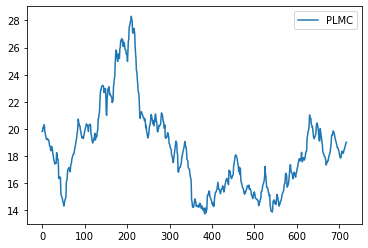

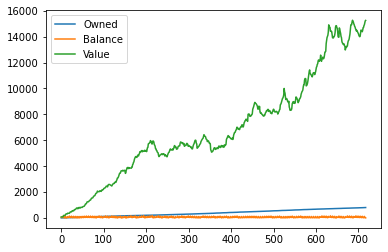

In [223]:
profitstock = pd.read_csv('moves',skiprows=0,sep=',',header=0, usecols=['PLMC'])
profitstock.plot()
plt.show()
ownedbal = pd.read_csv('moves',skiprows=0,sep=',',header=0, usecols=['Owned','Balance','Value'])
ownedbal.plot()
plt.show()

In [ ]:
#This is to test if a new git push worked